In [1]:
import jieba
import jieba.posseg as pseg
import pandas as pd
import numpy as np
import pathlib
import re
import matplotlib.pyplot as plt

In [2]:
import math,time
from pathlib import Path
from nltk.tokenize import word_tokenize
import multiprocessing

def dict_info():
    desc = """
    【大连理工大学情感本体库】
     七大情绪分类，依次是哀、恶、好、惊、惧、乐、怒；对应的情绪词表依次：
    DUTIR_Ais = {"泣血捶膺", "望断白云", "日暮途穷", "身微力薄"...}
    DUTIR_Wus = {"饰非遂过", "恶语", "毁害", "恶籍盈指", "脾气爆躁", "淫贱", "凌乱"...}
    DUTIR_Haos =  {"打破砂锅璺到底", "多彩", "披沙拣金", "见机行事", "精神饱满"...}
    DUTIR_Jings = {"骇人视听", "拍案惊奇", "悬念", "无翼而飞", "原来", "冷门"...}
    DUTIR_Jus ={"山摇地动", "月黑风高", "流血", "老鼠偷猫饭－心惊肉跳", "一发千钧"...}
    DUTIR_Les ={"含哺鼓腹", "欢呼鼓舞", "莺歌蝶舞", "将伯之助", "逸兴横飞", "舒畅"...}
    DUTIR_Nus = {"怨气满腹", "面有愠色", "愤愤", "直眉瞪眼", "负气斗狠", "挑眼"...}
    
    【知网Hownet词典】
    含正负形容词、否定词、副词等词表，对应的词表依次:
    HOWNET_deny = {"不", "不是", "不能", "不可"...}
    HOWNET_extreme = {"百分之百", "倍加", "备至", "不得了"...}
    HOWNET_ish = {"点点滴滴", "多多少少", "怪", "好生", "还", "或多或少"...}
    HOWNET_more = {"大不了", "多", "更", "比较", "更加", "更进一步", "更为", "还", "还要"...}
    HOWNET_neg = {"压坏", "鲁莽的", "被控犯罪", "银根紧", "警惕的", "残缺", "致污物", "柔弱"...}
    HOWNET_pos = {"无误", "感激不尽", "受大众欢迎", "敬礼",  "文雅", "一尘不染", "高精度", "兴盛"...}
    HOWNET_very = {"不为过", "超", "超额", "超外差", "超微结构", "超物质", "出头"...}
    
    【停用词表】
    中英文停用词表，依次
    STOPWORDS_zh = {"经", "得", "则甚", "跟", "好", "具体地说"...}
    STOPWORDS_en = {'a', 'about', 'above', 'across', 'after'...}
    
    【中文副词/连词】
    副词ADV、连词CONJ
    ADV_words = ['都', '全', '单', '共', '光'...}
    CONJ_words = ['乃', '乍', '与', '无', '且'...}
    """
    print(desc)

#大连理工大学情感本体库, 七大情绪分类，依次是哀、恶、好、惊、惧、乐、怒
#哀
DUTIR_Ais = {"泣血捶膺", "望断白云", "日暮途穷", "身微力薄", "丢面子", "苦海茫茫", "记挂", "无形之罪", "情话", "归心如箭", "大旱云霓", "丧明之痛", "沮丧", "殉葬", "内忧外患", "枉费心力", "水深火热", "疮痍", "头破血出", "嚎啕大哭", "秦庭之哭", "道尽途殚", "苦命", "粗茶淡饭", "落难", "福无双至", "啥也不说了", "血泪", "钢针刺胸口－心痛", "神醉心往", "抚今悼昔", "令原之戚", "乐极生哀", "肝胆胡越", "赤地千里", "千灾百难", "昌亭旅食", "弱不胜衣", "哀戚", "声泪俱下", "莽莽苍苍", "伤逝", "凌虐", "怀念", "获兔烹狗", "追述", "形影自守", "伤兵", "辛酸", "唤起", "垂暮之年", "亡国之社", "怀想", "一场春梦", "裘敝金尽", "残局", "失声", "雅司病", "岁在龙虵", "泡影", "手足异处", "文通残锦", "荒芜", "豪竹哀丝", "患难", "無語", "凋零", "愁眉啼妆", "无私有弊", "泣不可仰", "计出无聊", "乌踆兔走", "魂颠梦倒", "煎胶续弦", "千里迢迢", "驾鹤成仙", "灰朦朦", "神焦鬼烂", "泣涕如雨", "食不糊口", "风吹日晒", "嗒然", "手不应心", "无计奈何", "坠毁", "家烦宅乱", "凄恻", "哀天叫地", "失却", "桑落瓦解", "偎乾就湿", "昊天不吊", "渴求", "镂脂翦楮", "可叹", "片甲不存", "追忆", "面无表情", "噬脐何及", "愁云", "负荆请罪", "感今惟昔", "云烟过眼", "力竭声嘶", "扑空", "引日成岁", "室如县罄", "苦涩", "咳声叹气", "断梗飘蓬", "白搭", "枉用心机", "家散人亡", "身先朝露", "骨瘦如豺", "悲哽", "炎症", "涕泣", "强弩之极", "生前", "水火无情", "释生取义", "诲尔谆谆，听我藐藐", "瓦解冰消", "瘦瘠", "露餐风宿", "死声咷气", "意懒心灰", "太阿倒持", "爱别离苦", "引决自裁", "带减腰围", "败於垂成", "清瘦", "亏本", "亡矢遗镞", "辞别", "飘茵堕溷", "日落西山", "天崩地塌", "砸饭碗", "去日苦多", "投闲置散", "陟岵陟屺", "河东三箧", "驿寄梅花", "寸步千里", "凶终隙末", "一败涂地", "灰身泯智", "饥寒交迫", "一木难支", "五内俱焚", "悲歌易水", "悻悻", "今月古月", "雾惨云愁", "与世长辞", "形单影只", "千回百转", "连明连夜", "钟鸣漏尽", "鸿爪雪泥", "如今", "阮囊羞涩", "孤俦寡匹", "创伤", "钟漏并歇", "惜老怜贫", "节哀顺变", "感旧之哀", "视丹如绿", "鹤唳猿声", "不可究诘", "倚门倚闾", "落漠", "舍弃", "灰心丧意", "报废", "朝齑暮盐", "哀鸿遍野", "枯朽之馀", "苦处", "出局", "糠豆不赡", "偏生", "风中之烛", "寒心", "负屈", "哀哀切切", "啼哭", "十眠九坐", "幽明永隔", "伤神", "门可张罗", "枯木死灰", "没奈何", "挂肚牵肠", "寝苫枕块", "釜中生鱼", "行不得也哥哥", "悲恸", "明日黄花", "大材小用", "缺憾", "深切", "残破不全", "幻灭", "贫贱", "痴情碰冷遇－伤透了心肝", "羊肠鸟道", "凄惶", "未成一篑", "龙驭上宾", "鹤骨鸡肤", "恨相见晚", "哀辞", "沦肌浃髓", "悲观地", "花残月缺", "春树暮云", "冤气", "鸿隐凤伏", "凭吊", "曾经沧海", "无何有之乡", "想儿", "迫不得已", "黯然伤神", "凄寒", "白头如新", "悱恻缠绵", "寸木岑楼", "搥胸顿足", "哀鸿", "心力交瘁", "灰身粉骨", "千辛万苦", "众寡不敌", "孤苦零丁", "糠菜半年粮", "蓬户柴门", "道尽涂殚", "自责", "朝不保夕", "舌敝唇焦", "志哀", "形影相对", "心如槁木", "於呼哀哉", "众口嗷嗷", "顾全", "伤心", "悲酸", "食少事烦", "茕茕孑立", "万箭攒心", "令人遗憾", "怀才不遇", "跌脚搥胸", "边鄙", "凄楚", "坐失良机", "抚景伤情", "眷眷", "苍老", "万不得已", "叹息", "人去楼空", "心寒", "只言片语", "人琴俱亡", "赔不是", "狐死首丘", "寒泉之思", "谢罪", "铜驼荆棘", "巢毁卵破", "裁处", "饥肠辘辘", "计日以俟", "优患余生", "足茧手胝", "荒漠", "一败如水", "百业萧条", "辙乱旗靡", "溃逃", "百身莫赎", "离乡别土", "呜呼", "心痛", "撒科打诨", "如之奈何", "头童齿豁", "孤悬浮寄", "赔罪", "挖耳当招", "号哭", "泛萍浮梗", "赘食太仓", "零星", "悼亡", "无语", "適得其反", "火坑", "玄酒瓠腑", "玉关人老", "病号", "论高寡合", "顾念", "樵苏不爨", "五鬼闹判　", "龙去鼎湖", "生不逢辰", "计无由出", "文章憎命", "沧海遗珠", "血吸虫病", "颠沛流离", "尽付东流", "兵败如山倒", "家徒四壁", "散伙", "肚里泪下", "长歌当哭", "流离颠沛", "凄凉", "寂寥", "生变", "鸮啼鬼啸", "追悔莫及", "白驹空谷", "又弱一个", "离乡背井", "食不餬口", "依人篱下", "若敖鬼馁", "愧怍", "计穷虑尽", "流移失所", "伤痕", "回忆", "郁郁寡欢", "心如刀割", "伤怀", "上天无路，入地无门", "痴想", "啼天哭地", "云树遥隔", "火山汤海", "孤苦仃俜", "问心有愧", "舟中敌国", "巴巴", "不名一文", "三差两错", "屠门大嚼", "珠泪偷弹", "乐尽悲来", "爱莫之助", "重担", "久客思归", "无以塞责", "不遂", "未达一间", "悲剧", "逆子", "失悔", "破国亡宗", "买王得羊", "苒弱", "祸近池鱼", "国步艰难", "孤单", "天晓得", "板栗连壳吞下肚－千针万刺痛在心", "为国捐躯", "致哀", "嚎天喊地", "重温旧梦", "神嚎鬼哭", "望洋兴叹", "事与原违", "吃后悔药", "牵念", "金尽裘敝", "鬼哭狼嚎", "宝山空回", "手泽之遗", "抱恨终生", "追寻", "驷之过蠙", "回禄", "垂头丧气", "灰身灭智", "颓垣断堑", "分文不名", "既有今日，何必当初", "身名俱败", "惜别", "雨断云销", "依违", "驰念", "萧条", "负薪之忧　", "孤孤单单", "闭口无言", "归正邱首", "如到宝山空手回", "得不偿失", "无人之地", "惦念", "不得其所", "念旧", "不堪其忧", "食不下咽", "含悲", "风刀霜剑", "对口相声", "延颈举踵", "孤军深入", "兰因絮果", "单忧极瘁", "忧惧", "乐极哀来", "丧乱", "孤立无援", "流年不利", "眼晕", "顾影自怜", "家反宅乱", "抚髀兴叹", "深望", "音容宛在", "拉饥荒", "牵肠割肚", "哀乐", "关切", "号啕", "企望", "殉职", "鹑衣百结", "祝发空门", "望峰息心", "悔悟", "悲苦", "遥遥无期", "社稷为墟", "不中", "零落", "抱头大哭", "不测", "荒凉", "破碎", "落落难合", "梗迹蓬飘", "槁木死灰", "冻害", "破琴绝弦", "扼腕", "默哀", "缅怀", "大醇小疵", "末日", "何去何从", "流落失所", "痛苦", "白璧微瑕", "人生如寄", "千疮百痍", "贫病交迫", "师老兵疲", "家业凋零", "一草一木", "无济于事", "孤鸾照镜", "磨砖成镜", "长亭短亭", "后事", "回想", "灾荒", "二佛涅槃", "离鸾别凤", "冤沉海底", "断线风筝", "毁车杀马", "悲观主义", "毁方瓦合", "呼天号地", "萧瑟", "长才短驭", "心如死灰", "形孤影寡", "奢望", "不逞", "桑梓之念", "渺茫", "鬼哭天愁", "散戏", "月缺花残", "式微", "得不偿丧", "珠零玉落", "影只形孤", "孤形吊影", "清减", "抽咽", "少壮不努力，老大徒伤悲", "伤悲", "哀叹", "飘萍断梗", "回肠百转", "失恋", "哀声叹气", "奠祭", "立足之地", "山木自寇", "暮想朝思", "鸾孤凤寡", "坐失机宜", "鸿消鲤息", "回头", "神驰力困", "心如刀搅", "灾难", "哭丧着脸", "绠短汲深", "寸阴若岁", "云开雾释", "啼饥号寒", "跼天促地", "如蹈汤火", "慰唁", "惭凫企鹤", "亲痛仇快", "流落他乡", "含汙忍垢", "吴市吹箫", "蹉跎日月", "不是滋味儿", "sigh", "孤魂野鬼", "魂不著体", "计穷虑极", "鹿走苏台", "无计可奈", "吞声忍泪", "饮泣吞声", "觉人觉世", "水中捉月", "途穷日暮", "弹尽粮绝", "忧戚", "俟河之清", "哭嚎", "转蓬", "伤悼", "食藿悬鹑", "超度", "灰心丧气", "形容憔悴", "有嘴没舌", "心低意沮", "悲泣", "赤白痢", "日薄西山", "颓垣废井", "孤独", "聊以自慰", "忧思", "自悔", "切切", "抱恨黄泉", "废然", "龙头锯角", "补偿", "沦陷", "道殣相属", "无影无踪", "心如寒灰", "人弃我取", "褐衣不完", "师老民困", "半截入土", "不忘故旧", "炎凉", "不幸", "弃甲负弩", "强死强活　", "风行雨散", "片接寸附", "伤筋动骨", "家破人亡", "孤立无助", "剖心泣血", "大海捞针", "丧钟", "朝思暮想", "升天", "懈气", "悲歌击筑", "死声淘气", "鸟哭猿啼", "李广不侯", "众叛亲离", "清苦", "不足", "惨不忍言", "剥落", "痫入骨髓", "吞声", "疾不可为", "狐死兔泣", "昙花一现", "破败", "裁撤", "万念俱灰", "摈弃", "惨境", "道殣相枕", "龙潜凤采", "没落子", "踽踽凉凉", "住院", "戚然", "怨离惜别", "门殚户尽", "丧家", "哀哀欲绝", "江河日下", "悲悯", "乐昌之镜", "寒酸", "四壁萧然", "前尘影事", "自馁", "龙门点额", "水底捞针", "猿鹤虫沙", "神郁气悴", "饥馑荐臻", "苍凉", "黄连水里泡竹笋－苦透了", "并日而食", "荡析离居", "哭哭啼啼", "铜驼草莽", "哀矜", "苦主", "离情别绪", "人为刀组", "衡石程书", "凋败", "雨零星乱", "望尘莫及", "浩叹", "悔读南华", "骨肉未寒", "猿啼鹤唳", "非意相干", "呼天抢地", "眼巴巴", "战火", "悲观失望", "雨恨云愁", "身首异地", "难受", "黄钟毁弃，瓦釜雷鸣", "瓦解冰泮", "穷醋大", "伫结之情", "丧失", "枉费心思", "心慵意懒", "兔走乌飞", "世殊事异", "咫尺千里", "凄怨", "同归于尽", "背乡离井", "枯鱼病鹤", "孤鸿寡鹄", "命蹇时乖", "黄钟毁弃", "李广未封", "活天冤枉", "散失", "月明千里", "虎视", "东窗事犯", "锐挫望绝", "道别", "风雨飘摇", "折戟沉沙", "泪眼", "穷措大", "遇人不淑", "火上弄冰", "俏皮话", "悲悼", "别离", "付之东流", "身无完肤", "哑巴吃黄连－有苦说不出", "双凫一雁", "讷口少言", "泪如雨下", "低潮", "冷清", "辗转思念", "岁不我与", "心灰意败", "虚空", "倒悬之危", "伤俘", "病入膏肓", "丧亡", "荒寂", "短命", "枕冷衾寒", "七零八落", "汲汲顾影", "英雄无用武之地", "引咎自责", "牙龈", "悲辛", "鱼网鸿离", "玉减香销", "查无实据", "逝将去汝", "石沉大海", "摧折", "哀悯", "离群索居", "赍志以殁", "贫寒", "嘘唏不已", "活受罪", "椒焚桂折", "亡国奴", "逝世", "不可挽回", "低落", "无妄之忧", "独木不成林", "家道壁立", "萧疏", "悔改", "乞穷俭相", "憔悴", "枯形灰心", "飞蛾扑火", "鸿雁哀鸣", "三日新妇", "强弩末矢", "负屈含冤", "吃了黄连对人说－诉苦", "如堕五里雾中", "功亏一篑", "额蹙心痛", "神号鬼哭", "灾患", "不是滋味", "流离失所", "呻吟", "身故", "气息奄奄", "形影自吊", "悉眉苦脸", "人地生疏　", "低回", "尸居余气", "青衫司马", "惙怛伤悴", "倦鸟之还", "怀恋", "断代", "认输", "清冷", "泪如泉涌", "杼柚空虚", "无能为役", "攻苦食俭", "同病相怜", "长叹", "九仞一篑", "脸青鼻肿", "一无所有", "睹物思人", "飘茵落溷", "玉碎香销", "哀子", "伤疤", "人为", "牵萝莫补", "悲声载道", "豪管哀弦", "垂危", "丧礼", "无容身之地", "空荡荡", "攻苦茹酸", "左思右想", "分心挂腹", "艰苦", "千愁万恨", "伤心蒿目", "鳏鱼渴凤", "轹釜待炊", "孤立寡与", "未竟之志", "哀悼", "身败名隳", "水月镜花", "火热水深", "陷落", "红颜薄命", "挫败", "无如之奈", "饮血崩心", "眼泪", "气馁", "寡不胜众", "枉费工夫", "人老珠黄", "天夺之年", "反吟伏吟", "人心不古", "劫数", "转喉触讳", "家道中落", "髀肉复生", "苦口", "嗳声叹气", "惨淡", "寂廖", "音信杳无", "自崖而反　", "叹惋", "抱愧", "焦黄", "有志无时", "颓垣废址", "拊心泣血", "孤苦", "不敢越雷池一步", "心疼", "依依惜别", "抱歉", "萧森", "星离云散", "回肠九转", "思恋", "悔其少作", "悼辞", "两手空空", "北风之恋", "悲惨", "无能为力", "鸿爪留泥", "怜悯", "荆棘铜驼", "骏骨牵盐", "核讹诈政策", "重孝", "招架不住", "悲鸣", "败阵", "惨重", "龙胡之痛", "挥泪", "时乖命蹇", "枯骨之馀", "驿使梅花", "嗟悔", "千疮百孔", "开吊", "残花败柳", "泪人儿", "火烧旗杆－长叹", "落花流水", "龙蟠凤逸", "三好两歹", "魏鹊无枝", "死不瞑目", "殉难", "巴巴儿地", "文君新寡", "兔死狐悲", "前功尽灭", "困境", "悔恨", "首当其冲", "顿足捩耳", "十病九痛", "孤苦伶仃", "孤零零", "末路", "龙盘凤逸", "引咎", "呜呼哀哉", "大厦将倾，一木难支", "血流成河", "好景不长", "怀道迷邦", "面有愧色", "衰亡", "暮虢朝虞", "乞哀告怜", "孤臣孽子", "朽木死灰", "清癯", "势穷力竭", "巴望", "追想", "无可奈何", "死告活央", "如饥如渴", "丧偶", "云消雾散", "为山止篑", "铭肤镂骨", "哀毁骨立", "百孔千疮", "裁汰", "怀土之情", "乐极则忧", "肝胆楚越", "跷足抗首", "血友病", "补正", "黎庶涂炭", "无从下手", "惨剧", "截镫留鞭", "橘化为枳", "满目凄凉", "荏苒", "魂劳梦断", "亏折", "鹄形鸟面", "顾景惭形", "一场空", "死别生离", "洒洒潇潇", "跌脚槌胸", "抱屈衔冤", "嚎天动地", "错怪", "衔冤负屈", "发人深省", "销魂", "穷途之哭", "血泪盈襟", "引领而望", "清尘浊水", "泻肚", "崔莺莺送郎－说不出的伤心", "悼心失图", "涕泪交集", "长吁短叹", "安土重迁", "生病", "撑船的竹蒿－提起泪流", "一念之差", "渴盼", "鹤归华表", "丢盔抛甲", "零圭断璧", "驷之过隙", "洒泪", "殡仪馆", "噫呜流涕", "凶耗", "多愁善感", "瓦解冰销", "不行", "断送", "椎心泣血", "履穿踵决", "过屠门而大嚼", "短暂", "终身大事", "六月飞霜", "泪珠", "棋输先著", "先烈", "沦丧", "强颜欢笑", "拜扫", "归心似箭", "治丝而棼", "痛哭", "伤心疾首", "战乱", "哀号", "雁影分飞", "千难万难", "渴念", "霜露之感", "汗血盐车", "夭折", "关门大吉", "离别", "竹篮子打水一场空", "孤兒寡妇", "逼仄", "拨开皮肉种红豆－入骨相思", "白云亲舍", "桑榆暮景", "郁结", "追叙", "零丁", "拂意", "触目兴叹", "刻骨铭心", "惨不忍闻", "局天扣地", "寡不敌众", "敲髓洒膏", "自卑", "天崩地坍", "鸿飞雪爪", "水底捞月", "蓬头历齿", "情绪低落", "岛瘦郊寒", "泥牛入海", "漫天烽火", "大水冲了龙王庙　", "孤哀子", "痘疮", "疏远", "黄锺毁弃", "含垢忍污", "魂驰梦想", "损兵折将", "自惭形秽", "风木之思", "拒虎进狼", "破落", "再衰三竭", "枉费心计", "安息", "巧妇难无火之炊", "李广难封", "抚时感事", "玉楼赴召", "拔十得五", "瓦器蚌盘", "口燥唇干", "水中捞月", "倦尾赤色", "对不住", "龙阳泣鱼", "豕分蛇断", "不名一钱", "腹背之毛", "没世无闻", "相思", "身世", "得不补失", "不佞", "鼓盆之戚", "玉碎", "翘足引领", "乞怜", "饥寒交凑", "气不过", "人生若寄", "孤雌寡鹤", "切肤之痛", "寂寞", "冻疮", "惦记", "失望", "乐极悲生", "悲咽", "司马青衫", "长念卻虑", "残生", "断金零粉", "哭泣", "罗雀掘鼠", "千岁鹤归", "爱莫能助", "昊天罔极", "龙御上宾", "多灾多难", "道尽途穷", "鹤唳华亭", "送命", "黄粱一梦", "槐南一梦", "扪心自问", "秋水伊人", "伤口", "金瓶落井", "家业调令", "冻伤", "无倚无靠", "兔葵燕麦", "惨笑", "势穷力蹙", "无从措手", "山崩川竭", "每逢佳节倍思亲", "内视反听", "不景气", "不可企及", "钳口不言", "彩云易散", "乐极则悲", "天粟马角", "残破", "对口疮", "悲从中来", "晓风残月", "半壁江山", "悼念", "哀思如潮", "杞国之忧", "还珠买椟", "悲戚", "拜拜", "纪念", "魂销目断", "望尘不及", "惨雨酸风", "室如悬罄", "无肠可断", "不遑", "泣不成声", "驿路梅花", "离合悲欢", "不堪回首", "低沉", "堕云雾中", "龟冷支床", "无依无靠", "千头万绪", "产褥热", "十步九回头", "悔不该", "冷冷清清", "回黄转绿", "大势已去", "弃甲丢盔", "肠断", "身无立锥", "局地扣天", "计穷智极", "家翻宅乱", "圆寂", "材大难用", "片甲不还", "涂炭", "有负众望", "潸然泪下", "人琴俱逝", "断肠", "无所依归", "连明达夜", "差彊人意", "分崩离析", "干啼湿哭", "吕安题凤", "杞国忧天", "垂暮", "炙肤皲足", "兰摧玉折", "难于上天", "无可柰何", "追怀", "栋折榱崩", "凄风苦雨", "河蟹", "箪食瓢饮", "半文盲", "再衰三涸", "三病四痛", "长吁短气", "饮冰茹檗", "岁在龙蛇", "不外", "形影相随", "哀告", "泄气", "幽咽", "愧赧", "二竖之顽", "陋巷箪瓢", "彩凤随鸦", "枯蓬断草", "昼吟宵哭", "跋前踬后", "忽略", "殡葬", "眷恋", "惨绝人寰", "丧服", "全军覆没", "痛心", "树倒猢狲散", "跼天蹐地", "鼻酸", "气断声吞", "忧伤", "如蹈水火", "瘭疽", "聊以卒岁", "身后", "散亡", "薄命", "苦水", "咽峡炎", "霜露之病", "计穷途拙", "天末凉风", "触景商情", "血枯病", "枯枿朽株", "惨痛", "抑郁寡欢", "人命危浅", "荜门闺窦", "卖兒贴妇", "片瓦无存", "十生九死", "道歉", "付诸东流", "月盈则食", "亡国", "孤身只影", "东劳西燕", "札人忧天", "寸田尺宅", "悲凄", "抱恨终天", "牛衣对泣", "发人深醒", "可惜", "可乘之隙", "孤寡", "天安门事件", "悲天悯人", "枯鱼衔索", "歉疚", "风流云散", "家贫如洗", "驾鹤西游", "山穷水尽", "落莫", "哀感中年", "哀思", "离乡别井", "坠落", "伸冤", "死心", "败谢", "门衰祚薄", "吊祭", "浇漓", "难乎为继", "着凉", "歇菜", "殡殓", "吃教", "狼号鬼哭", "节节败退", "交臂相失", "揪心", "凄婉", "情感", "霜露之悲", "三灾六难", "五日京兆", "存十一於千百", "哭鼻子", "柴毁骨立", "喟叹", "灰色", "朝不谋夕", "环堵萧然", "计无所施", "毁于一旦", "落花有意，流水无情", "物是人非", "蹉跎", "凄迷", "咫尺天涯", "海怀霞想", "亏蚀", "船到江心补漏迟", "哭天抹泪", "蕉萃", "痛楚", "连理分枝", "延颈鹤望", "偕生之疾", "人琴两亡", "乐昌分镜", "长逝", "七死八活", "化为乌有", "秕子", "悲愁", "门闾之望", "身无寸缕", "一日三秋", "对着墙壁流眼泪－独自伤心", "山穷水绝", "叹气", "推延", "山穷水断", "会少离多", "不消", "即鹿无虞", "当面错过", "人百其身", "风雨晦冥", "南柯一梦", "借酒消愁", "流民", "悲伤", "一朝天子一朝臣", "险阻艰难", "死於非命", "风雨飘零", "停云落月", "千头万序", "沉沦", "愀然", "病笃", "马齿徒长", "低声下气", "鬼烂神焦", "今是昔非", "肉痛", "怨悔", "瓮牖桑枢", "逐北", "悲不自胜", "世风日下", "汗颜无地", "疏忽", "席薪枕塊", "酸辛", "入神", "懊悔", "悔不当初", "不是味儿", "遇害", "悱恻", "鸿泥雪爪", "龟厌不告", "树倒根摧", "错爱", "丧事", "闭门思过", "物伤其类", "热泪盈眶", "凋敝", "连宵彻曙", "骨化形销", "颤巍巍", "上坟", "两瞽相扶", "望风破胆", "防不胜防", "伤风", "卷席而葬", "途遥日暮", "落月屋梁", "分道扬镳", "叹老嗟卑", "手足重茧", "鳏寡惸独", "迟迟吾行", "无情无彩", "涕零如雨", "情凄意切", "清贫", "节哀", "时乖运蹇", "饥寒交切", "身不由主", "镂冰雕朽", "责躬罪己", "寸步难移", "衰微", "落魄江湖", "请罪", "眼拙", "盼望", "告吹", "国将不国", "抱憾", "门单户薄", "变迁", "雨零星散", "一贫如洗", "芝焚蕙叹", "来日大难", "悲壮", "妻离子散", "门堪罗雀", "易子析骸", "马前泼水", "追悼", "昼度夜思", "陪了夫人又折兵", "思慕", "生疏", "梗泛萍漂", "天愁地惨", "期盼", "念念不忘", "风景不殊", "头破血淋", "怃然", "哑巴亏", "赍志而殁", "流离颠疐", "怀宝迷邦", "国破家亡", "流水落花", "谏尸谤屠", "水尽山穷", "云飞雨散", "適居其反", "乐往哀来", "散落", "天崩地解", "无人问津", "名落孙山", "伤员", "不忍", "泣数行下", "歉仄", "伤亡", "狼嚎鬼叫", "穷光蛋", "云悲海思", "事与愿违", "梦魂萦绕", "衰替", "惨绿愁红", "饭糗茹草", "投閒置散", "杞人之忧", "彩风随鸦", "有口难分", "血肿", "泪汪汪", "千山万水", "六尺之孤", "衰退", "畏威怀德", "一头跌在菜刀上－切肤之痛", "败局", "面黄肌瘦", "望穿秋水", "孤鸾寡鹤", "海桑陵谷", "海难", "痛心入骨", "鸾分凤离", "陷身囹圄", "悼心疾首", "地坼天崩", "失掉", "骥服盐车", "弱势", "悲痛", "孤寂", "步履维艰", "死败涂地", "身不遇时", "情至意尽", "跑墒", "前度刘郎", "饿殍遍野", "精力枯竭", "食荼卧棘", "上吊", "陨越", "计过自讼", "无如之何", "惨然", "晚节不终", "痛切", "火头", "孤负", "呕心抽肠", "跌脚捶胸", "惨苦", "背悔", "无可奈何花落去", "披麻戴孝", "流落天涯", "翘企", "冢木已拱", "千条万缕", "音容笑貌", "计无复之", "人天永隔", "等米下锅", "无补于事", "希图", "沦亡", "舍不得", "离婚", "付之一炬", "触景生情", "风木含悲", "枯鱼之肆", "脸黄肌瘦", "遇难", "室迩人远", "形只影单", "一命呜呼", "十室九空", "哀鸣", "天荆地棘", "踽踽独行", "哀叫", "林寒涧肃", "单丝不成线", "棘没铜驼", "百巧千穷", "三好两歉", "木梗之患", "衰败", "单鹄寡凫", "失约", "望眼欲穿", "潜蛟困凤", "云愁雨怨", "师不宿饱", "鸾凤分飞", "陨获", "乘兴而来", "疚愧", "玉石俱焚", "拽布披麻", "广种薄收", "人民城郭", "拜忏", "家无担石", "人生哲学", "鲽离鹣背", "残存", "思念", "海底捞针", "回顾", "榱崩栋折", "形影相附", "销神流志", "势穷力屈", "代马望北", "罐子里头点蜡烛－暗中流泪", "红豆", "牵萝补屋", "清寒", "千虑一失", "赤贫如洗", "浮湛连蹇", "黄蜂叮屁股－有痛说不出口", "形影相依", "心若死灰", "切记", "抚今痛昔", "一蹶不振", "自咎", "买牛得羊－大失所望", "不胜其苦", "烧伤", "身心交瘁", "哀莫大于心死", "雨歇云收", "悲怆", "贬值", "百辞莫辩", "饮泣", "生离死别", "吞风饮雨", "大惑不解", "炮灰", "盛筵难再", "青蝇吊客", "哀毁瘠立", "分香卖履", "无奈", "恹恹", "胶着", "黯然", "云泥殊路", "孤犊触乳", "新亭对泣", "黯然神伤", "悲愁垂涕", "心如刀绞", "拽布拖麻", "心如刀锯", "计日以待", "败绩", "停闭", "皱纹", "黾穴鸲巢", "拭目而待", "祸福无门", "怀旧", "淹溺", "泪如秋夜雨－一点一声愁", "浪迹萍踪", "离乡背土", "别鹤孤鸾", "纳履踵决", "山高水低", "失精落彩", "千金一掷", "风木之悲", "流水无情", "盼念", "命薄缘慳", "毁不危身", "前思后想", "连明彻夜", "消耗", "心虚", "城门失火，殃及池鱼", "喟然", "金钗换酒", "灰心", "泡汤", "哀哀父母", "叫苦不迭", "拜辞", "痛定思痛", "白骨露野", "流汗浃背", "海水桑田", "祸从天降", "空落落", "美中不足", "残喘", "报丧", "交臂失之", "凄惨", "黄钟长弃", "泰山梁木", "肘行膝步", "凄怆", "凄切", "痛失", "恻隐之心", "流离颠顿", "断气", "世态炎凉", "废书而叹", "覆盆之冤", "千里莼羹", "萧飒", "大失所望", "回船转舵", "镂冰炊砾", "悔恨交加", "清夜扪心", "抱疚", "傻眼", "漫长", "孤悬客寄", "衰落", "悔之不及", "殉情", "入地无门", "泪迸肠绝", "及溺呼船", "有气无烟", "于心何忍", "零丁孤苦", "驰思", "代马依风", "失欢", "血案", "六亲无靠", "失误", "劳筋苦骨", "冷窗冻壁", "伶仃孤苦", "若有所丧", "劳形苦心", "事与心违", "向日", "霜凋夏绿", "鞫为茂草", "凄寂", "乐极悲来", "恨事", "向隅而泣", "对不起", "辞行", "怀揣冰棍－凉透心", "釜底游鱼", "带孝", "惨不忍睹", "破灭", "泪液", "殒灭", "龙蟠凤翥", "早知今日，悔不当初", "丢盔卸甲", "浩劫", "依依不舍", "傫如丧狗", "无精汀采", "含冤", "残兵败将", "兔死狐悲－物伤其类", "引人深思", "万箭穿心", "叨在知己", "家无儋石", "两败俱伤", "无情无绪", "挽联", "泪花", "桑榆之光，礼无远照", "三好二怯", "以狸饵鼠", "倒霉", "镜里观花", "爽然", "贬谪", "打击", "携泰山以超北海", "颓垣败壁", "冤枉路", "采凤随鸦", "乌飞兔走", "只鸡絮酒", "无用武之地", "犁地淹死牛－伤透了", "强颜为笑", "狐兔之悲", "少吃无穿", "另楚寒巫", "十米九糠", "遍体鳞伤", "梦想颠倒", "四面楚歌", "暴卒", "千回百折", "马足车尘", "悲痛欲绝", "创巨痛深", "松口", "行号卧泣", "雷害", "苦难", "拊膺顿足", "颠沛", "无根无蒂", "擂天倒地", "不复堪命", "路叟之忧", "山亏一篑", "摧毁", "卸任", "挂记", "活地狱", "梦魂颠倒", "哀荣", "无人之境", "割席", "泰山其颓", "隐痛", "朝生暮死", "失去", "停学", "三迭阳关", "十室九匮", "饥冻交切", "嗟悔无及", "无所用之", "孤掌难鸣", "流亡", "哀痛欲绝", "凶信", "斗酒只鸡", "疮痍满目", "申冤", "遭家不造", "寒心销志", "跌弹斑鸠", "举目无亲", "自省", "得不酬失", "瓮声甕气", "鹄形菜色", "珠沉璧碎", "伤号", "败仗", "凄清", "痛惜", "想念", "啜泣", "马角乌头", "人亡物在", "连昏达曙", "孤单单", "积劳成疾", "司马牛之叹", "离鸾别鹤", "命苦", "黯然销魂", "千条万端", "回首", "潦原浸天", "镜分鸾凤", "殒命", "鬼泣神号", "飘樊落溷", "凄苦", "朝闻夕死", "鱼烂而亡", "身不由己", "风吹浪打", "汗流浃背", "失意", "来鸿去燕", "天年不测", "道大莫容", "背井离乡", "云愁海思", "行号巷哭", "鬼抓狼嚎", "微乎其微", "抱委屈", "珠沉玉磒", "心灰意懒", "千绪万端", "哀痛", "琴断朱弦", "败落", "困苦", "含冤负屈", "申雪", "无处可逃", "煎豆摘瓜", "遗憾", "受害", "故宫禾黍", "挂虑", "卑辞重币　", "残年", "形孤影只", "磨难", "百身何赎", "哽咽", "哀婉", "汗流浃踵", "风雨晦暝", "力不能支", "天年不齐", "凤靡鸾吪", "弃家荡产", "无何有乡", "反省", "孤立", "飘零", "灰躯糜骨", "莼鲈之思", "玉碎珠沉", "寄人篱下", "室徒四壁", "垂怜", "退思补过", "悄然", "啼泣", "玉减香消", "情歌", "违乡负俗", "怏怏", "半衰期", "树倒猢猻散", "叫苦连天", "哀感天地", "珠沉玉碎", "反躬自省", "道尽涂穷", "鳏寡孤独", "落空", "呼天叩地", "奔丧", "寸草不生", "玩儿完", "心心念念", "二旬九食", "劳燕分飞", "白费", "忧悒", "烽火连天", "耿耿于心", "悲切", "槁形灰心", "道殣相望", "飞蛾投火", "历历在目", "东播西流", "吹篪乞食", "室如悬磬", "连天烽火", "弃养", "心酸", "中馈犹虚", "神号鬼泣", "穷途末路", "哀伤", "变心", "痛不欲生", "钢刀吞肚里－割心肠", "愧对", "穷竭", "离多会少", "死棋", "报应", "天年不遂", "鳏寡孤惸", "动容", "风中秉烛", "话旧", "江流日下", "孤行吊影", "望尘靡及", "断线鹞子", "弱小", "遇险", "顿足捶胸", "鹤发鸡皮", "呜咽", "哀怜", "铸成大错", "挂席为门", "艰辛", "琵琶胡语", "渺无音信", "无米之炊", "白蜡明经", "恸哭", "弃甲曳兵", "无家可奔", "庞眉皓发", "国殇", "心碎", "殡车", "飞蛾赴烛", "奔走呼号", "潸潸", "漠漠", "归正首丘", "食不充肠", "颓垣败井", "风雨凄凄", "魂不着体", "霜露之思", "感今怀昔", "枉费脣舌", "守候", "横祸非灾", "心为形役", "坎坷", "有愧", "尸骨未寒", "筚门圭窦", "神牵鬼制", "只鸾单凤", "哀鸿遍地", "赍志以没", "痛处", "鸿爪春泥", "失明", "望岫息心", "枯木生花", "谢世", "饥寒交至", "悬悬在念", "无火之炊", "烛泪", "内疚", "别无长物", "坎坷不平", "离鸾别鹄", "落选", "亡国灭种", "病容", "抱憾终身", "凋落", "蹙国丧师", "戎行", "豆剖瓜分", "珠投璧抵", "光身子钻刺蓬－有刺又痛", "天各一方", "被难", "云树之思", "慷慨激烈", "抚今追昔", "井底捞月", "凄然泪下", "无服之殇", "鸦片战争", "死去活来", "刳精鉥心", "为德不终", "魂牵梦系", "无如奈何", "无家可归", "兼葭秋水", "高不可攀", "扣壶长吟", "泣下沾襟", "乌鸦命－人人憎", "鞠为茂草", "桂折兰摧", "露宿风餐", "三求四告", "穷目", "中心藏之", "沿门托钵", "功败垂成", "斯文扫地", "涕泗滂沱", "前功尽弃", "消息", "残败", "欲哭无泪", "愧悔", "饿殍枕藉", "抚今思昔", "伤感", "火烧乌龟－心里痛", "哀泣", "鹄面鸠形", "三长四短", "赔话", "后悔无及", "悔罪", "云开雾散", "即景生情", "悲哀", "难过", "悲歌", "割肚牵肠", "人生观", "顿足搓手", "丧命", "切切在心", "单相思", "前不巴村，后不巴店", "苦味", "失散", "乐尽哀生", "家败人亡", "过不去", "天壤王郎", "海底捞月", "饿莩遍野", "昼想夜梦", "计日而俟", "窘困", "十里长亭　", "抚躬自问", "尸横遍野", "片甲不回", "荒弃", "牺惶", "孤儿寡妇", "无了根蒂", "告负", "失宠", "毁不灭性", "兔缺乌沈", "衷曲", "失陷", "劳身焦思", "人面桃花", "桑榆之光，理无远照", "变故", "祈盼", "内室反听", "重创", "食不充饥", "悬肠挂肚", "门可罗雀", "牵肠萦心", "如泣如诉", "鸡皮鹤发", "眼睁睁", "自怨自艾", "闻声相思", "哀哀", "痛哭流涕", "涕泗滂沲", "沉迷", "狼艰狈蹶", "急痛攻心", "丧葬", "如此而已", "没没无闻", "断粮", "安厝", "风吹雨打", "才高运蹇", "泪痕", "荒无人烟", "牵肠挂肚", "倾家荡产", "漏尽锺鸣", "自身难保", "补苴", "伤害", "穷山恶水", "食不充口", "牵挂", "哀启", "转筋", "于心有愧", "肝肠寸断", "枯槁", "沉痛", "鸿飞霜降", "鼠入牛角", "向隅", "衰老", "千愁万绪", "飞蛾赴焰", "穷苦", "割爱", "流离琐尾", "汗青头白", "停业", "枉费", "失身", "后继乏人", "潸然", "力不胜任", "回天乏术", "苦痛", "念兹在兹", "装殓", "疾苦", "街号巷哭", "人亡家破", "苦头", "漏尽钟鸣", "叩心泣血", "没世穷年", "孤舟独桨", "棘地荆天", "困处", "锐挫气索", "灾害", "岁月如流", "眷念", "魂销肠断", "入殓", "惋惜", "池鱼之祸", "雨散风流", "面目全非", "火中取栗", "捶胸顿足", "朝不虑夕", "愧悔无地", "连宵达旦", "九霄云外", "差点儿", "黄杨厄闰", "如丧考妣", "侯门似海", "心灰意冷", "目眢心忳", "惦挂", "魂牵梦萦", "分钗断带", "化为泡影", "兴叹", "挂念", "想望风采", "葬送", "啜菽饮水", "伤心惨目", "夭逝", "家破人离", "补救", "抚心自问", "没落", "亡可奈何", "烧毁", "草衣木食", "三长两短", "食不果腹", "铭心镂骨", "悲号", "铭记不忘", "慷慨悲歌", "鸾只凤单", "抢地呼天", "霞思云想", "急转直下", "愧疚", "负荆", "悲郁", "葬身", "落寞", "泣如雨下", "春露秋霜", "满目疮痍", "踣地呼天", "白首空归", "荒落", "寡妇死了儿－哭得好伤心", "千难万苦", "寥寂", "失时落势", "见羹见墙", "鹤困鸡群", "魂不负体", "泪水", "昌亭之客", "后悔", "靦颜人世", "铭心刻骨", "无辜", "毒物", "负疚", "悲凉", "质伛影曲", "堕溷飘茵", "自疚", "呜呼噫嘻", "赔礼", "逝者如斯", "千思万虑", "溘先朝露", "关门闭户", "鸿断鱼沈", "遭遇", "流徙", "为人作嫁", "泄劲", "热孝", "卖履分香", "艰危", "哀切", "首足异处", "梦幻泡影", "绝望", "哀嚎", "流落", "离索", "听天由命", "三旬九食", "病故", "数米而炊", "奔忙", "兵败将亡", "人地生疏", "牙周病", "体无完肤", "血癌", "咬口生姜喝口醋－忍着酸辣", "灰心短气", "七捞八攘", "望云之情", "力尽筋疲", "血流漂杵", "歉意", "痛心疾首", "牵衣肘见", "片甲不留", "乐昌破镜", "无家无室", "鸾孤凤只", "天壤王朗", "伶仃", "希冀", "毒瘤", "伶俜", "丁忧", "养子不成才－大失所望", "感今思昔", "哀艳", "噩耗", "后悔莫及", "忏悔", "前瞻后顾", "客死他乡", "火尽灰冷", "葬身鱼腹", "包赔", "祸及池鱼", "茕茕孑立，形影相吊", "一言半语", "愧痛", "朝生夕死", "心如刀剉", "灰飞烟灭", "飘籓坠溷"}
#恶
DUTIR_Wus = {"饰非遂过", "恶语", "毁害", "恶籍盈指", "脾气爆躁", "淫贱", "凌乱", "败德辱行", "隋珠弹雀", "自相矛盾", "过气", "垂涎三尺", "拈酸吃醋", "穷愁", "辱国丧师", "马后炮", "孤行一意", "习染", "蛋白质", "格格不纳", "雨霾风障", "停滞", "板板六十四", "悖入悖出", "霞思天想", "怨女旷夫", "文山会海", "落马", "十羊九牧", "冷谈", "井管拘墟", "妄语", "惹祸", "重婚", "驳回", "雨泣云愁", "狐群狗党", "声色犬马", "追根穷源", "罪在不赦", "德薄", "傲慢", "头会箕敛", "人心惟危", "现世", "话中有话", "簸弄", "怆然", "拆东补西", "数白论黄", "昏庸", "刳脂剔膏", "介意", "早退", "粗劣", "连篇累帙", "猥词", "马耳东风", "心术不正", "膏脣岐舌", "土崩鱼烂", "淫辞", "刻毒", "自由放任", "道边苦李", "严苛", "文不对题", "焚尸扬灰", "死无对证", "取悦", "荒谬", "嘴硬", "女巫", "野草闲花", "不韪", "无耻", "耍手段", "月露之体", "难驯服", "顾盼自雄", "无天於上，无地於下", "贵不期骄", "压良为贱", "蹦跶", "蚍蜉带盆", "狗仗人势", "鱼质龙文", "坍台", "蹩脚", "驽马恋栈", "疲劳", "杂糅", "请君入瓮", "浑俗和光", "投鼠忌器", "挑字眼儿", "侈糜", "疲惫", "乱坠天花", "诺诺连声", "楚囚对泣", "独行独断", "破家危国", "拥挤", "饰非养过", "拾人涕唾", "惺惺作态", "尾巴主义", "三十六策，走为上计", "漫无边际", "刚愎", "夹枪带棒", "赶尽杀绝", "狡兔死，良狗烹", "飞谋钓谤", "狂三诈四", "饭坑酒囊", "渔翁之利", "溽暑", "弊端", "解衣抱火", "一日万几", "却步", "贱人", "进退双难", "絮叨", "啰啰唆唆", "自是", "沉郁", "缠磨", "面墙而立", "迁延时日", "唠叨", "大腹便便", "鼓脑争头", "失慎", "油煎火燎", "含混", "倒灶", "倒爷", "佹形僪状", "精神不振", "恬不知羞", "攻其一点，不及其余", "罪莫大焉", "弄假成真", "攀龙附骥", "雕虫篆刻", "一偏", "争长论短", "来者不善", "忧心如捣", "狐埋狐搰", "惆怅", "咒骂", "疑团莫释", "吵嚷", "孤恩负德", "讳恶不悛", "无情无义", "招风揽火", "惯犯", "卖人情", "老古董", "没治", "装怯作勇", "佻巧", "枉辔学步", "偷税", "哄抬", "弃甲投戈", "花里胡哨", "坐误", "始作俑者", "言三语四", "天诛地灭", "言行不一", "华而不实", "溜号", "胡拉乱扯", "死有余责", "逐客令", "刮垢磨光", "犯难", "强凫变鹤", "苛杂", "瞒哄", "戒除", "东拼西凑", "贪如虎狼", "隐晦曲折", "冷峻", "串供", "雨淋日炙", "妖魔鬼怪", "老太太吃炒胡豆－咬牙切齿", "如狼牧羊", "缄口藏舌", "逢迎", "与时沉浮", "百口莫辩", "愚不可及", "缺陷", "窝主", "苛政", "寓公", "玩忽职守", "拒人千里", "飞贼", "鬻宠擅权", "抱头鼠窜", "稀碎", "祸水", "磕头碰脑", "大手大脚", "进退失据", "饫甘餍肥", "金本位制", "孤行几见", "倡情冶思", "矫枉过正", "残杀", "有眼如盲", "不看了了", "歪道", "暴内陵外", "见弹求鸮", "进退维谷", "鳄鱼眼泪", "乱套", "苞苴竿牍", "无下箸处", "诽谤", "强而后可", "奴性", "率然", "七拼八凑", "倚势挟权", "乌焉成马", "从犯", "担雪填河", "鱼龙曼衍", "备位充数", "呱嗒", "卖乖", "投膏止火", "轰堂大笑", "蠢货", "多一事不如省一事", "奸臣", "害人不浅", "不人道", "渊鱼丛爵", "党徒", "蠢事", "斗绝一隅", "非笑", "笼络", "疏阔", "打退堂鼓", "右军习气", "藏垢纳污", "目空一世", "论黄数白", "膏脣贩舌", "SJB", "心烦虑乱", "冒昧", "无休无了", "陋规", "行同狗彘", "烂污", "虚假", "迟延", "招是惹非", "张眉努眼", "囊中羞涩", "背恩忘义", "冶容诲淫", "爱博而情不专", "一知半解　", "替古人担忧", "杀风景", "小心眼", "顺口开河", "苟活", "脱漏", "主要矛盾", "气短", "腐败堕落", "少条失教", "酩酊大醉", "土豪劣绅", "穷困", "吃不上", "分星拨两", "文婪武嬉", "轻诺寡信", "井中视星", "老八辈子", "无动於衷", "抠唆", "离本徼末", "批缪", "仰攀", "猥陋", "千叮万嘱", "罗掘俱穷", "盲人摸象", "熬磨", "随声吠影", "驳难", "含糊其辞", "抛脸", "闹情绪", "宣扬", "人莫予毒", "没意思", "素口骂人", "闪烁其辞", "追欢买笑", "转斗千里", "长蛇封豕", "凑和", "屡次三番", "谄笑胁肩", "巴结", "拘礼", "疵品", "少见多怪", "焦渴", "鼠辈", "粗心", "拆散", "蹠犬噬尧", "低质", "盲目", "责有攸归", "东倒西歪", "黑白混淆", "降心顺俗", "胆小如豆", "浪酒閒茶", "浊骨凡胎", "见貌辨色", "怪话", "碎骨粉尸", "黄齑淡饭", "不识一丁", "鉴貌辨色", "训斥", "以指浇沸", "黄粱梦", "大缪不然", "呼天叫地", "扑朔迷离", "无可辩驳", "雾里看花", "质疑", "矫情", "酒甕饭囊", "暗事", "北辕适楚", "够受的", "硗薄", "坎井之蛙", "析交离亲", "信口雌黄", "闲言冷语", "指责", "俯仰由人", "哩溜歪斜", "苦闷", "助长", "课嘴撩牙", "足尺加二", "苦不唧", "紧巴", "卤莽灭裂", "没颠没倒", "多有微词", "糜烂", "救燎助薪", "非议", "绷着脸", "乘兴而来，败兴而归", "婢膝奴颜", "人不知，鬼不觉", "撩云拨雨", "媚外", "蠢话", "颓败", "屦贱踊贵", "套话", "蒿目时艰", "炫弄", "无耻之尤", "骨董", "悔之无及", "目中无人", "格不相入", "半涂而废", "重蹈覆辙", "老巢", "以蠡测海　", "找岔子", "安故重迁", "背义负信", "沾风惹草", "愁容", "这山望着那山高", "失记", "靖言庸回", "花花搭搭", "罪尤", "贼头鬼脑", "按部就班", "桑间之音", "抓破脸", "指斥", "卖身投靠", "零碎", "不顺心", "明修栈道，暗度陈仓", "装样子", "惹事招非", "荷荷", "臆测", "坏东西", "鸮鸟生翼", "豕突狼奔", "阻绝", "强食弱肉", "郁郁不乐", "榆木疙瘩", "迷头认影", "大骂", "鹘仑吞枣", "欺罔视听", "板着面孔", "拥篲救火", "墙高基下", "惑人耳目", "挥霍", "深仇宿怨", "捉弄", "腐朽", "横拖倒扯", "贵远鄙近", "老江湖", "不经之谈", "翻手云覆手雨", "招是生非", "寒蝉僵鸟", "脸皮厚", "讬于空言", "窝点", "松松垮垮", "问道于盲", "玉惨花愁", "偷东摸西", "模棱两可", "丧家之犬", "无名之师", "狗腿子", "大胆", "不巧", "招摇过市", "借刀杀人", "老朽", "恣心纵欲", "贪汙狼藉", "犯愁", "引类呼朋", "拐子", "差错", "败军之将", "愁惨", "管见", "半上落下", "妖雾", "深文傅会", "搓手顿足", "议论纷纷", "毛羽未丰", "穷阎漏屋", "怨天尤人", "得薄能鲜", "失事", "乳臭末干", "反唇相稽", "虚无飘渺", "昏昧", "醋劲", "膏脣拭舌", "龙蛇混杂", "毁弃", "重男轻女", "如狼似虎", "举一废百", "之乎者也", "进退惟咎", "屈从", "看不上眼", "跋涉", "东拉西扯", "转脸", "外侮", "目无馀子", "难说话", "瓦查尿溺", "牛头马面", "横眉冷目", "阴毒", "狼顾鸱张", "后果", "谈优务劣", "叫真儿", "隐晦", "使性谤气", "不成话", "痴心妄想", "因陋就寡", "心辣手狠", "披头散发", "阴魂不散", "众难群移", "乌压压", "流落风尘", "屏障", "沽誉买直", "秽行", "反革命", "管窥筐举", "欺天罔人", "神眉鬼眼", "拔葵去织", "视财如命", "无所不至", "根深蒂固", "白白", "爱之欲其生，恶之欲其死", "掳掠", "胁肩低首", "胡作胡为", "荏弱", "生硬", "厥词", "罪恶滔天", "逐宕失返", "没轻没重", "灰秃秃", "依流平进", "吵闹", "一掷百万", "凭陵", "银样镴枪头", "神志委靡", "目无下尘", "匿影藏形", "撅坑撅堑", "皮毛", "决疣溃痈", "悔之晚矣", "郁然", "索然无味", "摆架子", "傲视", "大国主义", "启人疑窦", "诡谲", "讹脱", "贼子乱臣", "望秋先零", "惹是生非", "裹乱", "颓势", "螳臂当车", "银样蜡枪头", "墨迹未干", "门户之见", "离奇", "流金烁石", "蠢如鹿豕", "凌侮", "蛊惑人心", "地方主义", "空虚", "弓影杯蛇", "指皁为白", "自相鱼肉", "土棍", "金貂换酒", "无毒不丈夫", "陈规陋习　", "蹙蹙靡骋", "窒息", "罪该万死", "动辄得咎", "望风而靡", "包藏奸心", "先天不足", "祸首", "劣中之劣", "精神病", "饰垢掩疵", "肆无忌惮", "下不了台", "行将就木", "目挑心招", "伺瑕抵蠙", "不义之财", "城狐社鼠", "同谋", "穷兵黩武", "狡猾", "各执一词", "畏缩不前", "匹夫", "沾沾自满", "追根寻底", "赔本", "僬侥", "连章累牍", "暗笑", "东奔西走", "作言造语", "斗鸡走狗", "跳踉", "不凉不酸", "焦虑", "找碴", "不识泰山", "郐下无讥", "见事生风", "最差", "栽赃", "半吊子", "断章取义", "蒙蔽", "污泥浊水", "丢人现眼", "寡闻少见", "一面之词", "为德不卒", "奇形怪状", "无地自容", "发牢骚", "虚掷光阴", "皮脸", "遮三瞒四", "愚傻", "生疑", "哄抢", "探头探脑", "显形", "情敌", "巧立名目", "同床异梦", "河门海口", "阿世取容", "沉疴", "矢口", "骑鹤上扬州", "冒功", "凌弱暴寡", "呜呼哀哉", "小崽子", "余桃啖君", "错误百出", "露骨", "六畜不安", "扫灭", "草芥", "上赶着", "挤对", "声色货利", "朋比为奸", "怪雨盲风", "曲直", "青蝇染白", "骗取", "饭桶", "轻忽", "饭来张口", "战云", "事端", "弄巧成拙", "怕事", "惹祸招灾", "不着边际", "市井小人", "卷土重来", "黔驴技孤", "胡说", "宴安鸩素毒", "晋惠闻蛙", "逞能", "窥伺", "现行犯", "耀武扬威", "摘句寻章", "酸不溜丢", "一纸空文", "守钱虏", "可乘之机", "察察为明", "未形之患", "忧患", "阴谋", "三头两面", "野性", "泰山鸿毛", "狗彘不若", "搜章擿句", "冷害", "内忧", "草率", "屠杀", "屡教不改", "橡茹藿歠", "豕窜狼逋", "横眉怒视", "自食其言", "浑噩", "无孔不入", "狂悖", "无精打彩", "咏月嘲风", "无故", "麻痹大意", "多此一举", "脏乱差", "横行逆施", "金屋藏娇", "指东说西", "多心", "八面玲珑", "狂奴故态", "狡赖", "尺寸之功", "喋喋不休", "弇陋", "合不来", "苍蝇药不死人－恶心", "魔王", "别有用心", "亡命", "独霸", "无知妄作", "置身事外", "手重", "一棍子打死", "笨手笨脚", "图财害命", "抄用", "随俗沉浮", "违心", "包打天下", "勾结", "寄人檐下", "套汇", "众说纷纭", "子虚乌有", "臭嘴", "于今为烈", "以白为黑", "抓乖弄俏", "可恨", "损公肥私", "山中无好汉，猢猻称霸王", "昭然若揭", "落花流水", "私情", "泥塑木雕", "虐待", "见风转篷", "棺材老板咬牙－恨不死人", "杼柚之空", "心眼儿", "任纵", "狐媚", "迫降", "敷衍塞责", "傲睨一世", "错认颜标", "痛击", "纰漏", "风餐露宿", "投阱下石", "泥古不化", "主观", "札手舞脚", "党邪丑1", "实证主义", "上无片瓦,下无插针之地", "卖乖弄俏", "瑕疵", "逐逐眈眈", "腹心之患", "磨洋工", "找事", "狂人", "言者谆谆，听者藐藐", "天翻地覆", "帏薄不修", "游骑无归", "狐鸣枭噪", "萎靡", "三般两样", "牵强附会", "掇弄", "路人皆知", "负才傲物", "贫嘴贱舌", "张牙舞爪", "枭蛇鬼怪", "屋下作屋", "拉三扯四", "苟且", "鼠牙雀角", "矜才使气", "委靡", "有头无尾", "闷倦", "进退唯谷", "启衅", "耳软心活", "拉拉杂杂", "垄断", "暗弱", "唯我独尊", "祸稔恶积", "抢嘴", "白丁俗客", "作嫁衣裳", "觊觎", "乱了营", "目不识丁", "送人情", "无聊", "莫辨楮叶", "打小算盘", "伍子胥过韶关－一夜愁白了头", "糊涂虫", "至死不悟", "暗淡", "惹草拈花", "冬箑夏裘", "刀光血影", "以汤止沸", "不恤", "不识大体", "搔头弄姿", "莫测高深", "刺激", "弃置", "狂蜂浪蝶", "抗尘走俗", "手无缚鸡之力", "贼巢", "侧足", "燥热", "强文浉醋", "疵点", "褪套儿", "游闲公子", "油滑", "牵就", "搜索肾胃", "为虎作张", "太公钓鱼，原者上钩", "草间求活", "抛头露面　", "狗偷鼠窃", "谬误", "不治之症", "得计", "果于自信", "陷身", "极重不反", "狡黠", "蓄谋", "花不棱登", "好戴高帽", "迷迷蒙蒙", "植党营私", "举措失当", "下三烂", "懒汉", "附骥", "粗重", "假球", "反裘伤皮", "血债累累", "忧心", "高鸟尽良弓藏", "狗彘不如", "借故", "闲花埜草", "不啻", "骨肉相残", "坠茵落溷", "二心两意", "雕镂藻绘", "万恶", "趁火打劫", "好自矜夸", "刁诈", "迂阔", "咎由自取", "侵凌", "降志辱身", "谢绝", "不胜其烦", "奸宄", "死求白赖", "见钱眼开", "分斤拨两", "原形毕露", "幼稚", "不知进退", "贪污犯", "稀里糊涂", "毒品", "旗号", "放毒", "拉关系", "报雠雪恨", "附影附声", "一簧两舌", "腥气", "剖腹藏珠", "问长问短", "伴食中书", "韩寿分香", "无所不为", "颠三倒四", "装佯", "掩鼻而过", "跋扈自恣", "老顽固", "我吐", "无耻之徒", "桀骜不逊", "私心", "鸠占鹊巢", "区闻陬见", "衅端", "岸然道貌", "圆谎", "神气活现", "歪歪扭扭", "另眼看待", "阔绰", "遗老遗少", "无功而禄", "冒名顶替", "啧有烦言", "朝不谋夕", "佛头著粪", "道听耳食", "傲睨自若", "忧形于色", "损上益下", "仇人", "鄙视", "见豕负涂", "颓丧", "泼悍", "悬驼就石", "敲冰求火", "污浊", "险恶", "土阶茅屋", "狂气", "抛头露面", "肥肠满脑", "败化伤风", "暴力行为", "锋芒毕露", "倒持泰阿", "焦脣敝舌", "天悬地隔", "破产", "心高气傲", "鄙薄", "摇头摆尾", "邪祟", "黑帮", "棒打鸳鸯", "不逞之徒", "官场", "说客", "萎靡不振", "油光水滑", "半疑半信", "反裘负刍", "丧权辱国", "为非作歹", "乖僻", "趋附", "幽忧", "朽木难彫", "吞声忍气", "称大", "招是搬非", "固执已见", "憾事", "搀兑", "羞与为伍", "虚张声势", "胡说八道", "受累", "备位充数　", "心胸狭隘", "中魔", "套购", "不冷不热", "油嘴花脣", "淫书", "粗率", "坏蛋", "强聒不舍", "哗世动俗", "喝倒彩", "傲一天和尚撞一天钟", "费工夫", "放浪江湖", "支吾其词", "斥骂", "悍然不顾", "狐鸣篝火", "罪过", "束手坐视", "抟沙嚼蜡", "含混不清", "帮闲", "萧索", "违强陵弱", "骄奢淫佚", "不稳平衡", "口不择言", "伺瑕导蠙", "负德孤恩", "将信将疑", "主犯", "闲言碎语", "转嫁", "疑心生暗鬼", "训诫", "入垄", "累卵", "进退两难", "徒托生言", "人祸", "一之谓甚", "鹊巢鸠居", "痴话", "怙恶不悛", "恶气", "忤逆", "数短论长", "无涵养", "淫秽", "违规", "物以类聚　", "疑团", "播穅眯目", "逃学", "刁恶", "人心浮动", "批颊", "斗而铸锥", "怂恿", "浪迹浮踪", "沽名卖直", "荒唐", "小家子气", "饱以老拳", "偏心眼", "尘嚣", "披毛求瑕", "黠棍", "拖拉", "死声活气", "戏剧化", "误场", "不坚定", "越扶越醉", "四平八稳", "邪魔外道", "同类相妒", "反感", "不道德", "好事", "自用则小", "查封", "私货", "拔本塞原", "驳杂", "恨入骨髓", "酒肉朋友", "憋得慌", "肉食者鄙", "焚花之论", "愚眉肉眼", "夙嫌", "淡饭黄齑", "嫌好道恶", "劫狱", "玉毁椟中", "瞎炮", "白日做梦", "摆样子", "歧视", "喝叱", "独夫", "急功近利", "欺哄", "灭口", "不共戴天", "私枭", "鬼计多端", "藏头露尾", "追脏", "冷语冰人", "毫不客气", "变节", "怨偶", "顽敌", "无背无侧", "拣佛烧香", "强辩", "诃佛诋巫", "露影藏形", "看轻", "浮滑", "理亏|", "隔屋撺椽", "浑头浑脑", "亡不旋跬", "白衣苍狗", "穿窬之盗", "虎头蛇尾", "无的放失", "应付", "被告", "越俎代庖", "不堪入目", "打扰", "蒙骗", "履丝曳缟", "懵懵懂懂", "自作孽", "郁郁", "强龙不压地头蛇", "预谋", "贪婪", "佞幸", "戕贼", "完蛋", "收揽", "叫化子过瘾－讨厌", "弹空说嘴", "心病", "冷箭", "左建外易", "任性", "天花乱坠", "党邪丑正", "冗赘", "曲意奉承", "想入非非", "浑浑沈沈", "连篇絫牍", "措大", "隔壁撺椽", "卖官鬻爵", "大错特错", "泄露天机", "久假不归", "纠合", "霸王", "奸佞", "空乏", "看不上", "如芒刺背", "没什么了不起", "赔帐", "同流合污", "欲望难填", "小恩小惠", "昏天暗地", "背信", "混噩", "为害", "陷入", "剜肉做疮", "不伏烧埋", "入寇", "毒贩", "讳莫如深", "头破血流", "桀骜难驯", "流气", "执迷不返", "怪形怪状", "瞎子摸象", "老油子", "拆台", "巧语花言", "愚蠢", "空泛", "心血来潮", "今朝有酒今朝醉", "三花脸", "独行其是", "束手就困", "猪头", "各抒已见", "蓄意", "游戏人世", "巧立名色", "迷离倘恍", "阻梗", "枯燥", "析律舞文", "诘屈磝碻", "一着不慎，满盘皆输", "哈巴狗", "语无诠次", "混水捞鱼", "欺天罔地", "凶狂", "丑角", "多嘴献浅", "谬种", "顾前不顾后", "疑神疑鬼", "七颠八倒", "食玉炊桂", "拿腔做势", "乱蓬蓬", "暴虐无道", "蝉腹龟肠", "闷沉沉", "规求元度", "粗枝大叶", "危害", "蜀犬吠日", "无情", "孤行已见", "暗昧之事", "偏见", "高阳酒徒", "极权", "渎神", "驴鸣狗吠", "灌夫骂坐", "未必", "低俗", "不足为据", "剜肉补疮", "魔爪", "落荒", "嫌怨", "辩驳", "胆大妄为", "乱臣贼子", "指天画他", "恶声恶气", "头痒搔跟", "庸医杀人", "恶恶实实", "过桥抽板", "遭罪", "期期艾艾", "老饕", "贪夫狥财", "祸在旦夕", "下作", "谎话", "骄侈暴佚", "弃好背盟", "痛斥", "用管窥天", "天下大乱", "猫噬鹦鹉", "庸庸碌碌", "贪贿", "白忙", "斗脣合舌", "超载", "屈打成招", "关门打狗", "谩藏诲盗", "铩羽", "骄纵", "渣滓", "妄想", "斜路", "望文生训", "吵吵", "指李推张", "分毫不值", "买笑追欢", "寡断", "鄙夷", "足不履影", "毛糙", "相判云泥", "已决犯", "迷金醉纸", "蚂蚁缘槐", "贿货公行", "胡诌乱扯", "送往劳来", "荒诞不经", "粗野", "固守", "进锐退速", "叛徒", "强求", "无赖", "河决鱼烂", "鸱目虎吻", "貌合行离", "磨烦", "谑而不虐", "股匪", "名不符实", "排场", "催迫", "血口", "明火执仗", "抱残守阙", "同床各梦", "耍花枪", "抉瑕摘釁", "歹徒", "冤死", "不好", "重负", "闹灾", "嗤笑", "浅斟低唱", "赃贿狼籍", "不务正业", "无证据", "偏疼", "说地谈天", "白日做梦－胡思乱想", "无所顾忌", "不透明", "好战", "搜根剔齿", "繁难", "惝恍", "措心积虑", "土鳖", "愚陋", "束手缚脚", "劝百讽一", "大开方便之门", "饮鸩解渴", "勾搭", "黄色音乐", "忌讳", "偏激", "背理", "令人讨厌", "先意承颜", "脚高步低", "怙终不悔", "私吞", "胡行乱为", "半疯儿", "不择手段", "招权纳赂", "无方之民", "鼓舌掀簧", "官僚主义", "劣马", "江山易改，秉性难移", "举步维艰", "拘文牵义", "豪绅", "劝降", "东扶西例", "落落穆穆", "铺张浪费", "避凉附炎", "阴鸷", "郁热", "捐本逐末", "嘴皮子", "束手自毙", "鱼目间珠", "难听", "卑鄙", "强占", "张口结舌", "貌似真实的", "躁动", "闹意见", "紧巴巴", "不自量", "牛角尖", "放辟邪侈", "有名无实", "得寸进尺", "辱门败户", "挖墙脚", "挢抂过正", "散毒", "东家效颦", "瓮牖绳枢", "集矢之的", "喜怒无常", "违背", "老鼠过街,人人喊打", "涩滞", "胡搅蛮缠", "乌七八糟", "轻易", "无独有偶", "绷脸", "大意", "沐猴衣冠", "鬻驽窃价", "拙口钝腮", "一文不值", "馋鬼", "牵掣", "坑蒙", "彫虫篆刻", "狂顶", "秋荼密网", "引狗入寨", "顽梗", "拉不下脸来", "摆款儿", "找茬", "保不住", "耍滑头", "二五眼", "偏信则暗", "孤傲", "听任", "瓮里醯鸡", "要命", "偏偏", "贫嘴滑舌", "结结巴巴", "毒犯", "割据", "迷惘", "骄佚奢淫", "狂恣", "肆言詈辱", "望风而逃", "魔头", "鼻孔辽天", "八面光", "说风凉话", "胆小如鼷", "不知天高地厚", "鸡飞狗叫", "幽囚", "闲神野鬼", "兀傲", "攀附", "忧心悄悄", "食而不化", "败类", "多余", "微文深诋", "阴影", "臧否人物", "圈拢", "焚林竭泽", "一丝不挂", "心口不一", "罪名", "翻悔", "受罪", "泥古非今", "凌辱", "庞然大物", "不辨龙蛇", "抄袭", "嗤之以鼻", "过错", "贪夫殉财", "自炫", "怨言", "分赃", "恶作剧", "崽子", "偏狭", "等外", "漆身吞炭", "诡衔窃辔", "矜功自伐", "野人", "谬种流传", "阿谀取容", "慢腾腾", "隐患", "缘木求鱼", "私党", "四体不勤，五谷不分", "阶段分化", "不耕而食，不蚕而衣", "无稽之谈", "不洁", "狼烟大话", "愁闷", "三从四德", "喧天", "哭笑不得", "告密", "曲解", "枪替", "曲意迎合", "依附", "令人恶心", "短气", "荒漠", "流弊", "周章", "闹闹哄哄", "不足为外人道", "志广才疏", "轻狂", "见异思迁", "为渊驱鱼，为丛驱爵", "乱虐并生", "枉矫过激", "头上著头", "若隐若现", "依赖", "口如悬河", "霸持", "崎岖不平", "犹犹豫豫", "世弊", "干名采誉", "说三道四", "以意为之", "逼良为娼", "自言自语", "唾骂", "偷嘴", "依仗", "一钱不值", "诱使", "啰里啰唆", "横挑鼻子竖挑眼", "歹心", "低微", "好不容易", "因循守旧", "独断专行", "疑虑", "神经", "抨弹", "俗不可医", "半信半疑", "贪多务得", "余毒", "捉班做势", "聒耳", "孤行己见", "酸臭", "孤高自诩", "装神弄鬼", "消极浪漫主义", "雷声大雨点小", "杆子", "微贱", "喽罗", "形同路人", "漠不相关", "以耳代目", "不成器", "欺公罔法", "吝惜", "明抢暗偷", "冷冷", "空论", "众口难调", "地狱变相", "矫情造作", "抵罪", "强梁", "惯匪", "任其自便", "粗制滥造", "逃避", "贬斥", "屈枉", "弄鬼妆幺", "知其一，不知其二", "耍弄", "植党自私", "岂有此理", "草薙禽狝", "不问青红皂白", "私通", "无实效", "唱筹量沙", "调嘴弄舌", "看风使舵", "自以为是", "偏差", "危机", "痞子", "跳梁小丑", "贼窝", "同恶相恤", "尸位误国", "耍嘴皮子", "傻头傻脑", "名誉扫地", "头疼", "黑市", "谄笑", "覆雨翻云", "得过且过", "凿空之论", "买通", "门外汉", "蠢材", "袍笏登场", "杂种", "惟我独尊", "感情用事", "无功受禄", "倔头强脑", "刻薄", "燠热", "缺乏幽默", "怙顽不悛", "利令志惛", "禽息鸟视", "抑制", "不分皂白", "隔靴爬痒", "不在其位，不谋其政", "忘乎其形", "携贰", "情面", "以力服人", "不过尔尔", "文化大革命", "轻薄无知", "化公为私", "切齿腐心", "朽迈", "委琐", "讳疾忌医", "倚势凌人", "逆产", "白发千丈", "保残守缺", "不是", "张冠李戴", "大民族主义", "太随便", "钓名沽誉", "傲世轻物", "食古如鲠", "说白道绿", "捉生替死", "劳民费财", "顺手牵羊", "闹性子", "模模糊糊", "死乞白赖", "禁锢", "走马看花", "花腔", "土龙刍狗", "杜口木舌", "歉然", "不怀好意", "不清不楚", "千头百绪", "腻人", "怨声载道", "脏话", "马瘦毛长", "腥膻", "放僻邪侈", "厚古薄今", "唯唯诺诺", "秽语", "狗急跳墙", "黎丘丈人", "岂非", "胆小怕事", "罪大恶极", "违宪", "不雅", "盲人扪烛", "釁稔恶盈", "争权夺利", "憋屈", "焦脣乾舌", "疑窦", "煨乾避湿", "敷衍搪塞", "就着猪肉吃油条－腻透了", "有闻必录", "不拔一毛", "怄气", "吃心", "徙宅忘妻", "肋脦", "称王称霸", "对牛鼓簧", "代越庖俎", "白日见鬼", "老牛破车", "添醋加油", "死脑筋", "亟疾苛察", "紧张", "引颈受戮", "拨弄", "文痞", "不咸不淡", "奸滑", "喜新厌旧", "削木为吏", "吕武操莽", "凝滞", "余子碌碌", "清算", "压制", "营私罔利", "俾昼作夜", "溢言虚美", "上刑", "长夜难明", "没精打采", "罪恶", "鱼龙曼延", "没头没脸", "简陋", "消损白日", "不分青白", "阻塞", "角户分门", "朽木粪墙", "吹箫乞食", "龟玉毁椟", "松垮", "互相推诿", "RY", "戕害", "呆怔", "绵力薄材", "路柳墙花", "弱肉强食", "痛恨", "搜肠刮肚", "迷魂夺魄", "堆砌", "上慢下暴", "诪张变眩", "弄眉挤眼", "矮人看场", "令人费解", "辱没", "乱纷纷", "投石下井", "抬杠", "发痴", "妄为", "强硬", "栽跟头", "胡子拉碴", "冷若冰霜", "闹架", "枉道事人", "私娼", "连篇絫幅", "玄而又玄", "侵犯", "窄狭", "偎红倚翠", "打死老虎", "死于非命", "以指挠沸", "刿鉥肝肾", "扭曲", "干瞪眼", "挑牙料脣", "不分青红皂白", "半半拉拉", "迟迟", "百里之才", "软骨头", "蛮横无理", "冤苦", "辣手", "揶揄", "异端", "河水不犯井水", "十恶不赦", "不同戴天", "天地诛灭", "视同秦越", "邯郸匍匐", "狐朋狗友", "凶相毕露", "味同嚼蜡", "因公行私", "虚诈", "使坏", "土皇帝", "侵略战争", "迷迷荡荡", "野马无缰", "分情破爱", "酷热", "狗盗鸡啼", "神经过敏", "龙鬼蛇神", "话长说短", "徒劳", "愚昧", "一味", "数黄道黑", "莫此为甚", "祝不胜诅", "粗疏", "凶手", "人欲横流", "挹斗扬箕", "失算", "鱼龙混杂", "老蚕作茧", "狐虎之威", "向火乞儿", "斗方名士", "下水", "不渝", "顾头不顾尾", "指亲托故", "鼠凭社贵", "不可救药", "赤身露体", "傲睨得志", "破费", "截趾適履", "不当", "惨绝人寰", "骑上扬州鹤", "蓬乱", "丢三拉四", "不晓世务", "缺心眼", "沧海一粟", "张扬", "膀阔腰圆", "海阔天高", "冤抑", "嗒丧", "贪吏猾胥", "孽障", "街谈巷议", "油乎乎", "故弄玄虚", "黑哨", "散言碎语", "半间不界", "功成骨枯", "积重难返", "羊狠狼贪", "哗众取宠", "发狂", "离间", "兴风作浪", "回寒倒冷", "悠忽", "燋金烁石", "摆普儿", "窄小", "横三竖四", "妒羡", "跳梁", "牵连", "花招", "民生凋敝", "瘦弱", "狼吃幞头", "贼臣逆子", "不衫不履", "橛守成规", "愣头儿青", "不定", "欺生", "兽行", "劣根性", "乱臣", "缠绵悱恻", "鼓脣摇舌", "疲乏", "味如嚼蜡", "面有难色", "花哨", "溜门", "逐名趋势", "足不窥户", "左道旁门", "雕虫小事", "多情善感", "移天易日", "怒喝", "蜕化变质", "如丘而止", "闷气", "旷费", "道貌岸然", "重沓", "谨小慎微", "背本趋末", "怨气", "睁眼瞎子", "深闭固拒", "问号", "打鸡骂狗", "骚动", "足高气扬", "附凤攀龙", "黠慧", "优柔", "阔少", "脚踏两只船", "失手", "不避斧钺", "撒泼", "奚落", "混混沌沌", "狰狞", "奸猾", "人云亦云", "炮舰外交", "冒失", "帷薄不修", "凹凸不平", "黩武穷兵", "忘其所以", "东偷西摸", "断烂朝报", "无助", "一叶蔽目，不见泰山", "没皮没脸", "三六九等", "叫真", "闭眼睛捉麻雀", "官僚", "阿意取容", "斗殴", "勾通", "视如土芥", "声名狼藉", "煽风点火", "心绪不宁", "紊乱", "毫无价值", "贿赂", "坏处", "鼠腹蜗肠", "拉帮结派", "败俗伤风", "名义上", "分文不值", "朝令夕改", "焦愁", "人情世故", "暧暧", "偷合苟从", "扫兴", "抱薪救焚", "取笑", "歧路亡羊", "差误", "斤斤", "冠履倒易", "谋反", "乞讨", "西风", "人心似铁", "肆言如狂", "龙多乃旱", "独断独行", "将无作有", "黑道", "智者见智，仁者见仁", "倒运", "靡靡之乐", "业障", "臭肉来蝇", "歪缠", "茫茫然", "节外生枝", "流里流气", "大杂烩", "舞文饰智", "背信弃义", "一把死拿", "耍贫嘴", "老谋深算", "好色之徒", "狼顾鸱跱", "眩惑", "观望不前", "中伤", "亡命之徒", "怪癖", "百约百叛", "投其所好", "燋头烂额", "花心", "心不应口", "扯白", "谗言", "谗口嗷嗷", "五谷不分", "手段", "应接不暇", "潮乎乎", "转战千里", "有口难言", "彪壮", "富贵骄人", "平毁", "贻误", "软磨", "保不定", "愚暗", "歧途", "进退维亟", "谩上不谩下", "落魄", "火上加油", "不攻自破", "狐媚魇道", "没受过教育", "问诸水滨", "蠢人", "魑魅", "捏把汗", "鼹腹易盈", "事大主义", "评理", "鲁斤燕削", "瑕玷", "兵连祸结", "老大难", "惟利是趋", "下等", "阶级异己分子", "遇事生风", "无妄之灾", "败子", "杂凑", "书生之见", "招是揽非", "怅惘", "鬼魅", "叱责", "闻风远扬", "当面鼓，对面锣", "幌子", "杀人越货", "挖苦", "酒鬼", "瓦影龟鱼", "妖言", "讨厌", "头痛医头，脚痛医脚", "怀才之遇", "图谋", "烦乱", "奉承", "犯罪", "株连", "夹生", "等因奉此", "一国三公", "戒条", "逐近弃远", "挟长挟贵", "戛釜撞甕", "脱班", "轻浮", "高车驷马", "随遇而安", "静言庸违", "晦涩", "贵远贱近", "遗臭万年", "闷闷不乐", "假相", "虚骄恃气", "欺蒙", "引起反感", "贸首之雠", "堂皇冠冕", "脏乎乎", "暴利", "狼吞虎咽", "望空捉影", "束手无术", "呆子", "恩将仇报", "暗无天日", "罄竹难书", "只顾自身利益", "不识不知", "憋着一肚子气", "骄蹇", "踵接肩摩", "泥腿", "不识局面", "昏沉", "莽撞", "狗尾貂续", "钩心斗角", "搀和", "龌龊", "偏向", "坑害", "自视", "专制", "横科暴敛", "衒玉贾石", "海盗", "爱财如命", "疯了", "妖媚", "三翻四覆", "弟子孩儿", "奇想天开", "空疏", "抱屈", "半身不遂", "辣词儿", "入室操戈", "无风作浪", "仇隙", "乱来", "神权", "叨教", "逆天暴物", "目无法纪", "矜功伐能", "揭破", "撒野", "西化", "浪蝶游蜂", "寸指测渊", "揭底", "各从其志", "横冲直闯", "低能", "无计可施", "杞人忧天", "讨好", "瓮天蠡海", "群氓", "作法自毙", "阴湿", "受辱", "斗筲", "偏僻", "衰颓", "蓬户瓮牖", "蔽塞", "芜劣", "日月无光", "八面圆通", "私见", "噬脐莫及", "隐讳", "满脸横肉", "依草附木", "驳斥", "熟视无睹", "跅弢不羁", "不自量力", "予取予求", "土牛木马", "倔强倨傲", "狼吞虎噬", "挟权倚势", "奢华", "腹有鳞甲", "新愁旧恨", "开了锁的猴子－得意忘形", "笼络人心", "飞谋荐谤", "攀鳞附翼", "跑肚", "无所施其技", "繁文缛节　", "消极防御", "三分鼎足", "首恶", "卖嘴", "忽悠", "如意算盘", "外道", "低级", "猬辞", "差事", "不问皁白", "仙山琼阁", "拔了萝卜地皮宽", "黑地昏天", "损失", "狗拿耗子", "乱腾腾", "失之毫釐，差之千里", "凌轹", "狎昵", "敲门砖", "好高鹜远", "枯燥无味", "调三窝四", "骄生惯养", "狂妄", "掩饰", "冥室椟棺", "削足适履", "残虐", "罪恶如山", "各人自扫门前雪，莫管他人瓦上霜", "施暴", "推委", "夺人所好", "数米而炊", "聚敛无厌", "怀恨在心", "指鸡骂狗", "七手八脚", "毒化", "土壤细流", "抠字眼儿", "鬼头滑脑", "不过", "诬蔑", "茹柔吐刚", "烈火烹油", "合眼摸象", "诬罔", "屯毛不辨", "巧言如簧", "游手好闲", "小人", "指手画脚", "懊恼", "伪君子", "指雁为羹", "两头和番", "嗜血", "袭人故智", "皮里春秋", "以升量石", "不直一文", "千夫所指", "逍遥法外", "现话", "小题大做", "朝梁暮周", "擅权", "弥天大谎", "焚书坑儒", "连篇累幅", "深文巧诋", "空洞无聊", "惨无人道", "穷棒子", "恚恨", "失脚", "酷刑", "恶意", "艰难", "高不輳低不就", "歪风邪气", "强词夺理", "有文无行", "玄虚", "毁伤", "违天悖人", "劣势", "小家子相", "严重", "窥间伺隙", "毒泷恶雾", "守旧", "仗势", "名重识暗", "醉舞狂歌", "不起眼", "偷偷", "裙带", "醴酒不设", "离弃", "走狗", "谣言", "蓬散", "惯纵", "蟊贼", "进退无途", "咬牙恨齿", "何足为奇", "耳视目食", "孬种", "枘凿方圆", "霸道横行", "恋酒贪花", "披麻救火", "鱼烂土崩", "喋血", "开心", "损人利己", "帮倒忙", "大打出手", "嘴快", "怪里怪气", "偷盗", "冤有头，债有主", "冷板凳", "逛荡", "怨望", "舌剑唇枪", "斗气", "不值一哂", "倚强凌弱", "鼠窃狗盗", "白华之怨", "及时行乐", "假门假氏", "不相闻问杜门谢客", "劳役", "困顿", "官情纸薄", "变性", "差池", "闲磕牙", "挢揉造作", "言不由衷", "闭门造车", "陈套", "朋比作奸", "据高临下", "昂头天外", "褫其华衮，示人本相", "枉尺直寻", "鬼吒狼嚎", "细瘦", "死有余僇", "遁天妄行", "繁琐", "迟钝", "愁怀", "蔽美扬恶", "道德败坏", "打马虎眼", "视为寇雠", "找碴儿", "乞降", "徒然", "顺我者生，逆我者死", "经纬万端", "浅学", "钩深图远", "任人宰割", "吞声饮泣", "装门面", "问柳评花", "追欢作乐", "认死理儿", "花言巧语", "远水不解近渴", "威迫利诱", "妄言", "攻讦", "横无忌惮", "谄媚", "一暴十寒", "盗猎", "鲁鱼帝虎", "投隙抵巇", "寝关曝纊", "不劣方头", "昏头昏脑", "上赶", "彷徨", "不速之客", "赃汙狼藉", "不稼不穑", "窑子", "遂迷不寤", "土鸡瓦犬", "桀骜", "拉拉扯扯", "淫言狎语", "落水狗", "舛误", "弛缓", "发疯", "饥附饱扬", "无所作为", "以蠡测海", "追根究蒂", "毒草", "讥诮", "不辞而别", "饮鸩止渴", "虚谈高议", "衅发萧墙", "以火救火", "疯狂", "硬生生", "公报私仇", "不毛之地", "摇头幌脑", "背盟败约", "群居终日，盲不及义", "牛头不对马嘴", "不道", "切齿痛恨", "卸责", "鬻声钓世", "勒派", "损人", "离心离德", "大逆无道", "油腻", "败兴", "淡而无味", "犹豫不决", "靡衣偷食", "肮里肮脏", "穷途潦倒", "纲纪废弛", "金融寡头", "靡靡之音", "呆板", "骄横", "衣冠禽兽", "假意", "骄慢", "嫉贤傲士", "开锣喝道", "懵里懵懂", "无孔不钻", "横财", "遗弃", "胡来", "恶臭", "郑人买履", "有眼无瞳", "不甘", "模糊", "昏聩", "率兽食人", "外遇", "鼓舌", "心烦", "牛鬼蛇神", "借端", "蒙哄", "欺公误国", "羊质虎皮", "贼喊捉贼", "负薪救火", "道西说东", "忧虑", "赃私狼籍", "困惑", "沆瀣一气", "迷离徜恍", "推波作浪", "现钟不打", "夹棍", "你死我活", "磨折", "惊群动众", "惶惑", "浓烈", "杀伤", "傲贤慢士", "急急巴巴", "独霸一方", "推枯折腐", "松散", "误事", "费劲", "艰难险阻", "一无是处", "失窃", "逃税", "江淹梦笔", "心猿意马", "溃兵游勇", "花枪", "浅见寡闻", "明知故问", "穷寇", "呆头呆脑", "杀鸡取卵", "伏低做小", "谋陷", "只看见树木，不看见森林", "睥睨", "漫天要价", "漏税", "腾云驾雾", "彫虫小技", "活罪", "婆婆妈妈", "厌气", "插嘴", "越权", "颠覆", "恣行无忌", "横徵暴敛", "草木愚夫", "诈奸不及", "吃不来", "恣纵", "余孽", "跋前疐后", "无纪律", "下风", "幽愤", "玩弄", "非难", "不见得", "羊肠小道", "意马心猿", "张大其事", "上钩", "南郭处士", "窝赃", "俗气", "衣来伸手，饭来张口", "腹诽心谤", "凡才浅识", "浮皮潦草", "暴烈", "人间地狱", "偷梁换柱", "瞎胡闹", "见风使船", "雕虫小技", "空洞无物", "唯吾独尊", "恣意妄为", "认头", "江山好改，本性难移", "死气白赖", "不满", "逆来顺受", "攻击", "死气沉沉", "HJ", "鸡肋", "田里的蚯蚓－满肚疑", "无任之禄", "陪衬", "问柳寻花", "皮囊", "异味", "乱首垢面", "扰乱", "不以为耻", "差之毫氂，失之千里", "瓦全", "鬼魅伎俩", "狼突豕窜", "凶残", "河东狮吼", "诡诈", "权门", "出毛病", "徒乱人意", "买上嘱下", "骗人", "凡夫俗子", "狗行狼心", "设心处虑", "愁眉不展", "喧噪", "适得其反", "不识人间有羞耻事", "怕痛怕痒", "自高其功", "大吆小喝", "坐视成败", "佞笑", "负义忘恩", "阻碍", "拗口", "夹生饭", "委罪", "杀人放火", "长安少年", "送去迎来", "方枘圆凿", "狐假虎咸", "没劲", "盗印", "本末倒置", "讬诸空言", "放泼撒豪", "胡枝扯叶", "赃污狼籍", "酒色财气", "和稀泥", "皮笑肉不笑", "东捞西摸", "厌恶", "侵越", "无效", "知法犯法", "严厉", "荼毒", "楞手楞脚", "窃位素餐", "反复无常", "不打自招", "暴君政治", "弹丸之地", "后台", "姑息养奸", "柔茹寡断", "欺压", "几不欲生", "衒玉求售", "跌跤", "迂夫子", "千人所指", "多虑", "以偏概全", "兽心人面", "空中楼阁", "千夫诺诺，不如一士谔谔", "弦外之音", "投畀豺虎", "明争暗斗", "厌世", "令人生厌", "待兔守株", "大不了", "变质", "浮华", "东抄西袭", "刁赖", "因袭陈规", "花拳绣腿", "迷花沾草", "空文", "进退为难", "论长道短", "没查没利", "舐皮论骨", "声气相通", "身单力薄", "跋扈飞扬", "揭箧担囊", "微不足道", "照猫画虎", "青蝇点璧", "烦心", "好笑", "挑三拨四", "纳贿", "一鳞半爪", "磨磨蹭蹭", "众寡悬殊", "懦弱", "罢官", "过时", "朽腐", "狗口里生不出象牙", "极武穷兵", "天昏地黑", "无足重轻", "咬人狗儿不露齿", "冰炭", "粗话", "夙仇", "兔角牛翼", "厚味腊毒", "声色贷利", "令人窒息", "贪而无信", "狐疑", "气盛", "昏头转向", "看人眉睫", "摧残", "受过", "贫苦", "愁眉苦脸", "精神溜号", "流窜", "望风而遁", "起绉", "满腹狐疑", "架谎凿空", "烟幕", "模糊不清", "冷冰冰", "博而不精", "老相", "奴才", "背思忘义", "要面子", "非礼", "贪声逐色", "沉痼", "郁气", "卑鄙无耻", "酸刻", "买爵贩官", "枉墨矫绳", "及宾有鱼", "舍近即远", "横拦竖挡", "赃秽狼藉", "狡滑", "拜物教", "艳情", "束缚", "狗续金貂", "驴唇不对马嘴", "视同陌路", "明来暗往", "偏失", "孤豚腐鼠", "谋财害命", "邋里邋遢", "崎岖", "心狠手毒", "兜售", "造谣", "敲骨剥髓", "寸量铢称", "一己之私", "不孝", "灯红酒绿", "失道寡助", "狗尾续貂", "游戏人间", "调停两用", "土豪", "狗屁不通", "刺儿话", "悍妇", "束手旁观", "糟瘟", "深恶痛绝", "娇痴", "闭门羹", "款学寡闻", "乡利倍义", "不见棺材不落泪", "刿心鉥肾", "居功自傲", "顽皮", "丑陋", "死样活气", "豺狼", "纠集", "脏污", "傻叉", "事务主义", "骑鹤维扬", "掉三寸舌", "挂名", "爬行", "蜂目豺声", "漠视", "亡猿灾木", "浮笔浪墨", "枭心鹤貌", "涣散", "头痛治头，足痛治足", "吞声饮气", "不怎么样", "涉世不深", "娼妇", "投隙抵罅", "固执", "诅骂", "淆惑视听", "卖俏迎奸", "烦言", "背约", "流寇主义", "乌云", "放荡不羁", "詹言曲说", "自诩", "重厚少文", "逼不得已", "恭维", "欺软怕硬", "死有余辜", "谎报", "史弟阋于墙", "村学究语", "吃不住", "鲁莽灭裂", "咄咄书空", "水火不相容", "滥调", "闯祸", "短针攻疽", "短浅", "天下本无事，庸人自扰之", "怨恨", "叠床架屋", "贵壮贱弱", "私了", "肆扰", "各持己见", "令人厌恶", "水至清则无鱼", "明推暗就", "走过场", "郑人争年", "剜肉医疮", "不廉", "虚诳", "束之高阁", "惟利是图", "狭窄", "千思万想", "絮语", "难闻", "疑虑重重", "不知轻重", "推卸", "雾鳞云爪", "失言", "低档", "搪塞", "耍花招", "泼剌", "慢慢吞吞", "因陋守旧", "有限如盲", "粗暴", "杜口结舌", "道微德薄", "利令智昏", "虚浮", "抱蔓摘瓜", "跑辙", "贪欲无艺", "整冠纳履", "求全责备", "非刑", "飞流短长", "举鼎绝膑", "先入之见", "病房", "冥顽不化", "贪欢逐乐", "榆木脑袋", "鄙吝复萌", "追根查源", "面从腹诽", "私图", "贼头鼠脑", "假冒", "蜗名微利", "偷摸", "抉目悬门", "一言堂", "格於成例", "鼠肝虫臂", "酒食征逐　", "喜新厌故", "昧己瞒心", "乱哄哄", "贫嘴恶舌", "暗送秋波", "亏待", "逾墙钻蠙", "谷贱伤农", "行奸卖俏", "败国丧家", "杀生", "爱则加诸膝，恶则坠诸渊", "鸡零狗碎", "鼠心狼肺", "装点门面", "世事纷扰", "_ass", "欲壑难填", "冷笑", "摆门面", "薄唇轻言", "冒牌", "弄鬼掉猴", "祖龙之虐", "江山易改，禀性难移", "文人相轻", "拖人落水", "历历落落", "附骥尾", "喧宾夺主", "好自为之", "学步邯郸", "贪赃枉法", "没有礼貌", "错处", "炽燥", "焚薮而田", "怨尤", "肆意妄为", "拍马", "眼不见，心不烦", "夫子", "赖皮", "扶东倒西", "怒叱", "随俗浮沈", "滴里嘟噜", "饰智矜愚", "犯戒", "怪诞不经", "难以沟通", "逼迫", "黔驴技穷", "唉声叹气", "放火", "拖累", "粗莽", "作浪兴风", "项背相望", "投鼠之忌", "不经之说", "病恹恹", "无补", "低眉折腰", "死地", "无方", "倚门傍户", "捏造", "帝国主义", "钩章棘句", "买静求安", "奇离古怪", "倚财仗势", "孤陋寡闻", "厌腻", "含含混混", "徒读父书", "以眼还眼，以牙还牙", "泥名失实", "傲睨万物", "骄奢淫泆", "乏味", "肮脏", "厄运", "欺人之谈", "侏儒观戏", "逃跑", "兔死犬饥", "视如寇仇", "骄奢放逸", "侵扰", "枉费心机", "三反四覆", "啰啰嗦嗦", "什么的", "龙生九子", "三言讹虎", "做假", "乌龟", "酒地花天", "妒火", "闹笑话", "众盲摸象", "没里没外", "蛊惑", "损人益己", "疏忽", "雕心雁爪", "狰狞面目", "地方民族主义", "偎慵堕懒", "颠倒黑白", "失节", "忐忑", "通风报讯", "动作迟顿", "奢侈", "醉酒妇人", "风雨如晦", "凶蛮", "据为己有", "昏暗", "插脚", "掐尖落钞", "树同拔异", "捉风捕影", "盗劫", "班门弄斧", "发腻", "同伙", "已意逆志", "忽视", "迷失", "可鄙", "土鸡瓦狗", "娇惯", "含血潠人", "没见过世面", "分文不直", "泼妇", "顽皮赖肉", "予取予夺", "不公", "詈夷为跖", "搬唇递舌", "借口", "老气横秋", "有心眼", "公敌", "取闹", "争斗", "魔鬼", "自卖自夸", "下品", "无钱吃酒，妒人面赤", "卖狗皮膏药", "捉风捕月", "傲慢少礼", "愚拙", "愚痴", "懒虫", "混混噩噩", "溃败", "枯涩", "软禁", "毛毛躁躁", "东猎西渔", "退步", "油嘴", "惯家", "隔皮断货", "衡阳雁断", "昏昏欲睡", "狠命", "郁悒", "挑茶斡刺", "封豨修蛇", "杀戮", "独断", "见异思迂", "见事风生", "任情", "貌是情非", "独立王国", "威吓", "闲荡", "蓬头垢面", "器小易盈", "充斥", "勉强", "骄气", "度量小", "浇淳散朴", "入主出奴", "不可教训", "吐珠於泽，谁能不含", "视如粪土", "狭小", "拙劣", "同气相求", "狗傍人势", "迷糊", "尺布斗栗", "搬口弄舌", "芟荑", "神魂颠倒", "惘然若失", "眉目不清", "虚费词说", "衣架饭囊", "回光反照", "落荒而逃", "含血噀人", "私刑", "薄情", "造谤生事", "巧言令色", "叱问", "以售其奸", "刁滑", "未知万一", "狗党狐群", "不知所云", "计功谋利", "一窍不通", "支使", "好行小慧", "牟利", "作弊", "阿Q", "挟冤记仇", "愚氓", "出逃", "头眩目昏", "照本宣科", "过河拆桥", "无计所奈", "遂非文过", "儿女情长", "败材伤锦", "贯盈恶稔", "和事老", "显摆", "不详", "焦脣乾肺", "叱骂", "所费不赀", "暮翠朝红", "油头滑脸", "横行直撞", "一塌糊涂", "拉后腿", "周规折矩", "掩耳偷铃", "忧心如薰", "勇而无谋", "恶煞煞", "急公好义", "耸人听闻", "怪罪", "过桥拆桥", "恣肆", "贪名逐利", "傲岸", "无所不用其极", "万马齐喑", "阿时趋俗", "放饭流歠", "怠慢", "猫哭老鼠", "半途而废", "覆辙", "神奸巨猾", "嘴敞", "木石心肠", "鹰犬", "虚应故事", "痞棍", "妨功害能", "随俗沈浮", "妄图", "私窝子", "鹰鼻鹞眼", "高不成低不就", "糖衣炮弹", "嘻皮涎脸", "唾面自干", "夸大", "寡言少语", "恶棍", "灰沉沉", "天高皇帝远", "搬弄是非", "红眼病", "老生常谈", "凛如霜雪", "三灾八难", "紧行无好步", "豺狼横道", "效率很差", "烦琐", "敲膏吸髓", "学识浅薄", "坐吃山空", "怜新厌旧", "叵测", "差之毫釐，谬以千里", "不敷", "拈酸泼醋", "焦眉愁眼", "江湖骗子", "空洞洞", "挟细拿粗", "绕圈子", "招风惹雨", "性情急躁", "不成样子", "没头没脑", "饱食终日", "索垢寻疵", "斗嘴", "臭哄哄", "添乱", "下贱", "自作自受", "惹是非", "图作不轨", "蹊田夺牛", "南郭先生", "多端寡要", "被发文身", "赏罚不信", "当道", "残损", "闲话", "戳脊梁骨", "蔑称", "诟骂", "不测之罪", "吵架", "潦草", "逐流忘返", "淘气", "鸡犬昇天", "小子", "勒逼", "同恶相济", "篡位", "贪婪无厌", "芜鄙", "风鬟雨鬓", "傻里瓜唧", "小肚鸡肠", "本性难移", "呆住", "教唆犯", "郎当", "坐立不安", "错会", "重活", "散乱", "JR", "欺人", "朝歌暮弦", "看财奴", "钟鸣鼎食", "蒙昧", "鱼肉百姓", "暗箭", "阳奉阴违", "炫惑", "指山说磨", "不死不活", "凌上虐下", "蒙事", "一个心眼", "课语讹言", "高视阔步", "肥头大耳", "贸贸然", "左右两难", "倒戈卸甲", "大吹大擂", "吸血鬼", "昏愦", "呆若木鸡", "打情骂俏", "阻隔", "瞧不上", "封豕长蛇", "见风使舵", "索贿", "有天无日", "足高气强", "愚弄", "无能", "吃老本", "鲸吞蛇噬", "拔本塞源", "行径", "光棍", "讪笑", "弄神弄鬼", "党棍", "相持不下", "望洋而叹", "干号", "沉溺", "贪欲无厌", "黑枪", "以水救水", "傲头傲脑", "苟安", "小算盘", "柱小倾大", "乱离", "郁积", "不了", "老好人", "方底圆盖", "搔首弄姿", "杀妻求将", "尴尬", "方巾气", "玩兵黩武", "阴阳怪气", "心烦意冗", "东敲西逼", "离愁", "歹毒", "贫穷", "疑惑", "贪图", "秋风过耳", "一唱一和", "笨蛋", "引狼自卫", "列强", "为蛇添足", "拆烂污", "诱致", "倨傲", "姑妄言之", "自恃", "贼眼", "负才使气", "打家劫舍", "曲意奉迎", "道学先生", "猪朋狗友", "嫉恨", "大而笨拙", "戎首", "纸老虎", "理亏", "闹事", "不齿于人", "蹈常袭故", "鹰扬虎噬", "水性杨花", "弛懈", "贪官污吏", "漫天大谎", "堕落", "元奸巨恶", "怠工", "窜端匿迹", "蹈其覆辙", "假公营私", "沽名吊誉", "货赂公行", "伤风败俗", "造次", "私心杂念", "反动", "乱世", "SM", "土石方", "如弃敝屣", "晕头转向", "论调", "百口难辨", "梦中说梦", "责怪", "吞声饮恨", "威重令行", "鬼鬼祟祟", "沽誉钓名", "惯窃", "潮呼呼", "逐物不还", "迁就", "俭不中礼", "室人交谪", "好佚恶劳", "淫词秽语", "虚与委蛇", "淫靡", "气粗", "潜窃阳剽", "东窗计", "拌嘴", "戏子", "缺乏", "贿选", "娇贵", "无能之辈", "劣株", "避重就轻", "闹闹嚷嚷", "糊糊涂涂", "撒刁", "挑剔", "毫无用处", "置之死地而后快", "诳语", "邪财", "抱病", "利已", "獐头鼠目", "专横", "沾沾自衒", "漂亮话", "东施效颦", "争吵", "恶湿居下", "煎水作冰", "繁乱", "虚有其表", "大杀风景", "低效", "自作主张", "口惠", "贩交买名", "姘头", "败柳残花", "潜逃", "倚门卖笑", "罢手", "阴谋不轨", "躲懒", "看不开", "逾分", "附会", "指使", "抢夺", "腻味", "嘴快舌长", "入不敷出", "破烂不堪", "如堕烟海", "吴下阿蒙", "浅易", "吃力", "望尘奔北", "移花接木", "狂嫖滥赌", "数落", "争名于朝，夺利于世", "不足轻重", "嫉恶如仇", "恬不知愧", "炙手可热", "暗算", "潮湿", "穷凶恶极", "蜗行牛步", "不识闲儿", "刀头舔蜜", "心术", "罪有应得", "丢三落四", "玄秘", "百无一成", "主谋", "费力", "食言而肥", "厚颜无耻", "飞言醋语", "亡国大夫", "通风讨信", "嗔怪", "漫天过海", "破卵倾巢", "纵欲", "诛灭", "有眼不识泰山", "勾心斗角", "遵养晦时", "古板", "气充志骄", "冗长", "梼昧", "叛逆", "颇有微词", "意气用事", "以小人之心，度君子之腹", "怒骂", "偏废", "二心", "迁思回虑", "乳臭未乾", "怪声怪气", "闲工夫", "单一", "诈唬", "名利", "高自位置", "假正经", "拘挛补衲", "一成不变", "上行下效", "不容置喙", "不符", "嘲谑", "爱毛反裘", "急于", "没心没肺", "兵痞", "落俗套", "慢慢腾腾", "诱秦诓楚", "犹豫不前", "蔫头耷脑", "利己主义", "惹事生非", "附逆", "错乱", "授人以柄", "轻描淡写", "残毒", "龟缩", "荡检逾闲", "胸无大志", "拖泥带水", "沉渣", "下策", "油腔滑调", "沉吟", "一隅", "横赋暴敛", "寇仇", "坐井观天", "头昏脑眩", "破玩意兒", "妄断", "弄权", "急性子", "各为其主", "不教而诛", "披毛索厣", "虚掷", "死皮赖脸", "气忍声吞", "东冲西撞", "死顽固", "卑谄足恭", "暗里", "推聋妆哑", "乐祸幸灾", "蠢笨", "玩岁愒月", "谄谀", "避实就虚", "哄弄", "浅陋", "海水群飞", "杀人如麻", "狂朋恠友", "钝口拙腮", "姨太太", "骗术", "角弓反张", "恣意", "迂执", "鼓舌摇脣", "高下在口", "记仇", "面目可憎", "孤雏腐鼠", "着三不着两", "鼠齧蠹蚀", "口头掸", "敌特", "毒害", "三天打鱼两天晒网", "阴云", "悍然", "狼羊同饲", "阉割", "缠手", "惰性", "挤眉弄眼", "厚脸皮", "带水拖泥", "无理", "拿乔", "恶煞", "骂骂咧咧", "名不副实", "困扰", "不拘小节", "姗姗来迟", "嗲声嗲气", "今日有酒今日醉", "认贼作父", "讹谬", "坐地分脏", "调笑", "冠冕堂皇", "恐吓", "浮花浪蕊", "心地狭窄", "赃私狼藉", "仇视", "忧郁", "漫骂", "想当然", "卧不安席", "伥鬼", "毒赋賸敛", "庸医", "头上安头", "蹙国百里", "贪污腐化", "失势", "不胜衣", "狗口里吐不出象牙", "不以为意", "母夜叉", "蠢蠢欲动", "痴人说梦", "党羽", "骑扬州鹤", "不肖", "丑婆子", "阿世媚俗", "哓哓", "破绽百出", "暴躁", "肤浅", "杂念", "闳侈不经", "贪小失大", "责难", "蔫不唧儿", "仇恨", "坏水", "换汤不换药", "听天任命", "三光政策", "强脣劣嘴", "赏同罚异", "逞性妄为", "尾大不掉", "拿腔作势", "负材矜地", "厚颜", "拘囿", "蓬头散发", "洗垢求瘢", "瓮天之见", "掉书袋", "招权纳赇", "担雪塞井", "贪生恶死", "失败", "执迷不反", "剿说", "政荒民弊", "零七八碎", "袒裼裸裎", "望风希旨", "赖帐", "文身剪发", "沽名干誉", "胡诌乱说", "才疏意广", "祸事", "蜕皮", "活剥生吞", "邪道", "老派", "丑态百出", "自吹自擂", "壮志未酬", "衮衮诸公", "鹿死不择荫", "抓乖卖俏", "中山狼", "夸功自大", "颐指气使", "轻于鸿毛", "滔滔不绝", "得罪", "造孽", "东烘先生", "珊珊来迟", "小看", "买菜求益", "徒劳无益", "缺失", "垂涎欲滴", "糊弄局", "暴行", "扯臊", "有隙可乘", "酒色之徒", "招摇", "群魔乱舞", "宽纵", "六朝金粉", "中邪", "故步自封", "打掩护", "无名小辈", "目迷五色", "迟疑不决", "饕口馋舌", "复蹈前辄", "一浆十饼", "世界主义", "残害", "贼人胆虚", "拥挤不堪", "摄威擅势", "妖术", "东闪西躲", "宠爱", "变卦", "千人一面", "通风报信", "浮石沈木", "落拓不羁", "呶呶不休", "邪门歪道", "鼻孔撩天", "无洞掘蟹", "短视", "毫厘千里", "暴举", "烈火轰雷", "挂一漏万", "钻山塞海", "窜逃", "差劲", "赃官", "冷落", "操切", "随风逐浪", "愚懦", "失范", "养虎为患", "攀龙讬凤", "山河易改，本性难移", "痛责", "文字狱", "浮礼", "秽迹", "背公向私", "缪说", "贪污", "庸人自扰", "狗仗官势", "竭蹶", "漏泄春光", "无根之木，无源之水", "别风淮雨", "贪官蠹役", "横逆", "目光如鼠", "歧出", "含恨", "好为人师", "邪魔歪道", "两头白面", "逼勒", "监守自盗", "混说", "失守", "焦炙", "悬羊头，卖狗肉", "猥琐", "塞耳盗锺", "剌戾", "蛇欲吞象", "包子", "恶念", "投石下并", "吞吞吐吐", "铺张扬厉", "贪功起釁", "今是昨非", "权重秩卑", "蜗舍荆扉", "咄咄逼人", "过失", "瞎扯", "鹊巢鸠主", "贻害", "迷迷糊糊", "桀骜自恃", "当断不断，反受其乱", "穷乏", "吃嘴", "通病", "束手待死", "妄求", "浪蝶狂蜂", "顺风转舵", "临渴掘井", "枷脰械手", "下游", "畜生", "失机", "千呼万唤　", "厚貌深情", "貌似公正", "胸中鳞甲", "废话", "听人穿鼻", "鬼祟", "酷烈", "河东狮子吼", "三天打鱼，两天晒网", "没两下子", "篡夺", "求乞", "没样儿", "狗屁", "一丘之貉", "明火执械", "贪生", "无关紧要", "踏故習常", "无恒", "歪门邪道", "面是背非", "媚俗", "碌碌无为", "不是话", "方头不律", "行为不检", "嫌疑", "榨取", "认死理", "单薄", "无事生事", "回嘴", "横行天下", "半死半生", "寅吃卯粮", "不羁", "好歹不分", "鹊巢鸠据", "七舌八嘴", "趑趄不前", "文弛武玩", "口坠天花", "鸠佔鹊巢", "烦躁", "气焰", "坐享其成", "漏脯充饥", "帮派", "随心所欲", "弓影浮杯", "狂吠", "豪取智笼", "千言万语", "凶神恶煞", "鼓吻奋爪", "尔虞我诈", "鬼话连篇", "混事", "替古人耽忧", "收买", "雕虫小艺", "论长说短", "坏人", "失禁", "寡头", "平铺直序", "疲沓", "吐刚茹柔", "灰蒙蒙", "好高骛远", "忍受", "怨懑", "喷粪", "罚不当罪", "说嘴", "兔子尾巴长不了", "潜踪", "劳师动众", "豪侈", "为鬼为蜮", "造恶不悛", "无实质", "拒人于千里之外", "呱哒", "洒狗血", "吹大法螺", "残品", "佞人", "越级", "嬉笑怒骂", "旅进旅退", "不合时宜", "放浪", "贪赃坏法", "妖里妖气", "贿赂公行", "剥皮抽筋", "后门", "馋涎欲滴", "人前背后", "脚气病", "微词", "参辰卯酉", "强权政治", "别是", "不兴", "狡焉思启", "帮虎吃食", "招灾", "无诚意", "苦脸", "幽暗", "深根蟠结", "闭塞", "勾当", "党阀", "屏弃", "爽然若失", "舍近求远", "视同路人", "抢亲", "孤芳自赏", "轻佻", "烦厌", "憎称", "坐而论道", "迷魂淫魄", "赔了夫人又折兵", "投降", "内顾之忧", "揭穿", "蛇蝎心肠", "空谈快意", "不问是非情由", "鱼烂瓦解", "鼠偷狗盗", "深雠大恨", "怨怪", "狼奔鼠偷", "攘攘", "魑魅魍魉", "稂莠", "癫狂", "骑墙", "迷而不反", "欺公罔上", "破陋", "望风希指", "抟空捕影", "零敲碎打", "进犯", "执文害意", "无风起浪", "不得已", "土龙沐猴", "凤狂龙躁", "顽梗不化", "装蒜", "恶人", "数典忘祖", "恬不知耻", "一失足成千古恨", "胡言", "迂腐腾腾", "聪明反被聪明误", "一无所长", "差失", "焦眉皱眼", "强权", "推天抢地", "难堪", "卖好", "娇气", "师出无名", "钻火得冰", "吃亏", "青蝇点素", "潢池弄兵", "訾议", "牵累", "长恶不悛", "桀傲不恭", "问道於盲", "剽悍", "抵触", "短见", "求全", "没礼貌", "搀行夺市", "杀机", "怕硬欺软", "猫鼠同处", "欺善怕恶", "敌寇", "鱼烂取亡", "少言寡语", "苛责", "打家截舍", "谬想天开", "鼠穴寻羊", "欺世盗名", "小报告", "穿凿附会", "横蛮", "奚幸", "鸡毛蒜皮", "兴讹造讪", "谋害", "冒名项替", "百无一用", "机关用尽", "食言", "歪心邪意", "百弊丛生", "保护伞", "虚倩假意", "木心石腹", "寸长尺短", "窃贼", "散灰扃户", "陈规陋习", "顽父嚚母", "积怨", "贪欲", "害人虫", "栽诬", "渔人之利", "专擅", "赘言", "回护", "失察", "陈腐不堪", "胆敢", "寄生", "公报私雠", "仳离", "烂人", "次等", "没心眼儿", "放虎自卫", "不足挂齿", "扯淡", "鱼目混珎", "胡说白道", "粗浮", "沾沾自好", "丧气", "鸟样", "吃瘪", "寸草不留", "叛变", "初出茅庐", "主使", "文恬武嬉", "熊包", "苦恼", "博土买驴", "焚琴煮鹤", "靠不住", "恣睢", "予智予雄", "其貌不扬", "冷言冷语", "肉麻", "鹊巢鸠占", "忘恩负义", "自讨没趣", "装腔作势", "狭隘", "千里馈粮", "反目无情", "疙里疙瘩", "徒托空言", "口头上", "不便", "花花公子", "狡辩", "左右为难", "邪魔", "苟且偷安", "挂羊头，卖狗肉", "诬害", "交头接耳", "与世沈浮", "恃强凌弱", "缺德", "勇略", "捞摸", "欲速则不达", "作俑", "叛国", "兜兜搭搭", "听而不闻", "索寞", "土包子", "死心眼儿", "分斤掰两", "归罪", "东横西倒", "满城风雨", "势治", "急巴巴", "迷离徜仿", "阿斗", "幸臣", "野蛮", "再三再四", "野心", "主少国疑", "政客", "冠上加冠", "构陷", "累赘", "桀贪骜诈", "坏植散群", "随波逐尘", "衰朽", "官气", "独吞", "朝歌暮宴", "自恋", "使乖弄巧", "望尘奔溃", "溃乱", "无可如何", "妒火中烧", "漫无目标", "沙场", "揭短", "尔诈我虞", "不起眼儿", "违禁", "混混儿", "失神", "冰炭不相容", "佯为不知", "僻陋", "以暴易暴", "衣食不周", "畏首畏尾", "前怕狼，后怕虎", "出尔反尔", "时不我与", "细大不捐", "坐而待弊", "两头三绪", "追欢卖笑", "不法", "无所错手足", "迷信", "奴颜婢膝", "煞费苦心", "明哲保身", "老奸巨猾", "偏斜", "红不棱登", "吆三喝四", "作威作福", "目光短浅", "砸锅", "为好成歉", "死死", "附骥名彰", "巧偷豪夺", "呆笨", "不知头脑", "插足", "过屠大嚼", "调词架讼", "劣迹", "赘述", "拿班做势", "娇纵", "亥豕相望", "狂傲", "祸盈恶稔", "贼骨头", "横暴", "祸胎", "风花雪月", "裹足不前", "迂论", "一塌胡涂", "肉头", "说怪话", "奴颜媚骨", "解衣包火", "颓然", "涸辙之鲋", "现形", "自命清高", "缺乏教养", "枘凿冰炭", "地主", "天差地远", "TMD", "首鼠两端", "诛锄异己", "说是谈非", "咬文嚼字", "毁坏", "撮弄", "捧场", "奸邪", "现钟弗打", "灭迹", "若明若暗", "暴戾", "闹腾", "剽取", "七老八十", "两面三刀", "不识好歹", "鼠齧虫穿", "其势汹汹", "耍赖", "悠谬", "射影含沙", "怨怼", "爱理不理", "放刁", "束手就擒", "无恶不为", "八面见光", "为富不仁", "未能免俗", "智尽能索", "附翼攀鳞", "伐异党同", "横祸", "劳师糜饷", "贪脏", "妨碍", "吠影吠声", "致死不悟", "窘态", "推东主西", "不力", "矜夸", "狠毒", "贩黄", "差三错四", "剥夺", "刿心刳肺", "昏君", "诛求不已", "傍人篱落", "若要人不知，除非己莫为", "喧闹", "朽败", "捞本", "收拢", "不屑于", "藏掖", "论甘忌辛", "过分", "迂拙", "不伦不类", "怙才骄物", "起事", "秽乱", "不舞之鹤", "挪用", "饰非文过", "卜昼卜夜", "悖逆", "玩时贪日", "与虎谋皮", "陨灭", "殴打", "污毒", "明珠暗投", "鼓脣弄舌", "没计奈何", "反眼不识", "陈陈相因", "生番", "黑乎乎", "查抄", "视若儿戏", "卑之无甚高论", "欠周到", "干巴巴", "幕后", "掇臀捧屁", "盘踞", "卑污", "惊肉生髀", "桑中之喜", "饿死事小，失节事大", "偷偷摸摸", "配不上", "庖代", "妖孽", "舍本逐末", "滑头滑脑", "矮墩墩", "阿附", "罪恶昭彰", "自鸣得意", "失之毫釐，谬以千里", "魔障", "苟合", "靡不有初，鲜克有终", "蛮荒", "迂儒", "嘀里嘟噜", "猢狲入袋", "利己", "东支西吾", "评头品足", "色厉内荏", "碰撞", "笑面虎", "儇薄", "雌老虎", "零零碎碎", "离乱", "诉苦", "离散", "以血洗血", "辩难", "铁公鸡一毛不拔", "冠鸡佩猳", "沙文主义", "野心勃勃", "杂霸", "流言惑众", "束手听命", "弃妇", "压榨", "朽坏", "狗盗鸡鸣", "助桀为虐", "bc", "江山好改，秉性难移", "大权旁落", "恨不能", "摇头稾脑", "敢是", "重义轻生", "夹七夹八", "不轨", "加油加醋", "作呕", "压抑", "失策", "忧愁", "计较锱铢", "窃案", "效颦", "难上难", "浪费", "鸡犬不安", "忙乱", "狼心狗行", "逾淮之橘", "贵耳贱目", "拔苗助长", "自讨苦吃", "浅见", "心急如焚", "乱作胡为", "机关算尽", "惴惴不安", "妆模作样", "鞅鞅不乐", "鸟入樊笼", "陨雹飞霜", "黄口稚子", "授人口实", "对立", "迟滞", "开柙出虎", "得陇望蜀", "愁眉", "麻痺不仁", "顿生疑窦", "残酷无情", "管窥蠡测", "行尸走肉", "冤仇", "懊恨", "帏箔不修", "自制", "流言蜚语", "长袖善舞", "生涩", "鄙贱", "吹大气", "刍荛之见", "口是心非", "惟日为岁", "指东划西", "负恩背义", "卑躬屈膝", "逼人太甚", "河东狮子", "昏乱", "摆阔", "粗手笨脚", "贪财好贿", "贪色", "凿空取办", "坑坑洼洼", "民怨盈涂", "臆造", "智小言大", "屋漏偏遭连夜雨", "庇荫", "谈空说有", "把头", "固执己见", "心不在焉", "恣情纵欲", "腐恶", "兔死狗烹", "苍黄", "耳边风", "遮人耳目", "灰不溜丢", "偷工减料", "草草了事", "讽刺", "起火打劫", "鸡鸣狗吠", "胯下蒲伏", "光蛋", "邪魔怪道", "万民涂炭", "天旋地转", "拿捏", "猪猡", "乱头粗服", "心乱如麻", "懈怠", "乱糟糟", "惘然", "叛离", "玩狎", "笔诛墨伐", "迁延羁留", "惑世盗名", "深文曲折", "一窝蜂", "强行", "草草收兵", "儿戏", "迂见", "引绳批根", "以管窥天", "顽钝", "重浊", "含沙射影", "催命", "撩蜂吃螫", "没精塌彩", "无病呻吟", "孤行", "钓名要誉", "吮痈舐痔", "外患", "挑三豁四", "少气无力", "非分", "敌伪", "瓜蔓抄", "不要脸", "骑鹤扬州", "荒淫", "空头支票", "民怨", "刮野扫地", "鼓腹而游", "版版六十四", "无事生非", "拉大旗作虎皮", "示弱", "钻冰求火", "辟谣", "丢份", "扬言", "侵吞", "轻薄", "陋习", "东涂西抹", "阴霾", "虚度", "闻风远遁", "口舌", "滋长", "理屈", "贪大求全", "寻死觅活", "偷鸡摸狗", "诬赖", "帷幕不修", "长长短短", "驴鸣犬吠", "小丑", "神机鬼械", "有恃毋恐", "暗弱无断", "随近逐便", "残货", "金枷玉锁", "诪张为幻", "戏剧性", "束椽为柱", "避忌", "中冓之言", "灰头土脸儿", "滚蛋", "絮聒", "大煞风景", "粉饰", "疖子", "萧墙之危", "违反", "夸大其辞", "桀骜不驯", "贫骨头", "了不长进", "鬻良杂苦", "退却", "杂沓", "面目狰狞", "仇外", "佻达", "挖空心思", "晦气", "世仇", "巧舌如簧", "拾人唾涕", "糟改", "绵里藏针", "刻骨崩心", "知人论世", "俗下文字", "私奔", "沦落", "心怀叵测", "面誉背非", "打骂", "不可一世", "头焦额烂", "异说", "不知薡蕫", "裙带关系", "敝屣", "走内线", "徇私舞弊", "极恶穷凶", "游蜂浪蝶", "花样", "鸷击狼噬", "嬉皮笑脸", "略识之无", "穷乡僻壤", "口诵心维", "私利", "呼天唤地", "封官许愿", "容克地主", "头晕目眩", "浮石沉木", "随声附和", "背后", "残渣余孽", "麟角凤距", "故态复还", "分金掰两", "寡情", "摆谱儿", "造言捏词", "妒贤疾能", "灰茫茫", "桃色", "迎奸卖俏", "备不住", "屋下架屋", "不值一顾", "妇姑勃谿", "拿人", "剥削", "金迷纸醉", "遗恨", "抓辫子", "抱恨", "暗地", "熏天赫地", "顽固", "系缚", "陈词滥调", "臆说", "财迷", "元凶", "兴妖作乱", "衰弱", "挟天子以令诸侯", "狐奔鼠窜", "冤结", "顾虑重重", "形影相吊", "鹦鹉学舌", "下三滥", "装疯卖傻", "胡猜乱想", "狗心狗行", "猪八戒吃人参果，全不知滋味", "依然故我", "梭天摸地", "口血未干", "埋头顾影", "直勾勾", "袒护", "抛荒", "无中生有", "板荡", "坐冷板凳", "恶浪", "不因人热", "虚饰", "自取其咎", "倖灾乐祸", "难于登天", "无口才", "心浮气盛", "外方内员", "见弹求鹗", "马大哈", "赃物", "群起而攻之", "穷途", "解决", "拾人唾余", "同恶相求", "哗世取名", "头痛额热", "置之不顾", "进退路穷", "妖言惑众", "嗾使", "乳声乳气", "鼓噪而起", "经验不足", "一文如命", "姘居", "赤舌烧城", "矜功伐善", "亡国之声", "轻世傲物", "连帙累牍", "狗熊", "贪生怕死", "闭目塞听", "蝇营狗苟", "一得之愚", "八砖学士", "图谋不轨", "附骥攀鳞", "白痴", "企图", "旁骛", "冷酷", "盗寇", "声讨", "费解", "惟所欲为", "清官难断家务事", "废人", "斗筲之人", "谈过其实", "坐监", "神经质", "出轨", "蚍蜉撼树", "贵少贱老", "耍钱", "欺人以方", "钟鼎人家", "逐影寻声", "泡病号", "负隅顽抗", "强奸", "作伪", "混淆黑白", "摇尾求食", "浊世", "神经病", "捞取", "雕虫末伎", "卑下", "偷合苟容", "蛮悍", "漠不关心", "生拉硬拽", "想不开", "望风而走", "累块积苏", "唾面自乾", "骨腾肉飞", "多一事不如少一事", "流言飞文", "波折", "混世魔王", "误杀", "大错而特错", "引狼入室", "暧昧不明", "纸上谈兵", "油嘴花唇", "拘板", "随声趋和", "落套", "假眉三道", "疑心", "翻版", "莽莽撞撞", "忧烦", "霸王别姬", "前嫌", "吹擂", "肤皮潦草", "黑言诳语", "规行矩步", "狼嗥鬼叫", "富贵浮云", "麻痹", "鸡飞狗跳", "乱语胡言", "敌人", "黏糊", "心胸狭窄", "退坡", "焦金流石", "油水", "存心积虑", "不落边际", "窝气", "不清不白", "成事不足，败事有余", "附肤落毛", "丧心病狂", "罢课", "弃义倍信", "低首下心", "圈套", "掠影浮光", "不仁", "空幻", "闹得慌", "背包袱", "亏欠", "不学无术", "驴头不对马嘴", "迎合", "无恶不作", "卖主求荣", "片面", "殒越", "亡国之音", "九关虎豹", "赃盈恶贯", "妄取", "惹祸招愆", "一问三不知", "指手划脚", "弹冠相庆", "杀人越贷", "说不过去", "恨之入骨", "呆愣愣", "一鼻孔出气", "冠履倒置", "不名誉", "怨嗟", "认奴作郎", "没骨头", "外彊中乾", "心浮气粗", "愚民", "龙生九种", "缓慢", "存心", "雕虫刻篆", "坐地虎", "使嘴使舌", "不僧不俗", "攻其一点，不及其馀", "追根求源", "拿三搬四", "过敏", "欺大压小", "老辣", "言过其实", "仗气使酒", "千叮咛，万嘱咐", "开门延盗", "仗势欺人", "摇唇鼓舌", "豆重榆瞑", "半推半就", "徒有其名", "煞有介事", "赤佬", "爪牙", "披毛索黡", "老粗", "黑钱", "缠扰", "冤狱", "狗苟蝇营", "差之毫釐，失之千里", "望尘拜伏", "忿恨", "萧然", "黩武", "涎脸餳眼", "敷衍", "有声无气", "埋没", "跑江湖", "不成体统", "官迷", "倒持干戈", "冷遇", "祸患", "因公假私", "是非", "不问不界", "凭白无故", "讨流溯源", "歪八竖八", "私话", "暧昧", "结核杆菌", "毁方投圆", "作对", "鬼话", "大舌头", "钻穴逾墙", "难耐", "胡作非为", "投机倒把", "不稂不莠", "搜索枯肠", "细弱", "凌夷", "捣乱", "沉冤", "窜扰", "没教养", "先入为主", "神不知，鬼不觉", "狡计", "遭灾", "安之若命", "多行不义必自毖", "上之所好，下必甚焉", "诳时惑众", "沽名钓誉", "故家乔木", "陵弱暴寡", "执傲", "违天逆理", "不齿", "威刑肃物", "光秃秃", "难相处", "漆黑一团", "始乱终弃", "清查", "逆耳", "横拖倒拽", "造谣惑众", "横眉竖眼", "幽怨", "狼心狗肺", "钟鼎之家", "交困", "引经据典", "刺刺不休", "哄笑", "土司制度", "以规为瑱", "毁誉", "亡猿祸木", "恨不得", "干瘪瘪", "落井下石", "胡乱", "恶俗", "有勇无谋", "只见树木，不见森林", "反常", "横拖竖拉", "故弄虚玄", "进退维艰", "涝害", "淫棍", "违抗", "隐约其辞", "牢笼", "粗浅", "追趋逐耆", "卑鄙龌龊", "又哭又闹", "浮夸", "谣诼", "自相残害", "威风扫地", "三分像人，七分像鬼", "顽皮赖骨", "涎着脸", "效尤", "囚首垢面", "勉为其难", "唱反调", "沾花惹草", "生吞蜈蚣－百爪挠心", "欲加之罪，何患无辞", "哑子吃黄连", "空谈", "井底虾蟆", "枯体灰心", "痴呆呆", "暗害", "夷灭", "扒皮", "忍垢偷生", "心怀鬼胎", "平庸", "胆大包天", "自贻伊戚", "有气无力", "莫衷一是", "揭批", "阿谀", "浑浑沌沌", "追懽卖笑", "狐埋狐扬", "粗鄙", "八股", "钻天打洞", "黏皮着骨", "毛手毛脚", "污秽", "无端端", "狂言", "摆弄", "够呛", "即即世世", "兵荒马乱", "多病", "附庸", "排挤", "官话", "言而无信", "拐带", "不辨菽麦", "蹈袭", "好行小惠", "右派", "德音莫违", "谤毁", "异口同声", "窳惰", "为渊驱鱼，为丛驱雀", "同业相仇", "迷天大谎", "盗贼", "翘尾巴", "心狠", "假托", "被发左衽", "凶虐", "视若无睹", "攀高结贵", "攻守同盟", "如风过耳", "失职", "郁郁累累", "埋怨", "不知所错", "寸长尺技", "贫嘴薄舌", "荆天棘地", "愚夫蠢妇", "饶舌", "权贵", "镌空妄实", "窟窿", "引狼拒虎", "惹是招非", "憋拗", "贱目贵耳", "邮包掉进水田－半信半疑", "向壁虚造", "怠惰", "低智", "束马县车", "爨桂炊玉", "犯嘀咕", "左书右息", "虚夸", "涎眉邓眼", "荒瘠", "刺激性毒剂", "贪名爱利", "连篇累牍", "扁桃体炎", "谎言", "三纸无驴", "花天酒地", "粗蛮", "竖子", "卖官贩爵", "陪绑", "罪人", "口惠而实不至", "青皮", "醋坛子", "熬煎", "言不及义", "狗盗鼠窃", "麻木不仁", "东游西逛", "攀炎附热", "风言醋语", "胸中无数", "愚钝", "放辟淫侈", "马牛襟裾", "痛诉", "乡愿", "知荣守辱", "插翅难飞", "小抄儿", "借公行私", "惨毒", "低人一等", "发愁", "欺世罔俗", "下不来台", "偏食", "萧规曹随", "阻挠", "盗骗", "囚犯", "俚俗", "烦愁", "纷扰", "多嘴多舌", "争宠", "列风淫雨", "捉影捕风", "肆意", "偏护", "焚琴鬻鹤", "招风惹草", "争嘴", "实验主义", "残虐不仁", "铺张", "残暴", "争多论少", "无意义", "东冲西决", "流言飞语", "孔席墨突", "墨守陈规", "毛头毛脑", "守财奴", "两面光", "坐卧不宁", "过甚", "流离", "志骄气盈", "贫气", "绣花枕头", "偏执", "挟制", "淫邪", "枝附叶连", "屯积居奇", "随便", "有嘴没心", "青楼", "六趣轮回", "恫吓", "难以", "乘伪行诈", "自取其祸", "伤言扎语", "误会", "滋事", "臭皮囊", "遮盖", "喧扰", "东磕西撞", "东摇西摆", "胆小鬼", "恃才傲物", "敲诈勒索", "寒微", "钩爪锯牙", "瞽言妄举", "穷形尽相", "听信", "头昏眼花", "撇嘴", "一仍旧贯", "吹拍", "蓬户筚门", "狂荡", "不学无识", "吃货", "斗挹箕扬", "人浮于事", "错讹", "靡费", "舞文弄墨", "猪突豨勇", "不根之论", "变态", "颓靡", "乱烘烘", "险毒", "羽毛未丰", "本本主义", "引虎自卫", "辜恩背义", "虚悬", "临事而惧", "托病", "死板", "忍辱偷生", "油头粉面", "蒙头转向", "违心之论", "碍眼", "死不足惜", "目光凶狠", "开门揖盗", "要不得", "蟪蛄不知春秋", "两肩荷口", "任其自流", "乌集之众", "说谎", "狐鸣篝中", "伪善", "死一般", "手头紧", "破罐破摔", "再犯", "亢心憍气", "挑毛拣刺", "爆烈", "恍惚", "嚣闹", "狼狈不堪", "冠屦倒施", "错漏", "嘴脸", "黑心", "折本", "暗地里", "蹉跎", "邻女詈人", "索然乏味", "狐鸣狗盗", "凡俗", "吉网罗钳", "恶毒", "度日如年", "瞒天昧地", "鲁钝", "各人自扫门前雪，莫管他家瓦上霜", "百无聊赖", "无凭无据", "狗逮老鼠", "闹玄虚", "有理无情", "貂狗相属", "桀骜不恭", "狼狈为奸", "杂牌", "灯蛾扑火", "耍无赖", "视而不见，听而不闻", "痴子", "血腥", "失密", "药店飞龙", "粗活", "流天澈地", "嗜血成性", "灾殃", "衒玉自售", "不间不界", "离谱", "偷闲", "枯寂", "束蒲为脯", "碍手碍脚", "口耳相传", "犯疑心病", "穿窬", "一哄而起", "不堪入耳", "淫言诐行", "不屑一顾", "千刀万剐", "行若狗彘", "浞訾栗斯", "桀纣", "挑拨离间", "以古非今", "轻蔑", "方以类聚", "不情之请", "谄上抑下", "忘恩背义", "包打听", "暗室亏心", "伤生", "私下里", "愧恨", "吃不开", "故甚其词", "悠悠荡荡", "张眉努目", "拿架子", "造谣中伤", "欺辱", "滑稽", "如坐针毡", "不食之地", "粗腿病", "成性", "口不应心", "锋芒逼人", "腐朽没落", "指瑕造隙", "烂摊子", "鹤膝蜂腰", "小气鬼", "病包儿", "势利", "滞销", "刳胎杀夭", "德薄才疏", "互相残杀", "恶直丑正", "寒蝉仗马", "假惺惺", "懵懂", "喧杂", "笑面夜叉", "冗员", "抢白", "保守", "唯利是求", "顽抗", "诛求无厌", "斜楞", "游谈无根", "强弩之末", "没羞", "深奸巨猾", "龙蟠虬结", "党恶佑奸", "寡味", "暗箭伤人", "吸毒", "贱货", "心眼多", "民贼", "扰民", "体罚", "乌有先生", "鱼烂河决", "遁天倍情", "捉摸不定", "生杀予夺", "交战国", "横行不法", "驽马恋栈豆", "赏罚不当", "迷茫", "干涉", "胡闹", "阴险", "饭囊酒甕", "卑俗", "风尘仆仆", "忍心", "累牍连篇", "面谀背毁", "愚蒙", "绊脚石", "劈两分星", "哄然", "不省人事", "夙世冤业", "杀人盈野", "法盲", "一口吸尽西江水", "土里土气", "嫌疑犯", "刁悍", "脱轨", "迷迷怔怔", "大摇大摆", "累累", "郁结", "桀傲不驯", "放纵", "作怪", "喧哗", "肠肥脑满", "受贿", "奇装异服", "鸿鳦满纸", "肆虐", "貌是心非", "蠹虫", "背不住", "退缩", "暴取豪夺", "厌烦", "鸡飞蛋打", "问舍求田", "内讧", "闲花野草", "象牙之塔", "兴味素然", "目光如豆", "游戏翰墨", "随珠弹雀", "下药", "妄人", "寻章摘句", "悭吝", "欺上瞒下", "无味", "虚言", "倒三颠四", "不知就里", "响马", "刁钻古怪", "各行其是", "冒充", "有天没日", "粥少僧多", "色迷迷", "楞眉横眼", "丢三忘四", "好色", "头子", "送旧迎新", "流俗", "算计", "敬而远之", "沉滞", "混为一谈", "顾虑", "唯唯连声", "说是道非", "鱼目混珍", "火龙黼黻", "连累", "为虎添翼", "欺良压善", "好吃懒做", "捣蛋", "造谣生事", "死灰复燃", "国贼", "不知甘苦", "该死", "降心相从", "贻害无穷", "狐疑不决", "乱七八糟", "顾而言他", "颠来倒去", "凭几据杖", "淫辞秽语", "食日万钱", "足趼舌敝", "干燥", "淫乱", "不闻不问", "开小差", "播弄", "狐假鸱张", "嘴长", "人渣", "洪灾", "水土不服", "自我解嘲", "无理取闹", "不到黄河心不死", "傻呵呵", "衰萎", "驯化", "淫亵", "慢藏诲盗", "忘本", "朽木粪土", "浮语虚词", "昏黑", "错综复杂", "放刁把滥", "邪门", "淡而不厌", "说教", "孟浪", "贪得无厌", "名缰利锁", "三智五猜", "索然", "鞭挞", "抱残守缺", "反诬", "蔫不出溜", "擅自为谋", "酷吏", "反派", "痴傻", "右倾机会主义", "倚官仗势", "蒙昧无知", "自不量力", "等不及", "口角春风", "赖账", "恢诡谲怪", "垂头丧气", "朝三暮四", "吠形吠声", "乱乎", "蠹众木折", "南腔北调", "做手脚", "玩物丧志", "自高自大", "尤而效之", "违条舞法", "牵缠", "因小失大", "为蛇画足", "粗拙", "罢黜", "黄色文学", "规行矩止", "臭味相投", "胰见", "欺负", "顽皮贼骨", "蹈人旧辙", "没有学问", "懒散", "失闪", "耍花腔", "懦夫", "摘瓜抱蔓", "拿粗挟细", "交际花", "血海深仇", "不克", "沾染", "心浮", "见小闇大", "横行霸道", "截鹤续凫", "赌棍", "横加指责", "漫无目的", "哑口无言", "挟持", "神不知鬼不觉", "腐臭", "异想天开", "唾壶击缺", "卑劣", "油嘴滑舌", "卖男鬻女", "口口声声", "使性子", "谲诈", "不更事", "勾连", "揠苗助长", "胡子拉茬", "毁损", "碎尸万段", "小己得失", "左思右想", "案犯", "詀言詀语", "杞天之虑", "污染", "视如敝屣", "鲁鱼陶阴", "懒到极点", "拖欠", "抓耳挠腮", "凌杂", "嘲笑", "别扭", "耻骂", "文化买办", "胡说乱道", "苛待", "侵夺", "反侧", "贪心不足", "逆水行舟", "诬枉", "贵不召骄", "敲榨勒索", "凑合", "负德背义", "跅弛不羁", "执迷不醒", "犯傻", "岔子", "小性儿", "乖剌", "剽袭", "糖弹", "一人得道，鸡犬升天", "高谈阔论", "蔫儿坏", "妙手空空", "猜忌", "江郎才尽", "桀敖不驯", "挑肥拣瘦", "怙过不悛", "焦心", "嚣杂", "恶贯已盈", "撒酒疯", "专断", "寝食不安", "罪恶深重", "辗转反侧", "旁门小道", "庸人", "打落水狗", "愁眉苦眼", "裙屐少年", "一帮", "羼杂", "迷离扑朔", "毛病", "浑蛋", "役使", "敲竹槓", "喝斥", "违天悖理", "续貂", "起褶子", "七拱八翘", "阴郁", "火上浇油", "勾引", "诮呵", "大模大样", "浮荡", "臆断", "佛口蛇心", "以人废言", "凶年恶岁", "恶魔", "以己度人", "不护细行", "啁哳", "钓誉沽名", "鬼子", "缺点", "胡诌乱道", "裒敛无厌", "一事无成", "奉头鼠窜", "不修边幅", "次品", "龙血玄黄", "进道若踡", "人声嘈杂", "世俗", "便便", "树敌", "延误", "实用主义", "畏葸不前", "蛇蝎", "暴敛横征", "看低", "陷阱", "行不从径", "丰墙峭阯", "装糊涂", "东张西望", "杨花水性", "空穴来风", "效颦学步", "罪状", "帝王", "桀黠", "扫帚星", "瓜李之嫌", "负地矜才", "令人发指", "厌恨", "不像话", "跑跑颠颠", "松散散", "作死", "求田问舍", "横三顺四", "豪夺巧取", "锯牙钩爪", "斤斤计较", "不端", "行不副言", "遂迷忘反", "煞气", "剥肤及髓", "暮气", "不知疼痒", "径行直遂", "狼奔豕突", "打击报复", "奸人", "拙口笨腮", "没精打彩", "头痛灸头，脚痛灸脚", "大爷", "上梁不正下梁歪", "疑念", "费时", "花街柳巷", "为虺弗摧", "侵占", "黑幕", "东扯西拉", "低下", "官样文章", "动摇", "进退失图", "冗词赘句", "牗中窥日", "施威", "湮没", "避面尹邢", "囫囵吞枣", "盗匪", "人心隔肚皮", "势不两立", "朝中有人好做官　", "疲困", "歹人", "无精嗒彩", "通奸", "楞头楞脑", "浑沦吞枣", "随世沈浮", "以身试法", "喧嚣一时", "颠倒是非", "逾墙窥蠙", "陶陶兀兀", "抑郁", "良莠不齐", "砭庸针俗", "可耻", "朝不某夕", "刁顽", "糜费", "有我无人", "卖狗悬羊", "掠取", "一哄而散", "过头", "迫害", "染缸", "陶犬瓦鸡", "海中捞月", "不可告人", "江山易改，本性难移", "布鼓雷门", "日月交食", "酒食徵逐", "拈斤播两", "暗藏", "罢免", "风烛残年", "不暇", "好大喜功", "疱代", "邪念", "淫猥", "疯话", "雪上加霜", "非我族类，其心必异", "无其奈何", "束手束足", "白党", "置之不理", "击排冒没", "人心不足蛇吞象", "毒打", "刿心刳腹", "剿袭", "袭人故技", "狼蟲虎豹", "招摇撞骗", "调脣弄舌", "逃窜", "敷衍了事", "艰难竭蹶", "食古不化", "聊以解嘲", "宿弊", "糟蹋", "坏人当道", "文侩", "问鼎", "离格", "托陈取消派", "掠夺", "势不俱栖", "喧嚷", "出疆载质", "孱头", "启宠纳侮", "日削月朘", "浮生若梦", "糟粕", "抵制", "靡靡之声", "鼠腥蜗肠", "上不得台盘", "卖友", "假手", "委过于人", "为非作恶", "可怜虫", "反面无情", "愦乱", "寡见少闻", "弄粉调脂", "反唇相讥", "文奸济恶", "强作解人", "心劳日拙", "害群之马", "疲软", "粗笨", "挤挤插插", "买铁思金", "苛求", "祸起萧墙", "肢解", "挑毛病", "一掷千金", "MPJ", "责问", "百星不如一月", "斥责", "弊病", "辜恩负义", "妇人醇酒", "故技重施", "吃里爬外　", "疲塌", "嫌贫爱富", "浆酒藿肉", "作歹为非", "成心", "长篇累牍", "洗劫", "靡有孑遗", "恶劣", "敲冰索火", "营蝇斐锦", "庸耳俗目", "信口胡言", "大眼看小眼", "没出息", "冷嘲热讽", "悠缪", "单调", "沉吟不决", "江洋大盗", "指鹿作马", "嚼舌", "亦步亦趋", "作辍无常", "狎妓", "重气轻生", "公私交困", "粤犬吠雪", "背义负恩", "下流", "骚货", "做戏", "呶呶", "形锁骨立", "草菅人命", "赘疣", "无动於中", "狼子野心", "怵心刿目", "阴冷", "闷郁", "怅恨", "党同妒异", "死有余罪", "盘马弯弓", "面誉背毁", "没眉没眼", "马贼", "受穷", "攀诬", "掉舌", "急于求成", "傲物", "旁门邪道", "宠儿", "重规叠矩", "天理难容", "下车作威", "鬼蜮", "毒蛇猛兽", "黄齑白饭", "臭烘烘", "耻笑", "障人眼目", "视若兒戏", "五内如焚", "小动作", "头昏眼暗", "点头哈腰", "黑漆皮灯", "豺狐之心", "吝啬鬼", "妄称", "溜之大吉", "贼臣乱子", "鹿皮苍璧", "区区", "烦神", "猥鄙", "笔伐", "坐待", "惟命是听", "心如火焚", "自恃其才", "束手就殪", "落网", "夸耀", "撩蜂剔蝎", "傲视轻物", "絮絮叨叨", "搅局", "垫背", "窜改", "数米量柴", "病夫", "破绽", "过谦", "目指气使", "黔突暖席", "市侩", "食品污染", "浮收勒折", "恶霸", "揩油", "鲜衣良马", "龙江虎浪", "无所事事", "不堪造就", "操之过切", "鸡蛋里挑骨头", "爱发牢骚", "搜刮", "高谈大论", "飞蛾赴火", "使心作倖", "送往迎来", "烹犬藏弓", "不管不顾", "徒宅忘妻", "钻冰取火", "狼子兽心", "冤头", "褊狭", "目无尊长", "文抄公", "训戒", "鼠屎汙羹", "溜须拍马", "怅然若失", "纳粹", "费尽心机", "崇本抑末", "教条主义", "竖子成名", "折辱", "暗杀", "囚首丧面", "混账", "自取灭亡", "勉勉强强", "操戈同室", "油嘴狗舌", "虚伪", "耍奸", "引水入墙", "发呆", "狼籍", "寡廉鲜耻", "拂逆", "骑鹤望扬州", "鼻孔朝天", "灰烟瘴气", "抓瞎", "撒娇撤痴", "助纣为虐", "硬撅撅", "践踏", "使性摜气", "不知好歹", "扒高踩低", "冬扇夏炉", "澡垢索疵", "黄口小兒", "生吞活剥", "木然", "洗垢求瑕", "吞舟漏网", "撮盐入火", "墨吏", "敛怨求媚", "成败论人", "妆聋做哑", "反其道而行之", "轻举妄动", "文武差事", "反社会", "凶器", "智者千虑，必有一失", "涎言涎语", "鼠首偾事", "疑忌", "变种", "瘟神", "一手遮天", "揭发", "怕死贪生", "大张旗鼓", "引鬼上门", "傻笑", "谗佞", "胶柱鼓瑟", "项庄舞剑，意在沛公", "薄幸", "鄙俚浅陋", "焦思苦虑", "扇风点火", "盲人说象", "不郎不秀", "窳败", "虎狼", "受罚", "天地诛戮", "鼓吹", "朝歌夜弦", "安坐待毙", "榆木圪垯", "假撇清", "奴化", "损害", "欺天诳地", "强加", "失信", "多事之秋", "鲜衣怒马", "心狠手辣", "东一榔头，西一棒杨", "质量差", "凛若秋霜", "债台高筑", "假充", "设心积虑", "霸气", "色情", "昏昏默默", "貌似强大", "不觉技痒", "不管三七二十一", "闲人", "为恶不悛", "淫雨", "塞责", "诲奸导淫", "胡言乱语", "淫威", "淤积", "文过遂非", "罪加一等", "板滞", "毕其功于一役", "坐收渔利", "毛遂堕井", "肇祸", "五脊六兽", "从权", "降格以求", "吭哧", "肃杀", "眉来眼去", "敲竹杠", "盲干", "诅咒", "茅室蓬户", "拉长个脸", "丑态毕露", "无行", "仿冒", "高不凑低不就", "目睫之论", "娼妓", "土匪", "春蚕自缚", "骨软肉酥", "自专", "细作", "主观唯心主义", "群龙无首", "闹剧", "反咬", "敌对", "讹误", "逐影吠声", "责备", "寡欢", "阿谀奉承", "自相残杀", "眉眼高低", "横徵苛役", "玷辱", "黄色", "软化", "进退无路", "愣头愣脑", "迷雾", "摇头晃脑", "惯技", "坐食", "与世沉浮", "胆小如鼠", "徘徊歧路", "束手就禽", "骚乱", "冒进", "漫漶", "口蜜腹剑", "侵害", "邪僻", "逆道乱常", "粗俗", "倔强", "催逼", "榆瞑豆重", "荼毒生灵", "空喊", "无足轻重", "贼溜溜", "大兴土木", "狐疑未决", "道听途说", "乌天黑地", "羝羊触藩", "僵化", "寡淡", "规求无度", "附骥攀鸿", "苦境", "犹豫", "朽木不可雕", "粗服乱头", "批判", "篡改", "鬼瞰其室", "闲杂人员", "女流", "扬玲打鼓", "豺虎肆虐", "浮云蔽日", "涂脂抹粉", "灰容土貌", "搀杂", "赌钱", "党邪陷正", "束手无策", "蛮干", "三头两日", "侈谈", "神伤", "厌倦", "好丹非素", "被动", "没有好脸", "缺心眼儿", "避讳", "大大咧咧", "使心用腹", "马齿徒增", "敌意", "货贿公行", "坐食山空", "瓦釜雷鸣", "肉了叭叽", "寸蹄尺缣", "没有教养", "欠完善", "侯服玉食", "不今不古", "绕脖子", "东诓西骗", "倚仗", "刚愎自用", "臃肿", "轻世肆志", "纷繁", "颂古非今", "丑类", "鸡胸龟背", "旷课", "证龟成鳖", "民穷财尽", "怪僻", "肤泛", "泼油救火", "冷酷无情", "任达不拘", "市惠", "装假", "横行直走", "垂涎", "糟糕", "出言不逊", "赃货狼藉", "丑事", "浑水摸鱼", "失之交臂", "原始积累", "文身断发", "黯淡", "求和", "身败名裂", "癞皮狗", "文过其实", "无间可伺", "鼠肚鸡肠", "不求甚解", "秽亵", "矫揉造作", "断章截句", "刳胎焚夭", "引诱", "走卒", "天方夜谭", "教猱升木", "相提并论", "等而下之", "抢掠", "车殆马烦", "鼠胆", "鸡鹜争食", "適情任欲", "造化小儿", "横生枝节", "匪首", "狗党狐朋", "凶悍", "口尚乳臭", "迂拘", "嫌隙", "优柔寡断", "粗心大意", "大题小做", "抠心挖肚", "说白道黑", "发热", "抽风", "滑不唧溜", "不对茬儿", "天之僇民", "挑衅", "粗鲁", "死灰槁木", "爱搭不理", "霸占", "胡扯", "犯红眼病", "勒索", "碌碌无奇", "眼光短浅", "异己分子", "有眼无珠", "一波三折", "权势", "不可捉摸", "授柄於人", "拉近乎", "藩篱", "舛错", "标榜", "腾腾兀兀", "背弃", "辽东豕", "轻飘", "卖俏行奸", "破戒", "心窄", "转死沟渠", "皮相", "淮王鸡狗", "弄虚作假", "玩岁愒时", "愚直", "褎如充耳", "推托", "风雨飘飖", "嗔斥", "污点", "卑微", "丑恶", "冷淡", "埋汰", "高高在上", "诓骗", "坐以待毙", "柳圣花神", "费事", "纨绔子弟", "拜赐之师", "转弯抹角", "附赘悬肬", "浅尝", "内耗", "治罪", "摇旗打鼓", "惑乱", "有口无心", "臊气", "泄露", "劳而无功", "毫釐千里", "剔蝎撩蜂", "寡了叭叽", "徒劳无功", "无吸引力", "蠢头蠢脑", "出乖露丑", "行为不端", "进谗", "隐衷", "指鹿为马", "扼杀", "不了了之", "指东话西", "望文生义", "简慢", "傻比", "只许州官放火，不许百姓点灯", "语言无味", "条条框框", "鸡争鹅斗", "失宜", "张公吃酒李公醉", "泛滥成灾", "不成材", "炫玉贾石", "闲职", "鱼惊鸟散", "上下其手", "蹉跎自误", "鱼目混珠", "加膝坠泉", "浮收勒索", "投井下石", "见笑大方", "嫌恶", "首鼠模棱", "有伤风化", "好逸恶劳", "外强中瘠", "诱胁", "尖言冷语", "掩耳盗铃", "地头蛇", "结伙", "鹑衣", "江郎才掩", "肆意横行", "操刀伤锦", "诪张", "私下", "劣质", "宵小", "妄谈祸福", "吵子", "没法奈何", "扫地以尽", "流寇", "说长道短", "结党营私", "不手药", "阴损", "怀疑", "铁心木肠", "穷极无聊", "养痈贻患", "起意", "灰头土面", "侵蚀作用", "柔弱", "遗毒", "错觉", "心余力绌", "黏皮带骨", "大声疾呼", "公子哥儿", "滑天下之大稽", "自己打自己的嘴巴", "四海鼎沸", "渎职", "爱富嫌贫", "心焦", "恹恹", "贱骨头", "元恶大憝", "次货", "白忙活儿", "钱可通神", "蚀本", "西洋景", "糗大了", "愚妄", "不切实际", "尸禄素飡", "泥古", "空话", "悖谬", "朋党之争", "拿班作势", "强横霸道", "扶墙摸壁", "舞文巧诋", "怨仇", "昂首望天", "朋党比周", "浇薄", "臭不可闻", "容忍", "俯首听命", "险峭", "豺狼成性", "对付", "乱作一团", "仇敌", "锱铢较量", "南辕北辙", "率尔", "大惊小怪", "嘴贫", "可憎", "抱粗腿", "掩人耳目", "疏懒", "玩花样", "觖望", "臭名远扬", "唯唯否否", "伐性之斧", "体无完皮", "憎恨", "愁苦", "小丑跳梁", "冷宫", "捅娄子", "雕虫薄技", "赏不当功", "鼓馁旗靡", "积弊", "不值一钱", "窥豹一斑", "碌碌无能", "诛除", "乏力", "急功近名", "假面具", "空空洞洞", "拖天扫地", "行贿", "吃错药", "帷灯匣剑", "无作不为", "皮之不存，毛将焉附", "居高不下", "偷闲躲静", "闭关自守", "惟利是命", "一笑置之", "失礼", "唠唠叨叨", "沸沸扬扬", "忘恩失义", "口轻舌薄", "千篇一律", "目无王法", "承颜候色", "胡里胡涂", "情绪", "贪求", "玩故習常", "无名小卒", "差若毫釐，谬以千里", "施绯拖绿", "一叶蔽目", "度日如岁", "终天之恨", "鸨母", "趋炎附势", "视同兒戏", "黑店", "称臣", "淫词亵语", "懈劲", "侵袭", "窃窃私语", "酣歌恆舞", "退化", "意在言外", "抱火卧薪", "贼头狗脑", "老调", "不知颠倒", "不够", "谩不经意", "扰扰", "瞎说", "焦灼", "救火投薪", "智昏菽麦", "藐小", "蒙混", "焦枯", "理屈词穷", "病病歪歪", "管窥所及", "刺眼", "卑琐", "十恶五逆", "塌台", "佶屈聱牙", "我行我素", "啮噬", "刓方为圆", "充数", "蛮勇", "丑诋", "讬凤攀龙", "臭架子", "悖晦", "见不得人", "两难", "无度", "官倒", "自以为得计", "愚儒", "械斗", "舞弊", "求道于盲", "嘴笨", "偏私", "杼柚其空", "堵得慌", "说黄道黑", "马耳春风", "费神", "买好", "饭囊", "三心两意", "前挽后推", "傻子", "势如冰炭", "桃代李僵", "望风捕影", "抠搜", "挖肉补疮", "枯株朽木", "囤积居奇", "扣槃扪烛", "晃悠悠", "捕影系风", "损毁", "最坏", "封己守残", "猥劣", "吃不服", "病急乱投医", "漫不加意", "贪财恋色", "卖弄", "函矢相攻", "不宜", "窜犯", "骄泰淫泆", "自食其果", "耽误", "味道不好", "当断不断", "寒腹短识", "缪错", "强盗挂念珠", "憎恶", "后患", "闲事", "躁言丑句", "闲言淡语", "惯偷", "无所施其伎", "揭箧探囊", "得逞", "淡妆浓抹", "唾弃", "从风而服", "墨突不黔", "失实", "夙世怨家", "守缺抱残", "忘情负义", "芥蒂", "赃污狼藉", "含牙带角", "洗垢球瘢", "出口伤人", "深恶痛疾", "贪心", "一无所知", "机心械肠", "弩钝", "败退", "推波助澜", "三日打鱼，两日晒网", "位卑言高", "官偪民反", "水底摸月", "转辗反侧", "鼓脣咋舌", "肉欲", "戒律", "漫天叫价", "诡雅异俗", "鼠雀之牙", "小绺", "肆行", "怨苦", "横加", "贬抑", "爱小", "得鱼忘筌", "使羊将狼", "噪音", "顽固不化", "贪求无已", "炎热", "脏乱", "怪诞", "破裂", "上援下推", "驴脣马觜", "土偶蒙金", "讪牙闲嗑", "玉卮无当", "穷酸", "大而无当", "断炊", "阿谀顺旨", "大胆泼辣", "束手就毙", "棘手", "造言惑众", "肇事", "心如铁石", "竹篮打水", "妄自尊大", "嫌憎", "虚情假意", "探头缩脑", "懈弛", "甜言蜜语", "罪责", "杂草丛生", "窝憋", "兴如嚼蜡", "利欲熏心", "死板板", "水中捞月", "挑脣料嘴", "病态", "丑话", "诡计多端", "奇货可居", "散兵游勇", "后顾之忧", "杀人如草", "帮凶", "追欢取乐", "大呼小喝", "河清海竭", "含含糊糊", "翻云覆雨", "便秘", "哀怨", "拙涩", "骄傲", "杂质", "狐裘蒙茸", "花着", "硁砭之愚", "奥援有灵", "扪参历井", "强人所难", "阴晦", "窝心", "颓废主义", "策动", "帮闲钻懒", "借题发挥", "点火", "犯贱", "傥荡", "使酒骂座", "阴狠", "山上无老虎，猴子称大王", "顾左右而言他", "山重水复", "BS", "随声是非", "破鞋", "酒肉兄弟", "不知深浅", "鹰视狼步", "愁眉锁眼", "烽鼓不息", "随风转舵", "天道宁论", "妄言妄听", "派头", "徒拥虚名", "油头滑脑", "风言风语", "口角", "长安居大不易", "淆乱", "倚酒三分醉", "鬼蜮技俩", "重财轻义", "口说无凭", "昂首天外", "丧尽天良", "迂腐", "枉口诳舌", "挟势弄权", "拿大", "称霸", "谴谪", "鼠目麞头", "情妇", "粪土不如", "诈骗", "念念有词", "横僿不文", "挑三拣四", "复杂", "鼠窃狗偷", "多疑", "铜臭", "鸿鹄将至", "不登大雅", "战争贩子", "盲人瞎马", "事不关己", "没味", "消磨岁月", "伪劣", "独弦哀歌", "诗书发冢", "自居", "自大", "昏头晕脑", "假公济私", "张眼露睛", "教条", "无风扬波", "莫予毒也", "烦忧", "心黑手辣", "虎着脸", "负才任气", "鲜廉寡耻", "翻翻覆覆", "枉法", "喋喋", "骑鹤更扬州", "运斧般门", "枷锁", "黄毛丫头", "托故", "添枝增叶", "贻人口实", "粗陋", "讬公报私", "辱命", "作法自弊", "鬼物", "生灵涂炭", "不敬", "言外之意", "当头棒喝", "缺乏绅士风度", "故态复萌", "井底鸣蛙", "愁肠百结", "秉性剌戾", "作舍道边", "扁平足", "侵权", "穷凶极恶", "损人肥己", "喉长气短", "偏颇", "两意三心", "土得掉渣", "小心眼儿", "古里古怪", "瞒天过海", "装聋作哑", "邪行", "谄上欺下", "高姿态", "根蟠节错", "凶毒", "尾大难掉", "摈斥", "妖怪", "腐化堕落", "糟朽", "偷香窃玉", "思妇病母", "凶险", "尸禄素餐", "抉目胥门", "贵壮贱老", "反悔", "钻故纸堆", "守阙抱残", "坐观成败", "韩寿偷香", "乳臭未干", "操心", "违拗", "骚乱性", "含垢纳污", "黑金", "妖风", "骗子", "买上告下", "恼恨", "唯利是图", "骄侈淫虐", "木雕泥塑", "坏分子", "居利思义", "参错", "掩眼捕雀", "血气方刚", "奸细", "冷血动物", "掩耳盗钟", "一筹莫展", "油头滑面", "泯没", "抓茬儿", "狗肺狼心", "掉队", "天才论", "伤风败化", "背恩负义", "欺瞒夹账", "猜疑", "含糊", "怨怒", "搬脣弄舌", "得势", "连编累牍", "投机取巧", "没头脑", "妖艳", "东扶西倒", "说短论长", "离本趣末", "背公营私", "步人后尘", "饥不择食", "惩办主义", "作茧自缚", "奸妇", "沾泥带水", "戏弄", "卖笑追欢", "斤斤较量", "战祸", "有加无已", "贵人多忘事", "恼人", "挥金如土", "昏天黑地", "一毛不拔", "憋气", "妥首帖耳", "不快", "酒囊饭袋", "困迫", "杜口裹足", "絮烦", "社鼠城狐", "判若两人", "威迫", "奸徒", "横冲直撞", "死守", "瞎抓", "腻歪", "报复主义", "率由旧章", "尖酸刻薄", "混淆是非", "荒废", "荒淫无度", "郢书燕说", "踌躇不前", "不以为然", "惟利是求", "事不关己，高高挂起", "疲敝", "偏乡僻壤", "居心", "应名儿", "攀高接贵", "阳解阴毒", "贪财好色", "周折", "鹰瞵虎攫", "强文假醋", "事故", "贻笑大方", "强横", "贪贿无艺", "乱点鸳鸯", "委过", "巩固", "苛刻", "添枝加叶", "装腔", "骄兵必败", "冷心冷面", "浆酒霍肉", "膏粱子弟", "涸辙枯鱼", "繁冗", "肥马轻裘", "巴儿狗", "进退首鼠", "饰非拒谏", "渎货无厌", "负材任气", "ZE", "固步自封", "多许少与", "雨愁烟恨", "说是弄非", "误国殃民", "百无一能", "不识东家", "渔人得利", "鸡飞狗走", "糟心", "木头木脑", "记恨", "杀人如蒿", "俯仰随人", "失着", "不得劲", "骂天咒地", "贪墨", "遭劫", "扫墓", "逾闲荡检", "谗口铄金", "好胜", "凡偶近器", "放虎归山", "视为兒戏", "恭惟", "百思不解", "拣精拣肥", "闹哄", "鼓眼努睛", "心绪如麻", "寂天寞地", "鱼鲁帝虎", "烂醉如泥", "禽兽不如", "哭穷", "平铺直叙", "语近词冗", "崇洋", "败坏", "腿子", "癣疥之疾", "白字", "胡思乱想", "添盐着醋", "别生枝节", "先意承指", "算帐", "生造", "苟延残喘", "丧天害理", "槛花笼鹤", "恶语中伤", "凤毛鸡胆", "人为刀俎，我为鱼肉", "左顾右盼", "淆惑", "海市蜃楼", "浊质凡姿", "掩耳盗锺", "拉杂", "有声没气", "出圈儿", "追根问底", "枉直同贯", "杂乱", "脾气暴", "娇生惯养", "挂羊头卖狗肉", "屈节", "贪小", "面是心非", "贵人多忘", "诱拐", "唯命是从", "捣毁", "固执成见", "慢悠悠", "冤大头", "推谢", "弄嘴弄舌", "傻里傻气", "冷眼", "作乱", "豺狼当道", "偷安", "贰臣", "食不厌精，脍不厌细", "呜鼓而攻攻之", "虚荣心", "骄矜", "失序", "长材小试", "过甚其辞", "营私作弊", "抑郁不平", "低贱", "故步自画", "铁血政策", "酒池肉林", "虚度年华", "诡言浮说", "乌合之众", "落落寡合", "瓮尽杯乾", "牛蹄之涔", "唇枪舌剑", "物欲", "烈日当空", "甜嘴蜜舌", "逐末弃本", "蔽聪塞明", "歪曲", "扯腿", "倒行逆施", "恃勇轻敌", "天低吴楚，眼空无物", "寸步难行", "束手束脚", "只字不提", "三期贤佞", "百无一是", "破烂", "贪夫殉利", "践规踏矩", "老态龙钟", "见风是雨", "打破", "有头没脑", "敌酋", "仰人鼻息", "犯规", "众口铄金", "leecher", "自顾不暇", "旁门左道", "落伍", "呼昼作夜", "直愣愣", "不文不武", "掉价", "假装神圣", "刑辱", "冥思苦索", "夏虫不可以语冰", "直情径行", "多凶少吉", "臭棋", "滞呆", "骨鲠", "灾星", "碌碌", "一无所能", "掣肘", "狗续侯冠", "徒劳往返", "高慢", "灭门绝户", "埳井之蛙", "偷袭", "添油加醋", "播糠眯目", "媚世", "鸡犬升天", "扬扬得意", "未可厚非", "狐假虎威", "侜张为幻", "昂贵", "轻言肆口", "败诉", "不可胜言", "噪叫", "旁门外道", "摇头摆脑", "敏感", "助人下石", "密谋", "人多势众", "死而无侮", "格格不入", "超经济剥削", "倒果为因", "附膻逐腥", "毫末之差", "凶恶", "析言破律", "佛头着粪", "祟论宏议", "打躬作揖", "撒赖", "平淡无味", "得用", "如坠五里雾中", "切齿", "百般刁难", "添油炽薪", "披毛求疵", "冗杂", "搬斤播两", "不干不净", "保皇", "左袒", "陷于", "急攻尽利", "蚕食", "心术不端", "狂乱", "庸才", "冤屈", "揭露", "魔怔", "积郁", "做鬼做神", "意气洋洋", "噪嚷", "窝囊废", "难人", "柔筋脆骨", "空想", "乱兵", "投间抵隙", "近视", "把戏", "乘虚而入", "哄骗", "挑三嫌四", "自相水火", "漏洞百出", "报复", "坐愁行叹", "讹诈", "侵略", "小视", "自傲", "诱导", "没脸", "不整齐", "皮相之谈", "偷安旦夕", "淫辞邪说", "邪心", "兔头麞脑", "燕雀安知鸿鹄之志", "语无伦次", "屈辱", "是非口舌", "鲍鱼之肆", "违误", "太平无象", "谬论", "志大才疏", "舍近务远", "木讷", "篡权", "迷昏汤", "大话", "顾影弄姿", "飞语", "心潮", "英雄气短", "千仇万恨", "JJWW", "打蔫儿", "此地无银三百两", "斥逐", "极重难返", "执性", "不成", "讨价还价", "玩世不恭", "一头儿沉", "下脚货", "冤孽", "养痈遗患", "要死要活", "假造", "气包子", "敬小慎微", "卑猥", "胡思乱量", "肓干", "进退触籓", "作恶多端", "刺杀", "原形", "酒后之勇", "偷懒", "虐政", "貌离神合", "发傻", "拉下脸来", "凶犯", "逐臭之夫", "毁钟为铎", "死模活样", "有始无终", "没精没彩", "淘神", "横抢硬夺", "颦蹙", "打草惊蛇", "骨瘦如柴", "营营苟苟", "敌国通舟", "轩然大波", "割裂", "靖言庸违", "杀人如蓺", "伎俩", "外厉内荏", "浮光掠影", "争名夺利", "污辱", "贪生畏死", "丑行", "梁上君子", "束马悬车", "云心水性", "盛名之下，其实难副", "背恩弃义", "吃大锅饭", "画地为牢", "奉行故事", "豆萁燃豆", "智者千虑，或有一失", "未受过教育", "蛀蚀", "坏话", "见神见鬼", "哓哓不休", "锱铢必较", "改窜", "卖妻鬻子", "贪戾无厌", "屈膝", "背运", "撩火加油", "无动于衷", "煽惑", "浮艳", "烦扰", "虚礼", "流毒", "愁眉紧锁", "扒手", "书生气十足", "乌烟瘴气", "沉冤莫白", "烦闷", "打岔", "套交情", "东躲西藏", "责罚", "心眼小", "察见渊鱼", "过街老鼠", "朝梁暮晋", "胡诌", "妖物", "钻牛角尖", "刺痒", "风雨如磐", "滥官污吏", "倒胃口", "赤贫", "主观主义", "交恶", "一步一鬼", "老赶", "锋芒不露", "委靡不振", "呕像", "缩手缩脚", "寄生虫", "狗头鼠脑", "虚造", "呼牛作马", "放僻淫佚", "阿飞", "坏法乱纪", "浊浪", "无特色", "蛀齿", "钻营", "诘曲聱牙", "五斗折腰", "找茬儿", "拱手让人", "好肉剜疮", "不为人知", "撒谎", "龟毛兔角", "拾人牙慧", "遗祸", "浑身解数", "摇摆", "贪嘴", "停辛贮苦", "窃国", "鲍鱼之次", "误导", "侮蔑", "数黑论黄", "老虎屁股摸不得", "计出无奈", "沉闷", "婊子", "疾首蹙额", "以怨报德", "参差不齐", "一钱如命", "要挟", "刻舟求剑", "顺风使帆", "诞罔不经", "殷忧", "生事", "封建", "鬼头鬼脑", "逍遥自娱", "同室操戈", "惟口起羞", "血流如注", "没有头脑", "末学肤受", "灾祸", "安于", "打掉牙往肚子里吞－有苦显不出来", "进退无所", "元龙高卧", "头昏脑闷", "顶嘴", "不知高下", "横徵暴赋", "矮子", "嗓子不好", "刺目", "游戏笔墨", "地煞", "难忍", "卖俏", "宿怨", "无道德观念", "孔方兄", "词不达意", "饰情矫行", "草野", "衣衫不整", "拘牵", "讨便宜", "土牛石田", "里通外国", "不知死活", "城下之盟", "死硬", "强告化", "越轨", "责骂", "夏虫疑冰", "一知半解", "人穷智短", "顾犬补牢", "转死沟壑", "不知痛痒", "无所重轻", "西晒", "吹求", "鄙夷不屑", "市井之徒", "触犯", "权欲熏心", "投卵击石", "无节制", "斗而铸兵", "村俗", "鸢肩豺目", "骂天扯地", "苟合取容", "逐臭", "迷而不返", "打谎", "一本正经", "诬告", "作壁上观", "死硬派", "纠缠", "随风使舵", "庸懦无能", "百舍重趼", "弱智", "买空卖空", "唐突", "贴金", "冰山难靠", "邪路", "狗头军师", "高不成，低不就", "溽热", "糟烂", "巴人下里", "金口玉言", "乖张", "废话连篇", "嫌忌", "不堪", "谩天谩地", "好人", "老调重弹", "荒疏", "志满气骄", "三尸五鬼", "认贼为子", "不足齿数", "损伤", "袖手旁观", "浑浑噩噩", "附势趋炎", "伤化败俗", "信口开河", "奇丑无比", "漫不经心", "不平等条约", "添枝接叶", "上窜下跳", "沽激虚名", "委屈求全", "饾饤堆砌", "男盗女娼", "天之戮民", "苦战", "赃贿狼藉", "病床", "神头鬼脸", "吝啬", "坠溷飘茵", "脏字", "炮制", "乱伦", "焦虑不安", "败家", "猫腻", "弱点", "腐旧", "索然寡味", "假道学", "隔靴抓痒", "骇状殊形", "进退无依", "古董", "罢工", "令人厌倦", "按图所骏", "欠缺", "失之千里，差若毫釐", "漫不经意", "摆份儿", "吞剥", "借古讽今", "痈疽", "宗派", "打家截道", "拿腔作调", "文过饰非", "荒淫无耻", "兔崽子", "纵容", "托派", "背叛", "毫无意义", "专横跋扈", "狗崽子", "漏洩春光", "祝鮀之佞", "天下乌鸦一般黑", "爱面子", "暗昧", "丧师辱国", "豪干暴取", "率尔操觚", "卖空买空", "闲扯", "诬陷", "怪模怪样", "愚昧无知", "B4", "忍心害理", "铁公鸡", "嘀咕", "欲盖弥彰", "瞎吹", "不可逾越", "谪居", "本位主义", "折磨", "以致", "扯皮", "王八蛋", "驴脣不对马嘴", "松懈", "榆枋之见", "好酒贪杯", "奸诈", "低眉顺眼", "径情直遂", "无的放矢", "弄鬼", "去住两难", "半痴不癫", "暴徒", "欺凌", "鄙吝", "一触即溃", "假誉驰声", "按图索骥", "罪当万死", "鱼龙漫衍", "淫心匿行", "倒打一瓦", "挑刺儿", "病殃殃", "冲撞", "敌视", "看不顺眼", "奸商", "撇弃", "观眉说眼", "骑鹤上维扬", "草鸡", "托庇", "遮丑", "道旁苦李", "攀龙附凤", "祸心", "打手", "刺儿头", "赏罚无章", "凶气", "媚骨", "迟到", "不敏", "豆萁相煎", "歪斜", "破门而入", "拖人下水", "为所欲为", "盗窃", "陈腐", "败俗伤化", "借交报仇", "吹毛求疵", "自满", "申饬", "凿骨捣髓", "煮豆燃萁", "泥沙俱下", "刚戾自用", "狠心", "耍笑", "作难", "搅乱", "口似悬河", "看人行事", "下第", "大头小尾", "阴谋诡计", "祸不旋踵", "王八", "乖戾", "坐视不救", "流言混话", "虚报", "直言贾祸", "嫉妒", "怒斥", "騃童钝夫", "乐嗟苦咄", "打入冷宫", "簧鼓", "犯禁", "笨拙", "捧头鼠窜", "追查", "拙笨", "见钱眼红", "阿尊事贵", "黑暗", "五毒惧全", "反裘负当", "丰墙墝下", "贪墨败度", "冷噤", "谩天昧地", "虚谎", "欺人太甚", "吹胡子瞪眼", "豺狼当路", "水泄不通", "逐末舍本", "恶紫夺朱", "剩菜残羹", "矮子看戏", "讬之空言", "呼牛呼马", "险诈", "人言啧啧", "逊色", "LM", "古怪", "困窘", "私相授受", "现行", "煽诱", "视若路人", "弃旧怜新", "怨府", "狼贪鼠窃", "名存实亡", "泥猪疥狗", "风言影语", "分肥", "壁垒森严", "划一不二", "武断", "痴呆", "孱弱", "独是独非", "不得要领", "病案", "放恣", "藏奸", "吵扰", "bt", "烦冗", "俛首帖耳", "惜指失掌", "放任", "揭不开锅", "高睨大谈", "大谬不然", "胁迫", "伪书", "受气", "无稽", "匪徒", "讥笑", "遭难", "使酒骂坐", "轻看", "跋扈", "愚鲁", "敲骨榨髓", "奢靡", "阔气", "弥天大罪", "斜睨", "盘根错节", "嚣浮", "失利", "歪不横楞", "狗东西", "人为财死，鸟为食亡", "忍气吞声", "马上房子", "幸灾乐祸", "倒彩", "敲骨吸髓", "玩时愒日", "高谈虚论", "先意承志", "逞性", "罪恶多端", "下气怡声", "不济事", "露马脚", "弃甲倒戈", "混作一谈", "病歪歪", "年久失修", "手脚不干净", "慢吞吞", "邹缨齐紫", "假虎张威", "无所措手", "碰钉子", "不堪一击", "狐鸣鱼书", "剽窃", "鶗鴂彫卉", "东食西宿", "走后门", "横蛮无理", "挑么挑六", "枉曲直凑", "忌恨", "消极", "看不起", "权诈", "欺骗", "倦怠", "高自标置", "山颓木坏", "担心", "手眼通天", "鹊巢鸠踞", "视若草芥", "视如草芥", "杯羹之让", "不成才", "鸠居鹊巢", "隔靴搔痒", "暮色苍茫", "蜻蜓点水", "不值一笑", "无关痛痒", "混帐", "推聋作哑", "屠戮", "禽兽", "虚荣", "何所不至", "入海算沙", "洞烛其奸", "繁芜", "身心交病", "泼冷水", "淫言媟语", "败笔", "心烦意乱", "做鬼", "以邻为壑", "串通", "芜杂", "闻噎废食", "无般不识", "死无葬身之地", "急敛暴徵", "不痛不痒", "汉奸", "傻乎乎", "见识短浅", "人心叵测", "厚此薄彼", "纸醉金迷", "胆小", "焦躁", "匪祸", "为法自弊", "甚嚣尘上", "齿冷", "结驷联骑", "异己", "瘫痪", "夹枪带棍", "疑问", "驽钝", "盲从", "怪谲", "日坐愁城", "受骗", "轻生", "附赘县疣", "装相", "调三惑四", "矫饰", "背道而驰", "妄说", "扯谎", "倾覆", "讹赖", "匪帮", "拮据", "毒魔狠怪", "一误再误", "消沉", "繁杂", "闻风破胆", "闻风而逃", "心里堵得慌", "梧鼠五技", "对牛弹琴", "无天无日", "别嘴", "混水摸鱼", "偷生", "急就章", "惜力", "誓不两立", "学识谫陋", "气闷", "脆而不坚", "招权纳贿", "不择生冷", "志骄意满", "忘义", "邋遢", "受屈", "不可理喻", "令人困倦", "妒忌心", "外宽内深", "轻世做物", "叫苦", "造言生事", "猖獗", "同归於尽", "明枪暗箭", "惹草沾花", "二三其德", "瓦影鱼", "奸贼", "辱身败名", "无所適从", "恋酒迷花", "相煎何急", "橡皮图章", "不朗不秀", "假模假式", "附赘悬疣", "投机主义", "目空一切", "论短道长", "忽忽不乐", "故作高深", "偏心", "三翻四复", "失张冒势", "虚华", "八卦", "卖富差贫", "涩苦", "病根", "招风", "笑里藏刀", "舌敝耳聋", "人人得而诛之", "伪装", "唱独角戏", "狐狸精", "恶声", "背兴", "闲书", "缺乏才智", "异端邪说", "讹以滋讹", "口诛笔伐", "诡计", "何所不有", "稀松", "鼠窜狗盗", "懊丧", "吞没", "竹篮子打水", "小题大作", "板脸", "自暴自弃", "朝更暮改", "负俗之累", "鄙俗", "失时", "沉吟不语", "上楼去梯", "潦倒", "樗栎庸材　", "夜郎自大", "擅自", "诛求无已", "抉目吴门", "韩卢逐块", "闹脾气", "狐狸尾巴", "高傲", "狗咬吕洞宾", "破口大骂", "俯首帖耳", "阻力", "频仍", "无故呻吟", "寒伧", "助桀为恶", "冷风", "乖谬", "倒持太阿", "徒子徒孙", "曲意逢迎", "欲盖而彰", "没趣", "败火", "黝黯", "欺瞒", "逼宫", "窝工", "搞鬼", "散漫", "有失身分", "乔文假醋", "舛讹", "怨天怨地", "放任自流", "背时", "笼统", "鬻鸡为凤", "误伤", "贼头贼脑", "头昏目眩", "舐糠及米", "吞云吐雾", "打问号", "鼓动", "夜叉", "不才", "诱惑", "苛捐杂税", "国耻", "械系", "反裘负薪", "臭名昭彰", "踵迹相接", "低三下四", "大煞风趣", "两道三科", "嘴尖", "朝秦暮楚", "挑三检四", "可同患，难处安", "调唆", "犯忌", "妖妄", "黑话", "浇醇散朴", "狞笑", "招事惹非", "失足", "暴殄天物", "忧闷", "亡国之器", "冷嘲热骂", "循规蹈矩", "祸乱", "浑然无知", "泛泛而谈", "暴虐", "好高务远", "死眉瞪眼", "输理", "元恶", "劫掠", "碌碌寡合", "编派", "窃据", "横抢武夺", "歪打正着", "短处", "团伙", "鼠窜", "应声虫", "强压", "论资排辈", "忌妒", "夫子自道", "做作", "平白无故", "置若罔闻", "藐视", "重赏之下，必有勇夫", "小鞋", "夸夸其谈", "南箕北斗", "诛求无度", "不得其死", "泥古拘方", "莫名其妙", "淫荡", "贼眉贼眼", "姑宽", "妒意", "坐守", "同敝相济", "难受", "兔丝燕麦", "落架", "失口", "入侵", "滋蔓", "朽木", "讬公行私", "镜里采花", "颓风", "右军習气", "奴颜卑膝", "知白守黑", "诞妄不经", "诘屈聱牙", "碎瓦穨垣", "浮躁", "进退狼狈", "嚣张", "枉然", "奔突", "傻B", "手黑", "铁石心肠", "呵斥", "无地可容", "营私植党", "拿腔拿调", "令人作呕", "护短", "戴盆望天", "头痛", "无所用心", "耍子", "战争狂", "随波逐流", "申讨", "舍本求末", "不良", "榷酒征茶", "造茧自缚", "瞎话", "散伤丑害", "人头畜鸣", "胆大如斗", "质问", "不慎", "纷杂", "愚顽", "罅隙", "助桀为暴", "狗追耗子", "一犬吠形，百犬吠声", "狠吞虎咽", "谩辞譁说", "隐瞒", "含糊不清", "狼突鸱张", "偏枯", "负面", "惟命是从", "停辛伫苦", "趾高气扬", "多藏厚亡", "游手偷闲", "贫瘠", "狡狯", "浊流", "极情纵欲", "诱饵", "一盘散沙", "缩头缩脑", "黄口孺子", "耍心眼儿", "吹嘘", "诱奸", "敌国", "乖脣蜜舌", "一锹掘个井", "不识时变", "违犯", "妖冶", "挤占", "进退惟谷", "难吃", "头重脚轻", "恶名", "屈节辱命", "吃醋", "何所不为", "糊涂", "方头不劣", "捕风捉影", "俗不可耐", "管窥之见", "说情", "与世浮沉", "鬼混", "局骗", "意气", "神奸巨蠹", "头昏脑胀", "言不顾行", "调拨", "关碍", "豪夺", "凶暴", "破旧", "逆流", "不义", "烟霞痼疾", "重赏之下，必有死夫", "罢教", "煨乾就湿", "克扣", "呼么喝六", "庇护", "从井救人", "荒谬绝伦", "披靡", "哀梨蒸食", "唾壶敲缺", "浅嚐辄止", "刮地皮", "逐浪随波", "无空不入", "夏虫语冰", "头出头没", "画饼充饥", "遇事生端", "零乱", "侯门如海", "败将", "人穷志短", "粗犷", "冤愤", "鬼胎", "引虎拒狼", "离格儿", "臭气冲天", "挟冰求温", "错杂", "摘埴索涂", "迟误", "LJ", "包藏祸心", "肤见謭识", "口中雌黄", "盗卖", "迷迷茫茫", "小瞧", "头痛脑热", "迁延过时", "钻懒帮閒", "兵火", "烹狗藏弓", "雕心鹰爪", "土崩瓦解", "卑躬屈节", "骂街", "履舄交错", "放诞", "逐影随波", "腻烦", "人言籍籍", "脚气", "糯米粥里拌芡粉－愁上加愁", "踌躇不决", "掉以轻心", "凑热闹儿", "龙首豕足", "坟头上的乌鸦－人人憎", "进退迍邅", "虚文", "私仇", "炮筒子", "私生子", "愁肠", "滥竽充数", "搬脣递舌", "冷眼旁观", "酒食征逐", "冢中枯骨", "偷媚取容", "守株待兔", "贪天之功", "漏网之鱼", "困难重重", "专欲难成", "兽性", "魂摇魄乱", "无视", "加塞儿", "怡声下气", "买笑寻欢", "臭不可当", "装b", "迷天大罪", "唯利是视", "险阻", "坐井窥天", "钻天觅缝", "啬刻", "召之即来，挥之即去", "垂帘听政", "行尸走骨", "另起炉灶", "笨口拙舌", "拔葵啖枣", "顺口", "腥臊", "黑漆皮灯笼", "退有后言", "赏罚不明", "搬弄", "离本依末", "虚构", "疑云", "卖国求荣", "嫌长道短", "视同儿戏", "忧心如焚", "另眼看戏", "弊政", "厭齑暮盐", "冷血", "炮凤烹龙", "桀犬吠尧", "老不晓事", "手高眼低", "负约", "离经叛道", "愚民政策", "误入歧途", "鹊巢鸠佔", "有哭有闹", "奉迎", "析辨诡词", "流言风语", "负心", "辱国殃民", "负隅", "不由分说", "中饱私囊", "婆娘", "加膝坠渊", "笨头笨脑", "亵渎", "报仇雪恨", "违法乱纪", "乱麻麻", "假劣", "虚名", "苗而不秀", "深恶痛嫉", "狡焉思逞", "傍人篱壁", "一曝十寒", "不明不白", "跅幪不羁", "遭受", "祸从口出", "灰暗", "孤傲不群", "卖官鬻狱", "东窗消息", "油嘴油舌", "狗续貂尾", "头脑发热", "脱天漏网", "无父无君", "悬断是非", "扒窃", "附炎趋热", "骨鲠在喉", "阻遏", "滥竿充数", "蔫不溜", "舍本事末", "幽禁", "倭寇", "拘执", "食前方丈", "孽根", "致使", "图穷匕见", "歪风", "繁复", "下场", "包庇", "神譁鬼叫", "贪官", "傍人门户", "拗不过", "难看", "摇手触禁", "毒计", "SL", "冲犯", "一无长物", "暴民", "好容易", "三头二面", "辱国殄民", "低劣", "二缶锺惑", "狼藉", "扬扬自得", "克伐怨欲", "混淆不清", "谤书", "半路出家", "兽困则噬", "帷箔不修", "日中必熭", "死求百赖", "秕糠", "翻天", "旁敲侧击", "损人利已", "失检", "振振有词", "恶性", "淫朋狎友", "同美相妒", "寻弊索瑕", "贻笑大方　", "肝心涂地", "追踪", "麻木", "胡支扯叶", "无关大局", "躁急", "妨害", "吞言咽理", "便宜行事", "经心", "家贼", "耳报神", "抉目东门", "内难", "担雪填井", "暴君", "借酒浇愁", "各不相谋", "灭绝人性", "掉魂", "卖兒鬻女", "干枯", "不识之无", "白丁", "淫心", "松气", "没可奈何", "党同伐异", "腥臭", "故技重演", "搬石砸脚", "诬栽", "尸位素餐", "寒碜", "拙嘴笨舌", "雉头狐腋", "鹯视狼顾", "罅漏", "饭囊衣架", "浪子", "右倾", "兴妖作怪", "无人过问", "神经兮兮", "溜边", "把持", "泼辣", "粗拉", "胁从", "平板", "至毒", "放诞风流", "口耳之学", "臭名", "名过其实", "冷漠", "有声无实", "曾参杀人", "不知所为", "蜃景", "无拳无勇", "傲睨一切", "害人", "轻薄无行", "从心所欲", "荒淫无道", "言之无物", "调戏", "厌弃", "毛躁", "鬼迷心窍", "误点", "龙睁虎眼", "官官相护", "满脸愁雾", "据图刎首", "胯下之辱", "聚敛", "拾陈蹈故", "穷鸟入怀", "无风生浪", "似是而非", "拘泥", "村气", "咫尺之功", "求全之毁", "连篇累册", "饱暖思淫欲", "重气轻命", "睚眦之怨", "唇干口燥", "旧凋重弹", "远水不救近火", "小道儿消息", "鹰击毛挚", "谬妄无稽", "推脱", "唯所欲为", "粉饰太平", "脑中无数", "乳臭", "暴客", "内外交困", "贼眉鼠眼", "有气没力", "崇洋媚外", "馋猫", "摈除", "假门假事", "虚无缥缈", "欺人自欺", "外巧内嫉", "高自标树", "抱令守律", "犯急", "前科", "絮絮", "坐戒垂堂", "饱暖生淫欲", "无毛大虫", "胡搅", "逞凶", "寻花问柳", "乞食", "财迷心窍", "米珠薪桂", "无志", "挑弄", "放荡", "暮气沉沉", "毛举细故", "鸿都买第", "臭名昭著", "夸嘴", "切齿拊心", "毛子", "诋毁", "损之又损", "凌虐", "蛀虫", "是非颠倒", "鸡鸣狗盗", "灾年", "物欲横流", "性格内向", "吃偏饭", "不分皁白", "头会箕赋", "綦谿利跂", "题名道姓", "折足覆餗", "撞骗", "协私罔上", "闷葫芦", "科盲", "风云不测", "怨毒", "不容", "一潭死水", "惹祸招殃", "鸟声兽心", "嫌厌", "酷虐", "公然", "官逼民反", "食生不化", "雨后送伞", "多嘴", "如牛负重", "嘻笑怒骂", "油头滑脑", "虚话", "骂得狗血喷头", "贪荣慕利", "鹤背扬州", "欠妥", "观场矮人", "鼠类", "造作", "经济拮据", "徇情枉法", "茫无头绪", "口头禅", "蠢动", "毫不留情", "劣迹昭著", "谋图不轨", "虱处裈中", "行浊言清", "乱七八遭", "仗恃", "沸反盈天", "可恶", "自行其是", "趋奉", "求生害仁", "滥用", "挑食", "刀俎", "靡靡", "鹰瞵虎视", "献媚", "支离破碎", "抟香弄粉", "谋私", "杀人不见血", "呼群结党", "浮泛", "丧家之狗", "形同虚设", "妄动", "姑息", "马捉老鼠", "笑话", "冒名接脚", "声嘶力竭", "糟报", "浅显", "兵戎相见", "草寇", "打破醋坛子", "零零散散", "一隅之见", "老奸巨滑", "焦头烂额", "蛇吞象", "软裘快马", "不适", "败事有馀，成事不足", "竖子成名　", "偷鸡盗狗", "微辞", "河清难俟", "外宽内忌", "不识时务", "虚妄", "空洞", "板面孔", "犬儒", "憋闷", "愆尤", "韩卢逐逡", "同尘合汙", "居心不良", "玩日愒时", "才疏学浅", "臭气熏天", "拜金", "煮鹤烧琴", "谤议", "漏网", "马虎", "罪情", "政以贿成", "贫贱骄人", "刁蛮", "杀人灭口", "舞文弄法", "一推六二五", "市井无赖", "随方逐圆", "狂妄自大", "逐末忘本", "闪失", "勒抑", "土专家", "闷热", "不见天日", "以貌取人", "探囊胠箧", "鲁莽", "挥霍无度", "纷乱", "诘屈謷牙", "沉寂", "无恶不造", "耍滑", "黑手", "死有余诛", "有钱使得鬼推磨", "骑虎难下", "人模人样", "搅和", "告朔饩羊", "黑窝", "弊害", "铁幕", "澜倒波随", "惨杀", "猥辞", "长篇大论", "豢养", "劣等", "买笑迎欢", "迟疑", "享乐", "捣鬼", "铁蹄", "支离", "不知所从", "囊空如洗", "斗升之水", "为难", "曲学阿世", "乱杂", "减师半德", "瞒上欺下", "鹘突", "妄下雌黄", "天昏地暗", "铜臭满身", "赔累", "奸恶", "令人疲倦", "搓手顿脚", "无所措手足", "轻信", "杀鸡焉用牛刀", "狐裘蒙戎", "敌探", "狂躁", "草行露宿", "横恩滥赏", "食肉寝皮", "偏袒", "百般奉承", "进退触篱", "嘻皮笑脸", "官官相为", "冥顽不灵", "大放厥词", "霸道", "颓放", "鬼怪", "弃旧迎新", "癞子", "含牙戴角", "卷逃", "愁绪", "租心浮气", "头疼脑热", "枉物难消", "进退无据", "吹牛", "积毁销骨", "红眼", "各自为政", "怯弱", "自命不凡", "伪造", "胸无点墨", "凭空", "愁容满面", "投敌", "不甘心", "无目的", "玩火自焚", "忘乎所以", "醉生梦死", "拖延", "眼馋肚饱", "强制性", "愁绪如麻", "杀价", "坐于涂炭", "卖官卖爵", "邯郸学步", "琵琶旧语", "久束湿薪", "抱怨", "追究", "青面獠牙", "吞舟是漏", "钻皮出羽", "将虾钓鳖", "献疑", "琐碎", "为丛驱雀", "扣帽子", "抽抽儿", "坚额健舌", "白痴般", "蛀心虫", "浊重", "飞短流长", "瞎闹", "同恶共济", "凶狠", "食物中毒", "拐弯抹角", "超员", "妒忌", "拍马屁", "不识抬举", "霸王风月", "一口吃个胖子", "屁话", "狗走狐淫", "促狭", "借面吊丧", "挑唆", "飞扬跋扈", "有一套", "末流", "不三不四", "sb", "淫乐", "乖刺", "拿糖作醋", "问官答花", "低头哈腰", "鲸吞虎噬", "受苦", "难处", "不易", "谗害", "梗顽不化", "以冰致蝇", "刿鉥心腑", "随风倒", "三人成虎", "浮浅", "进退跋疐", "染指垂涎", "闹嚷嚷", "奸险", "笨伯", "马糊", "乌集之交", "唇焦舌敝", "鼠窜狼奔", "泄密", "帷灯箧剑", "鸠夺鹊巢", "渗入", "泥足巨人", "攫取", "连篇累帧", "曳裾王门", "诲淫诲盗", "麻烦", "元恶大奸", "谮下谩上", "赃款", "助天为虐", "摇尾乞怜", "软弱", "赃官污吏", "望风承旨", "东一榔头，西一棒槌", "卑贱", "贱视", "烦腻", "抛费", "浮报", "揉磨", "酒绿灯红", "呆傻", "乱民", "获陇望蜀", "暴虎冯河", "强不知以为知", "巧言花语", "差役", "出言无状", "犯法", "抢占", "柙虎樊熊", "咂嘴弄舌", "犹豫不定", "醋劲儿", "媚态", "以强凌弱", "作假", "玉粒桂薪", "胁肩谄笑", "无所不用其极度", "怙终不悛", "淫画", "雉伏鼠窜", "赖学", "抠门儿", "不直一钱", "手软", "外强中干", "抵赖", "海匪", "逼婚", "泥车瓦马", "贬责", "思凡", "行百里者半九十", "迁臣逐客", "靡衣媮食", "讹传", "灵牙利齿", "御用", "口耳相承", "将无做有", "将就", "不开化", "眼高手低", "醉死梦生", "无所忌惮", "妒嫉", "恫心疾首", "盲翁扪籥", "反目", "怜新弃旧", "自私", "戴高帽兒", "黄杨厄闻", "笔伐口诛", "傲慢不逊", "顶撞", "灰头灰脸", "哈哈儿", "单弱", "货赂大行", "滋生", "安于现状", "失学", "姘妇", "篡国", "灰头土脸", "可笑", "憨子", "碍事", "前愆", "滑头", "跋扈恣睢", "诡诞", "安富尊容", "朽木不雕", "立锥之地", "一孔之见", "三旨相公", "没什么了不得", "身名俱灭", "毒刑", "凶横", "不值一提", "罪恶昭著", "迷宫般", "有头无脑", "无了无休", "射利沽名", "狗血喷头", "不周", "地保", "投章摘句", "潜藏", "势焰", "讹以传讹", "执而不化", "低能儿", "庸俗", "闭关锁国", "顽劣", "歪理", "讨是寻非", "江淹才尽", "裘马轻肥", "不足为凭", "独裁者", "钓名欺世", "心如蛇蝎", "罢了", "蛆虫", "生搬硬套", "挑精拣肥", "头昏目晕", "稀糟", "闷棍", "营私", "别别扭扭", "乐新厌旧", "策划", "自私自利", "不肖子孙", "头面人物", "抹杀", "狐裘羔袖", "赤口毒舌", "眼皮子薄", "鼠臂虮肝", "排斥异己", "倒因为果", "嫁祸", "鲜衣美食", "守株待免", "恶衣恶食", "褊急", "浅尝辄止", "官官相卫", "胶鬲之困", "忧心忡忡", "狂暴", "例行公事", "管见所及", "招花惹草", "祸根", "明火持杖", "食子徇君", "披枷带锁", "不避汤火", "应卯", "作贼心虚", "柔茹刚吐", "道东说西", "贪位慕禄", "见风使帆", "犬牙交错", "错别字", "蠢蠢", "徒负虚名", "泽吻磨牙", "污七八糟", "户天胡帝", "鲁鱼亥豕", "阴黑", "乐极生悲", "奇谈怪论", "闲散", "雕虫小巧", "尘垢", "不知所以", "打肿脸充胖子", "背山起楼", "故伎重演", "败国亡家", "透顶", "穷忙", "钻隙逾墙", "兄弟阋墙", "困心横虑", "自投罗网", "多变", "假大空", "杨花心性", "刻板", "嘈杂", "旧恨新仇", "鬼瞰高明", "结仇", "教唆", "发酸", "过当", "鼠雀之辈", "溺爱", "握风捕影", "恶疾", "方便之门", "泛滥", "冷言热语", "脚镣", "余党", "啰里啰嗦", "酸文假醋", "扫荡", "使性傍气", "穷期", "闲杂", "佻薄", "荒诞派", "无教养", "自负", "尖酸", "贪吃", "违害就利", "不知羞耻", "杂乱无章", "尖刻", "猥贱", "吃不消", "寡言", "不足道", "成见", "附声吠影", "瘪三", "留难", "指山卖磨", "指桑骂槐", "贪惏无餍", "蛇头", "穿凿", "瞧不起", "过度", "诟病", "不耐烦", "救经引足", "樊笼", "牛马襟裾", "明火执杖", "抛弃", "目无三尺", "走投无路", "恶骂", "外强中乾", "目空馀子", "平淡无奇", "舞爪张牙", "受挫", "蚍蜉撼大树", "鬓乱钗横", "无根据", "疑心病", "非法", "野调无腔", "涎脸涎皮", "唱对台戏", "聊以塞责", "忍无可忍", "狡兔三窟", "腐蚀", "射鱼指天", "刺耳", "衣绣昼行", "贩毒", "扯后腿", "不仁不义", "众矢之的", "坐而待毙", "违条犯法", "平心而论", "怪异", "背地里", "言清行浊", "呼幺喝六", "尖嘴猴腮", "无礼", "九尾狐", "非分之想", "妄念", "进退两端", "壁上观", "食而不知其味", "左支右绌", "依违两可", "将天就地", "痴愚", "玉石不分", "无所畏忌", "哗世取宠", "牟取", "渔翁得利", "不识起倒", "哩哩啦啦", "怨詈", "跌份", "视如陌路", "迂气", "长恶靡悛", "夙怨", "扣盘扪烛", "旷日持久", "祸枣灾梨", "拱手听命", "偷天换日", "利锁名缰", "习气", "踌躇", "大逆不道", "孤僻", "穷奢极欲", "轻嘴薄舌", "重逆无道", "大言不惭", "软绵绵", "不了不当", "谬以千里", "罪行", "惨无天日", "鹤短凫长", "淆杂", "威信扫地", "东游西荡", "弱不禁风", "徘徊", "清规戒律", "作践", "言行相诡", "听风是雨", "负恩忘义", "一无可取", "欺侮", "鸡肠狗肚", "前言不搭后语", "冗官", "画地而趋", "末学肤受　", "老脸", "抖搂", "逾次超秩", "卖李钻核", "低卑", "如有所失", "低头", "一言难尽", "伪军", "小气", "表里为奸", "袍哥", "见利忘义", "恶狠狠", "窃据要津", "驴年马月", "易子而食", "鸡犬不宁", "讪脸", "淫风", "处心积虑", "哩哩罗罗", "奴颜婢睐", "其实难副", "啰唆", "贪杯", "鸮鸣鼠暴", "内幕", "罪孽深重", "利灾乐祸", "荧惑", "天打雷劈", "夸夸而谈", "黑心肠", "瞻前顾后", "不知利害", "蛇蝎为心", "嫉贪如雠", "诛戮", "傻劲儿", "诛求", "夸大其词", "犯上作乱", "不是味儿", "老狐狸", "赌博", "舆台", "叛卖", "两面派", "复辟", "打死虎", "漏洞", "费精神", "科头跣足", "心有余而力不足", "吆五喝六", "小黠大痴", "挈瓶之知", "蜗角虚名", "窑宅之所", "现成饭", "蒙在鼓里", "欺三瞒四", "识羞", "不见经传", "黔驴之技", "喙长三尺", "洋鬼子", "泯灭", "十死不问", "不对", "背倍弃义", "圆滑", "害兽", "调三斡四", "降本流末", "彻头彻尾", "阿党比周", "昏昏噩噩", "糟踏", "骄躁", "猖狂", "说闲话", "徒讬空言", "鼠腹鸡肠", "敛财", "丢盔弃甲", "贬黜", "盗用", "火上添油", "嘴甜心苦", "霸主", "东闯西踱", "卖友求荣", "夸诞", "迂谈阔论", "牵鬼上剑", "娄子", "往蹇来连", "一傅众修", "外祸", "排外", "深仇大恨", "贪求无厌", "秽气", "忘形", "恶醉强酒", "簧舌", "浮皮蹭痒", "对头", "狐裘尨茸", "调嘴学舌", "贪猥无厌", "捏弄", "聚讼纷纭", "雁过拔毛", "倚老卖老", "橡饭菁羹", "自作聪明", "徒有虚名", "舒头探脑", "兔角龟毛", "附庸风雅", "白眼相看", "虐杀", "不妥", "发横", "失当", "为虎作伥", "西崽", "顾忌", "放浪形骸", "人身攻击", "人头攒动", "诘诎聱牙", "未风先雨", "吵人", "见噎废食", "剜肉生疮", "言归正传", "焦眉苦脸", "呆小症", "假仁假义", "骄奢淫逸", "德性", "贸然", "无病自灸", "冤钱", "迂缓", "阿其所好", "喏喏连声", "挺胸凸肚", "暗娼", "不过如此", "仇怨", "附会穿凿", "作奸犯科", "堵心", "收成弃败", "烦恼", "乳臭未除", "替罪羊", "刖趾適屦", "蜕化", "衔冤", "冥顽", "轻率", "日暮穷途", "擿埴索途", "背义忘恩", "枉口拔舌", "尖嘴薄舌", "土气", "六亲不认", "懒洋洋", "墨守成规", "惑世诬民", "越境", "扎眼", "铢施两较", "丑闻", "用尽心机", "谄山傲下", "言而无情", "邪恶", "无精打采", "儿皇帝", "机心", "高自标誉", "捉襟见肘", "推三推四", "歇斯底里", "豪横", "头晕", "馋嘴", "擢发难数", "目论", "不近情理", "倒打一耙", "马腹逃鞭", "阿权膴仕", "蝇蝇", "强暴", "毁谤", "鬼魔", "吃寡醋", "不置褒贬", "嗫嚅小兒", "祸国殃民", "烦嚣", "吵吵闹闹", "失和", "超支", "懒惰", "亏负", "多嫌", "曲学诐行", "质非文是", "肤末支离", "傲慢无礼", "就事论事", "嗜杀成性", "摇尾乞伶", "慢慢悠悠", "谋杀", "胡言汉语", "指东画西", "千刀万剁", "松垮垮", "鼠盗狗窃", "大肆", "脏心烂肺", "倒持戈矛", "荒诞无稽", "凿空投隙", "诛尽杀绝", "卑陋", "独夫民贼", "老于世故", "邪曲", "伤教败俗", "谩骂", "身废名裂", "内乱", "出格", "失德", "搀假", "避而不谈", "一无所成", "安于故俗，溺于旧闻", "地区霸权主义", "头稍自领", "含血喷人", "此一时，彼一时", "串骗", "胡作乱为", "着忙", "糊里糊涂", "潢池盗弄", "阿谀谄媚", "大相径庭", "不辨菽粟", "存在主义", "靦颜事仇", "齐东野语", "惟利是视", "浅薄", "眄视指使", "丧德", "滞钝", "拆东墙补西墙", "孽种", "网漏吞舟", "百依百顺", "罪魁祸首", "耐烦", "生气", "贪夫徇财", "枉己正人", "病象", "屯街塞巷", "吃不准", "蒲柳之姿", "若有所失", "荆棘载途", "乡壁虚造", "失眠", "取巧", "偷声细气", "嫁祸于人", "饕风虐雪", "魔掌", "埋天怨地", "因缘为市", "巧言偏辞", "鹿驯豕暴", "狗眼看人", "多言多语", "马马虎虎", "小里小气", "断章取意", "疑义", "迷离惝恍", "权臣", "疙疙瘩瘩", "败军", "鄙俚", "朝梁暮陈", "通同作弊", "黄雀伺蝉", "渺小", "稀烂", "玩忽", "抵排", "悖言乱辞", "败露", "迂远", "夹带", "乘风转舵", "迂回曲折", "倾轧", "狎亵", "顺风使舵", "娇养", "呵佛骂祖", "官腔", "伐功矜能", "官报私仇", "钻穴逾隙", "狐唱枭和", "见风转舵", "失迷", "尊古卑今", "死性", "刻木为吏", "博士买驴", "陈规", "轻重倒置", "辱骂", "卖国贼", "臭乎乎", "坐地自划", "气焰熏天", "迷人眼目", "唱高调", "有限不识泰山", "受制", "贼心", "发怔", "鸣冤叫屈", "伤天害理", "浮头滑脑", "病虫害", "焚林而狩", "抱瓮出灌", "阙疑", "过府冲州", "心中无数", "姑妄听之", "横遮竖挡", "傲气", "寻欢作乐", "曲意承迎", "烦杂", "称薪而爨", "危言耸听", "酒囊饭包", "难上加难", "靡然顺风", "管中窥豹", "笨重", "粪土", "泼皮", "余食赘行", "拍马溜须", "摆布", "天下箸处", "旁摇阴煽", "托马斯主义", "饱其私囊", "目无余子", "迟缓", "饭来开口", "败絮", "未成熟", "不逊", "狞恶", "洗荡", "忍耐", "淫逸", "小圈子", "为渊驱鱼", "暗箭难防", "闹哄哄", "不近人情", "横行无忌", "八婆", "过甚其词", "瞧不上眼", "玄乎", "激进", "上天无路", "扇动", "无法无天", "玄奥", "半封建", "冬烘", "不扬", "见财起意", "不足取", "蛮不讲理", "牵扯", "如坐云雾", "煮鹤焚琴", "穷奢极侈", "螳螂捕蝉，黄雀在后", "偷窃", "俗套", "白眼", "空耗", "庞杂", "疙瘩", "孤恩负义", "卸磨杀驴", "逞性子", "村夫俗子", "单文孤证", "智小谋大", "鸠形鹄面", "妒贤嫉能", "贪墨成风", "贼去关门", "有失偏颇", "嘟嘟囔囔", "饰非掩过", "怨入骨髓", "任其自然", "偏听偏信", "故技", "玉食锦衣", "绑匪", "实繁有徒", "不问三七二十一", "不入时宜", "九阍虎豹", "背债", "等闲视之", "两脚书橱", "少不更事", "子虚", "惶惶不安", "威胁", "养尊处优", "免开尊口", "暴力", "结驷连骑", "罪孽", "狡诈", "千人诺诺，不如一士谔谔", "长舌妇", "无价值", "居心叵测", "束教管闻", "文身翦发", "草包", "胡诌八扯", "以耳为目", "吐丝自缚", "虚设", "乱子", "凛若冰霜", "剑戟森森", "闭气", "小辫子", "推三阻四", "吃独食", "挑拨", "思归其雌", "丑化", "钻牛角尖儿", "游蜂戏蝶", "巧作名目", "杂七杂八", "敲诈", "摧眉折腰", "曝露", "怀鬼胎", "叶公好龙", "老一套", "古奥", "轻视", "外心", "胡言乱道", "汹汹", "知情不举", "无常", "丑剧", "质次价高", "痴肥", "明抢", "鬼怕恶人", "旁若无人", "恣无忌惮", "老汉啃甘蔗－咬牙切齿", "碍足碍手", "瓦解", "沾沾自喜", "雕虫末技", "心眼儿小", "泛泛", "郁郁不得志", "腥风血雨", "牵强", "怅然", "言不尽意", "失态", "牖中窥日", "皱巴", "洗垢索瘢", "胫大於股", "静言令色", "因果报应", "杀人不眨眼", "周旋", "不好过", "大呼小叫", "两面二舌", "窝囊", "京京", "嫌好道歉", "罢职", "毒谋", "败北", "浑抡吞枣", "委国听令", "前倨后恭", "私欲", "人情冷暖", "鬼计百端", "屈理", "装模作样", "桎梏", "辜负", "论黄数黑", "驽马铅刀", "搅扰", "鸮心鸝舌", "蹉跌", "逃票", "断鹤续凫", "恶习", "超生", "貌合心离", "桃李之馈", "随人作计", "歉收", "抟沙作饭", "破财", "秽闻", "赌咒", "侵入", "丑史", "有口无行", "不悦", "噪聒", "诡诞不经", "政出多门", "下陵上替", "铸木镂冰", "随波逐浪", "四分五裂", "故纸堆", "骈枝", "哜哜嘈嘈", "毁约", "血口喷人", "大做文章", "忍辱含垢", "不待见", "面谩腹诽", "惹火烧身", "违天害理", "苦心经营", "一意孤行", "瞒骗", "坏事", "神短气浮", "侵渔", "虚骄", "狮子大开口", "凶年", "辞不达意", "两头三面", "邋邋遢遢", "狡焉思肆", "烂账", "温吞", "胆大心粗", "貌合神离", "HC", "可疑", "贵古贱今", "鬼蜮伎俩", "目使颐令", "十转九空", "窃取", "放肆", "兵强则灭", "闲逛", "造作矫揉", "亏心", "狐朋狗党", "草率收兵", "口沸目赤", "赔钱", "不合理", "欠佳", "懊糟", "叨叨", "软弱无力", "轻贱", "寡情薄意", "轻慢", "不着调", "捏一把汗", "杜门却扫", "见死不救", "长他人志气，灭自己威风", "析辩诡辞", "系风捕影", "利诱", "鄙陋", "沉沧", "劣种", "明目张胆", "画蛇添足", "焚林而畋", "骄傲自满", "同恶相党", "左右袒", "进退狐疑", "贫困", "结怨", "戴高帽子", "愚味", "屠夫", "死乞百赖", "亏空", "吃无名醋", "六道轮回", "猫鼠同乳", "非人", "钻心", "溜之乎也", "怪圈", "撺掇", "自欺欺人", "仁柔寡断", "绞尽脑汁", "奔走钻营", "剜肉成疮", "假冒伪劣", "表面化", "暴政", "以其昏昏，使人昭昭", "锋芒必露", "起疑", "空头", "进道若退", "枯本竭源", "猥亵", "文牍主义", "诈败佯输", "判若云泥", "执拗", "无可救药", "天华乱坠", "游荡", "卖不掉", "违纪", "一手包办", "鸠僭鹊巢", "黄口小儿", "自寻烦恼", "烦文缛礼", "头梢自领", "道路以目", "予取予携", "讨人嫌", "劳民伤财", "庸碌", "薄弱", "批评", "胶柱调瑟", "牵丝攀藤", "名高难副", "浮漂", "单见浅闻", "三风十愆", "花花世界", "吃劲", "拒谏饰非", "予取于求", "暗沉沉", "没用", "顾小失大", "临阵脱逃", "耳食之谈", "心硬", "毒素", "夤缘", "井底之蛙", "望门投止", "狷急", "浮光略影", "先意承旨", "帮腔", "室怒市色", "窃夺", "看不惯", "愁肠寸断", "刁钻", "抨击", "漠然", "穷极潦倒", "撒村骂街", "繁重", "荆棘满途", "枉口嚼舌", "一朝权在手，便把令来行", "酒病花愁", "骑鹤上扬", "筑室道谋", "拈轻怕重", "马勃牛溲", "不经之语", "奸笑", "道傍苦李", "逃兵", "蒙难", "胁肩低眉", "狼餐虎噬", "望梅阁老", "如蚁附膻", "废旧", "逼供", "雄心豹胆", "诞谩不经", "阴凝冰坚", "酣歌醉舞", "暗锤打人", "夷平", "蠕蠕", "沽名要誉", "掩目捕雀", "害处", "没理", "点金成铁", "匪盗", "日食万钱", "枘圆凿方", "无知", "三心二意", "盛气凌人", "息事宁人", "疏放", "背本就末", "妖魔", "进寸退尺", "两两三三", "闲愁万种", "随风倒舵", "独裁", "不阴不阳", "大权独揽", "闹别扭", "泼妇骂街", "无情少面", "地主阶级", "九世之仇", "不安于室", "力不从心", "肆言谩骂", "每况愈下", "荒诞", "因循坐误", "薏苡明珠", "暴戾恣睢", "罪不容诛", "轻薄无礼", "豪迈不群", "故作玄虚", "放刁撒泼", "沽名", "侮慢", "轻侮", "偏安", "阴私", "引车卖浆", "倔头倔脑", "喽啰", "鼠目寸光", "暮夜无知", "锁链", "噩运", "漏卮", "NND", "拘谨", "沐猴而冠", "荆室蓬户", "骂大街", "蚕食鲸吞", "涉嫌", "东掩西遮", "操之过急", "阴贼", "追根溯源", "俨乎其然", "脱误", "风流罪过", "败叶", "不得善终", "惨无人理", "贫嘴", "小觑", "报仇雪耻", "说嘴打嘴", "赤裸裸", "契船求剑", "误解", "葊陋", "鹤怨猿惊", "人面兽心", "二奶", "言而不信", "愚夫愚妇", "买椟还珠", "死沉沉", "讨嫌", "跑龙套", "迷途", "语病", "黑不溜秋", "作态", "庸言庸行", "起哄", "卖法市恩", "窃窃私议", "弃车走林", "外感内伤", "金玉其外，败絮其中", "私自", "鼠迹狐踪", "势利眼", "调皮", "紧箍咒", "村话", "隔岸观火", "调嘴调舌", "谰言", "狂朋怪侣", "疯疯癫癫", "扩张", "裘弊金尽", "烧包", "云泥之别", "漠然置之", "依样画葫芦", "蛮横", "大院深宅", "专权", "癞蛤蟆想吃天鹅肉", "猎取", "距人千里", "蔑视", "疯癫癫", "乘人之危", "泥猪瓦狗", "极恶不赦", "有脚书橱", "狡计多端", "郊寒岛瘦", "掺和", "干干巴巴", "翻黄倒皁", "婚外", "玩岁愒日", "人面狗心", "乜斜缠帐", "视远步高", "恶兆", "生疏", "作奸犯罪", "挑动", "进退无门", "勒诈", "哭闹", "封豨脩蛇", "厮混", "莫须有", "颓唐", "挤轧", "同流合汙", "干扰", "顽固派", "偷情", "主文谲谏", "灾病", "轩鹤冠猴", "一物不知", "轻言寡信", "干巴", "师心自用", "贪花恋酒", "心毒", "苛政猛于虎", "变相", "见溺不救", "恶居下流", "恶感", "诞幻不经", "涎皮涎脸", "宰割", "得步进步", "阿谀逢迎", "民不堪命", "驱使", "丑态", "不辩菽麦", "囚徒", "靠天吃饭", "神头鬼面", "栽脏", "强逼", "奴役", "喷有烦言", "束手待毙", "浮词", "批驳", "贪吃懒做", "过激", "叛逃", "私念", "置疑", "体规画圆", "过犹不及", "狼猛蜂毒", "渔霸", "早衰", "死心眼", "柔肠百结", "不得人心", "板着脸", "卖国求利", "窳劣", "现臭", "不劳而获", "涸泽而渔", "瞒心昧己", "槃木朽株", "进退无措", "拖后腿", "呆气", "拐卖", "攘夺", "亡不旋踵", "深文周纳", "醋意", "玄妙", "跷蹊", "蠹弊", "恶浊", "截胫剖心", "罢休", "讥讽", "居大不易", "现成话", "急死", "嫉贤妒能", "虚弱", "欠拍", "伴食宰相", "狼狈", "小时了了，大未必佳", "逃之夭夭", "失之毫釐，差以千里", "楞头呆脑", "含糊其词", "骂名", "唯命是听", "趁人之危", "像煞有介事", "居功自持", "不胜其任", "举棋不定", "穷困潦倒", "纤弱", "非驴非马", "曲曲折折", "泥猪癞狗", "苦乐不均", "兴师动众", "虚词诡说", "贼脏", "谄词令色", "眼馋", "抱薪救火", "好好先生", "眉来语去", "地痞", "疲顿", "乏货", "鸢肩羔膝", "熬心", "醋心", "招降纳叛", "望尘僄声", "贬低", "愚笨", "责斥", "漫天开价", "伪政权", "大人先生", "滞后", "闲篇", "拙嘴笨腮", "私弊", "含垢藏疾", "呵叱", "逾墙钻穴", "流氓", "爱管闲事", "毒手", "丑八怪", "损人害己", "焚林而田", "不脩边幅", "败家子", "张狂", "气味", "匹夫之勇", "今仇古恨", "越凫楚乙", "充耳不闻", "不值一文", "惯贼", "失迎", "贼赃", "人贩子", "讪皮讪脸", "横事", "繁缛", "恶心", "视而不见", "听之任之", "锦衣玉食", "与世俯仰", "食之无味，弃之可惜", "大吹法螺", "痛恶", "滔天", "司马昭之心", "耿耿于怀", "背谬", "BD", "滑泥扬波", "顾盼自豪", "妒能害贤", "无所适从", "不如意事常八九", "伧俗", "墙倒众人推", "皱巴巴", "不济", "晕船", "话柄", "镜花水月", "混蛋", "疲倦", "顺我者昌，逆我者亡", "鄙弃", "保不齐", "不通水火", "嬉皮士", "超重", "耽搁", "炫耀", "顾后瞻前", "叛乱", "抢劫", "背离", "呆钝", "发飙", "得意忘形", "染病", "杀害", "二流", "不及", "降颜屈体", "空话连篇", "拉交情", "蹭蹬", "阴差阳错", "破约", "鹊垒巢鸠", "淫糜", "罪愆", "世故", "盖不由己", "怀着鬼胎", "声色狗马", "烦燥", "娇滴滴", "介怀", "懒怠", "烟鬼", "失效", "坐失事机", "酸涩", "碎嘴子", "骨瘦形销", "无所不作", "干瘪", "货色", "离谱儿", "钻穴逾垣", "吊儿郎当", "不知高低", "诱发", "营私舞弊", "不尴不尬", "未足轻重", "误国殄民", "顺水人情", "包办代替", "崩溃", "昧心", "妇人之仁", "毒辣", "变色龙", "流言", "底下人", "盲用", "毙命", "没有勇气", "鸟尽弓藏", "文人无行", "众口纷纭", "失业", "东鳞西爪", "前不见古人，后不见来者", "悠悠忽忽", "坐吃山崩"}
#好
DUTIR_Haos = {"打破砂锅璺到底", "多彩", "披沙拣金", "见机行事", "精神饱满", "连更星夜", "比肩", "巴巴结结", "驷马高车", "精到", "盛赞", "喷薄欲出", "金言", "驷马高门", "忠厚", "富丽堂皇", "金碧辉映", "圆通", "填阬满谷", "镂金铺翠", "视民如伤", "君子一言，快马一鞭", "参天两地", "滋养", "伯埙仲篪", "优待", "推选", "屏气", "名学", "长枕大被", "研精殚思", "确凿", "崭齐", "卓然不群", "慷慨赴义", "渔利", "大直若屈", "马不停蹄", "鸾舆凤驾", "目光如炬", "可以信赖", "霞姿月韵", "强记", "逗趣", "矫健", "龙章秀骨", "屈高就下　", "春秋鼎盛", "嵬目鸿耳", "脆亮", "如胶如漆", "用心用意", "效忠", "相信", "全智全能", "谈若悬河", "弹冠结绶", "兵在精而不在多", "鹘入鸦群", "休休有容", "莹澈", "颊上三毫", "豪放", "救难", "雍容雅步", "肥腴", "说一是一", "七贞九烈", "并进", "鸿篇巨制", "相恋", "锵金铿玉", "比屋可封", "鹰觑鹘望", "攻苦食啖", "超卓", "不法常可", "不露圭角", "铿锵", "人定胜天", "断蛟刺虎", "雷令风行", "铜盘重肉", "舍身", "改柯易叶", "玉尺量才", "豁达", "民为邦国", "如虎傅翼", "容光焕发", "必由之路", "精奇", "帮同", "三台八座", "治学", "无偿", "丝思发怨", "披星戴月", "胡天胡地", "无所不可", "独辟蹊径", "不亢不卑", "尽心", "取信", "谈不容口", "有威信", "救人须救彻", "程门立雪", "把兄弟", "百折不挠", "慎重", "气度", "整整齐齐", "关爱", "龙吟虎啸", "富国强兵", "扣人心弦", "泰斗", "言出法随", "铁板歌喉", "有理有据", "雪亮", "颖慧", "挺秀", "浓郁", "生气勃勃", "雄豪", "彪炳千古", "心细如发", "风姿绰约", "钟爱", "手急眼快", "珍视", "还我河山", "青眼相加", "俛拾仰取", "文子文孙", "稚嫩", "福禄双全", "高尚", "历演不衰", "鸾音鹤信", "兔起凫举", "对症下药", "天作之合", "雄赳赳", "先导", "笃学", "茂盛", "名节", "皑皑", "黛蓝", "崧生岳降", "多姿多彩", "浩然之气", "食箪浆壶", "语重心沉", "天字第一号", "伏帖", "欢迎", "衣锦还乡", "清脆", "洋洋大观", "奋身不顾", "举世闻名", "强兵富国", "正义", "躬先士卒", "任用", "神抶电击", "瑶林琼树", "深根宁极", "亲切", "朴陋", "改弦更张", "经明行修", "斩关夺隘", "戛戛独造", "十载寒窗", "皎皎", "豪举", "寒花晚节", "博洽多闻", "神清气茂", "倾肠倒肚", "群雄", "远走高飞", "壮伟", "谦谦君子", "弃世", "含冤受屈", "年高望重", "简明", "打动", "回味无穷", "栉沐风雨", "徙薪曲突", "酌古参今", "幽美", "悠久", "及锋而试", "深明大义", "井底下的邮包－深信", "交口称誉　", "赞扬", "赞许", "虔心", "楚楚可人", "翻越", "献策", "眼明手快", "草木知威", "水滴石穿", "雄材大略", "逐鹿中原", "安如泰山", "攻无不克，战无不胜", "刚劲", "无一不知", "吞炭漆身", "达官显贵", "佯攻", "孝道", "破获", "纯洁性", "只争朝夕", "称意", "爱惜羽毛", "创造力", "高士", "跃跃欲试", "女中丈夫", "犀角烛怪", "宝珠市饼", "名不虚立", "冻浦鱼惊", "推襟送抱", "标新领异", "安危与共", "融融", "日旰忘餐", "高敞", "鹿车共挽", "踔厉", "无胫而至", "统帅", "春光明媚", "河山带砺", "千里之志", "豪气", "风流人物", "嘉肴", "高才远识", "坚劲", "壮志凌云", "质朴", "崔巍", "大放厥辞", "风华绝代", "善终", "才誇八斗", "悉心", "仙女", "亮晶晶", "简便", "器宇不凡", "工整", "白衣公卿", "过都历塊", "鲁连蹈海", "如入无人之境", "应典", "手不停挥", "儒雅", "一夫当关，万夫莫开", "因敌取资", "驯顺", "席不暇暖", "健谈", "远愁近虑", "化腐成奇", "鲜灵", "道地", "显亲扬名", "胆粗气壮", "圣贤", "益虫", "乌鸟私情", "响应", "勤苦", "言之凿凿", "民生在勤", "分毫不差", "一树百获", "书功竹帛", "能说会道", "夸饰", "出身高贵", "徐徐", "抖擞", "戴月披星", "百败不折", "元帅", "口诵心惟", "信托", "戴罪立功", "要言不烦", "娓娓", "与国", "耐用", "先人后已", "宋才潘面", "别具只眼", "见多识广", "偌大", "美言", "伟大", "安安静静", "无价之宝", "显身手", "实实在在", "天之骄子", "说一是一，说二是二", "不简单", "绝妙", "丰功硕德", "须眉交白", "连枝比翼", "心弦", "敬畏", "眉目勿画", "破除", "腹心", "早朝晏罢", "眼明心亮", "岂但", "不遗余力", "入迷", "魁梧", "敬贤礼士", "精明强干", "达人", "心照神交", "犀燃烛照", "豪情满怀", "膏腴", "补情", "澎湃", "闺英闱秀", "独擅", "不下于", "清贵", "牢固", "满腹诗书", "逷听远闻", "胆略兼人", "珠宝", "活泛", "璧坐玑驰", "所向克捷", "直诚", "桂酒椒浆", "疾风知劲草", "帮困", "非常热心", "文质彬彬", "食不重肉", "亲自", "杵臼之交", "无容置疑", "国手", "清正廉洁", "气候", "龙盘凤舞", "五体投诚", "正直无私", "硕果", "浸沉", "霞蔚云蒸", "粗豪", "金榜题名", "驱霆策电", "才气横溢", "敬慕", "芊芊", "宏朗", "含商咀徵", "国富民安", "焕发", "妩媚", "令人羡慕", "能掐会算", "无相无作", "国富兵强", "沉勇", "湖光山色", "止於至善", "朗朗上口", "胆识", "甜蜜蜜", "宽以待人", "胆大泼天", "其实", "庄静", "超擢", "稀珍", "正理平治", "粗犷", "确当", "风雅", "如履如临", "清风亮节", "典重", "骁勇", "知鱼之乐", "逸韵", "心甘情原", "整齐划一", "瑶林玉树", "大智如愚", "入理切情", "坚韧不拔", "十日所视，十手所指", "衷心", "水碧山绿", "连更晓夜", "俊秀", "宏才大略", "宾来如归", "杜渐防萌", "新生", "表白", "峥嵘", "纫佩", "进退可度", "谨严", "奥博", "置之度外", "景星凤皇", "大步流星", "迎头痛击", "一马当先", "友谊", "开口见胆", "柔润", "屁股蹲儿", "捐献", "如饥似渴", "报答", "达权通变", "强直自遂", "见世面", "健康", "有方", "心有灵犀一点通", "辉光日新", "报效", "谏诤", "果熟蒂落", "铁郭金城", "满怀豪情", "青出於蓝", "夕惕若厉", "芝兰玉树", "以沫相濡", "身当矢石", "竭诚", "不畏强暴", "钢铁长城", "高瞻远瞩", "握云拿雾", "富强", "耐心", "功力", "不媿下学", "柳绿花红", "方兴未已", "鲁阳回日", "归心", "雅爱", "一民同俗", "上辈", "血性汉子", "河汾门下", "苗条", "风恬月朗", "很有意义", "歌诵", "讲究", "畅行", "公尔忘私", "深根固柢", "拔萃出类", "晚食当肉", "受听", "能征惯战", "刚毅不讷", "使贤任能", "荡漾", "龙飞凤舞", "心慕手追", "不容置辩", "便利", "东箭南金", "一举两得", "一丝不苟", "公而忘私", "援助", "弃瑕录用", "痴长", "没齿难忘", "深情", "俐齿伶牙", "偕老", "抱负不凡", "靡坚不摧", "论议风生", "孜孜不怠", "袅袅婷婷", "日月入怀", "工致", "伸张", "无所不容", "鞠躬尽瘁", "解救", "鼎新", "讲理", "节用裕民", "接引", "迅速", "百花争艳", "怜贫惜老", "嫡母", "计深虑远", "承情", "救黥医劓", "初生牛犊般", "精明", "显贵", "身经百战", "动人心弦", "任重道远", "马革裹尸", "琼浆玉液", "歌功颂德", "探骊得珠", "温暖如春", "轻财贵义", "与物无忤", "无可置疑", "滔滔不竭", "铁狱铜笼", "甜美", "俏丽", "砥砺名节", "如虎生翼", "穷则思变", "劝和", "矢志不移", "兵来将挡，水来土掩", "郁郁沉沉", "精于", "老子婆娑", "千古不朽", "宝座", "经典", "奕奕", "爱憎分明", "诚恳", "风清月朗", "义气", "敬贤爱士", "娃娃拿到新玩具－爱不释手", "机灵鬼", "健实", "戛戛", "人和", "节约", "大胆包身", "才高八斗", "丹凤朝阳", "貔虎", "日升月恒", "忧国忧民", "格古通今", "任怨任劳", "谨饬", "百卉千葩", "温淑", "会来事", "涵容", "补天浴日", "端庄", "甘言美语", "胖子", "大无畏", "目不暇接", "破案", "握雾拏云", "得中", "撒手锏", "形胜之地", "素净", "金钗十二", "建功立业", "树德务滋", "奇光异彩", "浩大", "转赠", "风驰电掣", "巨匠", "精灵", "高着", "心地纯良", "名手", "抛掷", "瓜垢磨痕", "聪睿", "叹羡", "夸父逐日", "巨子", "红炉", "上策", "龙蟠虎伏", "历久不衰", "敬老尊贤", "渊图远算", "岳家", "目击道存", "公私两济", "饱学", "至友", "井然有序", "苍葱", "慈和", "恢宏", "删繁就简", "四海升平", "璀璨", "行侠好义", "粗衣粝食", "奋发蹈厉", "回乾就湿", "解语花", "悔罪自新", "芳馨", "过五关，斩六将", "春秋笔法", "必要", "琳琅触目", "风靡", "左铅右椠", "条入叶贯", "倾肝沥胆", "斩钉切铁", "慈怜", "单枪匹马", "见精识精", "率先", "人缘儿", "工稳", "刊心刻骨", "耳听八方", "尤异", "飒爽", "勇猛", "感谢", "誓死不贰", "恭敬", "遵奉", "良宵", "宝眷", "险峰", "清爽", "山容海纳", "百听不厌", "文君新醮", "踔绝之能", "柳莺花燕", "玉洁松贞", "锦囊妙计", "喜爱", "百步穿杨", "脱手弹丸", "通才硕学", "琴心剑胆", "货真价实", "良种", "鱼水相投", "秀色", "虎劲", "人丁兴旺", "祭奠", "腰缠万贯", "一刻千金", "骁悍", "扬威曜武", "敲金击石", "淳风", "娇弱", "断齑画粥", "追云逐电", "趣味盎然", "挺而走险", "水月观音", "养生送死", "巨人", "腾声飞实", "去伪存真", "呈递", "废私立公", "和盘托出", "为民请命", "原始要终", "齐心协力", "宽人大度", "向明而治", "浆水不交", "燎如观火", "有学问", "国尔忘家", "福至心灵", "助兴", "青云独步", "水木清华", "纰缪", "国故", "贵姓", "破崖绝角", "严明", "并重", "万顷之陂", "甘霖", "兼善天下", "贤妻良母", "功效", "书香门第", "分毫析厘", "骏足", "简质", "隽永", "尽力而为", "后浪推前浪", "红领巾", "再接再厉", "思贤如渴", "暗送秋波", "原汁原味", "乾净利索", "儒商", "治国安邦", "有朝气", "鲜妍", "众好众恶", "劝诱", "进贤达能", "云屯席卷", "赫赫有名", "鹡鸰在原", "奋勇", "欣欣然", "沥血披心", "献可替否", "订交", "亲密无间", "一语道破", "雄飞雌伏", "奔走相告", "舍间", "独步天下", "龙翔凤跃", "雨帘云栋", "纳降", "崇敬", "从良", "师出有名", "桃夭李艳", "貔貅", "起开", "呕心镂骨", "奉献", "屏气凝神", "悃幅无华", "恪守不渝", "澹泊寡欲", "舍己从人", "五体投地", "蒲柳", "毫不利己", "勤朴", "称赏", "栉比鳞臻", "高义薄云天", "死不旋踵", "生财有道", "才望", "逢山开路，遇水搭桥", "有识", "轻死重气", "仁爱", "言语流利", "家弦户诵", "谈吐风生", "剖毫析芒", "正兒巴经", "洁浊扬清", "鹭朋鸥侣", "励精图治", "莫逆", "别有见地", "敬若神明", "高才", "相庄如宾", "轻财重士", "缓急", "颖悟", "数得着", "事必躬亲", "爱称", "稀罕", "较德焯勤", "心驰神往", "划一", "金波玉液", "救危排险", "火眼金睛", "救济", "以直报怨", "力图", "阶级斗争", "情调", "霞明玉映", "计斗负才", "利息秋毫", "小不点儿", "著称", "雅量高致", "忘啜废枕", "试金石", "帖服", "壮士断腕", "百花齐放，百家争鸣", "见危授命", "待月西厢", "抬举", "坦坦荡荡", "旋律优美", "情真词切", "驰名当世", "十战十胜", "束身自好", "壮硕", "进旅退旅", "战鹰", "伶牙俐齿", "雷惊电绕", "婉丽", "明丽", "遇水架桥", "轻身重义", "涅而不淄", "冲锋陷阵", "经久耐用", "鼋鸣鳖应", "郁葱", "凉丝丝", "雷霆万钧", "面折廷争", "彪柄", "给面子", "圣地", "执法不阿", "解衣推食", "折节读书", "枕戈待旦", "琼浆", "天赋", "刚决", "宽厚", "丁香", "应付裕如", "妻梅子鹤", "气性", "攻陷", "窈窕", "击碎唾壶", "复旧如新", "海涵地负", "旺健", "昂昂自若", "安澜", "天上麒麟", "龙腾豹变", "含宫咀徵", "洞如观火", "廉洁奉公", "开山祖师", "尊称", "情意", "心明眼亮", "真真实实", "汗马功劳", "拙荆", "厚恩", "料敌制胜", "浩淼", "强识博闻", "活气", "面不改色", "领异标新", "一以贯之", "温良谦恭让", "求教", "洞见症结", "革新", "不忘故剑", "龙肝豹胎", "壮行", "鹤发童颜", "好说歹说", "三阳开泰", "朱脣玉面", "的真", "十发十中", "表里如一", "宽慰", "佳句", "老师宿儒", "造就", "聘请", "犀利", "请缨", "远垂不朽", "锦绣江山", "文献之家", "清平世界", "价值千金", "玉箫金琯", "淘沙取金", "闻一知十", "救急扶伤", "深远", "舍我其谁", "刿目鉥心", "成竹在胸", "千秋万岁", "拜请", "龙跃凤鸣", "以理服人", "调谐", "昼乾夕惕", "音调优美", "饶有余韵", "名著", "花魁", "沅芷澧兰", "尊奉", "相悦", "NB", "一字褒贬", "太山北斗", "看菜吃饭，量体裁衣", "行远自迩", "辩才", "比翼鸟", "不避艰险", "群英会", "架海金梁", "漂漂亮亮", "东南之美", "宠物", "大路椎轮", "玲珑", "蹈汤赴火", "刳心雕肾", "僻壤", "响晴", "见闻", "有纪律", "鬼哭栗飞", "一步一个脚印", "奔命", "考究", "八面威风", "国光", "娇婉", "知己知彼", "反躬自问", "蓬蓬", "秀外慧中", "流风回雪", "铁面无私", "舍命", "憨实", "信用", "拏风跃云", "少礼", "达标", "光可鉴人", "蕲求", "朱弦三叹", "流金铄石", "打拱作揖　", "丰富多彩", "毁家纾国", "鲁阳挥日", "奔袭", "圆浑", "深自砥砺", "辨如悬河", "挥日阳戈", "娇好", "鼓足干劲", "尊无二上", "远谋深算", "焚香礼拜", "朝贺", "流水不腐，户枢不蝼", "艺术家", "曲尽其妙", "每下愈况", "眷注", "悔过自新", "慈慧", "金声玉服", "贫贱之知", "凉爽", "着魔", "正道", "大肆厥辞", "追风蹑景", "黼蔀黻纪", "清华", "春色满园", "宏丽", "守口如瓶", "忠义", "珍藏", "清晰明了", "自信", "援外", "鲜眉亮眼", "镂骨铭肌", "前锋", "洪量", "渐入佳境", "劲旅", "贤淑", "赤胆忠心", "打破沙锅璺到底", "信赏必罚", "时贤", "宽敞", "警醒", "不错", "决胜千里", "老成见到", "忍辱含羞", "执着", "超人", "扫眉才子", "倩女离魂", "出口不凡", "素淡", "标兵", "平息", "正义凛然", "撒娇", "软香温玉", "推行", "拍手叫好", "辩士", "我踩", "佩服", "仔细", "忠言", "春心", "硬气", "鼎新革故", "红星", "騃女痴男", "安常处顺", "精彩", "新禧", "雄赳赳，气昂昂", "侃侃而谈", "矫捷", "平凡", "温情密意", "图腾", "冰肌玉骨", "真率", "权益", "景气", "朱脣皓齿", "上天入地", "珠围翠绕", "权变锋出", "分贫振穷", "国色天姿", "祝鲠祝饐", "莺啼燕语", "不同流俗", "斗士", "认认真真", "独领风骚", "先发制人", "青出于蓝", "功臣", "甘心瞑目", "一目了然", "必恭必敬", "分劳赴功", "视死如饴", "精选", "徇国忘身", "不看僧面看佛面", "深造", "一板正经", "唾地成文", "扶倾济弱", "金针", "顿挫抑扬", "嚼铁咀金", "金刚眼睛", "通险暢机", "父辈", "声如洪钟", "出类拔萃", "熟练", "雅量豁然", "星驰电走", "凤毛麟角", "神物", "眷顾", "芳泽", "善始善终", "雪白", "炽盛", "雄风", "赳赳", "戎马", "掀天动地", "鸾交凤友", "高人", "金玉", "高等级", "气度恢宏", "飞快", "匀调", "涓滴之劳", "洁身自好", "能干", "令行如流", "戴天蹐地", "博闻强志", "清逸", "清扬", "最好", "轴心国", "叫绝", "析肝沥悃", "超伦", "拜服", "真知灼见", "榜眼", "阎罗", "攻无不克", "忠忱", "高位重禄", "满腔热忱", "俭省", "金瓯无缺", "土阶茅茨", "逸趣", "谦尊而光", "声望", "令人鼓舞", "龙言凤语", "凤骨龙姿", "种瓜得瓜，种豆得豆", "拜恩私室", "凤叹虎视", "刚毅木讷", "第一线", "感激", "兴利除弊", "飘摇", "真情", "卫护", "上品", "玲珑透漏", "奖旗", "天生地设", "鸡鸣而起", "武艺超群", "光明正大", "通文调武", "精一", "文治武功", "深入显出", "桑弧蒿矢", "降贵纡尊", "怜香惜玉", "未为不可", "美不胜收", "枝叶扶苏", "好意", "宏旨", "贯彻", "欢喜冤家", "针砭", "荣辱", "坚贞不屈", "义诊", "同声相求", "英名", "相中", "天朗气清", "披襟解带", "死而后已", "朱楼碧瓦", "思路清晰", "弃邪从正", "合情理", "娇丽", "蒲鞭示辱", "王牌", "周而不比", "埋头苦干", "迫不及待", "离世遁上", "随和", "岸然", "披沥肝胆", "卓绝", "炯炯有神", "芬芳馥郁", "三好", "老黄牛", "禀呈", "如日方升", "解衣般礴", "同窗好友", "善类", "爱素好古", "亲属", "能写会算", "不丰不杀", "涣若冰释", "同德协力", "列功覆过", "方滋未艾", "搀扶", "独树一帜", "皎白", "马首是瞻", "无瑕疵", "1兒巴经", "悍勇", "跪叩", "驷马难追", "挂牵", "能手", "历世摩钝", "迷而知返", "知之为知之", "天下为公", "国事", "拳拳服膺", "金字招牌", "亲征", "好日子", "人急智生", "竹枝词", "胆大心细", "入眼", "临机应变", "禹惜寸阴", "心肝", "深情厚谊", "浑厚", "傲雪凌霜", "中庸之道", "辉煌", "毫发不爽", "清彻", "秀俊", "声气相投", "倒背如流", "对症发药", "试看", "五言长城", "闳识孤怀", "瞩目", "惟妙惟肖", "思如涌泉", "持重", "有鼻子有眼儿", "仁心仁闻", "佳儿佳妇", "之死靡二", "主力军", "千真万确", "上供", "枯骨生肉", "悬河泻水", "珠围翠拥", "丝毫不差", "清秀", "超凡脱俗", "铿然", "寿比南山", "解纷排难", "月地云阶", "面善", "随圆就方", "果刑信赏", "正理", "翻天覆地", "品味", "人证", "百川归海", "清通", "识荆", "反间之计", "品学兼优", "宜截了当", "没石饮羽", "追求", "硬手", "神通广大", "允执厥中", "绽放", "辉赫", "独胆英雄", "赴汤蹈火", "九间大殿", "举案齐眉", "谭言微中", "高朗", "刚肠嫉恶", "高节清风", "仰望", "行之有效", "赡养", "独占鼇头", "辟邪", "君子之接如水", "月夕花晨", "勇于", "人寿年丰", "朴拙", "风义", "以类相从", "博闻强记", "稳练", "有根有据", "祥麟威凤", "盛典", "欧鹭忘机", "健壮", "好说话", "稳如泰山", "红旗", "顽廉懦立", "进退有常", "累世通好", "请教", "深彻", "母爱", "长戟高门", "损己利人", "口直心快", "墩请", "薪火相传", "绸缪", "多艺多才", "飘渺", "娇嫩", "一见倾心", "微言大谊", "珠歌翠舞", "金镳玉络", "流水高山", "有进无退", "馨香祷祝", "精审", "夜以继日", "特产", "青梅竹马", "燕燕莺莺", "乐山乐水", "殚见洽文", "解囊", "柔情", "爱戴", "芝兰之室", "爱人以德", "赤心", "梯愚入圣", "郑重其事", "抑强扶弱", "晴好", "郁郁芊芊", "操持", "险隘", "撒痴撒娇", "三过其门而不入", "进退有节", "高风亮节", "以身殉职", "通人", "迷涂知反", "倾倒", "拼命", "清风劲节", "不绝如缕", "善感", "呈请", "无有伦比", "力挽狂澜", "热火", "勤俭", "恩荣", "春意盎然", "成全", "奇崛", "顶级", "钦赞", "仁义", "弃绝", "喜闻乐见", "神至之笔", "轻财好士", "不二法门", "文气", "耳鬓厮磨", "诗云子曰", "公道", "博学多闻", "能工巧匠", "革凡成圣", "指日可待", "杀鸡饮黍", "赏劳罚罪", "恬言柔舌", "锦标", "云起龙骧", "芳烈", "心细", "微显阐幽", "天下无难事，只怕有心人", "千里驹", "孝心", "怜我怜卿", "圆熟", "细心", "帮手", "冀望", "以一持万", "铺垫", "慷慨陈词", "磨砺", "洞达", "侠义", "河清人寿", "公平无私", "铢积丝累", "拜聆", "月里嫦娥", "心烦技痒", "河晏水清", "和平", "跑电", "推诚相见", "克肩一心", "倚重", "权力", "丰功盛烈", "回春妙手", "宽宏大度", "顶下", "地利", "容情", "得当", "冤家", "随物应机", "救星", "九鼎", "击赏", "宝重", "娇鸾雏凤", "拔山举鼎", "金壁辉煌", "风靡一时", "囊萤映雪", "惠而不费", "砺世磨钝", "端端正正", "投合", "方外之士", "肥沃", "众星捧月", "注目", "顾盼生辉", "英姿", "传世", "深藏若虚", "亮察", "仇人快语", "辞让", "贤能", "罹难", "浩浩汤汤", "葱茏", "左宜右宜", "发达", "臣门如市，臣心如水", "婉曼", "无施不效", "探赜索隐", "英姿焕发", "千古绝调", "屏息", "得力", "牛角挂书", "好手", "相好", "嘉名", "闻风而动", "龙腾虎蹴", "神色自若", "智慧型", "甜爽", "烈烈轰轰", "洞若观火", "千里之足", "柔韧", "目不转睛", "令人起敬", "高下在心", "对台戏", "惺惺", "敏悟", "伏龙凤雏", "忠孝节义", "白头偕老", "视人如伤", "乾净利落", "循名责实", "龙骧虎视", "解数", "守信", "报应不爽", "对景挂画", "麾之即去", "文章钜公", "正襟危坐", "冰魂素魄", "无量", "功德圆满", "贯通融会", "占理", "响彻云表", "林籁泉韵", "擿奸发伏", "国粹", "晴爽", "锋不可当", "出色", "佳作", "光车骏马", "铁嘴钢牙", "慈爱", "珍存", "好样儿的", "栩栩", "仙逝", "解闷", "忧国爱民", "龙盘凤翥", "雄深雅健", "凤毛济美", "颠扑不破", "恭恭敬敬", "统筹兼顾", "铁板铜琶", "下凡", "讴歌", "鸡犬无惊", "柔腻", "九天揽月", "锦心绣口", "割股之心", "因人成事", "攻关", "圣手", "商议", "咄嗟立办", "威风凛凛", "吃苦在前", "烈火乾柴", "言必行，行必果", "浑然天成", "革面革心", "不容怀疑", "能耐", "福分", "斑衣戏彩", "威武", "忠顺", "黄花晚节", "轻飘", "滑溜", "有成", "春风化雨", "繁庶", "见微知著", "倍道兼行", "好使", "识文断字", "青钱学士", "干干净净", "秦镜高悬", "赏识", "垂名竹帛", "赐教", "桃夭柳媚", "晴朗", "望其项背", "太平盛世", "详细", "适宜", "无施不可", "赏功罚罪", "拜将封侯", "改过迁善", "允执其中", "光芒", "讨恶翦暴", "戮力同心", "推举", "约请", "近便", "精雕细刻", "三头八臂", "青史留名", "憞信明义", "大礼", "和额悦色", "院士", "道路相望", "深历浅揭", "情深意重", "柔嫩", "王法无情", "打眼", "过得硬", "雄壮", "胸有成竹", "因人制宜", "廉政勤政", "一挥而就", "袅娜", "陶猗之家", "璞玉浑金", "花团锦簇", "娴淑", "进贤进能", "中流击揖", "王公大人", "从容不迫", "兄肥弟瘦", "紧凑", "随时制宜", "亲昵", "菲菲", "省事", "不念旧恶", "深仁厚泽", "猛虎深山", "地主之谊", "饶裕", "闭邪存诚", "纯稚", "枉驾", "满腹珠玑", "声振寰宇", "见缝插针", "交浅言深", "鲜货", "柔远能迩", "解衣盘礴", "兵舰", "轻车熟道", "劈手", "算无遗策", "摧朽拉枯", "富贵不淫", "竹苞松茂", "无私之光", "正经", "伟业", "稳实", "不费吹灰之力", "各显其能", "功碑", "节俭", "称誉", "雕章镂句", "有素", "地主", "爱怜", "平和", "隋珠和玉", "仪态万方", "错落有致", "辩护", "改过自新", "平衍", "宝卷", "垂询", "上校", "扶贫帮困", "开利除害", "体态轻盈", "浩博", "豪壮", "祥风时雨", "金石之言", "爽快", "尽善尽美", "判断正确", "倾向", "诤友", "英发", "长林丰草", "道高一尺，魔高一仗", "拾带重还", "动情", "推重", "仁人君子", "问安视膳", "慰劳", "翩翩", "鱼水和谐", "下笔成篇", "金石之交", "眼花缭乱", "不在话下", "洁身累行", "虎威", "改恶为善", "映月读书", "还礼", "尽态极妍", "从善如流", "性感", "百不失一", "东央西浼", "有眼力", "弃旧图新", "研精覃思", "啮血沁骨", "独创", "不拘形迹", "摩登", "仔仔细细", "千锤百炼", "格物穷理", "光采夺目", "支持一下", "惨绿年华", "得法", "英挺", "严格", "金兰契友", "不失毫厘", "露红烟绿", "嘘枯吹生", "阳春有脚", "贯通", "退旅进旅", "三贞九烈", "点缀", "热心", "夙夜匪懈", "甘之如饴", "山明水秀", "贤惠", "鸿篇钜制", "光耀", "大席", "龙肝凤髓", "墩劝", "荐举", "讷言敏行", "因时制宜", "后来居上", "景仰", "斗南一人", "肩荷", "任人唯贤", "千载一圣", "疲竭", "齐刷刷", "晖光日新", "清朗", "挺身而出", "准绳", "按强助弱", "一往情深", "撒娇撒痴", "深爱", "无其伦比", "开朗", "百年偕老", "至亲骨肉", "风流才子", "脱口成章", "披裘负薪", "良药", "五彩纷呈", "困而学之", "战无不胜，攻无不取", "明明白白", "好心", "克爱克威", "创新", "体贴", "万古不变", "执鞭随镫", "汗牛塞栋", "生寄死归", "可见一斑", "砥柱中流", "珠圆玉洁", "精娴", "渊谋远略", "骆驿不绝", "言近旨远", "嘉许", "端方", "嗳呀呀", "出水芙蓉", "匹敌", "日新月异", "如胶似漆", "热心苦口", "左右开弓", "天姿国色", "光鲜", "神龙马壮", "仰屋著书", "才疏志大", "讲礼貌", "守法", "簇新", "勤王", "排列有序", "无畏", "风度翩翩", "凿凿", "波尔卡", "奉令承教", "梗直", "持之有故", "丁是丁，卯是卯", "天子", "卓拔", "高峻", "求实", "推诚布公", "口吻生花", "鹄峙鸾停", "功成名遂", "暗室不欺", "心手相应", "略迹原情", "宝典", "党坚势盛", "八斗才", "余音缭绕", "沉雄", "地下党", "实话", "拜访", "柔和", "久经考验", "阔达", "昂扬", "敦聘", "想方设法", "学习", "弊绝风清", "铮铮铁汉", "应对如流", "兼爱", "扑扇", "轻灵", "元老", "浊泾清渭", "全能全智", "心知其意", "神工意匠", "殚智竭力", "破脑刳心", "企慕", "家学", "由衷之言", "傲然屹立", "别树一旗", "日以继夜", "履汤蹈火", "竹林七贤", "一不做，二不休", "功成不居", "明人不做暗事", "罪人不孥", "国本", "自己人", "金玉良言", "著作", "持平之论", "一针见血", "摩顶放踵", "翁中捉鳖", "才貌双全", "见危致命", "天仙", "格高意远", "垂爱", "神韵", "达官贵人", "进贤任能", "急起直迫", "燕歌赵舞", "恩深义重", "白骨再肉", "和而不同", "朝奉", "赏贤罚暴", "芳醇", "浑朴", "守望相助", "鱼鱼雅雅", "中流一壸", "称赞", "解困扶贫", "公评", "洋洋", "侍奉", "示好", "温柔", "目光远大", "审美", "佳人", "打先锋", "绝色", "跌宕昭彰", "真知", "恭候", "豪语", "气节", "有韧劲", "林下风韵", "啧啧称羡", "老当益壮", "昂首伸眉", "谨行俭用", "兵强将勇", "请战书", "噩噩浑浑", "智周万物", "不泄气", "扬威耀武", "珍品", "轻财仗义", "晴美", "葱绿", "肥甘", "彩旗", "绰约", "娇滴滴", "百家争鸣", "主体", "自出心栽", "破觚斫雕", "拱手", "量凿正枘", "义演", "情急智生", "斗妍", "美好", "忧国奉公", "倚马可待", "才干", "松柏后凋", "淳古", "乐善不倦", "不同凡响", "出蓝", "甘当", "从军", "君圣臣贤", "旗开得胜", "健步", "随群", "木人石心", "盖世英雄", "推心置腹", "坚持", "激薄停浇", "以文会友　", "名垂竹帛", "昂藏七尺", "高大", "应点", "洞视", "有始有卒", "贺表", "入定", "别提", "崇论宏议", "男子汉", "款留", "披胆", "平分秋色", "卓荦超伦", "智多星", "小心谨慎", "过人", "声誉鹊起", "妙言要道", "得名", "丰腴", "见可而进", "真挚", "刚克柔克", "跌荡风流", "柴立不阿", "赤心相待", "爱老虎油", "机变如神", "素雅", "投缘", "毫无保留地", "羡慕", "美意延年", "龙蛇飞舞", "饶有兴趣", "公门桃李　", "建树", "谦抑", "鸟枪换炮", "镕古铸今", "绘声绘色", "远征", "廓达大度", "泱泱大风", "蹈节死义", "起根", "撇脱", "无限", "秀异", "察言观色", "弃伪从真", "一日之长", "熟读深思", "师值为壮", "却金暮夜", "千红万紫", "浑然自成", "绘声绘影", "抱诚守真", "于家为国", "毕力", "无懈可击", "优质", "真正", "鼓吹喧阗", "夙夜不解", "称羡", "让位", "除暴安良", "牙签锦轴", "冰寒于水", "毅力", "因势利导", "红心", "气谊相投", "正梁", "详赡", "亨通", "振臂一呼", "虚怀若谷", "反听内视", "光华夺目", "跻身", "乖巧", "平权", "得手应心", "正规", "逊顺", "好心好意", "潺潺", "无所忌讳", "燃荻夜读", "智谋", "不恶而严", "不惜", "经世", "称谢", "宝藏", "积善", "居首", "医圣", "喜好", "颂德歌功", "头角", "德政", "银钩玉唾", "才识过人", "屋上乌", "热血", "孳孳汲汲", "扬名", "表里一致", "耽爱", "眼观六路，耳听八方", "上劲", "气吞山河", "有声有色", "尊老爱幼", "百岁千秋", "感佩", "ding", "百折不回", "展望", "比翼齐飞?", "衣冠楚楚", "青紫", "回天挽日", "挚切", "鉥心刿目", "慷慨解囊", "布衣蔬食", "助人为乐", "沥血披肝", "_ding", "稳固", "厚意", "陆离斑驳", "白头相守", "才高意广", "崇高", "对手", "宁肯", "直接了当", "输肝写胆", "光润", "爱慕", "傲然", "活宝", "才子佳人", "活分", "襟怀", "拳拳盛意", "车马盈门", "洪流", "鲁戈挥日", "赤胆", "培育", "手足之情", "撮科打閧", "清和平允", "视如珍宝", "偏宠", "体惜", "开心丸儿", "叔度陂湖", "双瞳剪水", "殚精竭力", "揽辔登车", "痛痒相关", "砥砺", "保家卫国", "檀郎谢女", "脂膏不润", "步步生莲华", "随行逐队", "白发苍苍", "随车甘雨", "护航", "齐全", "引人注目", "百发百中", "兴隆", "滔滔", "同恶相助", "上好", "昂昂", "人杰地灵", "铮亮", "迥然不同", "案无留牍", "战胜攻取", "志坚行苦", "翩若惊鸿", "改步改玉", "卑以自牧", "食不累味", "目如悬珠", "除旧布新", "天府之国", "景胜", "娇红", "良人", "勇壮", "专诚", "赞誉", "打抱不平", "铁打心肠", "鹏霄万里", "倜傥不羁", "铜铸铁浇", "可信赖", "因事制宜", "革面敛手", "可敬", "自力更生", "酒龙诗虎", "如花似月", "降尊纡贵", "根深叶茂", "长者", "稳拿", "珠璧交辉", "意志", "其味无穷", "恢廓", "玉洁冰清", "铢积寸累", "功成弗居", "贯斗双龙", "兴起", "同心并力", "富岁", "守1不桡", "涤瑕荡秽", "坚确", "深中隐厚", "英才盖世", "回敬", "如持左券", "下笔有神", "慧黠", "辞华", "敢勇当先", "岿然", "三复斯言", "一干二净", "心仪已久", "冬温夏清", "高雅简朴", "确定", "千金买骏骨", "相知", "天无绝人之路", "蕙质兰心", "舍身求法", "道义之交", "松茂竹苞", "开门见山", "昂首阔步", "情愫", "鹏程万里", "按时", "轻车简从", "天资", "赏罚分明", "洞鉴古今", "顺从", "魏颗结草", "韧劲", "奇才异能", "龙蟠虎绕", "屈尊", "老骤伏枥", "伐毛洗髓", "保盈持泰", "人格", "足智多谋", "不耻下问", "一介不取", "忠诚", "小可", "师傅", "看得上", "谦躬下士", "慈心", "辈出", "流连忘返", "卷甲衔枚", "浑然一体", "通材达识", "所向无敌", "通今达古", "劈脸", "智圆行方", "嫂嫂", "聪明伶俐", "钻天入地", "洗心换骨", "背碑覆局", "盛会", "姣丽", "春深似海", "了若指掌", "言者无罪，闻者足戒", "跌荡不拘", "落拓", "烈士", "含垢忍耻", "洁清自矢", "无可比拟", "厚望", "和煦", "莹白", "身手不凡", "浇瓜之惠", "博览古今", "赤心奉国", "赏不遗贱", "水火相济，盐梅相成", "荣谐伉俪", "行云流水", "交情", "名垂千古", "至品", "声名远播", "拔类超群", "独出心裁", "仁者见仁，智者见智", "般配", "青云", "山中宰相", "褒美", "行成于思", "气度不凡", "奖罚分明", "苍郁", "以身许国", "功均天地", "澄明", "平稳", "逢人说项", "内峻外和", "管鲍之交", "眼里揉不下沙子", "龙腾虎踯", "神武", "着力", "饮马投钱", "受过良好训练", "心灵性巧", "相机行事", "久要不忘", "高步阔视", "患难之交", "荣华富贵", "能事", "渴骥奔泉", "礼遇", "三年化碧", "赫奕", "仁厚", "送眼流眉", "出息", "如花似玉", "师长", "古典", "铁石心肝", "高顾遐视", "当仁不让", "大好河山", "相去无几", "举贤使能，举贤任能", "危言正色", "不食周粟", "风雨无阻", "名教", "道无拾遗", "戒骄戒操", "胆大於身", "血肉相连", "救灾恤患", "慈亲", "奖台", "声名大噪", "兼覆无遗", "虎头虎脑", "千了百当", "镂冰劚雪", "视死若生", "耳闻目睹", "勇敢者", "傅粉何郎", "摊书傲百城", "锦上添花", "披荆斩棘", "积极性", "融会贯通", "憨态", "入耳", "青郁", "蓝天生玉", "宁为玉碎，不为瓦全", "涵养", "追风蹑影", "千恩万谢", "晶莹剔透", "栉霜沐露", "不名一格", "前所未有", "争先恐后", "庸中皦皦", "千秋人物", "和易", "归真反朴", "含辛茹苦", "桃李成蹊", "如汤沃雪", "一片丹心", "干将", "鹤鸣九皋", "八窗玲珑", "经纶济世", "通好", "浓丽", "莺歌燕舞", "共贯同条", "巧取豪夺", "合理", "献身", "明心见性", "活形活现", "锐敏", "风节", "盛举", "铜脣铁舌", "井渫莫食", "同力协契", "至性", "适口", "默默无闻", "推荐", "抵御", "大杖则走", "急中生智", "笙磬同音", "令人神往", "与虎添翼", "翩翩少年", "麟角凤觜", "奇秀", "推心致腹", "超绝尘寰", "不爽毫发", "十年树木，百年树人", "雅洁", "造诣", "徇国忘己", "刚烈", "山肤水豢", "及时", "奋起", "日理万机", "横槊赋诗", "富国安民", "乐此不倦", "无可比伦", "能言快语", "快人快语", "姿色", "挚诚", "持盈保泰", "忧国忘家", "振奋人心", "碰巧", "高情远致", "不徇私情", "出生入死", "显祖荣宗", "谏鼓谤木", "乾脆利索", "随心", "善男信女", "能文能武", "毫发不差", "碰劲儿", "坦荡", "横翔捷出", "问一答十", "到家", "日角珠庭", "尊服", "磨穿铁砚", "勤俭持家", "精彩绝伦", "节俭力行", "胸怀坦白", "赤诚", "汗马之劳", "面目一新", "虚左以待", "随行就市", "银花火树", "旗帜", "龙章麟角", "你追我趕", "方闻之士", "鹰心雁爪", "云过天空", "献技", "深奥", "名特优新", "吐哺捉发", "掷地有声", "虎踞龙蟠", "技痒", "精确", "鬼设神使", "赏善罚否", "白净", "风虎云龙", "豁然开悟", "辩口利舌", "长驱直入", "体贴入微", "难解难分", "一心一德", "珪璋特达", "繁荣昌盛", "福地洞天", "引咎责躬", "大而全", "贤人", "拜托", "得宜", "确守", "头号", "主心骨", "似漆如胶", "贞不绝俗", "活用", "丰盈", "发扬", "千古独步", "师父", "英气", "大刀阔斧", "从命", "才艺", "赏钱", "事实胜于雄辩", "合浦珠还", "外简内明", "剖肝泣血", "华美", "壮发冲冠", "大法小廉", "郢人斤斫", "善举", "园丁", "轻淡", "崟崎磊落", "金玉之言", "隐居求志", "敬老恤贫", "置之死地而后生", "兔走鹘落", "秋毫无犯", "姣翠", "水佩风裳", "恩遇", "喝彩", "浑金璞玉", "敦本务实", "馨香", "人强马壮", "进贤黜恶", "削铁如泥", "一狐之腋", "金石良言", "确固不拔", "麟角凤毛", "温故知新", "钢筋铁骨", "生花妙笔", "慷慨", "栉风酾雨", "不折不扣", "成仁", "研精殚力", "廉明", "连枝共冢", "权威", "巧发奇中", "光滑", "瑰意奇行", "难分难舍", "低廉", "敌惠敌怨", "长于", "治国安民", "了不起", "如胶投漆", "如坐春风", "圭角岸然", "锦绣山河", "有贡献", "光彩耀日", "朴茂", "干净利落", "和蔼", "甲第连云", "彪炳春秋", "言之成理", "前贤", "可靠", "文武双全", "骏马", "乐土", "不蔓不枝", "死而不朽", "大旱望云霓", "书香世家", "玉宇", "雅正", "云程发轫", "戴圆履方", "神气", "无可厚非", "千里姻缘使线牵", "很有抱负", "谦虚", "热血沸腾", "涣若冰消", "亲操井臼", "白璧无暇", "盛产", "心小志大", "本草纲目", "龙颜凤姿", "劝善黜恶", "严师出高徒", "道高望重", "虎不食子", "精耕细作", "正骨", "花枝招展", "含蓼问疾", "极好", "扶危济困　", "朝乾夕惕", "百读不厌", "娇美", "晨昏定省", "饮胆尝血", "见贤思齐", "八字打开", "信实", "宏富", "万人空巷", "高耸", "三臡八菹", "怜爱", "明公正义", "善后", "情韵", "乘风破浪", "并蒂莲", "别出机杼", "熟谙", "踏踏实实", "众毛攒裘", "风韵", "明媚", "完好如新", "龙行虎变", "特长", "拔山超海", "金銮殿", "经邦纬国", "谱写", "哀求", "必定", "倍儿棒", "刮目相待", "誓以皦日", "具有压倒性优势", "绝好", "鸿渐之翼", "压轴戏", "卓尔独行", "鹤发松姿", "一琴一鹤", "委曲求全", "开明", "天尊", "煦色韶光", "驰名", "清顺", "壮土解腕", "崭露头角", "长技", "交好", "通幽洞灵", "厚往薄来", "通才", "富有成果", "坚固", "玉液金浆", "出以公心", "克勤克俭", "雅趣", "忘生舍死", "亲吻", "贞风亮节", "研桑心计", "敛锷韬光", "兼资文武", "不分彼此", "长进", "疑则勿任，任则勿疑", "赞不绝口", "舒适", "无可比象", "笔直", "救偏补弊", "日角龙庭", "秉正", "颂声载道", "解衣磅礴", "高端", "枕戈寝甲", "入室升堂", "动魄惊心", "发聋振聩", "待时而动", "万象更新", "不赖", "青天", "忠直", "洁身自守", "神乎其神", "拭面容言", "熙来攘往", "颊上三毛", "寸善片长", "中肯", "舍已救人", "冰壸秋月", "四平八稳", "滑润", "清纯", "果不其然", "长材茂学", "高足", "倡导", "谨始虑终", "婉娈", "殷殷", "商彝夏鼎", "祈求", "厚生利用", "不错眼", "打铁趁热", "怒蛙可式", "手到擒来", "自知之明", "户限为穿", "奶声奶气", "借身报仇", "德泽", "宁缺毋滥", "暖洋洋", "有利可图", "共识", "数得上", "自出机杼", "形输色授", "俏皮", "投刃皆虚", "前言往行", "意前笔后", "陶醉", "宠辱不惊", "嫡派", "以义割恩", "独出新裁", "文武之道", "雄健", "忍辱负重", "得胜回朝", "香醇", "眼疾手快", "锦篇绣帙", "朴实", "天衣无缝", "辅车相依", "脍炙人口", "状行", "适意", "直道而行", "龙章凤姿", "精核", "鲜嫩", "决断如流", "善人", "飘悠", "有凭有据", "文子同升", "琼瑶", "宵衣旰食", "赏鉴", "规重矩叠", "箴言", "商谈", "正义战争", "主观能动性", "禀赋", "风光月霁", "情投意合", "爽目", "挚友", "琅琅上口", "主子", "不落窠臼", "婉顺", "铢铢较量", "洒脱", "创造", "夭桃穠李", "舜日尧年", "后起之秀", "得行", "情人眼里出西施", "叠翠", "救时厉俗", "软伫", "雅人深致", "大慈大悲", "生荣死哀", "友人", "谢幕", "繁蔚", "种仁", "审时度势", "在行", "一板三眼", "精研", "洞究", "丽句清辞", "可心", "千闻不如一见", "心到神知", "洁白", "感人肺腑", "金友玉昆", "高官尊爵", "十拿九稳", "牵制", "爽气", "夙兴夜寐", "气壮如牛", "掬诚", "问安", "才气", "孚尹旁达", "桃李满天下", "的当", "昃食宵衣", "言必有中", "没齿不忘", "相辅相成", "辨日炎凉", "可操左券", "不以人废言", "再接再砺", "团队精神", "杏脸桃腮", "和暖", "幽韵", "见爱", "图腾崇拜", "滴水不漏", "犯而勿校", "息黥补劓", "意中人", "善眉善眼", "幼学壮行", "重用", "磨练", "顽健", "亲善", "冰洁渊清", "温凊定省", "尊严", "贫乏", "去邪归正", "福寿绵绵", "彪炳史册", "下子", "御侮", "傲雪欺霜", "践诺", "契合", "披肝沥胆", "纯良", "不患", "雄视", "祭祀", "较真", "言之有理", "春和景明", "神会心融", "飞鸟依人", "锦绣心肠", "华章", "天下太平", "绝世无双", "道貌凛然", "辩口利辞", "敬酒", "耐穿", "热中", "公事公办", "如左右手", "标新竞异", "状元", "雪案萤窗", "辛劳", "抟心揖志", "刚健", "敬老慈少", "云涌飙发", "望影揣情", "洽商", "拔萃出群", "壮健", "点题", "神工鬼力", "吐属不凡", "批鳞请剑", "长生久视", "一饭千金", "皇皇", "三寸之舌", "历史性", "回山倒海", "扶掖", "轻捷", "堂皇富丽", "奇旁福艾", "有形", "白衣卿相", "空前绝后", "善良", "煮粥焚须", "斠若画一", "谈笑而道", "姮娥", "不怕", "功德无量", "深壁高垒", "骁骑", "承上启下", "参合", "见义勇为", "文治武力", "爆强", "下阪走丸", "强健", "清心", "扭转乾坤", "经师", "力行", "一呼百诺", "纯美", "谢词", "直言极谏", "衣香鬓影", "闻风而起", "义务", "老练", "深邃", "饮冰食蘖", "顾全大局", "寄托", "任从风浪起，稳坐钓鱼船", "救民水火", "甘心如荠", "顾盼神飞", "同牢之礼", "不可磨灭", "节烈", "宽怀", "无间可乘", "皮实", "重视", "耳闻不如目见", "安不忘危", "随高就低", "毫无问题", "文章经济", "铁棒磨成针", "连枝分叶", "惊起梁尘", "游刃馀地", "崇信", "松柏寒盟", "助困", "龙精虎猛", "左右图史", "无名之璞", "登峰造极", "国富民强", "英模", "光彩", "依从", "履信思顺", "进可替不", "赏贤使能", "旺炽", "连枝同气", "天空海阔", "盛景", "可人", "8错", "知书识礼", "同心敌忾", "死心塌地", "轮焉奂焉", "有动", "一言既出，驷马难追", "修身慎行", "瓜熟蒂落", "同声相应", "居安资深", "百战不殆", "剑气箫心", "一世龙门", "六韬三略", "神仙中人", "腾蛟起凤", "行不更名，坐不改姓", "履险若夷", "勤力", "义无反顾", "龙兴云属", "旖旎", "倾动", "与世无争", "妙手回春", "博识", "勇猛果敢", "晶光", "立功赎罪", "各有千秋", "高才绝学", "后浪催前浪", "急公好施", "强中自有强中手", "清澈", "鹊反鸾惊", "逶迤退食", "姹紫嫣红", "俊杰", "异途同归", "新交", "钦慕", "实属不易", "崇奉", "柔心弱骨", "情谊", "如解倒悬", "砥厉廉隅", "百炼之钢", "洞幽烛远", "稳操左券", "含垢弃瑕", "通融", "严肃", "惊采绝艳", "谨言慎行", "龙翔凤舞", "一身都是胆", "光泽", "好言好语", "余音袅袅", "开化", "交辉", "气吞湖海", "换骨夺胎", "把稳", "柔远怀迩", "打拱", "右翦左屠", "威望", "泰山北斗", "路见不平", "才高气清", "进德脩业", "凤臆龙鬐", "不落俗套", "气色", "桃蹊柳陌", "推贤让能", "沅芷湘兰", "宽怀大度", "弥足珍贵", "主敬存诚", "重望高名", "靡颜腻理", "碧绿", "惜墨如金", "神功圣化", "打恭作揖", "不屈不挠", "甘拜下风", "適心娱目", "文武全才", "进化", "真谛", "坐薪尝胆", "多快好省", "淳化", "佳品", "脱帽", "除患宁乱", "谦虚敬慎", "当轴处中", "宽豁大度", "汗牛充屋", "道骨仙风", "肃贪倡廉", "谢意", "相称", "鸿博", "笃实", "侠客", "节用爱人", "堂哉皇哉", "驳倒", "遵循", "发烧友", "借客报仇", "有耻且格", "殷天蔽日", "贫贱不移", "系念", "心宽", "天然", "日就月将", "抱玉握珠", "海涵", "真独简贵", "官清法正", "傅粉和郎", "谦辞", "国花", "进贤退奸", "功烈", "假以辞色", "看上", "镂冰雕琼", "单刀直入", "动心忍性", "不可多得", "君子之交", "安贫乐道", "才俊", "更始", "一目十行", "以德报德", "持之以恒", "腹中兵甲", "危言谠论", "众口一词", "毫不动摇", "剑及履及", "长上", "谆谆", "牵羊担酒　", "上交不谄", "泽及枯骨", "昌盛", "总角之交", "沃壤", "梨花带雨", "价值连城", "呕心沥血", "跌宕不羁", "雄劲", "无名之朴", "警觉", "不夷不惠", "熊韬豹略", "纪念章", "有口皆碑", "坚信", "人间重晚晴", "高招", "浪子回头金不换", "仪容", "廉正", "遐迩闻名", "化境", "锦绣前程", "巧妙", "吐肝露胆", "清歌妙舞", "兴致", "锐利", "所当无敌", "闻人", "带动", "徐娘半老", "福寿绵长", "歆慕", "真才实学", "淳美", "回肠荡气", "至上", "当先", "爱民如子", "腹饱万言", "鳞次栉比", "桑梓", "悠扬", "谦顺", "抛锚", "前驱", "大展宏图", "幽静", "包羞忍耻", "吞刀刮肠", "孺子可教", "无幽不烛", "声振林木", "魁岸", "开心见肠", "显著", "贺信", "明堂1道", "借鉴", "救亡图存", "输肝剖胆", "腹载五车", "百兽率舞", "和容悦色", "救困扶危", "新兴", "昌言", "拍案叫绝", "入画", "主权", "跑腿儿", "轰雷贯耳", "称兄道弟", "卓越", "大节不可夺", "路无拾遗", "殢云尤雨", "龙翰凤翼", "清寒", "九世同堂", "海涸石烂", "雅人清致", "真牛", "永恒", "通都大邑", "正心诚意", "谦虚谨慎", "康庄大道", "诗豪", "强固", "饮醇自醉", "辩白", "人材", "信而有征", "无疵", "济楚", "雅致", "严以律己，宽以待人", "耳聪目明", "绘影绘色", "拔尖儿", "夕寐宵兴", "坚强不屈", "宽洪海量", "如饮醍醐", "择善而从", "寸步不离", "坦率", "淳朴", "直性", "无误", "量枘制凿", "口碑载道", "依依不舍", "耐久", "一见钟情", "举世无双", "深信不疑", "金石交", "材朽行秽", "谈吐不俗", "道古稽今，言远和近", "违时绝俗", "佳话", "顺藤摸瓜", "靓丽", "盛开", "论辩风生", "仙风道气", "宝贝儿", "路遥知马力，日久见人心", "近水楼台先得月", "寒灰更然", "刮肠洗胃", "退藏於密", "来者不拒", "雕章绘句", "海内存知己，天涯若比邻", "烂若舒锦", "铁打江山", "名句", "随乡入俗", "扼要", "碧油油", "易地皆然", "高精尖", "日新月著", "济人利物", "修桥补路", "灿烂", "名胜", "软硬兼施", "拱立", "致敬", "艰苦朴素", "熟能生巧", "深思远虑", "砌红堆绿", "铜筋铁肋", "真实可信", "慈眉善目", "改造", "鼎力", "敦默寡言", "甘美", "公正不阿", "仙境", "富可敌国", "有脚书厨", "精壮", "无为而成", "权责", "劝勉", "誓死不渝", "春山如笑", "情文并茂", "才学", "哥儿们", "高谈雄辩", "芳菲", "编撰", "正轨", "尖兵", "钜人长德", "交响乐队", "起死人，肉白骨", "眷怀", "详尽", "厉精更始", "四海昇平", "歌声绕梁", "毫不利已，专门利人", "瑰奇", "铁杆儿", "谦恭", "彻亮", "有礼", "鸾歌凤舞", "同德一心", "玉振金声", "枵腹从公", "绝伦", "媳妇儿", "寸土尺金", "桃羞杏让", "截铁斩钉", "峨冠博带", "引绳切墨", "迎头赶上", "谦恭下士", "点头会意", "路见不平，拔刀相助", "超逸", "随乡入乡", "托福", "得道", "炼石补天", "丰功懿德", "龙骧虎步", "死诸葛能走生仲达", "无上", "流芳百世", "革命性", "公才公望", "东山再起", "健旺", "热劲", "千里马", "栈山航海", "麻姑献寿", "看杀卫玠", "机灵", "发轫", "仁慈", "淳厚", "无垠", "金鳷擘海", "指天誓心", "专家", "有所作为", "琪华瑶草", "坚忍", "谢孝", "食鱼遇鯖", "磅礴", "清源正本", "雄伟", "历井扪天", "机断", "倜傥不群", "洞幽烛微", "胆气", "顶踵尽捐", "谆谆不倦", "公平交易", "平衡", "囊括四海", "修旧利废", "柔美", "廉而不刿", "大户", "眷爱", "拜识", "千斤", "勋绩", "眼福", "人死留名", "踏破铁鞋", "虎虎", "倾羡", "正明公道", "细腻", "吐哺辍洗", "匀妥", "负重致远", "恩泽", "仙露明珠", "翩然", "宽饶", "景慕", "救火扬沸", "斩钢截铁", "过化存神", "省便", "期许", "千人唱，万人和", "充实", "弸中彪外", "文风不动", "铁打", "轩豁", "诚挚", "澄澈", "叫好", "痌瘝在抱", "登高望远", "教一识百", "瞧得起", "喷薄", "辉耀", "韩信将兵，多多益善", "能屈能伸", "澄净", "荣名", "对客挥毫", "防微杜渐", "云心鹤眼", "物阜民丰", "乌衣子弟", "纯正", "龙战玄黄", "心闲手敏", "声势浩大", "九间朝殿", "八斗之才", "田父献曝", "奥旨", "民族英雄", "机变", "余响绕梁", "义卖", "金口御言", "年丰时稔", "文从字顺", "苦中作乐", "细发", "仁言利溥", "实至名归", "清风峻节", "之死不渝", "作善降祥", "成器", "一言以蔽之", "排列整齐", "至交", "深思熟虑", "轻怜疼惜", "八错", "光灿", "朝气勃勃", "回头是岸", "传神", "入室昇堂", "宏放", "奥妙无穷", "奇花异草", "名贵", "红情绿意", "红润", "铁定", "珍贵", "闯将", "夫唱妇随", "服服帖帖", "情有可原", "克己奉公", "流畅", "推陈致新", "凤翥龙翔", "才气过人", "举直错枉", "瑜百瑕一", "具有吸引力", "存问", "赞助", "徐图", "千姿百态", "井井有方", "贤哲", "晴丽", "闲习", "亲人", "大事不糊涂", "不避水火", "谦让", "除邪去害", "耿介", "善行", "粉妆玉琢", "权变", "浅近", "文章宿老", "体察", "人生七十古来稀", "堆金积玉", "云舒霞卷", "灵活", "奖励", "束修自好", "仁至义尽", "志士仁人", "饮灰洗胃", "俏式", "潇洒", "仁德", "不怨天,不尤人", "忠心", "玉树琼枝", "虔婆", "进善退恶", "登高能赋", "岳镇渊渟", "磨砻浸灌", "知无不言，言无不尽", "大军", "前列", "忠告", "愤不顾身", "专长", "讲文张字", "问罪之师", "桃李春风", "匡救弥缝", "辩证", "波澜老成", "昭彰", "正义感", "偏离", "更无长物", "正面", "浑古", "既往不咎", "援手", "开拓型", "干才", "情书", "凡事预则立，不预则废", "婵娟", "厉行节约", "美艳", "闪耀", "业绩", "赏立诛必", "高识远见", "荣归", "宽宏", "声威", "道同契合", "深切著明", "赏封", "百炼成钢", "勤劬", "二分明月", "六臂三头", "扶危救困", "莹洁", "可泣可歌", "能人", "纤小", "高等", "竭尽全力", "舐犊情深", "贞洁", "醇浓", "用兵如神", "后发制人", "龙行虎步", "成就", "翠微", "高斋学士", "下车泣罪", "博览五车", "含明隐迹", "窍门", "勋章", "多谋善虑", "虎势", "斗艳", "焚香膜拜", "有教养", "敝帷不弃", "毋庸置言", "清馨", "柔曼", "秀拔", "济世安民", "沥胆堕肝", "广为", "巾帼", "豪侠", "BUCUO", "问牛知马", "斑斓", "丰姿冶丽", "天假之年", "白水鉴心", "退避三舍", "契友", "天高地厚", "于飞", "勇士", "自圆其说", "自重", "出尘", "北宫婴儿", "受吃", "蔼然仁者", "抵抗", "教益", "群威群胆", "谢客", "贴心", "亲爱", "远怀近集", "百事通", "月老", "老实巴交", "力排众议", "雕文织采", "月异日新", "称贺", "甘甜", "再生之德", "独胆", "甘心情原", "条脩叶贯", "有涵养", "破相", "九衢三市", "含垢匿瑕", "海约山盟", "鲁阳挥戈", "莫可名状", "脆美", "分外夺目", "彪炳", "渭浊泾清", "潜力", "一瓣心香", "迎门请盗", "形影不离", "追风摄景", "秀润", "未可同日而语", "言简意赅", "认真", "观止", "勤劳", "地平天成", "遐迩著闻", "盛筵", "钢浇铁铸", "垂范", "言语妙天下", "意境", "同舟共济", "春色", "洪福", "宏敞", "博爱", "伟力", "尊师重道", "婉妙", "独具特色", "光荣", "黄雀衔环", "创见", "清洌", "长命富贵", "头等", "千里神交", "推己及人", "平复如故", "双宿双飞", "高迈", "精通", "门墙桃李", "培植", "不忘沟壑", "百代文宗", "顾复之恩", "诗意", "遵照", "灵通", "秉笔直书", "捷给", "责无旁贷", "别开蹊径", "国宝", "立身扬名", "娇娃", "极顶", "文名", "完美无瑕", "返邪归正", "扬武耀威", "三朝元老", "流芳千古", "光彩溢目", "阶级观点", "左宜右有", "前进", "保藏", "有胆有识", "天下莫敌", "劲秀", "苏气", "漂泊", "镂金错采", "温情蜜意", "唯妙唯肖", "先声后实", "耸壑昂霄", "自若", "悟道", "患难与共", "黛绿", "咳唾成珠", "随方就圆", "精辟", "清正", "气贯长虹", "壮心", "另开生面", "古雅", "惩前毖后", "翠蓝", "朝贡", "恬谧", "雄武", "驱雷掣电", "林下风范", "执法如山", "思同再造", "烂熳天真", "光大", "明察秋毫", "痛痛快快", "水火不辞", "一表非凡", "德配天地", "妙曼", "迷而知反", "洪福齐天", "光彩陆离", "韶华", "精深", "断长补短", "露胆披肝", "回邪入正", "柔远镇迩", "雪窗萤几", "公买公卖", "文宗", "光天化日", "洗练", "含章天挺", "坐以待旦", "初露锋芒", "老成", "凑巧", "支持", "一如既往", "小儿", "新秀", "岳丈", "吐胆倾心", "胆大心小", "多财善贾", "勤谨", "教学相长", "爱不释手", "平民", "麈尾之诲", "入境问禁，入国问俗", "直言正色", "松萝共倚", "清绮", "娇客", "卓荦不羁", "特级", "有勇知方", "盛食厉兵", "孤高", "凤髓龙肝", "莹润", "汪洋大海", "夸口", "弃瑕取用", "挚情", "隆重", "文章宗工", "沉醉", "嘉言善行", "文韬武略", "艳慕", "秀外惠中", "多谋善断", "情分", "婷婷袅袅", "送抱推襟", "平地楼台", "孜孜不懈", "延誉", "神清骨秀", "风行电掣", "忠骨", "后盾", "煜煜", "黛紫", "矢志", "金昭玉粹", "身先士众", "知趣", "万全之策", "挺拔", "准确无误", "廉洁自律", "光风霁月", "龙腾虎踞", "无一不备", "手到病除", "人儿", "底蕴", "殚见洽闻", "和调", "让路", "截断众流", "丰沃", "戮力壹心", "发短心长", "香花", "勤奋好学", "进献", "弘誓大愿", "沁入肺腑", "舍亲", "胸有成算", "洗心回面", "文才", "铜城铁壁", "尊崇", "师表", "名门望族", "不露斤斧", "卓荦", "拜节", "斩头沥血", "会师", "忧深思远", "情天孽海", "松筠之节", "铁面鎗牙", "凤翥鸾回", "善有善报，恶有恶报", "舌战", "留芳万古", "举足轻重", "贯朽粟陈", "材茂行絜", "举止文雅", "权柄", "驷马仰秣", "藕断丝连", "丢掉", "爽心悦目", "苍翠欲滴", "绝了", "不无裨益", "追根究底", "绝艺", "洽博多闻", "扶危济困", "洁莹", "翕然", "逸态横生", "偷寒送暖", "廉顽立懦", "酣嬉淋漓", "班师得胜", "每事问", "优良", "人望", "自成一家", "顶呱呱", "饼干", "劝进", "贵客", "拜恳", "捐躯赴难", "芳名", "神魂飞越", "推亡固存", "惺惺惜惺惺", "心口如一", "劚山觅玉", "慈颜", "革命", "废寝忘食", "手脚麻利", "协调", "恩重如山", "周情孔思", "具体", "以礼相待", "弃暗投明", "儒雅风流", "繁茂", "君子一言", "忠于", "浓桃艳李", "好客", "耿直", "出其不意", "享乐在后", "石赤不夺", "金闺国士", "好学", "笃论", "谈笑风生", "洗手", "改天换地", "表决", "龙姿凤采", "截发剉稾", "赏信罚必", "阳春白雪", "时髦", "食不二味", "雨旸时若", "刘毅答诏", "公正", "视民如子", "炉火纯青", "起誓", "道德", "主导", "清廉", "纯挚", "匡鼎解颐", "神摇目夺", "尝鼎一脔", "雄浑", "清新俊逸", "劝善戒恶", "严整", "晬面盎背", "财宝", "神工天巧", "恩公", "书香门户", "有过之无不及", "道同义合", "俭约", "拔山盖世", "同声共气", "公正无私", "不祧之祖", "桃李门墙", "价廉物美", "甜犊情深", "上上", "犯而不校", "直言尽意", "耐性", "点水不漏", "匹马一麾", "路见不平，拔剑相助", "佻身飞镞", "精练", "风云变态", "王佐之才", "有名气", "劝化", "奖杯", "福星高照", "另辟蹊径", "厚谊", "鲜绿", "钻研", "远至迩安", "革旧鼎新", "艳羡", "材雄德茂", "坐言起行", "长枕大衾", "成材", "如操左券", "洞察", "神枢鬼藏", "虔诚", "淑质英才", "开宗明义", "新人", "热情", "稀世之珍", "归全反真", "我武惟扬", "资深", "盈盈", "忠臣", "别具一格", "彬彬有礼", "敢作敢当", "楚楚", "根治", "亲密", "风光", "宾至如归", "妥善", "难能可贵", "帮助", "谈天论地", "精致", "热流", "文雅", "神悟", "红男绿女", "哀丝豪竹", "神清气朗", "调和鼎鼐", "鸿鹄之志", "豁亮", "宝贝", "谈霏玉屑", "神来之笔", "精绝", "凤采鸾章", "应弦而倒", "企而望归", "众擎易举", "云中仙鹤", "慧心", "远虑深谋", "吐心吐胆", "寸铁杀人", "有益", "雅淡", "列土分茅", "涣尔冰开", "元勋", "采兰赠药", "大含细入", "盛极一时", "彪悍", "见称", "名家", "超拔", "风清月白", "血性", "千儿八百", "老实", "侠骨", "站得高，看得远", "胜状", "眼光锐利", "福无双至，祸不单行", "上乘", "拔群出萃", "现代化", "殊荣", "大有裨益", "胜迹", "温婉", "平头正脸", "遵道秉义", "矗立", "有味", "金章玉句", "屋乌之爱", "地大物博", "新硎初试", "谊切苔岑", "忠君报国", "舍己救人", "闻所未闻", "摧锋陷阵", "改恶从善", "热忱", "高妙", "出奇制胜", "攻克", "悃诚", "握发吐飧", "入味", "狷介之士", "嘘寒问暖", "全始全终", "灵巧", "弃书捐剑", "秩序井然", "随时随地", "镞砺括羽", "昂霄耸壑", "高山仰止", "黄金世界", "渲染", "衔石填海", "抛售", "磨杵成针", "叫座", "有志不在年高", "胜任", "拱挹指麾", "群芳竟艳", "行不由径", "维妙维肖", "足赤", "简切", "剋己奉公", "雅饬", "始终如一", "胜地", "一呼百应", "正直", "自拔来归", "仗义疏财", "龙翔凤翥", "下界", "爱上", "博学多才", "相儒以沫", "仪表", "才识", "飞鸾翔凤", "一发破的", "宏愿", "贤德", "准确", "门无杂宾", "日试万言", "细活", "万马奔腾", "眉清目秀", "射像止啼", "简明扼要", "燎发摧枯", "披心相付", "奖劝", "云鬟雾鬓", "天下第一", "腾焰飞芒", "银钩铁画", "精要", "胸无宿物", "笔扫千军", "百二山河", "不敢告劳", "门不停宾", "要好", "博古通今", "兴旺", "偏好", "勇气", "梦笔生花", "息息相通", "筚路蓝缕", "红花绿柳", "流连", "纳谏如流", "真纯", "草圣", "真理", "游戏三昧", "古色古香", "搭手", "目光炯炯", "义师", "亲睦", "激流", "不能赞一词", "苍翠", "熠熠生辉", "顾盼生姿", "妙处不传", "春风雨露", "拔刀相助", "冰清玉粹", "敬业乐群", "承蒙", "昼日三接", "左右手", "甜密", "赏赐", "天高听下", "寻根究底", "心照情交", "太强了", "更进一竿", "回味", "惠尔不费", "高贵", "流星飞电", "集思广益", "唐虞之治", "盛名", "学识渊博", "荩臣", "花朵", "行不苟合", "斋心涤虑", "外宾", "万死不辞", "通文达艺", "奇志", "输肝沥胆", "强中更有强中手", "忘寝废食", "酷好", "持盈守虚", "传诵", "喷喷香", "瑰意琦行", "豪言壮语", "无所不尽其极", "一定", "一诺干金", "有门儿", "般若", "舍己为人", "丽藻春葩", "镂骨铭心", "怯防勇战", "比及", "道路相告", "一无所失", "废奢长俭", "剑及屦及", "磐石之固", "从严", "嚼墨喷纸", "广开言路", "楚楚可怜", "戴天履地", "忧国忘身", "国色天香", "出手不凡", "脆爽", "靡然成风", "好性儿", "分甘共苦", "孝子慈孙", "有福气", "声誉", "燕妒莺惭", "老一辈", "澄空", "季布一诺", "较若画一", "不欺暗室", "洪大", "通儒达士", "洞识", "入火赴汤", "左图右史", "连舆并席", "感兴趣", "突破性", "投梭折齿", "勤能补拙", "一身是胆", "洪亮", "深入浅出", "自告奋勇", "十之八九", "高材捷足", "名不虚得", "才貌超群", "艰苦卓绝", "精蕴", "心腹", "深根固蒂", "超尘拔俗", "星移斗转", "禅世雕龙", "拔犀擢象", "偷营劫寨", "名不虚传", "一以当十", "抱柱之信", "白手起家", "忠贞不渝", "飞声腾实", "十全十美", "肥美", "沥胆濯肝", "润饰", "坚定不移", "降心俯首", "解民倒悬", "慧眼", "守成", "豪奢放逸", "龙心凤肝", "神仙", "端直", "温生绝裾", "映雪读书", "入乡随俗", "房谋杜断", "挥戈回日", "无师自通", "芳兰竞体", "名利双收", "情趣", "三寸不烂之舌", "誓海盟山", "绝甘分少", "爱才如命", "衣被群生", "生死不二", "登门", "直性子", "不讳之路", "不知寝食", "出手阔气", "勤恳", "骁健", "珠规玉矩", "危言危行", "鲜润", "流离播迁", "好善恶恶", "高情逸兴", "本色", "谦逊", "洁净", "豪情", "肯切", "高头大马", "铁绰铜琶", "桂枝片玉", "上手", "褒善贬恶", "功底", "进贤用能", "抵事", "兵不血刃", "脱俗", "拙直", "识涂老马", "如实", "活动家", "祝福", "多姿", "智慧", "兔起鹘落", "欢心", "识礼知书", "擅名", "香饽饽", "龙蛇飞动", "说一不二", "金声玉润", "玉液琼浆", "逸乐", "面壁功深", "视死如归", "风景如画", "金断觿决", "偶像", "隐恶扬善", "余妙绕梁", "发愤忘食", "白首之心", "至圣至明", "雍容华贵", "虎虎生气", "毅勇", "辉煌金碧", "笃厚", "花容月貌", "气味相投", "凭信", "工欲善其事，必先利其器", "白雪阳春", "蓬荜生辉　", "援笔成章", "憔神悴力", "同心断金", "光灿夺目", "铁拳", "爱宠", "巧不可阶", "唇亡齿寒", "玉骨冰肌", "绘影绘声", "纤细", "赞赏", "依顺", "抢手", "同仇敌忾", "有嘴无心", "人物", "众志成城", "齐天洪福", "儆醒", "食少事繁", "镂玉裁冰", "彰善瘅恶", "麟角虎翅", "实际", "深沟高垒", "婉转", "窗明几净", "舵手", "卧薪尝胆", "火速", "少年老成", "顶天立地", "恩情", "扶疏", "七步八叉", "材高知深", "齐名", "噙齿戴发", "流水不腐，户枢不蠹", "钩玄提要", "映雪囊萤", "丰硕", "牛气", "精诚", "品评", "精神焕发", "视下如伤", "道合志同", "肯定", "谐趣横生", "精金良玉", "盖世", "荣誉军人", "直心眼儿", "凌厉", "清拔", "红装素裹", "盛装", "龙血凤髓", "大人物", "平等互利", "暖融融", "谈玄说妙", "堂皇", "傲骨嶙嶙", "言犹在耳", "巧计", "稳厚", "胁不沾席", "沥血叩心", "温枕扇席", "严密", "煦煦", "先天下之忧而忧，后天下之乐而乐", "小康之家", "软心肠", "识趣", "袁安高卧", "嘉酿", "拔山扛鼎", "志在四海", "桃蹊柳曲", "宝盒", "美味可口", "望衡对宇", "沁入心扉", "周穷卹匮", "光明磊落", "引人入胜", "铭感不忘", "肌劈理解", "恩同父母", "展现", "精细", "接济", "开卷有益", "菩提", "坚忍不拔", "厚德载福", "温厚", "战无不胜", "忘餐废寝", "任侠", "供奉", "美德", "颖异", "秀美", "葱茂", "熙熙攘攘", "站得住脚", "一尘不染", "满意", "兼权熟计", "聘任", "声名大振", "见兔放鹰", "鸣鹤之应", "才高行洁", "视人如子", "至宝", "枝繁叶茂", "忧公无私", "休明盛世", "博览会", "拔尖", "穷不失义", "荣任", "赞颂", "明澈", "饮水思源", "强壮有力", "绿叶成阴", "海立云垂", "塞上江南", "值价", "据理力争", "器宇轩昂", "神威", "天老地荒", "风骨", "蹈锋饮血", "来者居上", "小姑娘的脸蛋－爱煞人", "不失为", "鸿图华构", "能牙利齿", "起义", "千里之驹", "曼妙", "井井有条", "惠子知我", "居之不疑", "引荐", "默默无言", "夏雨雨人", "称雄", "切合", "莹莹", "硕果仅存", "稳定", "望其肩项", "记忆犹新", "甘棠遗爱", "博闻强识", "嘱托", "合胆同心", "仪表堂堂", "玉宇琼楼", "潜光匿曜", "建瓴高屋", "心肠软", "闻鸡起舞", "栋梁之材", "大大方方", "甑尘釜鱼", "报偿", "顶一下", "天真", "松枝挂剑", "除害兴利", "秀出班行", "河沙世界", "言而有信", "乐善好施", "豪情壮志", "夫子", "雾鬓风鬟", "忧国如家", "大旱望云", "一体同心", "一心一意", "波光粼粼", "箭不虚发", "明窗净几", "高飞远举", "云净天空", "红装", "真刀真枪", "深谋远虑", "钦仰", "铜围铁马", "伐罪吊民", "省心", "新意", "胆壮气粗", "大有可为", "传家宝", "情操", "亲生", "天公地道", "劝戒", "贯朽粟腐", "鲁人回日", "完善", "先见之明", "稳便", "鼎鼎", "嫠不恤纬", "经纶", "鲜车健马", "进退有度", "三跪九叩", "优渥", "追本溯源", "饶沃", "屏绝", "宏材大略", "如汤浇雪", "显豁", "二八佳人", "秀气", "锦瑟华年", "红角儿", "神气十足", "鸷鸟将击，卑飞敛翼", "一清二白", "关怀备至", "鸡犬不惊", "拙笔", "十七勇士", "陆詟水栗", "长寿", "奖状", "不差毫发", "杜隙防微", "嵚崎磊落", "统率", "优胜", "喜怒不形于色", "皮面", "多能多艺", "精当", "闳意眇指", "玉质金相", "重地", "每饭不忘", "花红柳绿", "奔走之友", "艳丽", "探竿影草", "经久不衰", "公认", "化及豚鱼", "初写黄庭", "遇物持平", "肃然", "斫雕为朴", "羽扇纶巾", "命根子", "中正", "温顺", "乃心王室", "宽洪大量", "洁身自爱", "故旧不弃", "礼让为国", "尖子", "夙世冤家", "英烈", "能言善辩", "和顺", "碧鬟红袖", "友善", "游刃有馀", "得天独厚", "献计", "三星高照", "唾手可得", "沃野千里", "严正", "深见远虑", "勤学好问", "亡羊补牢", "活眼活现", "吐故纳新", "鹤立鸡群", "独具一格", "柳折花残", "通文达理", "热爱", "赞一个", "惠顾", "幽闲", "豁然顿悟", "委婉", "大方之家", "没有搀杂", "迥不犹人", "好语似珠", "天网恢恢", "骥子龙文", "剖析肝胆", "赏不逾时", "即兴", "奋不顾身", "凭依", "今夕何夕", "鲜丽", "握素怀铅", "语近指远", "英雄所见略同　", "同心合力", "天造地设", "龙驹凤雏", "大道", "候教", "碧血", "清歌曼舞", "甘洌", "渐至佳境", "发愤", "无可挑剔", "求之不得", "守经达权", "飞跃", "谢帖", "宵鱼垂化", "同休共戚", "同文共规", "不塞不流，不止不行", "秩然不紊", "追魂摄魄", "尽心尽力", "蹄閒三寻", "气压山河", "名流巨子", "雄踞", "牛x", "计日程功", "板正", "鲁殿灵光", "炙鸡渍酒", "促膝谈心", "和和气气", "芝兰", "轻便", "果敢", "竭尽", "顶啊", "甘醇", "壮阔", "陪房", "洗心革面", "振作", "三槐九棘", "面如满月", "运筹帷幄", "赞服", "防患未然", "水木明瑟", "采葑采菲", "赞叹", "敦厚", "一碗水端平", "枕善而居", "钻洞觅缝", "天真无邪", "时兴", "繁富", "骑驴风雪中", "嘉尚", "不世之功", "不主故常", "鸾翔凤集", "龙翰凤雏", "革旧图新", "水灵灵", "有鼻子有眼", "拖金委紫", "风樯阵马", "怜贫恤老", "化育", "方兴未艾", "圆场", "不如", "雕章琢句", "婀娜", "随物赋形", "学问", "摧枯拉朽", "雪中送炭", "含冰茹檗", "少年老诚", "确定不移", "持重待机", "清幽幽", "旗手", "精神十足", "甜润", "三釁三浴", "新鲜", "伯乐相马", "同心一意", "丁一确二", "捐残去杀", "光前绝后", "保泰持盈", "金嗓子", "浓密", "荣宗耀祖", "创举", "悦目", "桑弧蓬矢", "灵快", "嫡传", "爱如己出", "上报", "先进", "尽孝", "瑕不掩瑜", "五星级", "强记博闻", "水光山色", "慷慨激昂", "和善", "健儿", "面面俱到", "繁华胜地", "尽忠竭力", "金相玉映", "高山流水", "铜头铁臂", "执牛耳", "鼓舞人心", "博达", "十年读书", "偶俱无猜", "心虔志诚", "捐身徇义", "松乔之寿", "冬温夏凊", "沉毅", "呱呱叫", "躬冒矢石", "驷马轩车", "别致", "从一而终", "美名", "击钵催诗", "绝少分甘", "白发红颜", "跑车", "不讳之朝", "大观", "呼风唤雨", "连舆接席", "不苟", "奋武扬威", "美妙", "英爽", "恭请", "稚齿婑婿", "轨物范世", "庄严", "稀饭", "高级", "栎阳雨金", "并蒂芙蓉", "赤子", "锦心绣腹", "粉装玉琢", "锦囊玉轴", "一流", "可塑", "隳肝尝胆", "向若而叹", "排山倒海", "真金不怕火炼", "佼佼者", "敬姜犹绩", "妙语解颐", "坚固耐用", "白玉无瑕", "鸾鸣凤奏", "泓峥萧瑟", "嫡亲", "蹈仁履义", "确然不群", "高行", "良家", "端雅", "名人", "井井有法", "固若金汤", "苍绿", "进贤退愚", "响亮", "志向", "滴溜溜", "切望", "亲聆", "佛眼相看", "洛阳的牡丹－人人喜欢", "何其相似乃尔", "小弟", "骀背鹤发", "弃邪归正", "三贞五烈", "倾慕", "抢险", "斯事体大", "为国捐躯", "饶有风趣", "奖许", "指日誓心", "扣楫中流", "婞直", "雅气", "细嫩", "叩拜", "壮实", "言近指远", "对劲", "偏房", "搏大精深", "余霞成绮", "谈论风生", "信念", "风月无边", "杰作", "轰天烈地", "如影随形", "情理", "超等", "凤冠霞帔", "雄丽", "跃然纸上", "栉风沐雨", "反腐倡廉", "老牛舔犊", "研精竭虑", "严慈", "戴霜履冰", "言而不渝", "划时代", "栉垢爬痒", "抱朴含真", "宽宏海量", "完好如初", "事有必至，理有固然", "恒心", "清高", "神效", "效劳", "叩首", "可意", "魄力", "纬武经文", "大显神通", "含蓄", "上下同欲", "满坐风生", "独尊", "温雅", "如火如荼", "渊涌风厉", "刚正", "悬石程书", "精忠", "妥实", "巍巍", "成事", "按期", "韬迹隐智", "尽忠报国", "福地", "无偏无党", "清鲜", "不苟言笑", "上士", "栩栩如生", "知之为知之，不知为不知", "合乎逻辑", "兼爱无私", "大雅", "五世同堂", "高性能", "怀珠韫玉", "不避斧铽", "流离转徙", "生发", "海屋筹添", "改邪归正", "渐进", "甘脆", "彫章镂句", "凤歌鸾舞", "至大至刚", "二人同心，其利断金", "心贯白日", "洁身自律", "傲霜斗雪", "誓死不屈", "骈枝俪叶", "迷上", "袍泽之谊", "进贤拔能", "待势乘时", "幽默滑稽", "弃恶从善", "心雄万夫", "不甘雌伏", "天下兴亡，匹夫有责", "轻俏", "不讳之门", "观于海者难为水", "熊罴之师", "有备无患", "良善", "韵味", "一身正气", "遵从", "保重", "长策", "企求", "毋庸置疑", "了不得", "不可偏废", "敦实", "追风逐电", "热切", "气韵", "友情", "真实", "才华横溢", "香草美人", "老成之见", "见利思义", "百举百全", "超轶绝尘", "芳心", "轻裘缓带", "推诚相信", "娇蓝", "衙官屈宋", "好整以暇", "人中骐骥", "权谋", "哀而不伤", "磊落豪横", "师兄", "吉人天相", "风华正茂", "必得", "蹄间三寻", "报本返始", "盛大", "豁然省悟", "处尊居显", "感慨系之", "勤奋", "显山露水", "伯乐", "踊跃", "终非池中物", "声震寰宇", "有过之而无不及", "勤勤", "爱生恶死", "公诸同好", "兼备", "布帆无恙", "准儿", "纯厚", "兵销革偃", "锦囊佳制", "倍道而进", "封胡羯末", "国魂", "浓艳", "拱服", "荣军", "素朴", "郢人运斧", "推尊", "称体裁衣", "外宽内明", "截击", "谐婉", "讨类知原", "良工巧匠", "煊赫", "急先锋", "淡泊名利", "婉媚", "傲骨", "春暖花开", "有条不紊", "饶有兴致", "柳下借阴", "虔敬", "丰赡", "精密", "qiang", "事捷功倍", "拚命", "给脸", "进退应矩", "不自满假", "一清二楚", "同心共胆", "宋玉东墙", "谈笑封侯", "天下无双", "蜚声", "有礼貌", "车水马龙", "道山学海", "飘然", "快刀斩麻", "肥壮", "南州冠冕", "敢作敢为", "广袤", "爱才若渴", "慕名", "独占鰲头", "朱甍碧瓦", "精诚团结", "鞠躬尽力，死而后已", "凤毛龙甲", "屡试不爽", "恰到好处", "书香人家", "老前辈", "同心僇力", "愉乐", "堪称第一", "德重恩弘", "合时", "枝叶扶疏", "幽情", "铺叙", "确乎不拔", "乾脆利落", "功盖天下", "叠韵", "雅怀", "过门不入", "得体", "卓见", "不露声色", "淡水交情", "芳容", "骨鲠之臣", "梦寐以求", "进退中绳", "韩信用兵，多多益办", "食不兼味", "摧锋陷坚", "博施济众", "沉挚", "精勤", "沉潜刚克", "机警", "俱收并蓄", "超前", "凤翥鹏翔", "情郎", "厉兵秣马", "怀柔天下", "贺匾", "硕壮", "率马以骥", "闻所不闻", "东床姣婿", "跗萼载韡", "磊落不羁", "全知全能", "龙神马壮", "月貌花容", "擅场", "情坚金石", "折冲之臣", "革旧维新", "精纯", "高效益", "含霜履雪", "较紧牙关", "扪心无愧", "可亲", "义务劳动", "看上眼", "奇花异卉", "今非昔比", "暗香疏影", "识才尊贤", "炽烈", "灵秀", "自尊", "丰姿绰约", "尽致", "凛然", "遇水叠桥", "显而易见", "飞檐走壁", "握发吐哺", "游刃有余", "勇猛直前", "画栋雕梁", "干练", "驰援", "分花约柳", "绚烂", "庄重", "余热", "发人深思", "重任", "铢寸累积", "用工夫", "流丽", "万古千秋", "脉脉", "文星高照", "宝塔", "过目成诵", "精警", "财礼", "雄文", "寄情", "柔远怀来", "月圆花好", "百万雄师", "击楫中流", "彩礼", "听从", "恩同山岳", "公平正直", "马壮人强", "短小精悍", "两袖清风", "见义当为", "吞纸抱犬", "大器晚成", "积雪囊萤", "呵护", "至言", "胖乎乎", "文静", "标准", "宽广", "一箭双雕", "口若悬河", "语重心长", "簪缨世族", "无所不晓", "跑合儿", "社会贤达", "千金买骨", "轶类超群", "豪杰蜂起", "归十归一", "乾乾翼翼", "上缴", "才赋", "六街三市", "味道好", "斩钉截铁", "主动", "爱才如渴", "断头将军", "真凭实据", "响彻云际", "不以规矩就不能成方圆", "识微见远", "盛世", "曲突徙薪", "裨益", "倾听", "余味无穷", "明见万里", "相宜", "卬头阔步", "妆新", "据实", "谢天谢地", "万家生佛", "不容置疑", "济世", "条贯部分", "讬孤寄命", "神圣工巧", "不凡", "钦定", "发展", "柔情密意", "好问则裕", "情同骨肉", "干霄蔽日", "味道鲜", "默契", "树碑立传", "一往无前", "萋萋", "心盛", "通变达权", "创议", "我黼子佩", "口碑载道　", "匡救", "观隅反三", "平缓", "权能", "铁骨铮铮", "尽瘁事国", "名士", "怀春", "相见恨晚", "高风", "人中之龙", "惠及", "如渴如饥", "皎洁", "积极", "志行", "活龙活现", "钉是钉，铆是铆", "朱唇皓齿", "大德不酬", "休戚相关", "尖锐", "桃腮粉脸", "擅长", "嫂夫人", "顶事", "娇娘", "龙跃虎踞", "文深网密", "文经武略", "空古绝今", "深计远虑", "厚德载物", "厚遇", "如花似锦", "多行不义必自毙", "忘我", "锲而不舍", "投传而去", "执法必严", "哀兵必胜", "元气", "理智", "蔼然", "大熊猫", "峻宇雕墙", "谦恭虚己", "体恤", "祭扫", "倜傥", "岳岳荦荦", "反求诸己", "瑰伟", "驽马十驾", "明公正气", "创业", "文采风流", "同盘而食", "诚笃", "显姓扬名", "热心快肠", "柔肤弱体", "勤勤恳恳", "国家栋梁", "大澈大悟", "诚心", "风光如画", "让座", "观摩", "饥不暇食", "姣妍", "慈善", "守正不桡", "立竿见影", "精益求精", "坚贞", "景观", "发奋", "肝胆过人", "玉润冰清", "名士派", "迫切", "非同寻常", "癖好", "金帛珠玉", "再作冯妇", "准时", "圆全", "补益", "量能授官", "返哺之恩", "如虎添翼", "无华", "浩气", "百折不挠地", "语妙绝伦", "添砖加瓦", "轻巧", "冰寒於水", "铁板铜弦", "蔼如", "雅俗", "拱揖指挥", "鸡骨支床", "期于", "柳泣花啼", "成名", "十指连心", "对头", "敬祝", "未雨绸缪", "闭月羞花", "淘沙得金", "仰慕", "激赏", "一臂之力", "示范", "新颜", "怀金拖紫", "实事求是", "柳暖花春", "平价和售", "任凭风浪起，稳坐钓鱼船", "积厚流广", "千万买邻", "着实", "前程万里", "枭将", "答拜", "长夜之饮", "奏效", "幽雅", "可歌可泣", "成仁取义", "杀身成仁", "奋不顾命", "名标青史", "饮冰茹蘖", "珍爱", "凤表龙姿", "同声同气", "革面洗心", "善马熟人", "夸示", "有同情心", "庖丁解牛", "洪炉点雪", "民富国强", "天才", "志同道合", "不知疲倦", "福寿齐天", "举贤任能", "文绉绉", "力求", "精良", "透彻", "战无不胜，攻无不克", "清香", "鉴别", "赏信罚明", "元首", "爱心", "闳言崇议", "肝胆", "寓意深长", "信心", "佣中佼佼", "端重", "打拱作揖", "清冽", "都中纸贵", "行礼", "毫不介意", "迅捷", "少不了", "嬉笑怒骂，皆成文章", "投鞭断流", "酷毙了", "兼顾", "把玩", "悦近来远", "功力兼人", "位极人臣", "镂月裁云", "徇公灭私", "荡荡", "太丘道广　", "笔下生花", "陪吊", "临危不惧", "清辞丽句", "不即不离", "审慎", "仙姿佚貌", "天不怕，地不怕", "人民战争", "申请", "神异", "宏伟", "将心比心", "敬辞", "水色山光", "气势磅礴", "云窗月户", "光芒万丈", "铁中铮铮", "周详", "燎若观火", "离世绝俗", "憧憬", "慈祥", "乾巴利脆", "高质量", "救苦弭灾", "名公钜人", "鸿笔丽藻", "简便易行", "跛鳖千里", "江山", "穿云裂石", "一字不苟", "红运", "通儒达识", "出众", "弟兄", "如汤泼雪", "窈窕淑女", "亲历", "先人后己", "露胆披诚", "气壮山河", "开国济民", "直肠子", "自觉", "威信", "别开一格", "真心实意", "鱼米之乡", "见惠", "畏服", "手脚乾净", "诗礼之家", "聪明智慧", "海枯石烂", "弹无虚发", "苦心孤诣", "一视同仁", "酬谢", "信从", "孜孜矻矻", "草长莺飞", "死诸葛哧走生仲达", "接遇", "青钱万选", "极品", "匀净", "摇头麰尾", "蓬生麻中，不扶自直", "烟花", "郢中白雪", "重托", "高风劲节", "繁华", "牛B", "娓娓动听", "桃红柳绿", "才略", "我见犹怜", "古井无波", "柳亸花娇", "马上墙头", "加人一筹", "搜肠润吻", "百二河山", "道不拾遗", "至理名言", "舒缓", "周公吐哺", "丹心", "八面驶风", "空前", "青藜学士", "笃志好学", "泰然处之", "和畅", "显祖扬名", "未焚徙薪", "一床两好", "量力而行", "安抚", "摧陷廓清", "大器", "忠魂", "风致", "从紧", "金翅擘海", "笃志", "旗帜鲜明", "没的说", "才思", "不祧之宗", "淡远", "先达", "不时之需", "探幽索隐", "独鹤鸡群", "下笔成章", "参天贰地", "津润", "神奥", "军不血刃", "变通", "名扬天下", "凤翥龙骧", "事倍功半", "离世异俗", "纤尘不染", "风雨同舟", "祝哽视噎", "粉嫩", "游响停云", "白首北面", "璨然", "廉正无私", "弯弓饮羽", "情同手足", "如拾地芥", "嵬眼澒耳", "必然", "羡慕ING", "雄大", "端然", "学老於年", "阳间", "玲珑剔透", "痴恋", "蓊郁", "眉目传情", "金光盖地", "为善最乐", "赞语", "高档化", "亲如手足", "劈里啪啦", "垂盼", "应答如响", "一代风流", "日旰不食", "长风破浪", "好人", "敬重", "诚服", "宝刀", "推己及物", "靓妆", "大处落墨", "秀雅", "无胫而行", "最佳", "改弦易辙", "悬崖勒马", "龙跧虎卧", "才调秀出", "绝佳", "尤物", "目不斜视", "高材疾足", "圣礼", "劝善惩恶", "胸中甲兵", "豁目开襟", "金城千里", "鞠躬", "铁铮铮", "闳意妙指", "为人说项　", "文章宗匠", "冉冉", "花花绿绿", "心领神会", "成章", "春光", "对路", "奉公克己", "余勇可贾", "香甜可口", "够朋友", "革心易行", "见德思齐", "斐然成章", "靡然乡风", "雅观", "纯洁", "踌躇满志", "目无全牛", "气吞虹蜺", "威名", "开路先锋", "久慕", "仁者能仁", "闳中肆外", "沃土", "自食其力", "肝胆相照", "令人敬畏", "朴厚", "鲜明", "赏罚严明", "雄厚", "连更彻夜", "公忠体国", "期求", "金石可开", "迥然不群", "清亮亮", "鸿篇巨著", "古朴", "与世偃仰", "陵云之志", "千金一刻", "极负盛誉", "铁画银钩", "三十而立", "断决如流", "践约", "众望所归", "引商刻角", "柳娇花媚", "肃立", "周正", "方员可施", "合衷共济", "鲜美", "守正不回", "嘹亮", "挥沐吐餐", "非池中物", "英姿飒爽", "艳冶", "赤心报国", "金玉锦绣", "坚挺", "飘舞", "漂亮", "活神活现", "战功", "公平合理", "饼子", "斩将搴旗", "郢匠挥斤", "举止大方", "炳炳麟磷", "览闻辩见", "带月披星", "烂漫天真", "雍容闲雅", "上峰", "渴望", "清平", "献旗", "慎终追远", "无所不包", "老牛舐犊", "擎天架海", "哲人", "一德一心", "不爽累黍", "碎玉零玑", "蕙心纨质", "戴笠乘车", "见素抱朴", "淡泊", "下笔千言", "渭川千亩", "钢打铁铸", "岂弟君子", "纯净", "狂热", "牛羊勿践", "天与人归", "杀身报国", "畅茂", "才贯二酉", "投梭之拒", "头一无二", "商约", "恰恰", "其应若响", "热肠", "赏心悦目", "谨密", "雪胎梅骨", "拜认", "主力", "嫡系", "仗节死义", "惊才风逸", "有板有眼", "轻徭薄赋", "恶不去善", "完满", "耿耿", "顶尖", "雄姿英发", "精髓", "神力", "显明", "柔远绥怀", "英雄好汉", "救灾恤邻", "射石饮羽", "鸿儒硕学", "美如冠玉", "独具只眼", "望尘而拜", "如闻其声，如见其人", "安常守分", "语重情深", "美丽", "法不阿贵", "主一无適", "稳扎稳打", "香车宝马", "齐集", "孝子顺孙", "渡江战役", "周全", "奉若神明", "老诚", "博雅", "刚正不阿", "扑闪", "德艺双馨", "满而不溢", "昌明", "超级大国", "克尽厥职", "公平", "传颂", "客气", "儒家", "临机处置", "呼吸相通", "涵蓄", "披甲", "金声掷地", "名望", "就义", "亲笔", "着花", "高古", "计行言听", "不羁之才", "娇娆", "亲友", "仗义", "治郭安邦", "忘形交", "独立自主", "金璧辉煌", "义学", "求告", "擿埴索涂", "生死不渝", "扶持", "投机", "济弱扶倾", "爱日惜力", "诚实", "无乎不可", "博闻", "不揣冒昧", "博览", "伶俐乖巧", "侠气", "辩论", "节用厚生", "旰食之劳", "大节不夺", "士饱马腾", "三谏之义", "价廉质优", "泼天", "天经地纬", "信奉", "妙算神机", "明眸皓齿", "镂心鉥肝", "烛照数计", "千古不灭", "盛服", "工细", "强壮", "不图", "志在千里", "争气", "辛勤", "拜寿", "深入人心", "嘉言善状", "活蹦活跳", "温馨", "毫厘不爽", "后进之秀", "九天九地", "爱国主义", "文豪", "身先士卒", "投木报琼", "革面悛心", "砥节厉行", "轻健", "锦心绣肠", "护国佑民", "守望相助　", "管事", "悍将", "爱护", "向往", "任职", "夜不闭户", "秀丽", "嘁嘁喳喳", "人各有志", "放长线钓大鱼", "气义相投", "奉公守法", "环肥蕉痪", "群英", "殚谋戮力", "轻财好施", "勇悍", "凤舞龙蟠", "开来继往", "有价值", "帮补", "赏阅", "轰轰烈烈", "亲政", "款款深深", "拥戴", "小有名气", "无为自成", "精英", "发愤图强", "拖青纡紫", "剥茧抽丝", "钜学鸿生", "连枝带叶", "婷婷", "明智", "复旧如初", "一五一十", "主角", "量才器使", "孜孜", "权数", "其应如响", "流言止于智者", "尽职", "揭幕", "鼎助", "逖听遐视", "决一雌雄", "在望", "坐不垂堂", "体贴入妙", "平平稳稳", "俊雅", "节能", "斗酒百篇", "严阵以待", "巨强", "戴笠故交", "求民病利", "清新", "了了解人意", "和和睦睦", "葱笼", "福与天齐", "八面张罗", "高足弟子", "度德量力", "经用", "用功", "设备齐全", "抛砖引玉", "恩同再造", "挚敬", "浩荡", "心凝形释", "雄心", "钦敬", "申辩", "含垢包羞", "竹马之好", "富有", "见效", "精品", "精美", "百花齐放", "鞠躬尽瘁，死而后已", "葱郁", "龙蛰蠖屈", "解惑", "著名", "风云人物", "易如破竹", "不刊之论", "灵丹圣药", "轻暖", "平妥", "见微知萌", "峭拔", "公允", "同德同心", "纯贞", "十全", "盆景", "无与伦比", "蓊勃", "含在嘴里怕化了，捏在手里怕碎了", "可圈可点", "丁一卯二", "造极登峰", "上座", "迁善黜恶", "温席扇枕", "妆饰", "精镌", "打破砂锅问到底", "破肝糜胃", "至死不变", "真确", "输心服意", "正大", "娇柔", "千金一壸", "褎然举首", "根结盘据", "尊长", "隐若敌国", "全优", "毫无错误", "铁壁铜山", "朝拜", "任命", "雄才大略", "天覆地载", "执友", "贴切", "乐退安贫", "官法如炉", "贤良", "高山景行", "帮扶", "因陋就简", "信手拈来", "瞻仰", "欣悦", "甘露", "合得来", "通晓", "艰贞", "不假思索", "铺展", "诚朴", "殉国", "知过必改", "勾魂摄魄", "指导", "山盟海誓", "新颖", "向上", "相濡以沫", "鹰击长空", "钳制", "山餚海错", "有趣", "起敬", "失敬", "造微入妙", "技高一筹", "匠心独具", "日下无双", "三顾茅庐　", "光溜", "擢用", "书通二酉", "再生父母", "丰功茂德", "整本大套", "告往知来", "夭桃称李", "有志者事竟成", "鸣于乔木", "高扬", "德尊望重", "轻盈", "手谕", "任凭风浪起，稳坐钓鱼台", "勃发", "爆满", "高抬明镜", "陶情养性", "聪敏", "正颜厉色", "砺世摩钝", "目牛无全", "龙飞虎跳", "俏美", "一言九鼎", "功到自然成", "柔情绰态", "象话", "千金市骨", "龙伸蠖屈", "有出息", "坚持不懈", "新星", "流连忘反", "爱恋", "铁肠石心", "举错得当", "有理由", "奋起直追", "谦卑", "鞠躬君子", "断长续短", "衔华佩实", "援救", "规言矩步", "宠幸", "爽口", "偏远", "犬马之报", "知书达礼", "深猷远计", "Cool毙", "远瞩高瞻", "雪案萤灯", "伟人", "仙丹", "坐不窥堂", "严守", "浩如烟海", "华丽", "剖心析肝", "心服", "随珠和璧", "佼佼", "抱椠怀铅", "添兵减灶", "自强", "顾惜", "风发", "合口味", "身体力行", "铸新淘旧", "完美", "民智", "坚决", "尊师重教", "向学", "广厦", "上房", "瓮中之鳖", "采兰赠芍", "娇黄", "乘车戴笠", "坚心守志", "典范", "高亢", "先知", "相貌堂堂", "万里长城", "朱颜绿发", "金镶玉裹", "人心", "不废江河", "丰碑", "车笠之盟", "风车云马", "龙德在田", "救治", "诤谏", "倾心", "拨乱反正", "亲身", "注重", "恶衣粝食", "秀挺", "一清如水", "宏论", "卑礼厚币", "漂流", "并肩", "佳酿", "冰清玉润", "伯歌季舞", "繁密", "省力", "俊俏", "浑金白玉", "弓虽", "锱铢不爽", "誓死不二", "史无前例", "报德", "达官要人", "博闻广识", "温润而泽", "礼赞", "奋勉", "甘贫守志", "肝胆披沥", "珠窗网户", "扶植", "无名英雄", "爱不忍释", "翩跹", "胜不骄，败不馁", "镂心呕血", "娟秀", "相扰", "运用自如", "名列榜首", "津津乐道", "豪爽", "砥节励行", "危言高论", "雪里送炭", "正人君子", "真情实意", "斯文", "神品", "登堂入室", "有滋味", "望尘追迹", "小廉曲谨", "锐气", "波澜壮阔", "良机", "前无古人", "邪不压正", "相成", "不偏不倚", "候光", "语出月胁", "辨明", "蓬勃", "助威", "钦服", "乾巴利落", "顶用", "忠心耿耿", "戴鸡佩豚", "隙穴之窥", "擎肌分理", "扫榻", "倜傥之才", "月白风清", "专注", "珊瑚在网", "详明", "杰出", "宁愿", "森郁", "连鼇跨鲸", "拜领", "坦白", "欣赏", "攻书", "纤悉", "情深义重", "同心协济", "小家碧玉", "同心共济", "拿手", "济事", "读书君子", "门庭若市", "山清水秀", "新陈代谢", "重义轻财", "骄人", "亮丽", "行者让路", "酷爱", "清峻", "清名", "敬恭桑梓", "宝爱", "门当户对", "千金一诺", "蹇蹇匪躬", "完璧归赵", "推陈出新", "有求必应", "妍丽", "才分", "丰收", "蹈刃不旋", "坚守", "义结金兰", "文房四宝", "因地制宜", "丝丝入扣", "百尺竿头，更进一步", "逊志时敏", "拱揖指麾", "因风吹火", "尔雅", "活泼泼", "驷马高盖", "先哲", "朴直", "美轮美奂", "凿壁偷光", "拯救", "严谨", "一鸣惊人", "心醉", "概日凌云", "清流", "霄鱼垂化", "父老", "红榜", "匀称", "淳良", "头绪", "名言", "贺词", "乐成人美", "高人一等", "敬老怜贫", "匡谬正俗", "郑重其辞", "不吝", "清晰可辨", "视死若归", "岁寒松柏", "明达", "跌宕风流", "夭桃襛李", "命根", "仗义执言", "浩浩", "心地善良", "义勇", "秀媚", "坚如磐石", "别出心裁", "良辰美景", "药石之言", "惩恶劝善", "郁郁葱葱", "标新竖异", "大度", "排除万难", "兼听则明，偏信则暗", "药到病除", "耿介不阿", "英伟", "根本", "皓首穷经", "玄远", "河汉江淮", "恭肃", "第一流", "八街九陌", "闻风响应", "四海皆兄弟", "闻一知二", "勤敏", "带头", "脱颖而出", "称道", "无巧不成话", "枯木再生", "十行俱下", "金淘沙拣", "边式", "冰雪聪明", "保卫", "满座风生", "财运", "自出心裁", "无与为比", "兴邦立国", "功标青史", "有滋有味", "独占鳖头", "粹集", "革旧从新", "生色", "通权达变", "碎身粉骨", "干脆", "铁砚磨穿", "风车雨马", "称扬", "奋力", "齐楚", "人之将死，其言也善", "同甘共苦", "天壤之别", "操劳", "辨物居方", "直率", "润色", "卓著", "铮铮铁骨", "情不自禁", "势不可当", "新巧", "凭险", "仁兄", "不远千里", "完美无缺", "不顾", "大才榱槃", "有智慧", "随高逐低", "避让贤路", "迁善塞违", "古劲", "赞词", "解人", "皮包骨", "冶叶倡条", "开通", "宁可", "寄怀", "推燥居湿", "捷径", "热望", "和婉", "清官", "嵯峨", "乐观主义", "驾轻就熟", "口快心直", "顺天应人", "感深肺腑", "桃李遍天下", "高门大屋", "如日中天", "切实", "顶礼膜拜", "不易之论", "晶亮", "衡石量书", "黼国黻家", "才调", "最高级", "飞针走线", "一改故辙", "万无一失", "风行水上", "日无暇晷", "义烈", "大智若愚", "珠璧联辉", "膨胀", "亭亭玉立", "天涯若比邻", "施诊", "括目相待", "贴体", "津要", "告准", "遍地开花", "盛意", "仆仆", "青山绿水", "有头有脸", "锦囊佳句", "前赴后继", "活力", "有以善处", "洗手奉职", "恋恋不舍", "时新", "顶踵捐糜", "柳骨颜筋", "猛士", "握铅抱椠", "世交", "初生牛犊", "华封三祝", "掀天斡地", "气量", "文丝不动", "五光十色", "俭朴", "舍得一身剐，敢把皇帝拉下马", "围魏救赵", "gx", "真真切切", "配合", "仁言利博", "规贤矩圣", "至亲", "勇者不惧", "忧公忘私", "速战速决", "镕今铸古", "匣里龙吟", "安老怀少", "巧夺天工", "流离播越", "身价百倍", "胆大", "镂肝鉥肾", "南金东箭", "一轨同风", "琴瑟和同", "进退履绳", "救死扶伤", "孝子爱日", "洞天", "无衣之赋", "莫逆之交", "有恒", "财大气粗", "光焰万丈", "柳宠花迷", "哂纳", "违世异俗", "洽谈", "珠玉在侧", "抚爱", "聚精会神", "执两用中", "拳不离手，曲不离口", "枉突徙薪", "文圆质方", "雅量", "幽深", "毁家纾难", "前程似锦", "辨客", "破门", "延颈企踵", "闻过则喜", "日旰忘食", "噫嘻", "又红又专", "躬体力行", "追风逐影", "彬彬", "明察暗访", "金浆玉液", "勇冠三军", "刻雾裁风", "鼎鼎大名", "百里挑一", "铜墙铁壁", "才过屈宋", "博洽", "倾注", "标致", "友邻", "放达", "笔大如椽", "规天矩地", "屋乌推爱", "人自为战", "乡贤", "明辨是非", "国泰民安", "有心有意", "骨力", "果行育德", "激切", "坚致", "抱表寝绳", "应答如流", "冬日可爱", "海誓山盟", "文治", "风行电击", "酌古斟今", "柳眉星眼", "毫不犹豫", "大义灭亲", "起死回生", "见地", "勃兴", "云中白鹤", "挽救", "沥胆隳肝", "锦绣河山", "极神圣", "据义履方", "辽阔", "万夫不当", "物华天宝", "足音空谷", "入微", "上下同心", "俭可养廉", "助战", "人给家足", "缜密", "鉥肝刿肾", "称职", "宽容", "手到拈来", "元龙豪气", "珠联璧合", "深图远算", "昏定晨省", "沃饶", "忠烈", "长辈", "锄强扶弱", "感动中", "精微", "疼惜", "轻婉", "披坚执锐", "一身清白", "不懈怠", "研核是非", "归根究柢", "恰当", "文质斌斌", "口服心折", "新雅", "民主", "贺电", "舍生取义", "恰如", "属实", "奇珍异宝", "明理", "叹赏", "解渴", "推崇", "韩潮苏海", "鞠躬尽力", "鞍不离马，甲不离身", "贲临", "和衷共济", "求索", "知人善任", "朗朗乾坤", "姿容", "颂歌", "确凿无疑", "无人不晓", "流星趕月", "兵来将当，水来土掩", "一表堂堂", "敝帚自珍", "上人", "轻财重义", "有胆量", "专著", "金箍棒", "实心实意", "诚意", "妍雅", "贤身贵体", "粗衣淡饭", "稳重", "心悦诚服", "绅士", "围城打援", "值得", "敬意", "鸾翔凤翥", "朝阳鸣凤", "要而言之", "情面难却", "力争经营", "架海金樑", "精神满腹", "壮士", "语简意赅", "省吃俭用", "大儒", "文江学海", "珍本", "奋勇当先", "精心", "道谢", "美气", "忘身忘家", "材轻德薄", "痛快淋漓", "风和日暖", "通幽洞微", "截获", "鼓掌", "醒目", "威震天下", "眼光远大", "多见广识", "自求多福", "器重", "进善惩恶", "大师", "仙子", "宽赦", "大辂椎轮", "截长补短", "天上石麟", "大家风范", "优点", "上风", "手拜", "健全", "刁钻促搯", "贵人", "高见", "知被知己", "无私", "七步之才", "灵透", "气宇", "鳞集仰流", "光复旧物", "超凡入圣", "单刀赴会", "东风", "老大", "扶危定乱", "表彰", "景星凤凰", "无往不克", "绅耆", "倾耳而听", "依稀犹记", "帮教", "笔下超生", "活脱脱", "沥胆披肝", "赏脸", "数一数二", "冰壶秋月", "治病救人", "过细", "功不可没", "瑰丽", "桃李精神", "清晰", "北辰星拱", "骑驴索句", "替天行道", "桂林一枝", "千变万化", "力争上游", "了得", "大同境域", "胸怀祖国，放眼世界", "赐光", "座上客", "手泽", "秋风扫落叶", "峭直", "头名", "福寿无疆", "高才生", "鲁阳指日", "万紫千红", "敬老慈幼", "刚勇", "能上能下", "率真", "班荆道故", "不武断", "可观", "实干", "3x", "文章巨公", "含情脉脉", "英明", "肝胆涂地", "面不改容", "宝货", "无出其右", "不免", "口角生风", "万流景仰", "黄金", "井然有条", "醉心", "重生父母", "控名责实", "细水长流", "兢兢乾乾", "显学", "净化", "爽脆", "函盖充周", "钟鸣鼎重", "洒落", "跑堂儿的", "依依", "伯祖", "才华", "机锋", "人才", "恩爱", "桃花人面", "请援", "专心", "六通四辟", "金镳玉辔", "警悟", "郁郁葱葱", "浓妆艳裹", "尊主泽民", "光芒四射", "优遇", "靡丽", "六通四达", "地望", "奋发踔厉", "洗尘", "丰厚", "珍玩", "赔偿", "感人肺肝", "心连心", "龙雏凤种", "才思敏捷", "浴血奋战", "偏爱", "刚韧", "深通", "日乾夕惕", "枕席过师", "纯谨", "鸿业远图", "简劲", "通权达理", "决命争首", "节节胜利", "贺礼", "催人奋进", "探赜钩深", "衣轻乘肥", "请命", "风流倜傥", "奇兵", "平正", "膜拜", "一鼓作气", "忧国恤民", "无微不至", "撑门柱户", "茏葱", "芊眠", "改容更貌", "嘉奖", "磊落轶荡", "头羊", "平复", "碧蓝", "文思敏捷", "委佗", "熟稔", "涌现", "企足矫首", "鱼水相懽", "千里眼", "团体精神", "优美动听", "铜心铁胆", "夸赞", "言听行从", "谐和", "迷恋", "有眼光", "多难兴邦", "驷马不追", "洞晓", "活溜", "鹤势螂形", "笃情", "沉稳", "孳孳不倦", "放下屠刀，立地成佛", "精神抖擞", "同心毕力", "富庶", "扶危翼倾", "金针见血", "埋头苦幹", "吃苦耐劳", "乖乖", "我顶顶顶", "灵捷", "集锦", "硬汉", "真心真意", "入孝出悌", "朱颜翠发", "洞隐烛微", "降尊临卑", "夙兴夜处", "称颂", "绰约多姿", "童贞", "一是一", "骁勇善战", "翰墨", "香花供养", "铁面御史", "平生", "借重", "红艳艳", "藏龙卧虎", "贤良方正", "坐薪悬胆", "高雅", "海盟山咒", "霞光", "奉行", "乐而不荒", "朝气蓬勃", "随珠荆玉", "革故鼎新", "芳龄", "文章山斗", "兢兢业业", "屏除", "寥寥无几", "连根共树", "珠玑", "明朗", "龙腾虎跃", "集大成", "祷告", "滋润", "守时间", "福如东海　", "赏罚信明", "枕戈待敌", "规范", "天禀", "朴实无华", "健美", "温文儒雅", "文宗学府", "体谅", "够味儿", "教导有方", "和谐", "气吞宇宙", "出口成章", "秾艳", "友于兄弟", "豹死留皮", "肃穆", "聪明绝顶", "正面人物", "河山", "析肝吐胆", "先意希旨", "标准化", "通幽动微", "德深望重", "势不可挡", "流芳", "促进", "无可争议", "悬梁刺股", "朱楼绮户", "妙不可言", "师公", "刚性", "韬略", "鸡鸣起舞", "酌水知源", "红颜", "萍踪", "王孙公子", "爽健", "入文出武", "面貌一新", "弹丸脱手", "深醒", "嘴紧", "建设", "聪慧", "才能", "金碧辉煌", "比屋而封", "救助", "国是", "矍铄", "献宝", "气魄", "群策群力", "超绝", "禁鼎一脔", "完美无疵", "烟景", "并世无两", "心仪", "让枣推梨", "端整", "折服", "闺秀", "及时雨", "幽趣", "清芬", "安常守故", "箪食壶浆", "渊涓蠖濩", "闻风而至", "脂膏莫润", "结义", "可口", "汤池铁城", "龟鹤", "扶正黜邪", "金辉玉洁", "磨砻砥砺", "东南之宝", "福星", "有为", "微言大义", "祝酒", "革新变旧", "无偏无倚", "蔚成风气", "精醇", "侧重", "门无杂客", "丰润", "灵便", "六问三推", "擘肌分理", "直到事人", "稳步", "出手得卢", "崔嵬", "视死如生", "心如止水", "表扬", "有地位", "直言不讳", "神通", "粹聚", "问好", "宾朋", "死党", "春暖花香", "景致", "回生起死", "昂然自得", "相国", "脱颖囊锥", "英风", "见解", "除残去暴", "丽句清词", "鱼水情深", "毕肖", "勇决", "含垢忍辱", "气概", "节操", "雄强", "万寿无疆", "适时", "逼真", "勋劳", "口齿伶俐", "惟力是视", "雄师", "加意", "满腔热血", "朱轮华毂", "清俊", "白璧无瑕", "秉公无私", "重要", "猛将", "神算", "忠驱义感", "杀富济贫", "交口称誉", "匠心", "供献", "一门心思", "龟鹤遐龄", "心胸开阔", "探汤蹈火", "牢不可破", "献丑", "款曲", "事在人为", "久仰", "搏击", "功薄蝉翼", "升堂入室", "天人共鉴", "利害", "直抒己见", "同等重要", "不费力", "待贾而沽", "岿然不动", "爱国如家", "不遗巨细", "识时达变", "道同志合", "亿万斯年", "乐而不厌", "圣上", "爽利", "大爷", "小生", "望表知里", "龙眉豹颈", "是非分明", "施主", "歌星", "威风", "气象万千", "麟肝凤髓", "神勇", "迷途知反", "开心见诚", "人一己百", "艳紫妖红", "名下无虚", "灵敏", "洞烛", "韬光敛彩", "痛改前非", "清碧", "指挥若定", "大丈夫", "钟情", "逐句逐字", "赞美诗", "韶光", "严气1性", "千虑一得", "一倡百和", "爱好", "儒生", "洞悉", "露纂雪钞", "完名全节", "龙飞凤翥", "螓首妮眉", "寿山福海", "兵未血刃", "宜人", "怀金垂紫", "鼎盛", "咫尺万里", "未明求衣", "灵心慧性", "丰富", "广文先生", "进军", "严气正性", "震古铄今", "管止神行", "轻身殉义", "花絮", "抟心壹志", "新郎", "昂然", "无偏无陂", "绝伦逸群", "本分人", "祲威盛容", "纪念碑", "亲族", "改往修来", "无上光荣", "扬葩振藻", "路见不平，拔刀相救", "人道", "远大", "对味儿", "显眼", "爱如珍宝", "别具手眼", "繁荣富强", "运斤如风", "金相玉质", "魁伟", "明眼人", "准点", "气宇轩昂", "再造", "谈议风生", "气势", "建功立事", "不徐不疾", "河山之德", "教化", "容恕", "乐而忘死", "富源", "鸿福", "馥馥", "进退中度", "药笼中物", "德才兼备", "见猎心喜", "无所不有", "梯山架壑", "允文允武", "名流", "珠零锦粲", "规整", "举止端庄", "原宥", "如雷贯耳", "轻财敬士", "嵚崎历落", "龙章凤函", "强有力", "知己", "爱抚", "齿白唇红", "匹配", "聚而歼之", "光顾", "半面不忘", "高论", "革命反正", "躬行", "肺腑之言", "拔丛出类", "壮士解腕", "水涨船高", "捍卫", "气逾霄汉", "高明", "问寝视膳", "同心协力", "一柱擎天", "讲求", "合身", "平列", "青史名垂", "含章挺生", "呈献", "白黑分明", "赐予", "保障", "琨玉秋霜", "钦羡", "铁杵磨成针", "情恕理遣", "杜断房谋", "惊世骇俗", "能近取譬", "大义凛然", "上口", "无污染", "天下为一", "鹊返鸾回", "省时", "超越", "解劝", "翻然悔悟", "均匀", "铁证如山", "救难解危", "学而不厌", "正大堂皇", "救饥拯溺", "夺目", "匹马当先", "温良恭俭让", "不为五斗米折腰", "趁热打铁", "顺人应天", "魂飞目断", "灸艾分痛", "刻骨镂心", "经天纬地", "直内方外", "韬光俟奋", "晴明", "飘逸", "掌上明珠", "恩义", "渊亭山立", "贫民", "壮烈", "鸿俦鹤侣", "超凡", "盛宴", "超群", "璧还", "钩深致远", "河目海口", "材士练兵", "践行", "重听", "深挚", "金榜挂名", "哇塞", "全盘托出", "年高德卲", "吐哺握发", "孜孜不辍", "墩朴", "忠肝义胆", "苦笑", "识微知著", "研精毕智", "神采英拔", "栩栩如活", "惟精惟一", "绳愆纠谬", "奉为至宝", "啧啧称赞", "同心合意", "道貌俨然", "曲线美", "鼓腹击壤", "一步一个脚印儿", "不忘久要", "材优幹济", "毫不利己，专门利人", "别有风味", "洗手奉公", "全力以赴", "手快", "真心诚意", "巍然", "寓意深刻", "不懈", "通天达地", "娇妻", "进贤黜佞", "始终不懈", "威权", "简易", "刨根问底", "心秀", "最高", "上进", "神谟远算", "天开图画", "故剑情深", "严细", "小巧", "芬香", "交椅", "向着", "郢人斤斧", "修身洁行", "衷情", "钟灵毓秀", "口服", "超然物外", "热潮", "粗放", "金科玉律", "功若丘山", "琳琅", "不言而信", "圆木警枕", "沿波讨源", "香馥馥", "识途老马", "优美", "追风逐日", "告成", "春山", "言之有物", "至当", "纯情", "雍容", "称美", "柔软", "好模好样", "急转直下", "憨笑", "甘贵", "劚玉如泥", "岳父", "仰观俯察", "运用之妙，存乎一心", "披肝露胆", "枕戈汗马", "锦簇花团", "剿除", "元方季方", "清介", "推乾就湿", "良金美玉", "进退裕如", "鸾吟凤唱", "巍然屹立", "之死摩它", "凤鸣鹤唳", "卓立", "刮目相见", "戞戛独造", "粗中有细", "光艳", "缓兵之计", "量材录用", "鸿章钜字", "磊落", "尊敬", "逸辈殊伦", "玉液金波", "宰相", "合格", "见告", "啸傲", "法宝", "不可", "刀头燕尾", "改革", "宝贝疙瘩", "确实", "才高七步", "追认", "烟霭", "通畅", "艳阳天", "堪称一绝", "虚心", "晓以利害", "弱冠", "宽大", "迁善去恶", "欲擒故纵", "龙举云兴", "大显身手", "头领", "洗心涤虑", "料事如神", "迩安远至", "高速", "绚丽多彩", "拔份儿", "饶富", "日昃旰食", "管用", "擿植索涂", "迫临", "入圣超凡", "识明智审", "源远流长", "骑牛读汉书", "高歌猛进", "不大离", "万变不离其宗", "超脱", "直观", "精湛", "通亮", "尽责", "冠绝一时", "日昃不食", "朱脣粉面", "辩正", "人治", "有才干", "高才疾足", "星眸皓齿", "无坚不摧", "至亲好友", "大手笔", "义士", "伟绩", "未艾方兴", "鳌头独占", "山止川行", "率直", "驯良", "峻宇彫墙", "秀外愿中", "怀铅提椠", "志气凌云", "景色优美", "澄清", "好说话儿", "千娇百媚", "公私两利", "都雅", "奖誉", "软语", "显荣", "周急济贫", "天籁", "揖让", "桃李无言，下自成蹊", "青睐", "惠风", "心中有数", "善邻", "嘉言懿行", "快人快事", "补偏救弊", "劝慰", "儒术", "名气", "深情厚意", "君子国", "淋漓尽致", "担当", "飞檐走脊", "慈蔼", "扶善惩恶", "追赠", "爱惜", "赞叹不已", "鸿运", "驰誉", "闻名", "难分难解", "磊落飒爽", "歌颂", "焚膏继晷", "擘两分星", "接气", "手不释卷", "金城石室", "根绝", "cool", "嘴清舌白", "挺立", "如痴如醉", "百废俱兴", "南征北战", "日昃忘食", "反正还淳", "昭德塞违", "安泰", "恶衣菲食", "铁人", "伶俐", "十年磨剑", "无敌于天下", "道头知尾", "相辅而行", "通儒硕学", "情网", "不务空名", "悬军深入", "仪式", "作小服低", "巍峨", "直谅多闻", "细工", "绝长补短", "雅静", "进贤兴功", "如虎得翼", "威武不屈", "衰多益寡", "保养", "清醇", "有才", "妙想天开", "光前启后", "怀材抱器", "不栉进士", "杅穿皮蠹", "风雨不改", "真知卓见", "屹立", "远见卓识", "高效能", "富贵不能淫", "承欢膝下　", "从者如云", "名公巨卿", "锐意", "赏光", "天渊之隔", "远志", "龙盘虎拏", "鞭笞天下", "正正经经", "信誉卓著", "毛遂自荐", "鹤骨松筋", "风月无涯", "突飞猛进", "娇媚", "恩德", "同气连枝", "林下清风", "两小无猜", "安如磐石", "不可或缺", "负重吞污", "鹤鸣之士", "千金", "冲霄", "意气", "奋发有为", "少艾", "活络", "东床佳婿", "涣如冰释", "槁项黄馘", "虎背熊腰", "精卫填海", "盖世无双", "字顺文从", "青出于蓝而胜于蓝", "领先", "旷达", "名垂青史", "豪放不羁", "事迹", "握素披黄", "潜精积思", "心如古井", "鹤骨松姿", "精白", "头角峥嵘", "柔中有刚", "帮贫济困", "龟年鹤算", "名德重望", "七窍玲珑", "随机应变", "万古长青", "桂玉之地", "雅俗共赏", "走召弓虽", "舍身图报", "恋恋难舍", "施舍", "茵茵", "智勇双全", "横眉吐气", "民和年丰", "谦和", "君子之交淡如水", "使命", "披肝沥血", "尽让", "入时", "如痴如狂", "凿柱取书", "娇小", "豆嘴儿", "胸有悬镜", "实实惠惠", "国术", "书不释手", "济困扶危", "信息丰富", "投桃之报", "优秀", "居高临下", "贤贤易色", "震聋发聩", "镌刻", "使用方便", "应权通变", "有死无二", "开诚布公", "更生", "坚壁", "在理", "热衷", "文才武略", "鸾翱凤翥", "结草衔环", "金口玉音", "龙腾虎掷", "称叹", "别才", "相安无事", "弘扬", "境界", "捐赠", "刃迎缕解", "舍生存义", "文武之道，一张一弛", "放之四海而皆准", "高垒深沟", "激励", "偏题", "好评", "寒素", "春风夏雨", "见经识经", "茂密", "世界级", "金石交情", "京兆画眉", "灿若云霞", "上升", "不俗", "礼贤下士", "掞藻飞声", "生动活泼", "条分节解", "蹇谔匪躬", "金丹换骨", "精严", "前辈", "醇雅", "寸辖制轮", "特立独行", "分文不取", "各奔前程", "异香", "美观", "世兄", "毅然决然", "即温听厉", "囊锥露颖", "养晦韬光", "凤鸣朝阳", "柳弱花娇", "分花拂柳", "有勇气", "进贤", "鹭约鸥盟", "干劲", "霁月光风", "柔情侠骨", "义勇军", "能者为师", "切中时弊", "无偏无颇", "冰释", "无所畏惧", "值钱", "燕语莺声", "节衣缩食", "柳腰花态", "朴质", "万古流芳", "东南之秀", "骑驴吟灞上", "冷静", "五风十雨", "超群绝伦", "女中尧舜", "胆大心雄", "违利赴名", "先贤", "光彩耀目", "通元识微", "路不拾遗", "敬谢不敏", "提倡", "坚强", "友邦", "通俗易懂", "胸有邱壑", "观赏", "麻利", "不破不立", "瑞兽珍禽", "月下花前", "通书达礼", "持正不阿", "清新淡雅", "经验丰富", "取义成仁", "拜读", "镌脾琢肾", "壮丽", "三吐三握", "一字一板", "清清白白", "深长", "精制", "卓识", "身强体壮", "流行", "举一反三", "宫可敌国", "古貌古心", "扶老携幼", "有血气", "笃信", "精锐", "结缘", "成气候", "肃然起敬", "果决", "娇小玲珑", "通古博今", "精美绝伦", "一级", "宝山", "心坚石穿", "伫立", "左辅右弼", "有血有肉", "正正气气", "后来之秀", "亲戚", "韩海苏潮", "温文尔雅", "乐事劝功", "有伸缩性", "名卿钜公", "情窦初开", "宝库", "宝地", "简要", "砥砺名号", "理所当然", "握瑜怀瑾", "马到功成", "远见", "折节下士", "龟龄鹤算", "丰茂", "片言折狱", "宏博", "无所不备", "赤诚相待", "劲拔", "爽直", "勃勃生机", "出神入化", "恨铁不成钢", "匀和", "聊胜于无", "江山如画", "拔新领异", "西施", "合度", "天矫", "简括", "进贤退佞", "兼功自厉", "克逮克容", "亲谊", "拔地倚天", "正正堂堂", "天随人愿", "抵掌而谈", "飞将军", "聪明", "情态", "机智", "玉液", "简单明了", "明月入怀", "信誓旦旦", "以手加额", "历历可数", "贤达", "反朴还淳", "过目不忘", "挥毫", "恋爱", "本支百世", "繁星", "凤舞龙飞", "贡禹弹冠", "国宾", "以终天年", "脱胎换骨", "神人", "先自隗始", "智囊", "韵致", "行家", "一枝独秀", "舍己为公", "才略过人", "道弟称兄", "至尊", "天假其年", "勇猛精进", "效死勿去", "物美价廉", "绿水青山", "博学", "辛壬癸甲", "笔走龙蛇", "即席", "堂堂", "生机盎然", "鸿渐之仪", "乖觉", "铢量寸度", "回天之力", "鹤骨龙筋", "叩头", "奋斗", "酎金", "信任", "神完气足", "明净", "进步", "优裕", "盘根究底", "解衣槃磅", "丰美", "舍生忘死", "充裕", "英灵", "怀才抱器", "高档", "渊清玉絜", "同心同德", "丰功伟绩", "碎首糜躯", "个性鲜明", "豁达大度", "龙腾凤集", "殷情", "乍毛变色", "茁壮", "勋业", "同垂不朽", "媲美", "日角偃月", "取友必端", "商榷", "发祥地", "道道地地", "常备不懈", "方桃譬李", "忍让", "深透", "精敏", "张公吃酒李公颠", "坐上琴心", "安国宁家", "一片至诚", "遏恶扬善", "衔沙填海", "心慈面软", "言笑自若", "名实相符", "道高魔重", "拜谒", "英雄所见略同", "技艺", "钟鼎山林", "做得好", "蔚然", "雄心壮志", "风范", "通情达理", "鸿案相庄", "磊落光明", "开口见心", "低心下意", "普遍", "奋战", "弦无虚发", "亮光光", "不弃草昧　", "君子", "好心肠", "言简义丰", "宽打窄用", "开阔", "岳母", "警省", "情义", "绾角弟兄", "洞中肯綮", "殉节", "贪恋", "青肝碧血", "英魂", "云蒸霞蔚", "全面", "褒誉", "目不窥园", "开源节流", "知名", "为人正直", "无胫而走", "措置裕如", "为裘为箕", "博物洽闻", "先行者", "诤言", "袍泽", "隋侯之珠", "教导", "宣战", "郎才女姿", "骁将", "佳音", "人道主义", "凭仗", "两肋插刀", "可贵", "轻怜重惜", "攻破", "结伴", "佳丽", "乞灵", "活泼", "大直若诎", "物阜民康", "视死犹归", "奇观", "天马行空", "有目共睹", "吃香", "花朝月夕", "乾坤", "温香艳玉", "意味深长", "范例", "革邪反正", "老马嘶风", "顺眼", "梯山栈谷", "建设性", "襟怀坦白", "柔滑", "健朗", "安静", "手疾眼快", "干净", "如兄如弟", "论德使能", "晶莹", "黄金时代", "转日回天", "优异", "一统天下", "乐此不疲", "体念", "错彩镂金", "跌宕", "绝代", "推食解衣", "光前裕后", "绳趋尺步", "矢志不渝", "雕章缛彩", "主流", "碧澄", "滔滔滚滚", "誓约", "推诚置腹", "端凝", "奋勇直前", "平易近人", "吉祥物", "阐扬光大", "林下风度", "无胫而来", "眉头一皱,计上心头", "鲜车怒马", "功劳", "报本反始", "偏劳", "奉公如法", "群芳", "秋收起义", "井井有序", "谋及庶人", "皦短心长", "亮堂", "狂放", "惨绿少年", "入阁登坛", "铢分毫析", "珠圆玉润", "镌骨铭心", "老少无欺", "菩萨低眉", "度越", "赞幕", "闯劲", "独步", "含垢藏瑕", "好汉", "鹰扬虎视", "进利除害", "另眼相看", "广宇", "认可", "厚待", "言来语去", "清切", "棋逢敌手", "暖流", "轻怜痛惜", "长命富贵　", "披露腹心", "救援", "一双两好", "别有天地", "夙兴昧旦", "心灵美", "权略", "风趣", "充畅", "家喻户晓", "称许", "乱世英雄", "著作等身", "先辈", "不蔓不支", "别趣", "智勇兼全", "硬朗", "毅然", "忠于职守", "博采", "柔肠百转", "准将", "商讨", "三顾茅庐", "不动声色", "之死靡它", "笔挺", "可嘉", "废寝忘餐", "从谏如流", "英豪", "独特", "目不邪视", "手挥目送", "挥戈退日", "对证下药", "雅人韵士", "左图右书", "林下高风", "义正词严", "相投", "原封不动", "洁己从公", "确确实实", "相与", "交谊", "被褐怀玉", "精悍", "推梨让枣", "益友", "清莹", "卓有成效", "以德报怨", "旁观者清", "牢甲利兵", "上级", "将勤补拙", "铮铮佼佼", "大才", "转海回天", "居安思危", "犒劳", "进可替否", "勇健", "肩劳任怨", "讽一劝百", "乐道忘饥", "清亮", "千羊之皮，不如一狐之腋", "轻死重义", "不动摇", "牙签玉轴", "白玉无暇", "八面莹澈", "殚思极虑", "恒性", "堕入爱河", "颂扬", "启迪", "艳称", "龙眉凤目", "兼人之勇", "潜休隐德", "光彩夺目", "拨草瞻风", "醇香", "下情上达", "生聚教训", "歃血", "摧坚陷阵", "松柏之志", "本固邦宁", "不忍释手", "聪明过人", "本枝百世", "左萦右拂", "三个臭皮匠，合成一个葛亮", "稍胜一筹", "敬信", "王后卢前", "佳偶", "桑土绸缪", "优雅", "金榜", "心如金石", "显赫", "推服", "轩朗", "相公", "优等", "掷地赋声", "战无不克", "赫赫", "惨淡经营", "凤凰于飞", "后生可畏", "敏捷", "尖端", "心动", "利喙赡辞", "锦团花簇", "赞礼", "少不得", "私访", "珍奇", "吃大户", "量力度德", "于安思危", "闻风而兴", "艺高胆大", "爱礼存羊", "欣欣", "引而深知", "网开一面", "痴情", "口谐辞给", "禁中颇牧", "不甘后人", "捐躯济难", "砥节砺行", "颉颃", "河岳", "金相玉振", "违世乖俗", "格物致知", "井然", "心领", "玉箫金管", "装点", "谢忱", "甜头", "名扬四海", "首善之区", "奉如神明", "雅兴", "退食从容", "杏眼圆睁", "装饰", "刨根儿", "丹楹刻桷", "委宛", "顶了", "不含糊", "感恩图报", "明镜高悬", "心直口快", "剿灭", "佛眼佛心", "公听并观", "完人", "不同寻常", "秉公办理", "精巧", "意气飞扬", "雄图", "得人心", "酒虎诗龙", "千里寄鹅毛", "饮泉清节", "英雄汉", "识文谈字", "济世经邦", "浩渺", "荟萃", "得饶人处且饶人", "蓬茸", "切中", "陆海潘江", "进善惩奸", "宝书", "追远慎终", "隐鳞戢翼", "纤巧", "有良心", "蒸蒸日上", "了了可见", "深刻", "光彩炫目", "绳锯木断", "胭脂", "伏贴", "搜岩采幹", "佳境", "戴清履浊", "析肝刿胆", "古香古色", "劳神", "千里骏骨", "见义必为", "烁亮", "鲁戈回日", "敬上爱下", "分丝析缕", "可信", "神兵天将", "轻生重义", "天长地久", "淡雅", "白日衣绣", "仙风道骨", "姣美", "塞井夷灶", "活菩萨", "省俭", "神往", "荣华", "银钩虿尾", "古调不弹", "水汪汪", "宝刀不老", "有脚阳春", "放达不羁", "拜会", "刚强", "千里鹅毛", "贤明", "艺术性", "推许", "孝顺", "确实可靠", "识见", "跗萼连晖", "牙签犀轴", "急需", "春晖", "字斟句酌", "犯而不较", "赏善罚恶", "九牛二虎之力", "疲癃", "砥柱", "铢积锱累", "进贤屏恶", "饯别", "躬逢", "敬贤重士", "得人", "无往不胜", "道存目击", "团头聚面", "显耀", "化鸱为凤", "天真烂漫", "心尖", "用心", "连枝并头", "柔媚", "想头", "生死之交", "醇厚", "掷果潘安", "富贵", "千里一曲", "雨后春笋", "够意思", "赔垫", "志气", "筋道", "待价而沽", "令人大开眼界", "不无道理", "可信任", "潜光隐德", "金声玉振", "遵命", "当机立断", "忿不顾身", "看重", "名公钜卿", "忠贞不屈", "济世安邦", "还乡昼锦", "负重含汙", "剖心析胆", "歃血为盟　", "一秉至公", "新式", "讳树数马", "宛转", "竞秀", "须髯如戟", "小鬼", "见义敢为", "全才", "班衣戏采", "利齿能牙", "向慕", "饶爽", "温暖", "钦佩", "掮客", "进德修业", "翔实", "恭谨", "鬼功神力", "大匠运斤", "丰盛", "识字知书", "大而化之", "合宜", "鉴定", "朝过夕改", "创业垂统", "孳孳矻矻", "三顾草庐", "学好", "推进", "天香国色", "玉清冰洁", "温软", "声情并茂", "丢卒保车", "救火拯溺", "月下老人", "辅佐", "嵩生岳降", "清淡", "铁板钉钉", "疼爱", "兼容并包", "泰山磐石", "违世绝俗", "昂头阔步", "仆从", "不解之缘", "昂然直入", "通时达变", "非同一般", "富饶", "合口", "斯斯文文", "利索", "为国之哭", "千金一瓠", "爱人", "老到", "颜骨柳筋", "因敌为资", "投戈讲艺", "打前站", "精精神神", "无所顾惮", "名副其实", "应对如响", "伯祖母", "气数", "奔腾", "通忧共患", "恭而敬之", "锦绣", "磨不磷，涅不缁", "大方", "雅玩", "崎嵚历落", "择地而蹈", "有头脑", "如臂使指", "再造之思", "强盛", "明断", "精粹", "长才广度", "dingding", "秀劲", "见访", "高级化", "亮眼人", "言听计从", "洒心更始", "莺俦燕侣", "感激涕零", "移风易俗", "赢得", "赞歌", "云窗月帐", "无双", "着手成春", "恭顺", "脆生", "奇伟", "铢两悉称", "坚苦卓绝", "通达", "龙章凤彩", "八仙过海，各显神通", "披露肝胆", "大型", "伸畅", "海晏河清", "目不苟视", "履险如夷", "殚精竭虑", "精本", "至诚", "救护", "铜山铁壁", "切近", "工力悉敌", "浓香", "上书", "无为自化", "唇齿相依", "兴趣", "贞松劲柏", "桃之夭夭", "安宅正路", "力透纸背", "天翻地覆", "实心眼儿", "祝哽祝噎", "分条析理", "乱真", "恩物", "劳苦功高", "倒屣相迎", "众星拱北", "流星掣电", "贯穿融会", "六畜兴旺", "大寿", "苌弘碧血", "旺盛", "从令如流", "铸山煮海", "逐风追电", "卓特", "烈火见真金", "殚精毕力", "心爱", "立功", "嫂子", "快人快性", "享帚自珍", "宽大为怀", "溜光水滑", "落落大方", "磊磊落落", "文经武纬", "先知先觉", "泱泱", "廉洁", "耳闻是虚，眼见是实", "机敏", "生龙活虎", "对唱", "奋进", "百堵皆作", "孟母三迁", "力疾从公", "简朴", "才情", "廉政", "敬服", "细匀", "匀细", "力所能及", "地灵人杰", "求真务实", "娇儿", "谆谆诰诫", "乾坤再造", "希世之宝", "流利", "深中笃行", "板板正正", "存亡继绝", "高见远识", "神施鬼设", "所向皆靡", "史诗般", "想望", "信及豚鱼", "帅气", "韬曜含光", "坚韧", "挥戈反日", "马上得天下", "事半功倍", "七行俱下", "人权", "解扣儿", "慈悲为怀", "至理", "独步一时", "恰如其分", "菠萝蜜", "钟鸣鼎列", "过硬", "比美", "息息相关", "魁梧奇伟", "嘁哩喀喳", "蹈火赴汤", "壮举", "勇武", "夸父追日", "鲜亮", "精打细算", "福齐南山", "亲信", "贤慧", "刚直", "设身处地", "慈悲", "陶冶", "大处着眼", "细润", "捐躯殉国", "至尊至贵", "精装", "口壅若川", "烛照", "识时达务", "心灵手巧", "光荣榜", "造福", "激越", "妙手丹青", "清风两袖", "伴当", "铢两相称", "危言覈论", "龙马精神", "颜精柳骨", "自我作故", "福寿年高", "进贤黜奸", "并力", "高人逸士", "坐拥书城", "拉枯折朽", "不知肉味", "详密", "金浆玉醴", "恋歌", "珍禽", "流水行云", "克敌制胜", "拜望", "林下风气", "井渫不食", "陟罚臧否", "妙绝时人", "引商刻羽", "磨礲淬励", "沥胆抽肠", "通才练识", "有效", "砥砺廉隅", "怀珠抱玉", "娓娓而谈", "下饭", "精妙", "松柏之茂", "赤忱", "贤路", "碎琼乱玉", "机巧", "称德度功", "平易近民", "饮犊上流", "鸿函钜椟", "柱天踏地", "贵宾", "榜首", "憨直", "超赞", "齐心", "香喷喷", "取长补短", "燃糠自照", "清奇", "引绳棋布", "象样", "头油", "百世师", "人民政府", "谨终如始", "德高望重", "逢机立断", "回文织锦", "圆润", "神童", "诗篇", "实地", "备至", "计出万全", "忠勇", "滚瓜烂熟", "出身名门", "虎彪彪", "摧枯拉腐", "随时施宜", "一衣带水", "毫不畏惧", "够格", "才智", "谈笑自如", "降龙伏虎", "束身自修", "确切无疑", "有缘", "绮丽", "鼎鼎有名", "鸾回凤翥", "人心所向", "鲁女忧国", "飞灵", "销魂夺魄", "相依为命", "重头戏", "跪拜", "鹄峙鸾翔", "桃来李答", "自信不疑", "勇力", "闳大不经", "平易", "恬美", "后进领袖", "蹈赴汤火", "全神贯注", "问羊知马", "通家之好", "视险若夷", "公论", "情深一往", "识变从宜", "安然举首", "因难见巧", "众醉独醒", "亲眼", "别创一格", "呴湿濡沫", "殚财竭力", "玉人", "仙姿玉质", "锐不可当", "载酒问字", "与民更始", "十围五攻", "语妙天下", "亲近", "鲜红", "知情达理", "班班", "土产", "直言正谏", "回报", "拔萃", "仁人志士", "壮志", "完好", "灵丹妙药", "各有所长", "视微知著", "莽苍", "懂行", "怀瑾握瑜", "黄钟大吕", "能伸能屈", "中坚", "鲠直", "讨教", "德隆望尊", "束杖理民", "没世不渝", "狖轭鼯轩", "健康美", "通今博古", "灵活机动", "聪明才智", "亲和力", "英次飒爽", "掀天揭地", "豪迈", "郁烈", "微察秋毫", "蹈火探汤", "非凡", "迁善改过", "表率", "勿为左右袒", "生力军", "龙骧虎跱", "劲健", "千秋万古", "显扬", "显达", "动人", "匡衡凿壁", "快刀斩乱麻", "刁钻促狭", "合欢", "诲人不惓", "湛恩汪濊", "精洁", "顾盼多姿", "大气磅礴", "高洁", "高纯", "摧枯折腐", "亲和", "鸾停鹄峙", "有见识", "红娘", "忠贞", "清静", "幽娴", "崇尚", "归真反璞", "善事", "守正不阿", "轩敞", "永生", "答礼", "友爱", "相忘形骸", "如弟", "英雄", "不吝金玉", "锦片前程", "露钞雪纂", "磨砥刻厉", "英勇", "蓬勃向上", "威力", "不吐不茹", "敬天爱民", "荆山之玉", "心慈手软", "背暗投明", "道头会尾", "训练良好", "切磋琢磨", "轻财好义", "欹嵚历落", "心心相印", "龙眉皓发", "顶天踵地", "尧趋舜步", "挺进", "矢志不愈", "日锻月炼", "磨而不磷，涅而不缁", "巴巴急急", "支前", "闻名遐迩", "平价", "闳言高论", "师爷", "爱屋及乌", "典要", "呈正", "儒教", "英俊", "合理化", "专一", "前事不忘，后事之师", "甘芳", "山高水长", "云涌风飞", "同休等戚", "济困", "韬光韫玉", "风清月皎", "洗礼", "麟子凤雏", "震古烁今", "所向无前", "人尽其才", "谛听", "谆谆告诫", "量体裁衣", "达官贵要", "光灿灿", "别树一帜", "褒衣博带", "谦谦", "迈古超今", "灵心慧齿", "食不兼肉", "移樽就教", "倡条冶叶", "郎才女貌", "实诚", "途途是道", "龙威燕颔", "如期", "水米无交", "佳美", "抑塞磊落", "无敌", "谈言微中", "干云蔽日", "汤去三面", "器识", "棋高一着", "澡身浴德", "韦编三绝", "健将", "全心全意", "健步如飞", "惊才绝艳", "效死输忠", "韬光养晦", "正派", "重镇", "甲等", "刻苦", "扶危拯溺", "苦心", "言芳行洁", "沅茝灃兰", "鸣野食苹", "知恩报恩", "鸿均之世", "助益", "必须", "大士", "烛花", "正气", "鱼游濠上", "揽辔中原", "荣耀", "气血方刚", "名物", "断齑塊粥", "顶一个", "华艳", "乌衣门第", "疏财重义", "旰食宵衣", "令人钦佩", "人才出众", "丰功厚利", "举无遗策", "清心寡欲", "兹事体大", "种子选手", "无所不通", "按荆斩棘", "上宾", "上第", "贺联", "珍馐", "坚持不渝", "美人", "昂首挺胸", "琴瑟之好", "由衷", "相亲相爱", "直节劲气", "截发留宾", "超超率著", "豪杰", "与日俱增", "倾耳注目", "鼓舞", "贞烈", "警句", "五车书", "打气", "天地剖判", "待时守分", "躬蹈矢石", "金字塔", "一日千里", "拙朴", "腴润", "实意", "不卑不亢", "积德", "醇和", "申谢", "东床娇婿", "硬实", "谐美", "日新月盛", "再造之恩", "龙骧麟振", "九烈三贞", "榜样", "名列前茅", "缓急相济", "盈溢", "多文为富", "小人儿", "出凡入圣", "囊茧照读", "工力", "醍醐", "异彩纷呈", "专心致志", "孤胆", "无所回避", "实打实", "好善嫉恶", "经始大业", "先人", "出人头地", "跌荡不羁", "凤舞鸾歌", "真迹", "功德", "涅而不缁", "无可非议", "求贤若渴", "之死靡他", "感人", "君子成人之美", "戮力一心", "无前", "远求骐骥", "渊渟岳峙", "摅肝沥胆", "别具匠心", "犟劲", "解囊相助", "令行禁止", "三头六臂", "葱白", "都头异姓", "惹眼", "必操胜券", "中流砥柱", "飘洒", "隐然敌国", "便捷", "舆死扶伤", "卓乎不群", "山珍海错", "问安视寝", "姣好", "启蒙", "目量意营", "词穷理极", "娇宠", "懂事", "无私无畏", "维新", "麦丘之祝", "感恩戴德", "异彩", "夹道欢迎", "比冀齐飞", "高深", "直爽", "重整旗鼓", "超巨星", "切磋", "独秀一枝", "切要", "伯仲之间", "脆嫩", "丰满", "闳宇崇楼", "驰名天下", "善于", "撞府冲州", "敬老慈穉", "醉酒饱德　", "宋斤鲁削", "亲手", "金石为开", "恳挚", "雄俊", "甘旨", "实惠", "艳美", "信守", "博古", "笔饱墨酣", "乐道好古", "遵守", "学有专长", "敏锐", "开诚相见", "莹然", "致谢", "不畏艰险", "体恤入微", "改行自新", "手下留情", "俊美", "隳胆抽肠", "变戏法", "如山压卵", "娴熟", "施礼", "偏锋", "静若处子，动若脱兔", "善贾而沽", "打富济贫", "生机", "不平则鸣", "快刀斩乱丝", "稀贵", "高才捷足", "痴心不改", "有头有脑", "陶情適性", "忠信", "金声玉色", "超俗", "文武兼备", "救焚拯溺", "丹忱", "神鬼莫测", "精兵简政", "搞活", "前仆后踣", "犯颜极谏", "首善之地", "牛角书生", "贤母良妻", "皓首苍颜", "熙攘", "来者勿拒", "宰相肚里能撑船", "茂林修竹", "明慧", "清凌凌", "角巾私第", "删华就素", "卓尔不群", "磨厉以须", "神采奕奕", "高深莫测", "敬贺", "商洽", "祖武宗文", "珠光宝气", "交心", "远亲不如近邻", "回肠伤气", "锋利", "善战", "有心眼儿", "百无一失", "家珍", "准谱儿", "扶危持倾", "英雄豪杰", "荣膺", "涉笔成趣", "嗷嗷的", "雷厉风行", "教育", "饱学之士", "安常习故", "较劲", "无拘束", "天神", "揽蕹吻?", "不伐其功", "辩才无碍", "博大精深", "河奔海聚", "不欺闇室", "有的放矢", "郢人斫垩", "兴盛", "头头是道", "忧盛危明", "名重一时", "长生不老", "如埙如篪", "陵劲淬砺", "救亡", "英武", "关照", "为人宽厚", "龙威虎震", "明快生动", "舒爽", "骠勇", "荷花", "遂心应手", "琼楼玉宇", "姜桂之性", "轻倩", "颂赞", "随车夏雨", "进善黜恶", "千里姻缘一线牵", "让逸竞劳", "光辉", "中河失舟，一壶千金", "披沥", "范本", "大公无私", "斐然", "夷旷", "国威", "东床娇客", "享年", "功勋", "独到", "明睿", "尽力", "无坚不陷", "憨厚", "匀实", "熠熠", "实在", "施与", "芬芳", "自爱", "歆羡", "分外妖娆", "铁壁铜墙", "宽洪大度", "神乎其技", "广譬曲谕", "结拜", "价廉质优|", "鞭辟入里", "潜精研思", "铭记镂骨", "高情远韵", "贵不可言", "旁求俊彦", "万里江河", "千伶百俐", "麟凤龟龙", "轶群绝类", "同心竭力", "谏争如流", "一世之雄", "协调一致", "豁人耳目", "寸草春晖", "雕饰", "答谢", "休戚与共", "化日光天", "平整", "金貂贳酒", "中立不倚", "盎然", "意蕴", "兵精粮足", "重于泰山", "铜筋铁骨", "治世", "大马金刀", "顽强", "低柔", "重气狥名", "孜孜汲汲", "共挽鹿车", "和风", "隳肝沥胆", "有则改之，无则加勉", "信服", "贫贱之交", "逐字逐句", "周济", "宾客", "鸾鹄在庭", "瞧得上眼", "肝脑涂地", "小试锋芒", "秋高气爽", "杀身成义", "不愧", "拙见", "祁奚之荐", "混然天成", "宏亮", "反风灭火", "感召", "打破沙锅问到底", "风流旖旎", "善善恶恶", "上等", "丽日和风", "八方呼应", "火炽", "百世不磨", "警愦觉聋", "偏巧", "刮目相看", "以身报国", "神到之笔", "正视绳行", "宽阔", "左提右挈", "顽石点头", "孝子贤孙", "日久见人心", "喜欢", "情见乎辞", "三年不窥园", "功垂竹帛", "警切", "大发慈悲", "恭祝", "以一当十", "纵横驰骋", "少爷", "欣羡", "有案可稽", "心服首肯", "冰心", "明公正道", "论道经邦", "贵重", "奖学金", "看中", "风度", "拜见", "指天誓日", "相爱", "文文静静", "奖赏", "咏赞", "合情合理", "一举千里", "蹇之匪躬", "材剧志大", "脉脉含情", "运掉自如", "湛蓝", "戆直", "儒将", "辞宗", "留恋", "退食自公", "美女", "桃腮柳眼", "奋志", "骨气", "井井有绪", "气派", "天保九如", "不厌其详", "宏图", "斗志昂扬", "琪花瑶草", "一叶知秋", "天从人原", "赅备", "升高自下", "余声三日", "道高德重", "朋友", "三头六证", "崇仰", "一表人才", "成果", "依恋", "智巧", "爱鹤失众", "治乱存亡", "时尚", "高强", "量力而为", "驾驭", "进种善群", "真金烈火", "如雷灌耳", "一笑干金", "前歌后舞", "忠实", "快捷", "厚道", "嗜好", "沉鱼落雁", "独当一面", "身手", "推轮捧毂", "先公后私", "并容徧覆", "坚贞不渝", "坚甲利兵", "嫣红", "笃守", "一定之规", "拜别", "没卫饮羽", "少陪", "追魂夺命", "金台市骏", "顾名思义", "不屈", "谨身节用", "安分守己", "正大堂煌", "金相玉式", "缤纷", "世上无难事，只怕有心人", "雍容尔雅", "仍旧", "娇艳", "机杼一家", "抢眼", "鸿渐於干", "心细於发", "豆蔻华华", "披心沥血", "垂首过膝", "万众一心", "分毫析釐", "未卜先知", "观化听风", "诚意正心", "鹤行鸡群", "拜候", "透亮", "洒洒", "仁政", "据理", "修好", "同仇敌慨", "手不释书", "平年", "德隆望重", "情意恳挚", "灼然无疑", "十分重要", "灵蛇之珠", "生死骨肉", "功高不赏", "肚才", "年富力强", "勤则不匮", "尊重", "忠君爱国", "疏财仗义", "注视", "谈吐生风", "结晶", "容止", "才女", "耐劳", "近悦远来", "投桃报李", "文玩", "焚香顶礼", "指教", "天道无亲", "真诚", "心向往之", "鲜艳", "堂堂一表", "萧曹避席", "公仆", "切当", "全胜", "捐躯", "充沛", "楼阁台榭", "晚节", "披榛采兰", "春兰秋菊", "堂奥", "能言快说", "济贫", "逼肖", "宁为五碎，不为瓦全", "剖肝沥胆", "秀慧", "功盖天地", "宜家宜室", "追本穷源", "腾达飞黄", "雄肆", "感染力", "黜陟幽明", "蔼然可亲", "灼见真知", "众望", "褒奖", "公耳忘私", "乾啼湿哭", "荡气回肠", "闪烁", "柳绿桃红", "隋珠和璧", "知心人", "千方百计", "润泽", "性情温良", "赅博", "万夫莫当", "攻研", "护佑", "呈文", "水火不避", "尽瘁", "鸣凤朝阳", "含仁怀义", "器宇", "高屋建瓴", "活便", "八珍玉食", "讽德诵功", "古道热肠", "爽朗", "自愧不如", "显祖扬宗", "志趣", "高矗", "高精度", "亮节高风", "立志", "千古绝唱", "救荒", "倡议", "不步人脚", "祖功宗德", "金石不渝", "谨慎", "矫矫不群", "合当", "胡越同舟", "云起雪飞", "金链", "寥若晨星", "獬豸", "风行电照", "优越", "接班人", "留得青山在，不愁没柴烧", "强大", "磨形炼性", "长盛不衰", "大才槃槃", "马革盛尸", "威凤一羽", "华灯", "精彩纷呈", "善气迎人", "好玩儿", "见几而作", "景星庆云", "佳趣", "人伦", "气壮河山", "正品", "四海承风", "食不重昧", "宝贵", "英杰", "高卧", "碎骨粉身", "上流", "开口见喉咙", "保境息民", "冰清玉洁", "敞快", "情真意切", "芳邻", "碧血丹心", "同生共死", "气概不凡", "忍苦耐劳", "五世其昌", "因利乘便", "凛凛", "运斤成风", "优厚", "望族", "含蕴", "乐山爱水", "鸾跂鸿惊", "搭救", "简洁", "左家娇女", "剔透玲珑", "横从穿贯", "坐怀不乱", "斫轮老手", "标新立异", "有征无战", "民殷国富", "正论", "含垢纳汙", "华彩", "名士风流", "安定团结", "先锋", "繁丽", "老成持重", "亮堂堂", "喁喁", "一家之言", "际逢", "平允", "夺锦才", "有意义", "不分畛域", "不挠不屈", "千金敝帚", "余裕", "入木三分", "容受", "巨构", "开天辟地", "无与比伦", "转托", "杞梓之林", "炯然", "厚礼", "饮冰吞檗", "乐道安贫", "直心眼", "壮气凌云", "赞佩", "忠心赤胆", "同心叶力", "无疆", "金汤", "近情", "心无二用", "幽婉", "宏大", "承平", "誓言", "珑玲", "乡音", "讬骥之蝇", "古趣", "姚黄魏紫", "堂堂正正", "六街三陌", "细致", "争分夺秒", "好事", "见识", "我负子戴", "邈处欿视", "结发夫妻", "束缊请火", "殷切", "持平", "能言巧辩", "无可不可", "仁人义士", "假人辞色", "知难而退", "上镜", "相知恨晚", "不朽", "存候", "行若无事", "难分难合", "岁寒三友", "纤纤", "遒媚", "再接再历", "对眼", "活蹦乱跳", "闻名丧胆", "六出奇计", "悟性", "根深本固", "竹头木屑", "端平", "飘扬", "猗猗", "见长", "楚楚动人", "威仪", "全盛", "颀长", "孺子", "锥处囊中", "远交近攻", "热诚", "平滑", "凤吟鸾吹", "硬骨头", "广见洽闻", "显证", "居安虑危", "班香宋艳", "舍策追羊", "踞虎盘龙", "洗心自新", "煦暖", "神工鬼斧", "效力", "左翼", "浩浩荡荡", "通窍", "金碧荧煌", "娉婷", "至高无上", "追风掣电", "扬清激浊", "下酒", "难舍难分", "朴素", "师母", "鸾飘凤泊", "柳烟花雾", "风禾尽起", "报国", "鸣雁直木", "鲜花", "沅茝醴兰", "雄奇", "慧眼独具", "宁死不屈", "创收", "左提右挚", "啸聚山林", "好听", "有始有终", "革奸剷暴", "明堂正道", "敏于事，慎于言", "岳峙渊渟", "赞美", "稳健", "高爽", "两相情原", "鹣鲽", "罗曼蒂克", "纤秀", "宋画吴冶", "孔武有力", "铢称寸量", "互惠", "抱打不平", "隐鳞戢羽", "如花似朵", "金龟换酒", "诗圣", "不耻最后", "多才多艺", "胜残去杀", "岳岳磊磊", "胜境", "酣痛淋漓", "红豆相思", "宝剑", "改行为善", "碎身糜躯", "端丽", "洛阳纸贵", "赏玩", "毫分缕析", "风采", "名满天下", "流溺忘反", "雍容大雅", "生机勃勃", "奖牌", "文不加点", "大巧若拙", "神圣", "洞天福地", "存亡安危", "通人达才", "驷马莫追", "功绩", "鸿轩凤翥", "骨肉相连", "左辅右粥", "负气含灵", "靡然向风", "上等兵", "负土成坟", "浑身是胆", "殚诚毕虑", "温和", "天使", "上照", "友好", "无可置辩", "金貂取酒", "鸾俦凤侣", "亮铮铮", "君子好逑", "破柱求奸", "仁弟", "沃野", "担待", "深惟重虑", "鲜果", "珍宝", "欣慕", "百花生日", "反正拨乱", "鞭辟近里", "最新", "辩护士", "典雅", "惜客好义", "通顺", "光彩射人", "盛事", "量己审分", "迷恋骸骨", "企及", "金刚怒目", "膺惩", "相忍为国", "结实", "清健", "担保", "询谋佥同", "一登龙门", "睹著知微", "汹涌澎湃", "迫使", "倾心吐胆", "锦绣肝肠", "感恩怀德", "含瑕积垢", "珍重", "焕然一新", "颂词", "标新创异", "先生", "京兆眉妩", "孚尹明达", "鸿鹄", "熙和", "满腹经纶", "一表非俗", "徽号", "刑于之化", "逐机应变", "钧天广乐", "祝咽祝哽", "贤契", "知止不殆", "义仓", "父母国", "深湛", "夺胎换骨", "垂手", "灵性", "顺天从人", "不拘一格", "名公巨人", "平实", "作为", "情有独钟", "量金买赋", "亲知", "泡货", "日角龙颜", "闲逸", "勉励", "后起", "穷猿奔林", "极致", "甘愿", "心灵", "前茅", "细高挑儿", "合十", "心软", "威势", "承欢膝下", "挥洒", "蹊径", "瑰宝", "交疏吐诚", "去暗投明", "觥觥", "鱼跃鸢飞", "金瓯", "捐生殉国", "昂头挺胸", "温柔敦厚", "改行从善", "活现", "痴心", "青霄白日", "首肯心折", "神妙", "渊博", "借助", "眉目如画", "富裕", "宝号", "牺牲", "陈言务去", "驾御", "鬼设神施", "众人拾柴火焰高", "雨顺风调", "怀银纡紫", "金婚", "千夫", "条理", "与人为善", "五谷丰登", "危言逆耳", "奇巧", "邹衍谈天", "宽仁大度", "云兴霞蔚", "魔力", "锦胸绣口", "鉴赏", "时和年丰", "风骨峭峻", "灯火辉煌", "通计熟筹", "精兵", "秉承", "说笑自若", "内敛", "六马仰秣", "宾礼", "敬养", "朝闻夕改", "装帧", "深入", "勃勃", "整饬", "尧天舜日", "凭借", "白皙", "呼之欲出", "白首不渝", "师道尊严", "迷人", "高新", "牵线", "无比", "函盖乾坤", "绝世超伦", "报谢", "懂礼", "心慈好善", "驷不及舌", "露红烟紫", "士为知己者死", "伐罪吊人", "爱国", "寡二少双", "大笔如椽", "奇勋", "掷地金声", "清洌洌", "刚气", "荫庇", "栉比鳞次", "不败之地", "体大思精", "股肱", "先世", "义战", "兼人", "装璜", "流风馀韵", "举荐", "龙举云属", "质优价廉", "铁饭碗", "中看", "锃光瓦亮", "恶衣蔬食", "敞阔", "群言堂", "警辟", "口角风情", "鹤处鸡群", "交相辉映", "掷果潘郎", "鸷鸟累百，不如一鹗", "苍茫", "身做身当", "触类旁通", "谭天说地", "备荒", "爱侣", "磨砻底厉", "表演艺术", "带引", "甘于", "含英咀华", "大音希声", "醉玉颓山", "五经筒", "爱人儿", "长项", "涓滴归公", "没毛大蟲", "东央西告", "引人瞩目", "洞彻", "褒扬", "舍身为国", "幽默", "强势", "容颜", "真诠", "知心", "祝鲠祝噎", "效命", "奖掖", "济助", "诗仙", "寿比南山　", "身强力壮", "参拜", "佳妙", "长足", "跗萼联芳", "纪念堂", "游侠", "冲锋", "其次", "天下为家", "出尖", "边区", "祝僇祝鲠", "拥抱", "膘肥体壮", "高遏行云", "好吃", "节奏", "驰名中外", "独占鳌头", "景星麟凤", "飞速", "兼优", "匀整", "陶铸", "直来直去", "负责", "胆壮心雄", "巨擘", "好强", "纯朴", "一若以往", "贡献", "遒健", "移山倒海", "温情脉脉", "业精于勤", "洒扫", "崇拜", "金贵", "轻妙", "豆蔻", "清风高节", "荆钗布裙", "达官显宦", "都丽", "训练有素", "洪钟", "挥洒自如", "润资", "名誉", "活波", "滔滔不断", "麟角凤嘴", "容姿", "刚毅", "汗牛充栋", "降心下气", "桃李不言，下自成行", "卓然", "海不波溢", "出将入相", "节省", "光宗耀祖", "攻取", "灼见", "模范", "虚己受人", "沃衍", "保准", "机谋", "杜渐除微", "工巧", "清辞丽曲", "平均", "前仆后继", "安分", "扶危济急", "津津", "文搜丁甲", "器量", "金缕玉衣", "材疏志大", "击节称赏　", "辉映", "瞽言萏议", "PFPF", "公直", "汗青", "百伶百俐", "勇者不慎", "凭眺", "同生死，共存亡", "商酌", "知书达理", "柳门竹巷", "铁案如山", "深耕易耨", "英才", "巾帼须眉", "攻疾防患", "金城汤池", "相得益章", "推戴", "尺短寸长", "逸群", "神枪手", "壮观", "天经地义", "忠良", "透辟", "桂折一枝", "轩昂", "软媚", "口服心服", "敬佩", "林下风致", "惜玉怜香", "河润泽及", "肩负", "要言妙道", "高超", "急智", "殷勤", "昆山片玉", "庸中佼佼", "有目共赏", "繁花", "衣不解带", "覆车之鉴", "博大", "一望而知", "玉昆金友", "洗耳拱听", "孜孜不倦", "镇定", "救苦救难", "宁可玉碎，不能瓦全", "虎贲", "横扫千军", "扶贫济困", "通文达礼", "温情", "精雅", "泥而不滓", "言谈林薮", "承教", "文籍先生", "绅士协定", "尽忠", "威望素著", "本分", "通天彻地", "恶尘无染", "同忧相救", "潜心", "任劳任怨", "拔树寻根", "都俞吁咈", "不骄不躁", "勤学苦练", "马到成功", "精义", "闲庭", "代代红", "心折首肯", "彘肩斗酒", "甘雨随车", "无所不及", "确有其事", "大节", "公正客观", "心乡往之", "纯真", "攻苦食淡", "巧合", "居仁由义", "短平快", "龙兴凤举", "洽闻强记", "誓同生死", "桑廕未移", "正统", "如响斯应", "颜筋柳骨", "始终不渝", "柔顺", "不存芥蒂", "燕众议员虎颈", "甘旨肥浓", "翠绿", "冰洁玉清", "尊贵", "高参", "历精更始", "鸳俦凤侣", "繁花似锦", "看得上眼", "竭力", "铜打铁铸", "望眼将穿", "挥戈", "智者千虑，必有一失", "適材適所", "默祷", "五行并下", "绝代佳人", "呕心滴血", "握炭流汤", "三媒六证", "云容月貌", "誓山盟海", "一笔一划", "软谈丽语", "信而好古", "香泽", "百战百胜", "厚爱", "暮鼓晨钟", "吐食握发", "摧枯振朽", "东方不亮西方亮", "悃愊无华", "硕大无朋", "零光片羽", "佳肴", "桃李不言，下自成蹊", "解放战争", "锃亮", "奋发图强", "无冬无夏", "如汤灌雪", "全新", "七步成章", "稳键", "娥眉", "金口玉牙", "无所畏惮", "以逸代劳", "相待如宾", "入门问讳", "揽辔澄清", "鼻祖", "余音绕梁", "钦迟", "清丽", "热心肠", "秉持公正", "国士无双", "食不重味", "美味", "理解", "渊深", "鲜活", "有个性", "相视而笑，莫逆于心", "详实", "鬼工雷斧", "拾金不昧", "连昬接晨", "大彻大悟", "突破", "龙骧虎啸", "气质", "余霞散绮", "甘美多汁", "龙雕凤咀", "逼真逼肖", "内行", "刚直不阿", "夸奖", "宏达", "左右采获", "有条理", "嫡堂", "滑腻", "灿烂夺目", "弘毅宽厚", "守正不挠", "清越", "杜渐防微", "变躬迁席", "好谋善断", "班师回朝", "健硕", "勤快", "国优", "璧谢", "思乡", "马足龙沙", "鸿鶱凤立", "千里送鹅毛", "公心", "讨俏", "拨乱为治", "沉郁顿挫", "足履实地", "活灵活现", "果断", "和风细雨", "清雅", "回礼", "前途", "敬贤下士", "神机妙算", "没世不忘", "巧同造化", "睹始知终", "捐金抵璧", "如指诸掌", "能者多劳", "知恩必报", "中流底柱", "十足", "黄灿灿", "强嘴硬牙", "动听", "国而忘家", "主人翁", "拥护", "年高德劭", "乐而不淫", "深图密虑", "有头有尾", "敏而好学", "随车致雨", "金枝玉叶", "便民", "广博", "笑纳", "细巧", "巍巍荡荡", "坐树无言", "入室弟子", "孜孜无倦", "详备", "炽热", "勇往直前", "骄子", "汗马之功", "靠得住", "整洁", "同呼吸，共命运", "从善如登", "腹心相照", "上将", "回春", "询于刍荛", "春风风人", "具有历史意义", "娇艳欲滴", "昂藏", "洛阳才子", "拔擢", "旌麾", "坐拥百城", "分秒必争", "合群", "百废待举", "指日可下", "交映", "卓异", "陶钧", "家骥人璧", "款款", "汰劣留良", "爱情", "狷介", "渊蜎蠖伏", "杏腮桃脸", "无可讳言", "函丈", "风华", "痴迷", "火树银花", "魏紫姚黄", "入孝出弟", "洗耳恭听", "报恩", "秉直", "雍容典雅", "圣明", "贺幛", "云冈石窟", "聪颖", "揭晓", "灵机一动", "淡泊明志", "坚定", "扫榻以待", "对答如流", "文昭武穆", "轻柔", "抚躬责己", "长空", "金石至交", "无边风月", "昌隆", "弘旨", "所向披靡", "直溜", "化腐为奇", "秋高气肃", "悠远", "节节", "龟年鹤寿", "冲坚毁锐", "仁义道德", "龙腾虎啸", "铿金霏玉", "洁己奉公", "交能易作", "偏方", "新媳妇儿", "服从", "剖心坼肝", "睿智", "好心人", "强将手下无弱兵", "意气相投", "金口", "鸾风和鸣", "语长心重", "高旷", "怜惜", "贫而无谄", "自主", "软玉温香", "人品", "督师", "驱雷策电", "因材施教", "鸾鹄停峙", "劫富济贫", "夭桃秾李", "夙夜匪解", "手足胼胝", "稀有", "光洁", "饱满", "远谋", "恨相知晚", "高情远意", "拜倒辕门", "胸无城府", "轻徭薄税", "温衾扇枕", "遥相应和", "刳肝沥胆", "简雅", "铜浇铁铸", "白发丹心", "龙飞凤翔", "甲天下", "含辛忍苦", "乐道遗荣", "存抚", "响当当", "祭拜", "如龙似虎", "乡谊", "纪念塔", "安谧", "隋珠荆璧", "燃萁之敏", "国耳忘家", "高效", "同工同酬", "府上", "龙翔虎跃", "生死与共", "夕惕朝乾", "威严", "殚精极虑", "深根固本", "活跃", "摆袖却金", "安良除暴", "博物君子", "根深蒂结", "巨著", "稳帖", "响彻云霄", "不挠不折", "柳亸莺娇", "义不容辞", "比户可封", "巧干", "气冲霄汉", "胖墩墩", "亡秦三户", "完备", "鸾交凤俦", "保佑", "倒峡泻河", "平坦", "一笔不苟", "纯熟", "公明正大", "俱佳", "冠山戴粒", "噀玉喷珠", "端详", "做小伏低", "成人之美", "加人一等", "精炼", "同明相照", "功成名就", "稳操胜算", "须眉皓然", "可爱", "识微见几", "独具匠心", "斗霜傲雪", "仙风道格", "质优", "老夫子", "诸位", "匠心独运", "勤勉", "敦睦", "爱人好士", "铢累寸积", "布衣疏食", "然诺", "己饥己溺", "圣洁", "素洁", "娴雅", "柔枝嫩条", "妖娆", "顺水行舟", "明快", "把玩无厌", "周到", "问十道百", "施斋", "高倪大谈", "神霄绛阙", "捐助", "龙跳虎卧", "宛然如生", "马上功成", "恒久", "谦让末遑", "思深义重", "百闻不如一见", "花容玉貌", "有一手", "森森", "智能型", "铁杵成针", "久战沙场", "陪伴", "胖墩儿", "正大光明", "高手", "奉为楷模", "兴味", "借问", "孝敬", "长亲", "恭正", "荣升", "凝脂点漆", "换羽移宫", "忘怀得失", "扎扎实实", "热火朝天", "求情", "盛况", "工工整整", "黑白分明", "操刀必割", "涎玉沫珠", "革故立新", "铜头铁额", "敬奉", "凿凿有据", "仁惠", "够水平", "柔枝嫩叶", "如数家珍", "欣欣向荣", "令人信服", "天下无敌", "渺若烟云", "起眼儿", "小巧玲珑", "枕籍经史", "行善", "初生之犊不怕虎", "滚瓜流水", "打躬", "一诺千金", "饥不遑食", "俊丽", "七步成诗", "变古易常", "一个心眼儿", "有生气", "中意", "柔婉", "讲信修睦", "渊海", "柳夭桃艳", "蓬蓬勃勃", "超迈", "有条有理", "曲高和寡", "不染一尘", "八面受敌", "豪兴", "鹿裘不完", "脱口而出", "聘问", "识相", "良种繁育", "谙练", "温良", "遒炼", "孩子头", "惺惺相惜", "拨乱反治", "动心", "督率", "遒劲", "文觌武匿", "乘龙", "亲炙", "安邦定国", "希望", "延颈跂踵", "心口相应", "妥靠", "前程", "杨柳宫眉", "巧劲儿", "材薄质衰", "琪花玉树", "磨礲浸灌", "喷香", "赞慕", "抓尖要强", "毕恭毕敬", "龙跳虎伏", "马工枚速", "普渡众生", "我醉欲眠", "炳耀", "柔静", "逸韵高致", "戴头识脸", "申报", "赞羡", "英华", "埋轮破柱", "信赖", "困守", "无所不能", "高义薄云", "无为而治", "受看", "入骨", "文无加点", "神医", "通时合变", "赏高罚下", "热乎", "有福同享", "格守不渝", "新异", "剑胆琴心", "直言切谏", "合胃口", "顶门壮户", "明目达聪", "瑰玮", "教坛", "芳姿", "通古达变", "菲食薄衣", "从容就义", "永垂不朽", "宏阔", "滕蛟起凤", "飘忽", "鲁阳麾戈", "先驱", "晶洁", "胸怀坦荡", "一语破的", "失陪", "吃得开", "立地书橱", "富民", "恳切", "不偏不党", "松形鹤骨", "幽香", "并疆兼巷", "人杰", "吊死问疾", "君于一言，快马一鞭", "继往开来", "活龙鲜健", "丹书白马", "低调", "玉堂金马", "三户亡秦", "五彩缤纷", "良好", "义正辞严", "主力舰", "毕生", "殢雨尤云", "长处", "石烂海枯", "赞成", "元戎", "直溜溜", "玉柱擎天", "广阔", "张敞画眉", "咳珠唾玉", "如兄", "研经铸史", "形影相追", "岁寒知松柏", "泰山压卵", "金口木舌", "懂门儿", "化民成俗", "精进", "洞见", "后拥前呼", "碎首縻躯", "粉白黛黑", "跬步千里", "自强不息", "辨若悬河", "自如", "雪操冰心", "朝气", "抱负", "良师益友", "剑态箫心", "娓娓不倦", "舍死忘生", "妥当", "胆略", "精熟", "雅士", "学富五车", "飘溢", "有能力", "翘楚", "神而明之", "亲临其境", "晶晶", "快速", "醍醐灌顶", "楷模", "改过", "中允", "摊书拥百城", "猛志常在", "扎实", "精准", "擎天柱", "锋发韵流", "芊绵", "和洽", "宽宏大量", "高才卓识", "谆谆告戒", "鳌里夺尊", "倾城倾国", "甘之若素", "馈赠", "权衡轻重", "福寿双全", "龙攀凤附", "秀色可餐", "哀感顽艳", "韶秀", "另眼相待", "不私其利", "娇女", "雄威", "醇朴", "才名", "不厌其烦", "英秀", "江左夷吾", "逐电追风", "上下一心", "服膺", "凤仪兽舞", "执鞭坠镫", "革凡登圣", "谨终慎始", "创意", "棒儿香", "知疼着热", "带金佩紫", "杀敌致果", "齐整", "锦缎", "稳妥", "孝子", "衾影无惭", "端静", "黄发骀背", "钻坚研微", "童叟无欺", "善心", "稳静", "悉索敝赋", "足色", "咽苦吐甘", "孜孜无怠", "郁郁苍苍", "度量大", "韧性", "恢弘", "光华", "繁盛", "千姿万态", "pf", "惊佩", "沁人肺腑", "诛故贳误", "屏藩", "引锥刺股", "桃李争妍", "爽捷", "犀照牛渚", "迁善远罪", "中听", "渴慕", "脚踏实地", "鸿儒", "爱人利物", "正直公平", "盛情", "广求", "一二九运动", "秦晋之好", "鱼沉雁落", "多材多艺", "善始令终", "纷华", "大塊文章", "捐躯报国", "真心", "老成练达", "不以一眚掩大德", "看莱吃饭，量体裁衣", "珍惜", "盛誉", "致力", "乐善好义", "志士", "清婉", "敬仰", "圭谬", "屦及剑及", "诲人不倦", "同心一力", "齐截", "鉥心刿肾", "桃花潭水", "德厚流光", "济济", "戴玄履黄", "公正廉洁", "通力合作", "礼轻情意重", "树叶茂盛", "政通人和", "柔情似水", "鬼斧神工", "倾国倾城", "炮舰政策", "撇开", "大名鼎鼎", "适当", "圣人", "山包海容", "金屋娇娘", "伟绩丰功", "雍容閒雅", "才子", "心肝宝贝", "誓愿", "宾服", "笨鸟先飞", "甘服", "多闻", "玩赏", "亲热", "牛刀小试", "范文", "不矜不伐", "细针密缕", "五颜六色", "收视反听", "嗓子好", "晴和", "涣然冰释", "饱雨", "自始至终", "抑暴扶弱", "兵权", "倾盖如故", "一见如故", "不食烟火", "不愧屋漏", "螽斯衍庆　", "柳腰莲脸", "雪窗萤火", "琼林玉树", "易如反掌", "扶危定倾", "望子成龙", "走笔成章", "喜雨", "渊渟岳立", "应机立断", "凤翥龙蟠", "王道", "反客为主", "回天", "弃过图新", "首屈一指", "兴腾", "义举", "儿女心肠", "搤臂啮指", "贤良方1", "破家为国", "惬当", "拥政爱民", "威风八面", "不磷不缁", "化民易俗", "根盘蒂结", "骨干", "心服口服", "多情多义", "老寿星", "三沐三薰", "陂湖禀量", "拿手好戏", "云窗霞户", "丰饶", "立国安邦", "公祭", "绰有余裕", "昭聋发聩", "事半功百", "深意", "靡然从风", "铁笔无私", "陷阵", "流脍人口", "劳驾", "大家闺秀", "相敬如宾"}
#惊
DUTIR_Jings = {"骇人视听", "拍案惊奇", "悬念", "无翼而飞", "原来", "冷门", "奇遇", "喔唷", "我去", "殷浩书空", "目眩神摇", "魂惊魄落", "单复之术", "示众", "奇特", "千载一时", "青天霹雳", "魂消魄丧", "恰巧", "鬼神不测", "希奇", "活脱", "怨不得", "恢恑憰怪", "和尚不吃豆腐－怪哉", "俛拾地芥", "目瞪口张", "魂消魄夺", "魂耗魄丧", "目瞪舌挢", "悬心", "措手不及", "河出伏流", "骇心动目", "奇怪", "不谓", "哄动一时", "魂慴色沮", "惊奇", "讶异", "百足之虫，死而不僵", "一怔", "魂惊胆落", "傥来之物", "怪事咄咄", "魂飞魄越", "瞠目结舌", "惊心惨目", "形迹可疑", "惊心骇瞩", "珍闻", "银河倒泻", "魂惭色褫", "跌眼镜", "好奇", "洞心骇目", "鬼使神差", "舌桥不下", "不期", "邪门儿", "咂嘴舔脣", "魂飘魄散", "骇然", "yun", "惊见骇闻", "好晕啊", "不可思议", "诧异", "怔住", "骤然", "目瞪口呆", "不期而遇", "无奇不有", "魂飞神丧", "撒豆成兵", "惊心怵目", "摇身一变", "大跌眼镜", "惊愕", "惊诧", "魂飞魄荡", "从天而降", "惊世骇目", "罕见", "令人咋舌", "骇怪", "大吃一惊", "晕倒", "千载难逢", "堤之千里，溃于蚁穴", "大惊失色", "哗然", "阴错阳差", "诡形奇制", "铁树开花", "魂惊魄惕", "惊天动地", "吃惊", "怔神儿", "石破天惊", "迅雷不及掩耳", "口呆目钝", "魂飞胆破", "魂消胆丧", "猛然", "骇目惊心", "别开生面", "奇异", "千载一遇", "亘古未有", "惊呆", "横生", "猝不及防", "哄动", "真晕啊", "撼天动地", "怔怔", "忽地", "惊世绝俗", "神秘", "目乱精迷", "目瞪口结", "动人心魄", "平地一声雷", "蹊跷", "怪讶", "诧愕", "鞭策", "不期然而然", "晴天霹雳", "愕然", "惊服", "目瞪舌彊", "惊疑", "铁树花开", "意出望外", "目乱睛迷", "纳罕", "_god", "意料之外", "848", "FT", "回光返照", "魂飞胆丧", "惊世震俗", "魂惊胆颤", "目瞪口僵", "异军突起", "出人意表", "讶然失色", "魂飞胆战", "震慑人心", "惊爆", "恍然", "一个骰子掷七点－出乎意料", "平地风波", "稀奇古怪", "震撼人心", "一举成名", "震撼寰宇", "意想不到", "忽而", "奇妙", "低估", "魂丧神夺", "不期而然", "动地惊天", "千奇百怪", "天惊石破", "海外奇谈", "骇人闻听", "冷不丁", "轰天裂地", "不虞之誉", "讶然", "惊动", "奇袭", "奇闻", "惊奇不已", "奇迹", "惊异", "突如其来", "离奇古怪", "咂嘴咂舌", "咄咄怪事", "惊怪", "错愕", "逐新趣异", "震天动地", "不得了", "咂嘴弄脣", "惊耳骇目", "目瞪口歪", "惊叹", "世外桃源", "神神秘秘", "惊愚骇俗", "不料", "天崩地裂", "可惊", "骇人闻见", "洞心骇耳", "魂飞胆裂", "叹为观止", "亘古奇闻", "无巧不成书", "光怪陆离", "匪夷所思", "冷不防", "猛不防", "悬系", "惊人", "惊讶", "骇龙走蛇", "魂飞胆落", "震悚", "一步登天", "奇谈", "神妙莫测", "猛孤丁地", "魂飞魄飏", "神奇", "黄河水清", "轰动", "寒噤", "铁树开华", "口呆目瞪"}
#惧
DUTIR_Jus = {"山摇地动", "月黑风高", "流血", "老鼠偷猫饭－心惊肉跳", "一发千钧", "八公山上，草木皆兵", "黑漆寥光", "行刺", "担惊受恐", "波涛", "部分质变", "惊弓之鸟", "神情不属", "重足而立，侧目而视", "杯影蛇弓", "认生", "赔小心", "担忧", "致命", "事关重大", "马仰人翻", "舌挢不下", "夜场梦多", "凶宅", "鹤唳风声", "心忙意急", "株连蔓引", "虎穴", "迫於眉睫", "张皇", "一年被蛇咬，三年怕草索", "不知所厝", "燕巢幕上", "性命攸关", "心慌撩乱", "晦冥", "寝不安席", "千钧一发", "束手无计", "夏日可畏", "忸怩作态", "搏斗", "魂飞胆颤", "家丑", "骇惧", "满坑满谷", "惊慌无措", "失张失志", "惊怕", "击搏挽裂", "魂不守宅", "丧胆", "釜底游魂", "困心衡虑", "危急", "心惊胆落", "溃散", "鞭打", "阴险毒辣", "慌乱", "汗流夹背", "千难万险", "匪患", "煞白", "丢丑", "请降", "羞人答答", "狼奔鼠窜", "失措", "心寒胆战", "羞恶", "累卵之危", "食不终味", "面如死灰", "发急", "憷头", "鹰瞵鹗视", "严刑", "履霜坚冰", "扑腾", "中计", "囚牢", "脸无人色", "丢魂失魄", "杜口吞声", "血雨腥风", "紧要", "追魂夺魄", "筛糠", "惊心吊魄", "十万火急", "仓卒从事", "心神不宁", "毛咕", "鬼哭神惊", "洪水横流", "惊悚", "惊心夺目", "惊皇失措", "十死一生", "惊魂夺魄", "布氏杆菌病", "热战", "失魂荡魄", "内外夹攻", "腹热肠荒", "无面目见江东父老", "鼻咽癌", "迫在眉睫", "晕池", "忙不择价", "心神不定", "福不重至，祸必重来", "股栗", "丢魂丢魄", "冰窖", "求靠", "杯弓市虎", "方寸已乱", "厉鬼", "画无人色", "神不收舍", "进退亡据", "有毒性", "当头一棒", "黑茫茫", "顷刻", "闹鬼", "牛蹄中鱼", "抱佛脚", "慌慌张张", "节骨眼", "恍忽", "畏难", "心如悬旌", "行色匆匆", "惊魂失魄", "亡魂失魄", "屏气慑息", "风雨漂摇", "晕高儿", "相形见绌", "望而生畏", "畏惧", "脸红筋暴", "险些", "目瞪心骇", "悄悄", "食不甘味", "惊愕失色", "目眐心骇", "惶恐不安", "进网的鱼虾－慌了手脚", "杜口绝言", "心急如火", "七…八…", "束手无措", "紧急", "魂飞魄丧", "灭顶之灾", "慌张", "旱魃为虐", "交战", "心上心下", "五马分尸", "胆战心摇", "困难", "虎穴龙潭", "左支右吾", "昼阴夜阳", "仗马寒蝉", "腆颜", "主宰", "生死攸关", "隔墙有耳", "震慑", "惟恐", "骇然", "着慌", "虚怯", "岌岌不可终日", "委肉虎蹊", "毛骨悚然", "小心翼翼", "惶遽", "后患无穷", "匕首", "跼高蹐厚", "左支右调", "恇怯不前", "死路", "进退失踞", "失魂丧魄", "扰动", "惊心眩目", "毕命", "乱葬岗子", "心惊肉战", "惶恐", "作好作歹", "龙潭虎窟", "铁腕", "惊心悼胆", "不利", "失惊倒怪", "火妻灰子", "胆颤心惊", "大眼贼", "胁肩絫足", "局促", "愧汗", "白区", "鹿死不择廕", "仓皇失措", "娇羞", "避难", "重点", "骇目振心", "惊风骇浪", "羞愧", "受惊", "风风火火", "原子武器", "丧胆游魂", "魂飘神荡", "阴恶", "乔装", "脚板上长草－慌了脚", "丧魂落魄", "雪窖冰天", "病原菌", "病痛", "面色如土", "鼎鱼幕燕", "赤痢", "势成骑虎", "盲人骑瞎马", "碍口识羞", "魂不附体", "忑忑忐忐", "阽危之域", "波谲云诡", "燃眉之急", "濒危", "厉害", "阴沉沉", "黑洞洞", "横灾飞祸", "诚惶诚恐", "屎流屁滚", "发憷", "病害", "惊恐", "惊恐万状", "凶焰", "惊险", "心劳意冗", "壁间蛇影", "险症", "栗栗危俱", "神魂荡飏", "追逼", "黑黢黢", "众目睽睽", "发毛咕", "兵乱", "脸红耳赤", "坐卧不安", "伈伈睍睍", "窘促", "羊落虎口", "骤不及防", "目动言肆", "因噎废食", "战战栗栗", "心惊胆颤", "露丑", "通缉", "大厦将颠", "焦急", "草木皆兵", "畏葸", "杯中蛇影", "添堵", "一座皆惊", "摇摇欲坠", "麇骇雉伏", "崩症", "狐凭鼠伏", "性急", "杀人不见血", "险乎", "人事", "惧色", "不敢当", "狼顾麕惊", "大难临头", "凄厉", "惊慌", "危殆", "不好惹", "肘腋之患", "膝语蛇行", "龇牙裂嘴", "前门拒虎，后门进狼", "祸结兵连", "五色无主", "智藏瘝在", "急务", "踵足相接", "无地自厝", "如箭在弦", "厝火积薪", "不祥", "手足失措", "赤霉病", "隐忧", "凶杀", "左枝右梧", "动荡不安", "擢筋割骨", "刀俎馀生", "仑皇失措", "前门进虎，后门进狼", "脚忙手乱", "逃遁", "怦怦", "云翳", "天险", "情夫", "人荒马乱", "不可终日", "切骨之寒", "怯生生", "一触即发", "森严", "胆怯", "艰险", "够瞧的", "撧耳挠腮", "急赤白脸", "无立足之地", "惨怛", "赘瘤", "饶命", "神不守舍", "险厄", "惊魂丧魄", "一则以喜，一则以惧", "杌陧", "肠伤寒", "心惊胆裂", "半三不四", "相形失色", "兵器", "毛发悚然", "鸟骇鼠窜", "心胆俱裂", "求生", "急切", "翻来覆去", "只轮不返", "恐后无凭", "绞手", "危机重重", "变乱", "危如累卵", "汗流洽背", "乱了方寸", "震撼", "抄家", "人人自危", "畏忌", "视为畏途", "惕励", "被猎人追赶的金鹿－慌里慌张", "让步", "覆巢无完卵", "心胆俱碎", "胆丧魂惊", "磨不开", "积羽沉舟", "惊心破胆", "大厦将倾", "惕厉", "不安", "匆忙", "血晕", "举止失措", "掷鼠忌器", "气消胆夺", "昼警夕惕", "苯中毒", "缩头缩尾", "骇浪惊涛", "人言可畏", "汗流洽衣", "紧急状态", "刻不容缓", "局促不安", "七慌八乱", "手足无措", "金刚努目", "战战兢兢", "心劳意攘", "险要", "面面相睹", "剧毒", "补考", "鹿死不择音", "胆寒", "鸿门宴", "撒旦", "神逝魄夺", "打呼噜听见放炮－吓人一跳", "惨厉", "丧魂失魄", "抓紧", "凶多吉少", "狼狈周章", "心事", "销魂荡魄", "膝行", "众怒难犯", "非同小可", "火急", "天有不测风云", "发慌", "屈服", "失魂丧胆", "噤若寒蝉", "杀气腾腾", "鸟惊鼠窜", "如狼如虎", "行凶", "慌手忙脚", "谨防", "祸起肘腋之间", "慌神", "漆黑一团", "动刑", "团团转", "闻风丧胆", "慌手慌脚", "严峻", "惶然不安", "心有余悸", "贼人心虚", "履虎尾", "惊惶无措", "害臊", "不迭", "绞杀战", "险地", "恐怖", "孙大圣闹天宫－慌了神", "面红耳赤", "斤斤自守", "兵临城下", "骇异", "毛发森竖", "釜鱼幕燕", "拽巷逻街", "六神不安", "不祥之兆", "天崩地坼", "眩晕", "汗流接踵", "没头苍蝇", "心切", "羞于", "汗流满面", "神魂飘荡", "缓不济急", "惴惴", "粉身碎骨", "招致不幸", "分化瓦解", "汗流浃背", "碎心裂胆", "求救", "惧怕", "闷雷", "羞赧", "三伏天发抖－不寒而栗", "横殃飞祸", "危机存亡之秋", "碍口", "不过意", "履霜之戒", "局天蹐地", "局高蹐厚", "惊惶失措", "意乱心忙", "豪末不掇，将成斧柯", "低眉垂眼", "飞灾横祸", "抱火寝薪", "怀里揣着个小兔子－怦怦直跳", "临深履薄", "虎狼之穴", "如芒在背", "困兽犹斗", "险滩", "避乱", "阎王", "失火", "劳心焦思", "忐忑不定", "惊魂摄魄", "忌惮", "匪穴", "拶子", "龇牙咧嘴", "心头撞鹿", "鞋里长草－慌了脚", "拉不下脸", "肠阻塞", "逡巡", "羞羞答答", "神思恍惚", "骨软筋酥", "腹心之疾", "心腹之患", "狼奔兔脱", "虎视眈眈", "噩梦", "心头鹿撞", "魂不赴体", "不堪设想", "原子炸弹", "惶然", "危急存亡之秋", "急杵捣心", "踵趾相接", "抓耳搔腮", "暗礁", "余悸", "胆裂魂飞", "平靖", "担惊受怕", "危惧", "鬼哭神号", "惊魂未定", "令人不安", "迁延观望", "羞涩", "追亡逐北", "撧耳揉腮", "恐慌万状", "树高招风", "触目", "安危相易", "胆丧魂消", "天堑", "迫近", "急风暴雨", "辟易", "追捕", "性命交关", "跳脚", "星飞电急", "急忙", "张徨失措", "倒执手版", "病粒", "如履薄冰", "讳言", "绑架", "做好做恶", "窘急", "逃反", "眉睫之祸", "羞答答", "可骇", "不好意思", "瘆人", "财政危机", "顾左右而言其他", "忐忑不安", "失灵", "挠腮撧耳", "面面相看", "危言竦论", "紧绷绷", "大敌当前", "惊心悲魄", "惶惧", "鸷狠狼戾", "如临深渊", "飞来横祸", "病例", "危急存亡", "小媳妇见了恶婆婆－心里直扑腾", "魂不守舍", "冰凉", "火烧眉毛", "畏敌如虎", "憷场", "面如土色", "临阵磨枪", "溃不成军", "剑树刀山", "岌岌可危", "捉襟肘见", "险僻", "猪瘟", "心寒胆落", "回肠", "伤弓之鸟", "暴风雪", "躭惊受怕", "惊魂动魄", "东藏西躲", "丙夜", "拶指", "骇愕", "炮火连天", "风声鹤唳", "刿目怵心", "暴乱", "不知所措", "担风险", "凶险", "波荡", "神不附体", "火烧火燎", "心焦如焚", "鸟惊鱼散", "逃奔", "龙潭虎穴", "捉衿露肘", "腼腆", "暴洪", "入超", "间不容发", "惴栗", "刿心怵目", "在逃", "惶惶而不可终日", "心孤意怯", "心急火燎", "福善祸淫", "侧目而视", "心慌", "簸荡", "急来抱佛脚", "悬崖峭壁", "寺庙里失火－慌了神", "切忌", "战战业业", "惊惧", "鱼游沸釜", "心神恍惚", "胆寒发竖", "怔忪", "叮咛", "血淋淋", "囚车", "绞杀", "仓促", "凶相", "鬼泣神嚎", "踵武相接", "畏友", "耗子遇见猫－六神无主", "惶惶", "冷峭", "戒惧", "不宁", "魂亡胆落", "突兀", "红潮", "箭在弦上", "唯唯诺诺", "汗流浃肤", "惧内", "自愧弗如", "可怖", "头难", "横祸飞灾", "忐上忑下", "变天", "倾耳侧目", "新来乍到", "危於累卵", "中心摇摇", "鱼游釜底", "逃亡", "千里之隄，溃于蚁穴", "尘肺", "做刚做柔", "体力不支", "寒心酸鼻", "仓卒应战", "燕雀处堂", "天坍地陷", "堤防", "险兆", "晕车", "恫毅虚喝", "齐大非耦", "如临大敌", "慑服", "人情汹汹", "惊心骇神", "警戒", "怯然", "最后一根稻草", "钳口挢舌", "尘埃传染", "万死一生", "战兢兢", "拽巷啰街", "履薄临深", "敛声屏气", "惊魂", "阴森森", "窃窃", "怕生", "移东补西", "擢筋剥肤", "悔过", "变动", "气吁吁", "破击", "求饶", "发怵", "出丑", "慌忙", "背气", "惊心吊胆", "天灾人祸", "且慢", "泼天大祸", "汗颜", "患得患失", "黑风孽海", "慌神儿", "仓卒之际", "饮冰内热", "心惊胆寒", "小心", "黑蒙蒙", "七口八嘴", "唯恐", "敛声屏息", "提心吊胆", "抢救", "逃匿", "赧然", "谈虎色变", "心殒胆落", "鬼哭狼嗥", "崩漏", "羞惭", "忧人发迹怕自穷", "烂额焦头", "屁滚尿流", "悄没声儿", "皮开肉绽", "囚禁", "闻雷失箸", "马去马归", "狼前虎后", "遑遑", "有害", "壮胆", "腹热心煎", "洪水猛兽", "恐后争先", "惟日不足", "刀光剑影", "撞车", "撧耳顿足", "魄散魂飞", "险情", "险象", "汗流浃体", "濒于", "忙忙碌碌", "神丧胆落", "够戗", "慌恐", "惊心褫魄", "前怕狼后怕虎", "九死一生", "下台", "毛发耸然", "拽巷攞街", "心乔意怯", "重兵", "鱼游釜内", "崩塌", "思深忧远", "大火烧了菩萨庙－慌神了", "刀头剑首", "惊神破胆", "杯蛇幻影", "难为情", "害羞", "追问", "惩戒", "无地自处", "身寄虎吻", "七上八下", "病院", "捉衿肘见", "雪虐风饕", "急躁", "捉衿见肘", "鱼游釜中", "幽灵", "握蛇骑虎", "捩手覆羹", "杜口无言", "忧心仲忡", "碍面子", "结巴", "心荡神迷", "二愣子报丧－慌里慌张", "灾难性", "心悸", "不寒而栗", "食不遑味", "可怕", "逃逸", "肘胁之患", "尿流屁滚", "牢狱", "屏气吞声", "季常之惧", "匆匆", "面面相觑", "急迫", "求人", "芒刺在背", "吴牛喘月", "不旋踵", "抢先", "跑警报", "鼓睛暴眼", "惶惶然", "生怕", "黑灯瞎火", "做神做鬼", "张皇失措", "寄颜无所", "天台路迷", "脸皮薄", "惊弦之鸟", "魂飞魄散", "栗栗危惧", "热锅上的蚂蚁－团团转", "丧胆销魂", "凶殴", "黑漆漆", "热辣辣", "定时炸弹", "驱迫", "跼高天蹐厚地", "晦暝", "愧色", "汗流至踵", "面如灰土", "脸红", "雀目鼠步", "藏踪蹑迹", "毛森骨立", "胸脯长草－心慌", "黑云压城城欲摧", "急如风火", "惊骇", "黑森森", "虎口", "鸟散鱼溃", "胁持", "脸上下不来", "亟亟", "如鸟兽散", "失张失致", "阴凄", "冤魂", "乱坟岗", "烟视媚行", "耻辱", "蹑手蹑脚", "失张失智", "急若流星", "火急火燎", "悬心吊胆", "情见势屈", "目不见睫", "手脚无措", "惊心丧魄", "惊惶", "众目昭彰", "急刹车", "紧张", "含羞", "肤粟股栗", "急用", "羞窘", "茫然", "惊醒", "肉刑", "恐慌", "失惊打怪", "骨软筋麻", "逃命", "腹热肠慌", "晕厥", "心虚", "暴病", "鱼游沸鼎", "人心惶惶", "畏途", "急促", "动乱", "目不交睫", "三魂出窍", "负荆谢罪", "胆战心惊", "危机四伏", "前跋后疐", "追亡逐遁", "黯然失色", "面若死灰", "便血", "劫夺", "严酷", "毛骨竦然", "忡忡", "认帐", "东闪西挪", "跑反", "飞殃走祸", "神经错乱", "认罪", "生恐", "提心在口", "病原虫", "做贼心虚", "奔窜", "心焦火燎", "有毒", "暴动", "羞臊", "启齿", "破胆寒心", "吓人", "惊心裂胆", "冰雹", "屎屁直流", "抠心挖血", "绞痛", "吃紧", "人情恟恟", "神迷意夺", "惶惶不可终日", "心忙意乱", "虎尾春冰", "犯怵", "森然", "劫持", "重足而立", "匆猝", "分裂", "象齿焚身", "抹不开", "认错", "危若朝露", "病毒性肝炎", "小巫见大巫", "残废", "鬼哭神愁", "兵慌马乱", "胆战心慌", "食不知味", "徬徨失措", "矜持", "相惊伯有", "捉刀", "山高水险", "枯脑焦心", "鸟惊鱼溃", "并发症", "胆战心寒", "十死九活", "羊入虎群", "追奔逐北", "犯憷", "屏声息气", "山羊见了老虎皮－望而生畏", "在劫难逃", "蹀躞不下", "鱼县鸟窜", "心急", "暗礁险滩", "来者不善，善者不来", "天灾", "交火", "心惊胆战", "羞面见人", "面面相窥", "手忙脚乱", "踞炉炭上", "杯蛇鬼车", "惊心惮胆", "落汤的螃蟹－手忙脚乱", "低头搭脑", "弥天大祸", "一蛇两头", "寒心消志", "心惊肉跳", "险象环生", "牢房", "恣凶稔恶", "呆似木鸡", "魂飞天外", "生死存亡", "险工", "人心皇皇", "露怯", "畏缩", "失踪", "毛骨耸然", "惊慌失色", "忸忸怩怩", "不是玩儿的", "瞎子过索桥－提心吊胆", "暴风雨", "叮嘱", "下不来", "绑票", "兵变", "惊怖", "病魔", "杯弓蛇影", "崩落", "逃难", "存亡绝续", "害怕", "奉命唯谨", "腹背受敌", "慌不择路", "重围", "鼠窜蜂逝", "戕身伐命", "气咻咻", "东窗事发", "惊涛骇浪", "冰霜", "谷马砺兵", "朽索驭马", "产褥感染", "鞭笞", "惊慌失措", "逃散", "赔笑", "失魂落魄", "坐不安席", "惊吓", "畏罪", "四郊多垒", "紧迫", "捉襟露肘", "惊厥", "心慌意急", "险恶", "危如丝发", "鸟惊鱼骇", "土狗子", "潜伏", "漆黑", "凶煞", "面无人色", "亡魂丧胆", "波及", "抓狂", "狼狈万状", "被发缨冠", "战战惶惶", "逃犯", "鬼哭神嚎", "急不可待", "肝髓流野", "后怕", "弄影团风", "脸红耳热", "绕弯子", "天崩地陷", "晦暗", "卷席而居", "六神无主", "七首八脚", "前门去虎，后门进狼", "呆如木鸡", "震惊", "进退失措", "日趋", "丢脸", "羞耻", "死里逃生", "顾此失彼", "丢魂丧胆", "冲杀", "惭怍", "敛手屏足", "鬼魔", "胁肩累足", "急如星火", "瑟瑟", "恐惧", "残疾", "面面厮觑", "颤颤悠悠", "火辣辣", "震荡", "仓皇", "倒持手板", "无时无刻", "撞见", "紧急集合", "囚笼", "水火兵虫", "急茬儿", "阻山带河", "搔头摸耳", "侧足而立", "仲裁", "惨烈", "做好做歹", "窘涩", "鱼游燋釜", "病毒", "曲折", "进退失所", "情急", "受窘", "钻心刺骨", "屈挠", "心慌意乱", "丢人", "惊心骇目", "扭捏", "凶兆", "病原体", "魔怪", "令人毛骨悚然", "忙中有失", "地狱", "土蚕", "一脸横肉", "惊魂落魄", "疑惧", "热锅上的蚂蚁", "骇然失色", "危在旦夕", "东滚西爬", "德薄能鲜", "坐卧针氈", "阴森", "高抬贵手", "时不待我", "刀山火海", "强颜", "诡秘", "望而却步", "风兵草甲", "树大招风", "似箭在弦", "危亡", "张嘴挢舌", "惶悚", "怯场"}
#乐
DUTIR_Les = {"含哺鼓腹", "欢呼鼓舞", "莺歌蝶舞", "将伯之助", "逸兴横飞", "舒畅", "两得其便", "垂手而得", "欣幸", "增殖", "遇合", "铸甲销戈", "坐山观虎斗", "柳暗花遮", "抚慰", "拜年", "顺非而泽", "一得之功", "彻悟", "解除", "酣饮", "喜从天降", "安歇", "自得其乐", "民脂民膏", "適可而止", "神意自若", "相视而笑", "微笑", "其乐融融", "三对六面", "高朋满座", "嘻嘻哈哈", "大白", "神怡心旷", "锵金鸣玉", "转世", "激发", "燕雀相贺", "遣兴陶情", "笑颜", "旌旗蔽日", "天趣", "三昧", "旱苗得雨", "求仁得仁", "放怀", "心广体胖", "绰绰有余", "心潮澎湃", "安身为乐", "接援", "一方平安", "三思而行", "品尝", "凑趣儿", "死骨更肉", "慢腾斯礼", "还珠返璧", "升迁", "急拍繁弦", "开花结实", "化枭为鸠", "政清人和", "天从人愿", "连阶累任", "包管", "天伦之乐", "同心戮力", "怡神", "优容", "化险为夷", "奏凯", "谅解", "笑咪咪", "拄笏看山", "夹道欢呼", "生财", "哗笑", "逍遥自在", "兴致淋漓", "凭证", "踏实", "无虑无忧", "乐陶陶", "无往不利", "黄发鮐背", "付之一笑", "开怀", "河清云庆", "俎樽折冲", "高枕安卧", "安于一隅", "网开三面", "优游自在", "陶然而醉", "便当", "鼓乐齐鸣", "顺风使船", "中兴", "出头", "报捷", "振奋", "顺风扯帆", "不忮不求", "安心落意", "轻而易举", "丰登", "安外", "巫山云雨", "赚钱", "万寿无疆　", "声应气求", "顺理成章", "莺飞草长", "拄笏西山", "欢笑", "华年", "吐气扬眉", "游兴", "气骄志满", "悠闲", "金石丝竹", "九月里的甘蔗－甜到心", "空谷足音", "眉开眼笑", "凿坏而遁", "一路顺风", "两世为人", "挂灯结彩", "亲热亲热", "正中下怀", "河溓海晏", "游戏", "粟红贯朽", "连战皆捷", "相安", "增长", "春风得意", "甜美", "家给人足", "哑笑", "在所难免", "失之东隅，收之桑榆", "大白于天下", "和美", "好天良夜", "公道合理", "抚掌大笑", "安闲自在", "鸢飞鱼跃", "得意洋洋", "重见天日", "名正言顺", "庇佑", "履盈蹈满", "喜出望外", "情愿", "惠然", "哦耶", "清明", "水天一色", "中选", "游园", "安神定魄", "紫气东来", "焕然如新", "献花", "爽适", "日暖风和", "兄弟怡怡", "坐不重席", "爽然自失", "陶然", "玉燕投怀", "酌古御今", "开展", "欣忭", "笑容", "红叶题诗", "消夏", "遂愿", "亲嘴", "闾阎安堵", "铸剑为犁", "Happy", "黄袍加体", "闻宠若惊", "计获事足", "天国", "顺流而下", "开心", "和气致祥", "沉静", "安神", "吃得住", "慢条斯礼", "随寓而安", "桂冠", "喜鹊", "民安物阜", "陶情适性", "暴笑", "胜任愉快", "静谧", "润格", "乐天安命", "释疑", "游戏尘寰", "陶陶", "贺年", "安居乐业", "烛光", "风雨对床", "眉头一皱，计上心来", "抱子弄孙", "众说", "振发", "恬淡无为", "欢声", "解颐", "自然", "死里求生", "人逢喜事精神爽", "秋月春风", "批风抹月", "猛虎添翼", "万家灯火", "喜报", "呈祥", "求婚", "涣然", "一帆风顺", "o(∩_∩)o", "哂笑", "包圆儿", "新昏宴尔", "快心满志", "视险如夷", "沉着", "像心称意", "谧静", "令人满意", "心花怒发", "珠还合浦", "如履平地", "广夏细旃", "朝阳", "日丽风和", "黄童白叟", "捷书", "乐悠悠", "杀鸡为黍", "酌盈剂虚", "洞房花烛", "足食丰衣", "摆脱", "特等", "倒海翻江", "熨帖", "喜悦", "尽欢", "新婚", "神融气泰", "心花怒放", "进展", "枯树逢春", "坐享其功", "放歌纵酒", "胸中有数", "佐雍得尝", "阳关大道", "尽情", "恢复", "兵无血刃", "安家乐业", "自由自在", "知足", "愿意", "嬉戏", "遇救", "禳解", "足不出门", "敲锣打鼓", "赚头", "生业", "持家", "河清三日", "欢歌", "庆祝", "怡然自得", "神飞气扬", "笑谈", "归马放牛", "沁入心脾", "知遇", "转败为功", "如愿以偿", "一团和气", "各得其宜", "激扬", "龙凤呈祥", "適以相成", "大喜", "遂心满意", "佐饔得尝", "带劲", "开豁", "兵藏武库，马入华山", "泛泛之交", "包容", "仰不愧天", "举国若狂", "欣跃", "理冤摘伏", "遁逸无闷", "杯酒言欢", "随寓随安", "解气", "真相大白", "逗人", "愿望", "欣悉", "入结家足", "闲云野鹤", "安闲", "还愿", "遂心如意", "骀荡", "歌吟", "丰亨豫大", "感奋", "十成九稳", "兴奋", "油然而生", "如鱼似水", "恍然大悟", "胡敲梆子乱击磬－欢喜若狂", "瑞雪", "吉日良辰", "好事", "启发", "门庭如市", "旷心怡神", "大幸", "喜色", "顺风吹火", "甘心情愿", "如梦初觉", "轻飘飘", "调侃", "丸泥封关", "快慰", "起来", "高官厚禄", "面无愧色", "惊喜", "含饴弄孙", "与世无争", "即以其人之道，还治其人之身", "情深潭水", "破格", "飞越", "着落", "死得其所", "钻头觅缝", "黄粱美梦", "畅适", "食甘寝宁", "和解", "满足", "逍遥物外", "乐乐陶陶", "安慰", "哑巴拾金条－喜不可言", "黄龙痛饮", "喜跃抃舞", "拉朽摧枯", "含笑入地", "凯歌", "恬然自足", "优礼", "超额利润", "歇心", "舒意", "讨饭的捡黄金－喜出望外", "可心如意", "得时", "笑貌", "心怡神旷", "红包", "做一天和尚撞一天钟", "对酒当歌", "善处", "主情造意", "恭贺", "闾阎扑地", "言论风生", "连珠合璧", "喜洋洋", "处之泰然", "天女散花", "神流气鬯", "喜联", "战果", "足食足兵", "夺魁", "堆金叠玉", "愉悦", "安堵如故", "笑影", "月夕花朝", "吃著不尽", "打底", "随意", "转祸为福", "鼓舞欢欣", "展望", "喜上眉梢", "从容应对", "顺利", "安眠", "凤引九雏", "优游岁月", "怡乐", "恭喜", "成亲", "元夜", "丰年", "喜酒", "解颜而笑", "喜幸", "雨过天青", "海阔天空", "门不夜关", "额手相庆", "快心满意", "高歌", "逸兴云飞", "慢条丝礼", "极情尽致", "众生", "协力", "面有喜色", "捧檄色喜", "驰骋", "酣畅淋漓", "逗闷子", "夺金", "愉快", "枯木发荣", "撒欢儿", "彩虹", "晋级", "心悦神怡", "反败为胜", "披红", "长治久安", "韶颜稚齿", "手舞足蹈", "鼓乐喧天", "充实", "否极泰来", "鼎沸", "供不应求", "以石投水", "可喜", "喜气", "爱美的", "坦然自若", "确信", "离蔬释蹻", "百龄眉寿", "色授魂与", "欣欣自得", "如许", "约会", "开云见天", "畅游", "兴会", "安稳", "探囊取物", "文修武偃", "十光五色", "优抚", "左右逢原", "增生", "怡情悦性", "摆设", "如意", "巫云楚雨", "蛟龙得水", "松快", "三曹对案", "晋职", "生息", "神采焕发", "转游", "风和日丽", "哑巴讨老婆－喜在心里", "否极阳回", "寿元无量　", "抃风儛润", "舒快", "邦交", "起色", "欢乐", "热闹", "发蒙振落", "太平", "两相情愿", "浅笑", "一拍即合", "LOL", "遵而勿失", "遵养待时", "快活", "飞驰", "匡乱反正", "破涕", "神来气旺", "委委佗佗", "遂心快意", "安步当车", "俯首戢耳", "回心转意", "飞翔", "酣梦", "haha", "和缓", "喜形於色", "涂歌里咏", "气昂昂", "得手", "制胜", "日丽风清", "饭蔬饮水", "奔头儿", "悠闲自在", "墙头马上", "迷途知返", "天幸", "与民同乐", "茅塞顿开", "平反", "撑肠拄腹", "喜兴", "任便", "对偶婚", "食饥息劳", "看淡", "拈花微笑", "豁然", "订婚", "尻舆神马", "顺心", "晒暖儿", "岿然独存", "放眼", "蒲包", "顺水顺风", "激昂", "时亨运泰", "解纷", "久旱逢甘雨", "瑞气", "六根清净", "元宵", "兴冲冲", "藏器待时", "乐道安命", "柳影花阴", "乌衣之游", "转运", "情怀", "消气", "扫平", "乐在其中", "破愁为笑", "气满志得", "青春", "范进中举－喜疯了", "好玩", "椿萱并茂", "悠然自得", "辑睦", "开怀儿", "开眉展眼", "拍手称快", "去危就安", "如愿", "因祸得福", "大获全胜", "清湛", "麦秀两歧", "和乐", "视同拱璧", "周而复始", "自我陶醉", "破涕为笑", "生趣", "上进", "飞黄腾达", "安乐窝", "悬灯结彩", "展翅", "红红火火", "斫琱为朴", "开眉笑眼", "安详", "了身脱命", "各取所需", "欢宴", "清和", "地久天长", "有缘千里来相会", "相门有相", "中西合璧", "笑剧", "甜蜜", "掷杖成龙", "盈余", "CC", "惊喜欲狂", "坦直", "乐不可言", "乐园", "望梅止渴", "专心一志", "中流击楫", "放情", "享受", "坦诚相见", "热呼", "破壁飞去", "宽心", "哇哈哈", "高官重禄", "得意", "河清海宴", "风雨时若", "大功告成", "骋怀", "济济一堂", "光复", "如天之福", "破涕成笑", "河溓海夷", "娱心", "先睹为快", "平安", "恬适", "哈哈", "打成一片", "熟路轻车", "击壤鼓腹", "竹苞松茂　", "珠连璧合", "切理会心", "顿开茅塞", "左右逢源", "晋升", "凫趋雀跃", "悲欢离合", "缱绻", "欢呼", "增光", "平静", "醉吐相茵", "俯仰无愧", "起劲", "普天同庆", "喜钱", "贫而乐道", "乐滋滋", "神采飞扬", "使人愉快", "获准", "解甲归田", "转灾为福", "丰足", "塞翁失马", "取之不尽，用之不竭", "菽水承欢", "如故", "展眼舒眉", "hiahia", "乐天", "欣然自得", "嬉笑", "只可意会，不可言传", "慢条厮礼", "神怿气愉", "沁人心脾", "结彩", "太公钓鱼，愿者上钩", "喜剧", "喷饭", "拄颊看山", "情爱", "不关痛痒", "得意忘言", "美滋滋", "万事亨通", "兴高彩烈", "拳拳", "妙趣横生", "散闷", "六尘不染", "众人国士", "亲口", "涤荡", "如鱼得水", "使喜悦", "恬静", "停战", "陪侍", "吃着不尽", "静心", "洋洋得意", "喜笑颜开", "涂歌里抃", "欢庆", "无官一身轻", "否极泰回", "欣然", "增援", "逢凶化吉", "神清气爽", "热情洋溢", "成效", "发噱", "水明山秀", "载歌载舞", "神领意得", "茶余酒后", "千岩竞秀", "塌实", "和蔼可亲", "合意", "凿坏以遁", "从容", "宽限", "神超形越", "拜客", "无拘无束", "任凭", "绰绰有裕", "天堂", "醉山颓倒", "云雨巫山", "麦穗两岐", "旭日东升", "轩轩甚得", "倾吐", "批郤导窾", "门不夜扃", "花好月圆", "平平当当", "吉利", "欢娱", "眉飞色舞", "新婚宴尔", "觥筹交错", "飘飘然", "喜娘", "容身", "潜流", "欢欢喜喜", "扑面", "轻快", "畅述", "奔驰", "坐树不言", "扳不倒儿", "柳暗花明又一村", "献词", "水落石出", "日月重光", "鸿飞冥冥", "华冠丽服", "酒逢知己千钟少", "酌古沿今", "適性任情", "称庆", "敞亮", "心安理得", "寂静", "十世单传", "欣快", "鹊笑鸠舞　", "快意", "畅通", "吉庆", "开颜", "香甜", "优游涵泳", "存亡续绝", "恬然", "极乐世界", "会心", "得济", "缓和", "荣获", "春风满面", "潜光隐耀", "大白于世", "平生愿足", "新媳妇过门－大喜", "食甘寝安", "令人捧腹", "呼朋引类", "珠玉在侧　", "开胃", "千仓万箱", "超然", "吉日", "捷报频传", "班师", "增进", "小康", "乐颠颠", "镇静", "坐无虚席", "急管繁弦", "悲喜交集", "昂奋", "有凤来仪", "额手称颂", "热乎乎", "刀枪入库，马放南山", "七夕", "生机勃勃", "泠泠", "噱头", "悠哉游哉", "尽欢而散", "引吭高歌", "適性忘虑", "准许", "克绍箕裘", "大团结", "顺风张帆", "三清四白", "进禄加官", "帮衬", "中外合璧", "荣登", "闲情逸趣", "夺标", "天随人原", "驻颜益寿", "他山之石", "安乐", "平服", "游乐", "官运亨通", "安然", "志得气盈", "如获至宝", "增强", "广土众民", "吉兆", "皆大欢喜", "干脆", "安常履顺", "喜糖", "哑然失笑", "信步", "淡然", "抵掌", "露脸", "高兴", "莺歌燕语", "满载而归", "绳其祖武", "高枕无忧", "普照", "击壤而歌", "财运亨通", "没齿无怨", "两小无猜　", "助我张目", "道喜", "绝倒", "鹊笑鸠舞", "互助", "爽畅", "前仰后合", "说笑", "解恨", "欢唱", "自豪", "人身自由", "安心定志", "插科打诨", "安身", "幕天席地", "左顾右眄", "欢欣", "四通五达", "修文偃武", "普通", "对歌", "漫条斯理", "民淳俗厚", "涸鱼得水", "惊喜交集", "取得", "有恃无恐", "十拏九稳", "逢吉丁辰", "足兵足食", "胜利果实", "享有", "心安", "三平二满", "包票", "含笑", "轻取", "心旷神愉", "电线杆上挂邮箱－高兴", "把酒持螯", "息怒", "和好", "心旷神恬", "平平", "改观", "秋波", "安然无事", "欢天喜地", "如鱼得水　", "时运亨通", "燕尔", "笑逐言开", "如梦初醒", "棋逢对手", "转悠", "逗笑儿", "满怀激情", "热恋", "高官显爵", "足不出户", "河清社鸣", "心荡神驰", "螽斯衍庆", "吉祥如意", "惬意", "塞北江南", "他乡遇故知", "恬淡", "从轻", "水来土掩", "笑眯眯", "温居", "恰好", "安分知足", "释怀", "朱衣点头", "致贺", "十世同堂", "优游自如", "好过", "切理厌心", "去故纳新", "高枕而卧", "曲径通幽", "一蹴而就", "避世绝俗", "心宽体胖", "优游自適", "既来之，则安之", "吉时", "诗情画意", "不胜", "喜事", "扬眉吐气", "何乐不为", "时通运泰", "高枕勿忧", "无奢望", "游玩", "醉翁之意不在酒", "发财", "祥瑞", "笑语", "跑跑跳跳", "祝愿", "清美", "乐不可支", "戏谑", "对得起", "笑容可掬", "徜徉", "称心如意", "忠言逆耳", "天上人间", "安恬", "洋溢", "乐业安居", "全家福", "心静", "满面春风", "人喊马嘶", "解剑拜仇", "安逸", "恝置", "切理餍心", "缓解", "乐于", "道贺", "开雾睹天", "遵养时晦", "大有年", ":)", "郎若列眉", "飘飘欲仙", "耳目一新", "衣钵相传", "身名两泰", "哺育", "令人高兴", "见怪不怪", "优哉游哉", "叫化子拾黄金－乐不可支", "好离好散", "喜不自禁", "乐得", "胜仗", "祝寿", "耳根清静", "超爽", "复苏", "逗趣儿", "兴会淋漓", "幸运", "入选", "不召而来", "洋洋自得", "洞房", "安全", "流水桃花", "遵而不失", "適如其分", "欣喜若狂", "笑脸", "熊罴入梦　", "嘻嘻", "痛饮黄龙", "援军", "海屋添筹　", "满脸春风", "柳暗花明", "和风丽日", "拜堂", "洗雪", "献礼", "天保九如　", "嘉慰", "適逢其会", "放松", "峰回路转", "喧腾", "情意绵绵", "娱乐", "安康", "火树琪花", "归正首邱", "娱心悦目", "耳热酒酣", "欢好", "升格", "联欢", "安适", "志满气得", "富国裕民", "兴高采烈", "大好", "优惠", "欢蹦乱跳", "大笑", "艳福", "解围", "若无其事", "安忍无亲", "救急", "酣睡", "酣甜", "溥天同庆", "安好", "理直气壮", "握雨携云", "涂歌邑诵", "燕舞莺啼", "赏心乐事", "凤凰来仪", "明月清风", "神闲气静", "加官进禄", "峨峨洋洋", "闲情逸致", "应节合拍", "水到鱼行", "擢升", "好笑", "心满意足", "应付自如", "遵时养晦", "和光同尘", "喜逐颜开", "风雨连床", "还朴反古", "渔夫赶上鱼汛－喜之不尽", "遁俗无闷", "顺风行船", "萨噶达娃节", "洋财", "轻软", "笑骂", "气满志骄", "满心欢喜", "得救", "欢声笑语", "否往泰来", "游艺", "得胜的猫儿－欢似虎", "成功", "一块石头落了地", "解黏去缚", "伏首贴耳", "乐意", "鼓腹含哺", "日暖风恬", "幸福", "称快", "欢忭鼓舞", "娴静", "喜乐", "畜妻养子", "不慌不忙", "欢忻鼓舞", "从宽", "欢腾", "沐仁浴义", "闲雅", "服服帖帖", "许婚", "佳节", "河海清宴", "酌盈注虚", "霁风朗月", "爱悦", "得志", "轻松", "欢畅", "急竹繁丝", "冻解冰释", "反手可得", "刘郎前度", "挥斥", "解决", "顺乎", "安生乐业", "批准", "河清海晏", "感人心脾", "包揽", "鳌掷鲸吞", "狂笑", "行乐", "瓮中捉鳖", "融融", "珠联玉映", "爽心", "称心如愿", "莺飞燕舞", "坦荡荡", "满脸春色", "径情直行", "舒服", "乐趣", "宽松", "元宵节", "心照不宣", "笑噱", "情形", "红火", "高升", "带牛佩犊", "春意", "和睦", "安土乐业", "加官进爵", "熟思审处", "喜盈盈", "举止自若", "夺冠", "享用", "安魂定魄", "不痴不聋", "神采", "猛虎插翅", "幸甚", "和颜说色", "回归", "顺和", "离蔬释屩", "消受", "送往事居", "解脱", "周游", "乐和", "烘堂大笑", "焕然", "诸如此类", "乔迁", "激活", "通过", "东山高卧", "心旷神飞", "手下留情", "民安国泰", "狂欢", "趣剧", "怡然", "拜天地", "益处", "得劲", "机遇", "随心所欲", "谐戏", "镜圆璧合", "暄腾", "还年驻色", "长乐未央", "入绪", "一颦一笑", "一路福星　", "达观", "瑞签", "笑逐颜开", "顺意", "碰杯", "够本", "民康物阜", "升官", "桂子飘香", "扶摇直上", "来好息师", "人非圣贤，孰能无过", "哺养", "喜冲冲", "步步登高", "顺适", "开花结果", "鼓腹含和", "得未曾有", "钟鼓之色", "福音", "以碫投卵", "亡戟得矛", "苦尽甘来", "见好", "热热闹闹", "如获至珍", "慰藉", "纵情", "弯腰捧腹", "鸿翔鸾起", "飞扬", "凿坯而遁", "入吾彀中", "康乐", "俯拾即是", "西天", "尽兴", "拿获", "消弭", "乐以忘忧", "犁庭扫穴", "人心大快", "投袂而起", "好受", "坦诚相待", "民膏民脂", "焕然冰释", "吉星", "深受感动", "增益", "鲤鱼跳龙门", "时来运转", "稳定性", "浮一大白", "麦穗两歧", "调情", "乐呵呵", "圆满", "欢闹", "鸣金收兵", "乐乐呵呵", "祥和", "开物成务", "情人", "清偿", "遇难成祥", "洗耻", "各得其所", "否终复泰", "十日之饮　", "放歌", "平步青云", "甜津津", "足足有余", "心甘情愿", "对床夜雨", "沁人心腑", "羲皇上人", "惊喜若狂", "嘻笑", "驻红却白", "奔放", "双喜临门", "悠然", "身远心近", "凿饮耕食", "打开天窗说亮话", "侥幸", "舒心", "黄发台背", "喜封", "千条万绪", "吹灰之力", "大吉", "不咎既往", "风平浪静", "否终则泰", "写意", "畅怀", "恬不为意", "死中求活", "黄发兒齿", "优游卒岁", "定心丸", "甜瓜地里长甘蔗－从头甜到脚", "遂意", "爽歪歪", "宽免", "释然", "腾欢", "安闲自得", "侃侃訚訚", "过瘾", "兴致勃勃", "散心", "悠游自得", "对得住", "赏心悦目", "焰火", "民富国彊", "傻乐", "应有尽有", "喜气洋洋", "足踏实地", "元旦", "欢声雷动", "足不逾户", "无愧", "转危为安", "无拘无碍", "庆幸", "包抄", "俯拾皆是", "饮水曲肱", "手到拿来", "地利人和", "遣愁索笑", "得其所哉", "暖乎乎", "吉日良时", "麦秀两岐", "允洽", "鼓腹讴歌", "踵事增华", "伯乐一顾", "升平", "欢慰", "遂心", "精神", "夫倡妇随", "吉祥", "想开", "协和", "喜人", "笑哈哈", "享福", "润笔", "张灯结彩", "大捷", "乐不思蜀", "赏赉", "遨游", "亲事", "顺当", "契机", "宽恕", "捷报", "得心应手", "高昂", "安心乐业", "团圆节", "失笑", "膏场绣澮", "畅想", "兴头儿上", "飞黄腾踏", "端午", "坦然", "知足常乐", "是味儿", "游览", "遨翔自得", "消遣", "中原逐鹿", "原谅", "和平鸽", "同乐", "感同身受", "四海宴然", "身退功成", "歌舞昇平", "遁世无闷", "终南捷径", "作如是观", "宽舒", "意气风发", "适中", "剪彩", "贺喜", "同条共贯", "水秀山明", "势如破竹", "忍俊不禁", "升官发财", "闲情逸志", "脱险", "歌舞升平", "浮想联翩", "巧遇", "月饼", "浮家泛宅", "安身乐业", "悠游自在", "如释重2", "耳根清净", "坐卧不离", "润例", "幸事", "长生", "沐日浴月", "跷足抗手", "告竣", "合家欢", "欢送", "高高兴兴", "无束无拘", "求亲", "姗姗", "通明", "欢悦", "同文共轨", "平顺", "嫣然一笑", "否去泰来", "亮堂", "水到渠成", "了如指掌", "落忍", "哄堂大笑", "无忧无虑", "言归于好", "开眼", "咬得菜根", "互利", "泰然", "_so", "飞奔", "际会风云", "大团圆", "哑巴拾黄金－说不出的快活", "受宠若惊", "娱妻弄子", "塌心", "豁然大悟", "轻装", "志得意满", "歙漆阿胶", "搔着痒处", "櫜弓卧鼓", "告捷", "像心如意", "酣适", "了身达命", "地老天荒", "鼓舞欢忻", "凯旋", "额手称庆", "安内攘外", "久旱逢甘霖", "大吉大利", "蝶粉蜂黄", "诗悄画意", "百事大吉", "清爽", "纷红骇绿", "偎依", "大梦初醒", "大喜过望", "丰稔", "畅通无阻", "岩居川观", "准予", "乐道", "喜上心头", "豁朗", "淡薄", "安然无恙", "竖起脊梁", "吃得来", "凉快", "调良稳泛", "寂然", "升级", "凤皇来仪", "功成事立", "锣鼓喧天", "称愿", "唠嗑", "阪上走丸", "莞尔", "天真烂熳", "酣暢淋漓", "三阳交泰", "安富尊荣", "如原以偿", "人欢马叫", "解放", "平淡", "洋洋", "滴溜儿", "畅饮", "锦瑟年华", "田园", "服帖", "演唱", "问心无愧", "吉光片羽", "邂逅", "新媳妇怀孕－暗喜", "花香鸟语", "裕如", "后福", "豁然贯通", "进益", "丰沛", "顿悟", "一颦一笑胁肩谄笑", "水乳交融", "欣喜", "热烈", "贯朽粟红", "鸾凤和鸣", "彩牌楼", "如梦方醒", "同声相应，同气相求", "喜见於色", "厚厚", "民和年稔", "哄堂", "四通八达", "联结", "高位厚禄", "適逢其时", "不疼不痒", "甜丝丝", "和气", "酣畅", "畅谈", "豁然开朗", "惊喜交加", "欢聚", "安堵乐业", "打扮", "团圆", "安生服业", "遇难呈祥", "丰衣足食", "照耀", "鳌掷鲸呿", "握手言欢　", "容光", "怡悦", "坐运筹策", "温存", "感天动地", "顺畅", "日月合壁", "联翩而至", "悠悠", "蜂拥而上", "xixi", "爽心豁目", "捷音", "莺吟燕舞", "肩从齿序", "情事", "乐天知命", "风平波息", "转正", "磊浪不羁", "包举", "际遇风云", "酣眠", "锦囊还矢", "祝捷", "伸冤理枉", "安定", "锥刀之末", "甚感欢慰", "平心静气", "奏捷", "一日九迁", "清闲", "兴头", "转生", "马入华山", "愈合", "不愧不作", "轻闲", "启示", "酣醉", "涂歌巷舞", "距跃三百", "获得", "还醇返朴", "富实", "高唱", "美美", "畅顺", "解颜", "捧腹", "快感", "欢喜", "晨鸡暮钟", "跌荡", "象箸玉杯", "完好无损", "朝发夕至", "源源不绝", "邂逅相遇", "喜神", "闲情别致", "孤云野鹤", "枕稳衾温", "热烘烘", "黄道吉日", "鹊桥相会", "倾谈", "喜滋滋", "不由自主", "送往视居", "为虎傅翼", "鸾飞凤翥", "燕雀相贺　", "演出", "高涨", "俯首弭耳", "恺悌", "唠扯", "呵呵", "放心", "黄人捧日", "畅快", "津津有味", "狂喜", "谘经诹史", "坐筹帷幄", "富国彊兵", "情味", "娶亲", "田园诗", "互通", "喜庆", "尽意", "独善其身", "逍遥自得", "后继有人", "怀里装梳子－舒心", "自在", "笑嘻嘻", "黄袍加身", "神武挂冠", "延年益寿", "喜笑盈思", "缥缈", "火花", "莺吟燕儛", "像心像意", "如痴似醉", "报喜", "鸡犬桑麻", "容留", "热泪", "得未尝有", "阳关道", "失马塞翁", "十雨五风", "开云见日", "热呼呼", "祝词", "祝贺", "拜把子", "骋目", "韬晦之计", "欢欣鼓舞", "汶阳田反", "智均力敌", "死中求生", "尽如人意", "纳福", "如醉方醒", "十风五雨", "熬头儿", "火热", "不亦乐乎", "金玉满堂", "其乐无穷", "痛快淋漓", "闲适", "还年卻老", "回嗔作喜", "新年", "无拘无缚", "酒酣耳热", "富足", "充盈", "庆贺", "高枕安寝", "大年初一", "喜眉笑眼", "昼日昼夜", "披红戴花", "捧腹大笑", "安枕而卧", "神飞色舞", "升学", "心满意得", "惊天地泣鬼神", "粲然", "侃侃谔谔", "连中三元", "乐观", "重聚", "低唱浅斟", "大快人心", "彩霞", "随喜", "破颜", "少小无猜　", "平定", "摄卫", "剥极必复", "安富恤贫", "同心合胆", "杯觥交错", "喜形于色", "增产", "益鸟", "包办", "和颜悦色", "赢利", "新婚燕尔", "安安稳稳", "喜果", "敲锣放砲", "暖衣饱食", "枯木逢春", "朵颐", "于心无愧", "畅所欲言", "乐天任命", "摆动", "求偶", "清风朗月", "雪冤", "互让", "欢度", "天成地平", "沁人心肺", "许字", "孤儿盼到了亲人－喜出望外", "青云直上", "鼓歌载舞", "相逢", "乞浆得酒", "黄人守日", "枯枝再春", "优游自得", "白日升天", "修心养性", "如释重负", "笑吟吟", "游园会", "便于", "乔迁之喜", "天下一家", "神色不动", "打哈哈", "快乐", "风调雨顺", "得意扬扬", "从容自若", "心旷神怡", "胡越一家", "吃得消", "欢快", "快心遂意", "惬心", "舒展", "大年夜", "喜讯", "何乐而不为", "欢跃", "足蹈手舞", "安居", "舒舒服服", "衾影无愧", "轻轻松松", "展眉", "做人做世", "一岁三迁", "重圆", "志喜", "无比幸福", "向平之愿", "欢迸乱跳", "取乐", "屐齿之折", "谈天说地", "足衣足食", "欣慰", "福祉", "中奖", "樽酒论文", "碧空", "安心乐意", "欢愉", "闲心", "斫彫为朴", "眉开跟笑", "畅销", "kaka", "嫣然", "凿楹纳书", "不以为奇", "千端万绪", "甜滋滋", "尊俎折冲", "运气", "却病", "泰然自若", "鸾飞凤舞", "捧哏", "迎刃而解", "琴歌酒赋", "举手之劳", "吉期", "伴同", "青眼", "野鹤孤云", "安之若素", "机运", "清风明月", "两姓之好", "恬不知怪", "遵厌兆祥", "心满原足", "适逢其会", "乐而忘返", "万幸", "爽亮", "消释", "剥极将复", "野鹤闲云", "安国富民", "舒坦", "剥极则复", "座无虚席", "雀跃", "肝胆照人", "荣幸", "胜券", "激烈", "风不鸣条", "吹拂", "化干戈为玉帛", "身名俱泰", "游历", "逸兴遄飞", "和祥", "怡和", "内省不疚", "情侣", "虚惊", "喜笑盈腮", "温暾", "痛快", "以汤沃雪", "兴奋不已", "百感交集", "心平气和", "衷肠", "酣然", "比配", "富国强民", "气决泉达", "熟路轻辙", "民熙物阜", "种花", "醉酒饱德", "阳光", "穰穰", "取胜", "依偎", "水长船高", "谐谑", "小国寡民", "宁静", "低价位", "尻轮神马", "扑哧", "千载一弹", "拨浪鼓", "净心", "悦目赏心", "钟鼓馔玉", "樽前月下", "兴文偃武", "摩拳擦掌", "转败为成", "天网恢恢，疏而不漏", "安生", "子继父业", "喜不自胜", "三生有幸", "神閒气定", "意气扬扬", "无思无虑", "激奋", "情欲", "两全其美", "和悦", "有眉目", "酌古准今", "畅旺", "帮办", "逍遥", "吃请"}
#怒
DUTIR_Nus = {"怨气满腹", "面有愠色", "愤愤", "直眉瞪眼", "负气斗狠", "挑眼", "七窍冒火", "义形于色", "愤然", "横眉怒目", "犯肝气", "无名火起", "暴怒", "一刀两断", "羞愤", "恩断义绝", "无明业火", "动怒", "攘臂嗔目", "易怒", "辩诬", "嗟来之食", "糟害", "忿然作色", "大发雷霆", "悲愤填膺", "怒火中烧", "热锅上的蒸笼－气到顶了", "狠劲", "深仇重怨", "忿忿", "敌焰", "貂裘换酒", "背黑锅", "嗔怒", "忧愤", "岂有是理", "吹胡子", "敌情", "抱不平", "一怒之下", "豁出去", "焚林而猎", "努牙突嘴", "怫然", "感愤", "气冲冲", "瞪眼", "惯愤不平", "嫉恶若仇", "龙屈蛇伸", "闲气", "翘辫子", "郁愤", "面带嗔色", "气忿忿", "盗憎主人", "怒不可遏", "草场着火－火气冲天", "惩治", "活该", "直木先伐", "怒色", "陪葬", "植发穿冠", "你丫", "民怨沸腾", "挂气", "劈头", "怒火冲天", "扬眉瞬目", "纳鞋底戳了手－真气人", "握拳透掌", "唱老生的生气－吹胡子瞪眼镜", "强取", "冤家路窄", "旧愁新恨", "怒冲冲", "恼羞成怒", "皇上拍桌子－盛怒", "赌气", "狭路相逢", "气冲牛斗", "气呼呼", "拍案而起", "不甘示弱", "寒碜", "发上冲冠", "敢怒不敢言", "焚骨扬灰", "真TM", "全无心肝", "戟指嚼舌", "眼中钉", "投诉", "横眉努目", "决一死战", "怒气冲冲", "气鼓鼓", "哀的美敦书", "恼怒", "使心彆气", "kao", "七窍生烟", "破脸", "情怨理遣", "变色", "奇耻大辱", "报仇", "厉声", "来气", "光火", "看扁", "郁怒", "太岁头上动土", "狞髯张目", "棒喝", "生闲气", "正言厉色", "枕戈饮血", "除恶务尽", "疾恶如仇", "扑杀此獠", "气涌如山", "吹夹生饭－胀气", "陆离光怪", "新仇旧恨", "发踊冲冠", "暴跳如雷", "变脸", "血债", "老羞成怒", "TNND", "横眉瞪眼", "打群架", "捰袖揎拳", "冒大不韪", "匹夫无罪，怀璧其罪", "甩脸子", "狂轰滥炸", "怒目而视", "怒目", "数说", "怒目切齿", "嚼穿龈血", "赫然", "种族主义", "激愤", "义愤", "悲愤交加", "怒容", "上火", "冒渎", "筋疲力尽", "狗血淋头", "勃然", "气哼哼", "喑恶叱咤", "出气", "直眉怒目", "失落", "发怒冲冠", "上等轮胎－有气难出", "私愤", "枕干之雠", "戟指怒目", "惹气", "急眼", "鼓囊囊的皮球－有气", "三尸暴跳，七窍生烟", "竭泽而渔", "火冒三尺", "刻骨仇恨", "火箭筒射击－两头冒火", "叫嚣", "气愤", "扫地出门", "愤不欲生", "悻然", "握拳透爪", "羞辱", "竟敢", "脸红筋涨", "怒气冲天", "敢怒而不敢言", "割席分坐", "攘除", "火头上", "拳打脚踢", "令人生气", "捉奸", "戏耍", "怒视", "抗议", "一气一个死", "义愤填膺", "忿忿不平", "冷厉", "敲边鼓", "怒气", "挂火", "众怒", "敌台", "枕戈泣血", "怨气冲天", "落草为寇", "掊击", "植发冲冠", "狐不二雄", "扬眉眴目", "气汹汹", "呵喝", "宣泄", "脾气", "横眉立目", "忧愤成疾", "拂袖", "叱喝", "窝火", "负气", "刻骨仇很", "鳌愤龙愁", "曝骨履肠", "气不忿儿", "雷霆之怒", "喝西北风", "发脾气", "仇人相见，分外眼红", "咆哮", "撒气", "无名火气", "精疲力竭", "渎犯", "寒天吃冰棍－心里有火", "檑木", "敌手", "柳眉踢竖", "指桑骂槐", "动气", "告非", "震怒", "盱衡厉色", "欺君罔上", "触怒", "愤怒", "柳眉倒竖", "偾事", "一刀两段", "民愤", "天怒人怨", "叵耐", "启瞶振聋", "滚出去", "恼火", "横眉立眼", "雷嗔电怒", "2气斗狠", "发指", "睚眦", "气急败丧", "狼顾鸢视", "勃然变色", "盛怒", "负屈衔冤", "发标", "抓破脸子", "火冒三丈", "叱呵", "咬牙切齿", "使人发怒", "可气", "耍态度", "格杀弗论", "泄愤", "拍案", "公愤", "污手垢面", "呼天籥地", "吵嘴", "我靠", "抓破面皮", "不平", "gun", "怏怏不乐", "愤懑", "忿火中烧", "愤激", "欺上罔下", "艴然不悦", "气冲斗牛", "杀气", "人神共愤", "鱼瞵鹗睨", "发上指冠", "造反", "饮恨吞声", "悲愤", "狼顾虎视", "火气", "横眉瞪目", "飘瓦虚舟", "惩罚", "饮气吞声", "大动肝火", "气愤愤", "揎拳捋袖", "忿忿然", "阴沉", "不服气", "牺牲品", "声色俱厉", "格杀无论", "怫然作色", "柳眉剔竖", "种族歧视", "追击", "不忿", "一朝之忿", "发怒", "拂袖而去", "气狠狠", "MD", "气忿", "割席断交", "诟龟呼天", "抵命", "吃了芋头不下肚－顶心顶肺", "狗嘴里吐不出象牙", "愠怒", "含怒", "卧榻之侧，岂容他人鼾睡", "动肝火", "怒形于色", "走气门", "格杀勿论", "忿怒", "攞袖揎拳", "攒锋聚镝", "针锋相对", "暗气暗恼", "狼嗥狗叫", "剖白", "肝火", "洗雪逋负", "复仇", "清君侧", "敌阵", "扬长而去", "抓破脸皮", "暴跳", "气不忿", "肉中刺", "揉搓", "勃然大怒", "当场出彩", "气势汹汹", "哇靠", "疾言厉色", "逼上梁山", "爆发", "微愠", "仇人相见,分外眼红", "住手", "怒发冲冠", "迁怒于人", "愤愤不平", "愤愤然", "骂不绝口", "气急败坏", "发指眦裂", "愤然作色", "愤慨", "交詈聚唾", "没好气", "切齿愤盈", "无明火", "恼羞变怒", "心火", "惩办", "捉鸡骂狗", "火暴", "横眉冷眼", "惩处", "横眉", "敌忾", "火性", "愤世嫉俗", "起火", "面带怒色"}

#常用停用词
STOPWORDS_zh = {"经", "得", "则甚", "跟", "好", "具体地说", "再者", "～", "再其次", "己", "哪样", "既往", "所在", "！", "咱们", "啐", "不得", "此", "不尽然", "彼", "哪怕", "咚", "设若", "一", "等", "已矣", "乎", "赶", "自个儿", "有关", "鉴于", "凡是", "较", "俺", "来说", "嘿", "不只", "惟其", "依照", "呜呼", "况且", "越是", "譬如", "嘎登", "致", "一来", "）", "极了", "某些", "截至", "请", "为什么", "即", "宁肯", "会", "朝着", "腾", "＆", "其二", "某", "上下", "就是说", "许多", "庶乎", "把", "诸", "每当", "非但", "自各儿", "非独", "连同", "各自", "不若", "逐步", "莫若", "此次", "继而", "还", "打从", "对待", "而况", "还是", "不是", "即便", "哼", "这样", "倘或", "结果", "所有", "如", "过", "人们", "继之", "反之", "只消", "余外", "根据", "下", "吓", "般的", "比方", "咱", "此时", "依据", "哗", "为了", "加以", "果然", "共", "谁知", "全体", "何时", "三", "以来", "呵呵", "无", "甚且", "靠", "罢了", "正如", "们", "处在", "分", "经过", "只", "论", "《", "再者说", "这么", "它们", "什么", "云尔", "〉", "有时", "孰料", "因", "哉", "别管", "本人", "呕", "凭", "某个", "吱", "另悉", "但凡", "分别", "故而", "何以", "旁人", "咦", "都", "甚么", "去", "啊", "其它", "嗬", "才能", "这么些", "基于", "一些", "为何", "照", "由此可见", "这么点儿", "的", "如上", "于是", "用", "后者", "所幸", "某某", "不过", "被", "综上所述", "他们们", "各个", "哈", "孰知", "一则", "也好", "再则", "随着", "而外", "二", "开外", "凭借", "不仅", "除开", "其", "对于", "随后", "非", "到", "一转眼", "呸", "全部", "彼时", "哪个", "除外", "她", "吗", "自家", "？", "甚至", "而是", "又", "只怕", "那个", "这个", "然则", "若", "说", "八", "再有", "尽", "诸位", "这些", "一旦", "随时", "＠", "不妨", "这儿", "呃", "内", "凡", "起见", "来", "由", "不问", "谁料", "这么样", "为止", "难道说", "能", "如何", "所以", "或则", "待", "且说", "地", "就算", "看", "尽管", "乃至于", "按", "本", "那么", "、", "归齐", "抑或", "一方面", "纵令", "据", "以为", "按照", "自己", "嗡嗡", "正巧", "只是", "任何", "别的", "借", "什", "换句话说", "吧哒", "＃", "别处", "此地", "而言", "，", "你们", "同时", "接着", "倘若", "仍", "要不是", "一般", "使", "且不说", "以故", "而后", "月", "是以", "七", "和", "之一", "出来", "那时", "即令", "鄙人", "果真", "秒", "本地", "要不然", "可是", "对方", "哎", "及其", "嘻", "沿", "故此", "就要", "那", "说来", "焉", "个", "来着", "它", "使得", "不论", "恰恰相反", "咋", "嘘", "一何", "即如", "然而", "始而", "只要", "怎么", "他", "＞", "由是", "有的", "倘然", "很", "作为", "哪", "但是", "便于", "与否", "宁可", "本着", "能否", "此处", "连", "由此", "》", "之所以", "更", "以期", "可以", "阿", "望", "各位", "那般", "第", "不成", "哩", "无论", "具体说来", "照着", "而", "不外乎", "何况", "正值", "可", "并", "有些", "冒", "任凭", "冲", "不管", "换言之", "另外", "为", "还有", "关于", "非徒", "又及", "在", "以至于", "就是", "及至", "矣乎", "唉", "︿", "虽说", "之", "向使", "这边", "啦", "嘎", "例如", "巴", "诚然", "仍旧", "我", "至今", "假使", "漫说", "故", "如若", "二来", "哼唷", "其次", "小", "这就是说", "甚或", "总的来说", "打", "后", "距", "要", "别", "如上所述", "在下", "各", "如下", "要是", "边", "如是", "至于", "等到", "什么样", "含", "两者", "等等", "哇", "欤", "莫不然", "再", "您", "就是了", "一切", "归", "宁", "往", "万一", "前后", "哈哈", "着", "这般", "另", "何处", "若夫", "加之", "九", "贼死", "这一来", "出于", "：", "才", "中", "若非", "替代", "给", "甚至于", "因此", "各种", "他们", "啪达", "因而", "今", "进而", "也", "以上", "是的", "呢", "自身", "只有", "虽", "光是", "设或", "｛", "不", "或曰", "几", "设使", "哎呀", "呼哧", "不料", "自打", "因了", "有及", "朝", "（", "向", "嗯", "只限", "即若", "云云", "人", "叮咚", "既然", "比如", "几时", "如同", "兼之", "就", "对比", "既是", "尚且", "该", "俺们", "至若", "那会儿", "咧", "矣", "彼此", "也罢", "呗", "替", "你", "如此", "以及", "四", "即或", "虽然", "每", "继后", "开始", "从", "亦", "自从", "那边", "时候", "及", "而且", "来自", "通过", "些", "岂但", "嘛", "怎奈", "假如", "虽则", "还要", "除非", "那么些", "或者", "用来", "五", "纵使", "尔", "要么", "哪年", "非特", "日", "犹自", "任", "＋", "像", "类如", "以致", "此外", "而已", "曾", "从此", "受到", "零", "我们", "同", "＜", "个别", "儿", "矣哉", "有", "上", "何", "一样", "依", "庶几", "％", "喽", "如其", "呀", "那儿", "呵", "不拘", "其一", "。", "除了", "较之", "＄", "从而", "了", "纵然", "〈", "与其说", "直到", "谁人", "多么", "前者", "倘使", "怎么样", "多少", "与", "以便", "不比", "者", "哪天", "叫", "紧接着", "再说", "之类", "别是", "］", "若果", "不光", "慢说", "其中", "却", "哪里", "嗡", "呜", "；", "总之", "那么样", "这里", "尔后", "譬喻", "她们", "与其", "或", "当然", "固然", "为此", "针对", "那里", "怎么办", "即使", "这次", "［", "咳", "得了", "竟而", "除", "省得", "并且", "只当", "不尽", "时", "这会儿", "啥", "｜", "不特", "甚而", "做", "其余", "除此之外", "当地", "向着", "关于具体地说", "反而", "着呢", "假若", "如果", "嗳", "那样", "不惟", "怎样", "比", "哪边", "由于", "人家", "然后", "哎哟", "自", "对", "赖以", "的确", "唯有", "趁着", "喔唷", "当", "至", "拿", "么", "不独", "哦", "嘿嘿", "别人", "因着", "比及", "可见", "管", "相对而言", "不至于", "介于", "自后", "沿着", "多", "眨眼", "随", "因为", "总而言之", "则", "乘", "不然", "纵", "大家", "另一方面", "已", "是", "宁愿", "要不", "乃", "趁", "犹且", "尽管如此", "离", "不怕", "起", "毋宁", "先不先", "所", "的话", "大", "倘", "本身", "不但", "让", "遵循", "据此", "兮", "尔尔", "既", "他人", "将", "｝", "于", "为着", "前此", "不单", "啷当", "于是乎", "最", "与此同时", "没奈何", "顺", "或是", "别说", "怎", "遵照", "且", "莫如", "首先", "正是", "那些", "诸如", "以免", "在于", "诚如", "哪儿", "否则", "临", "但", "乃至", "以", "吧", "无宁", "简言之", "￥", "这", "若是", "顺着", "反过来", "其他", "哟", "巴巴", "当着", "以至", "六", "谁", "乌乎", "借傥然", "这时", "哪些", "总的来看", "年", "不如", "喏", "＊", "喂", "反过来说", "似的", "总的说来", "此间"}
STOPWORDS_en = {'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'ain', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'aren', "aren't", 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'if', 'in', 'indeed', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'll', 'm', 'ma', 'made', 'make', 'many', 'may', 'me', 'meanwhile', 'might', 'mightn', "mightn't", 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'mustn', "mustn't", 'my', 'myself', 'name', 'namely', 'needn', "needn't", 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'o', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'quite', 'rather', 're', 'really', 'regarding', 's', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'show', 'side', 'since', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 't', 'take', 'ten', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'under', 'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 've', 'very', 'via', 'was', 'wasn', "wasn't", 'we', 'well', 'were', 'weren', "weren't", 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'won', "won't", 'would', 'wouldn', "wouldn't", 'y', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves'}


#副词
ADV_words = ['都', '全', '单', '共', '光', '尽', '净', '仅', '就', '只', '一共', '一起', '一同', '一道', '一齐', '一概', '一味', '统统', '总共', '仅仅', '惟独', '可', '倒', '一定', '必定', '必然', '却', '', '就', '幸亏', '难道', '何尝', '偏偏', '索性', '简直', '反正', '多亏', '也许', '大约', '好在', '敢情', '不', '没', '没有', '别', '刚', '恰好', '正', '将', '老是', '总是', '早就', '已经', '正在', '立刻', '马上', '起初', '原先', '一向', '永远', '从来', '偶尔', '随时', '忽然', '很', '极', '最', '太', '更', '更加', '格外', '十分', '极其', '比较', '相当', '稍微', '略微', '多么', '仿佛', '渐渐', '百般', '特地', '互相', '擅自', '几乎', '逐渐', '逐步', '猛然', '依然', '仍然', '当然', '毅然', '果然', '差点儿']
#连词
CONJ_words = ['乃', '乍', '与', '无', '且', '丕', '为', '共', '其', '况', '厥', '则', '那', '兼', '凭', '即', '却', '今', '以', '令', '会', '任', '但', '使', '便', '倘', '借', '假', '傥', '单', '讵', '设', '谓', '及', '苟', '若', '连', '迨', '适', '将', '并', '当', '带', '句', '同', '向', '和', '唯', '噎', '噫', '宁', '如', '饶', '抑', '浸', '纵', '维', '缘', '坐', '因', '惟', '就', '子', '焉', '然', '载', '旋', '或', '所', '既', '斯', '果', '故', '是', '暨', '必', '忍', '总', '恁', '更', '脱', '爰', '甚', '盖', '直', '矧', '由', '用', '虽', '而', '耳', '要', '至', '第', '管', '自', '跟', '须', '', '纵使', '纵令', '纵然', '再说', '虚词', '至于', '至若', '至乎', '至如', '只有', '只要', '至乃', '致使', '自然', '再不', '于是乎', '于是', '又且', '与其', '由于', '因而', '因为', '以致', '以至', '要是', '以及', '以下', '以为', '虚字', '焉乃', '勿然', '万一', '无论', '忘其', '亡其', '倘然', '倘使', '所以', '顺推', '庶几', '顺接', '是故', '是以', '甚至', '设或', '设若', '便乃', '便做', '别管', '不然', '不论', '不怕', '不拘', '不仅', '不但', '不过', '不管', '不料', '诚然', '词类', '除非', '但凡', '从而', '等到', '当使', '分句', '而亦', '而乃', '尔其', '而且', '反而', '而况', '否则', '固然', '故尔', '果然', '或曰', '或是', '或者', '何况', '及至', '及以', '既然', '即使', '假借义', '加以', '加之', '尽管', '借如', '借令', '尽管', '借使', '就是', '可是', '况乎', '况于', '连絶', '况且', '哪怕', '乃至', '譬如', '丕则', '丕乃', '且夫', '然则', '然而', '任凭', '如其', '如果']



In [3]:
def init_jieba(diydict=dict()):
    """
    jieba词典初始化, 为防止情感词被错分，需要在调用情感函数前，先运行init_jieba()
    :param diydict: 自定义词典，默认空字典； 当使用senti_by_diydict时，才设置diydict
    :return:
    """
    dictlists = [DUTIR_Ais, DUTIR_Wus, DUTIR_Haos, DUTIR_Jings,
             DUTIR_Jus, DUTIR_Les, DUTIR_Nus]
    for wordlist in dictlists:
        for word in wordlist:
            jieba.add_word(word)

def senti_by_dutir(text):
    """
    使用大连理工大学情感本体库DUTIR，仅计算文本中各个情绪词出现次数
    :param text:  中文文本字符串
    :return: 返回文本情感统计信息，类似于这样{'words': 22, 'sentences': 2, '好': 0, '乐': 4, '哀': 0, '怒': 0, '惧': 0, '恶': 0, '惊': 0}
    """
    wordnum, sentences, hao, le, ai, nu, ju, wu, jing, stopwords =0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    sentences = len(re.split('[\.。！!？\?\n;；]+', text))
    words = jieba.lcut(text)
    wordnum = len(words)
    for w in words:
        if w in STOPWORDS_zh:
            stopwords+=1
        if w in DUTIR_Haos:
            hao += 1
        elif w in DUTIR_Les:
            le += 1
        elif w in DUTIR_Ais:
            ai += 1
        elif w in DUTIR_Nus:
            nu += 1
        elif w in DUTIR_Jus:
            ju += 1
        elif w in DUTIR_Wus:
            wu += 1
        elif w in DUTIR_Jings:
            jing += 1
        else:
            pass
    result = {'word_num':wordnum,
            'sentence_num':sentences,
            'stopword_num':stopwords,
            '好_num':hao, '乐_num':le, '哀_num':ai, '怒_num':nu, '惧_num':ju, '恶_num': wu, '惊_num':jing}
    return result

In [4]:
# 初始化Jieba分词器
init_jieba()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.507 seconds.
Prefix dict has been built successfully.


In [5]:
# 读取数据
gooddata = pd.read_excel('gooddata.xlsx')  
baddata = pd.read_excel('baddata.xlsx')

In [6]:
senti_results = []
for index, row in gooddata.iterrows():
    content = row['content']
    sentiment = senti_by_dutir(content)
    sentiment['index'] = index  # 可选，添加原始数据索引
    senti_results.append(sentiment)

# 将情感分析结果转换为DataFrame
senti_df = pd.DataFrame(senti_results)

# 将情感分析结果与原始数据合并
result_df = pd.concat([gooddata, senti_df], axis=1)

# 显示结果
result_df.head()

,id,title,link,author,author_id,replies,newest_reply,time,ip,content,...,sentence_num,stopword_num,好_num,乐_num,哀_num,怒_num,惧_num,恶_num,惊_num,index
0,307007765,澳门旅游攻略拿走不谢,https://www.douban.com/group/topic/307007765/,秋天的落叶🍂,122947196,8,06-11 19:32,2024-06-07 15:13:06,江苏,这次澳门行很成功，下次还来，最最最满意的就是酒店，以前出去玩从来不敢住五星级酒店，但是这...,...,2,20,3,2,0,0,0,0,0,0
1,307011578,国外游 | 在济州的海边，自由带着风，落日映着浪漫（三千呆五晚的超省钱攻略！多图预警）,https://www.douban.com/group/topic/307011578/,小野青,qingmao13,7,06-09 14:14,2024-06-07 16:42:30,浙江,在夏天，去济州岛的念头一旦蹦出来就无法按回去。 先分享一些在济州岛的图片，看看能不能打动...,...,96,965,63,14,4,2,0,28,3,1
2,306982223,坐着火车一路向西，20+days，80%成功！part1西安、兰州、张掖、敦煌,https://www.douban.com/group/topic/306982223/,毛裤,266214574,16,06-08 17:20,2024-06-06 22:40:38,山东,\n 一开始想直飞喀什，看了眼机型，是之前连续出事故停飞的737m8，怂人如我没敢坐，...,...,44,942,55,12,4,0,1,14,4,2
3,306876563,多人行 | 马来西亚亚庇行,https://www.douban.com/group/topic/306876563/,小鱼儿,69942242,41,06-11 20:02,2024-06-04 17:16:35,广东,\n 啦啦啦啦啦啦，五一去了亚庇不久以前，就筹划着要出一次国，想来想去选择了马来西亚，...,...,23,332,13,4,5,0,1,9,1,3
4,307159166,带妈妈去泰国（曼谷＋清迈）,https://www.douban.com/group/topic/307159166/,麻欢,Gokuderatwelve,11,06-11 20:50,2024-06-10 22:08:51,湖南,\n 飞机上太无聊了，打字记录一下！有空再整理一下\n我是带妈妈去的所以行程不是很特种...,...,102,871,31,6,1,0,1,24,0,4


In [7]:
# 初始化情感总和字典
total_sentiment = {'好_num': 0, '乐_num': 0, '哀_num': 0, '怒_num': 0, '惧_num': 0, '恶_num': 0, '惊_num': 0}

# 遍历'content'列，进行情感分析并累计得分
for index, row in gooddata.iterrows():
    content = row['content']
    sentiment = senti_by_dutir(content)
    # 累加每条记录的情感得分
    for key in total_sentiment.keys():
        total_sentiment[key] += sentiment[key]

# 将累计的情感得分转换为DataFrame
total_sentiment_df = pd.DataFrame([total_sentiment])

# 显示整体情感情况
print(total_sentiment_df)

   好_num  乐_num  哀_num  怒_num  惧_num  恶_num  惊_num
0  10805   3145    865     51    502   3416    409


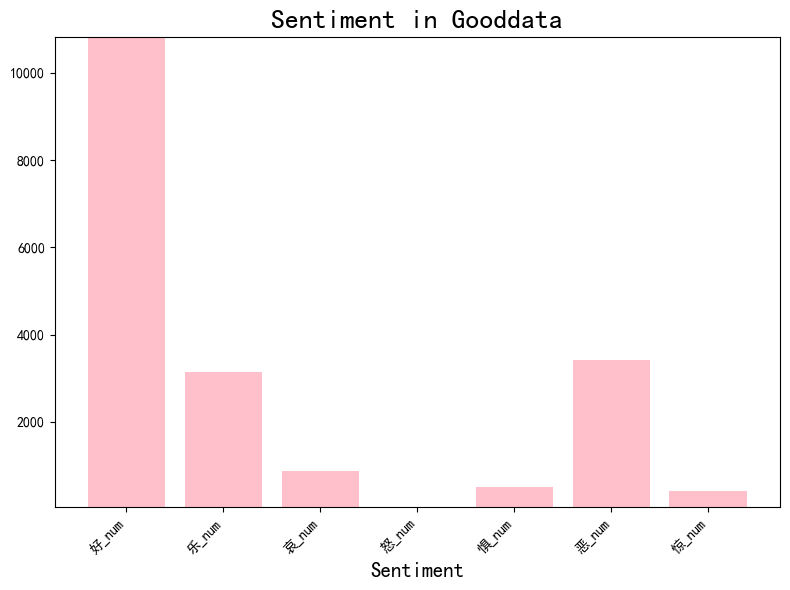

In [12]:
# 计算所有情感的总和
total_sum = sum(total_sentiment.values())

# 计算每种情感的数值
values = list(total_sentiment.values())

# 获取情感名称
emotions = list(total_sentiment.keys())

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制柱状图
plt.figure(figsize=(8, 6))  # 设置图形大小
plt.bar(emotions, values, color='pink')  # 使用颜色 pink 填充条形

# 设置标题和X轴标签
plt.title('Sentiment in Gooddata', fontsize=20)
plt.xlabel('Sentiment', fontsize=15)

# 设置Y轴的刻度范围以显示所有数据
plt.ylim(min(values) - 5, max(values) + 5)

# 显示X轴的标签
plt.xticks(emotions, rotation=45, ha='right')  # 旋转标签以便更好地显示

# 显示图表
plt.tight_layout()  # 调整布局以适应标签
plt.show()

In [9]:
bad_senti_results = []
for index, row in baddata.iterrows():
    content = row['content']
    sentiment = senti_by_dutir(content)
    sentiment['index'] = index  # 可选，添加原始数据索引
    bad_senti_results.append(sentiment)

# 将情感分析结果转换为DataFrame
bad_senti_df = pd.DataFrame(bad_senti_results)

# 将情感分析结果与原始数据合并
bad_result_df = pd.concat([baddata, bad_senti_df], axis=1)

# 显示结果
bad_result_df.head()

,id,title,link,author,author_id,replies,newest_reply,time,ip,content,...,sentence_num,stopword_num,好_num,乐_num,哀_num,怒_num,惧_num,恶_num,惊_num,index
0,306497018,云南 狗都不去,https://www.douban.com/group/topic/306497018/,momo,182418586,192,06-10 20:00,2024-05-27 17:32:36,广东,\n 是哪个ip的人破防了🥺 你这样不更印证你们你们在xhs的营销都是假的了吗🤣 我知...,...,36,803,25,1,1,1,3,19,0,0
1,304832926,日本旅行，大失所望,https://www.douban.com/group/topic/304832926/,熊味草莓,230781075,185,06-11 15:52,2024-04-21 03:17:00,浙江,\n 编辑在最前面，我都在旅游失败组发帖子了，就说明我真的觉得本次旅行大失败。觉得日本...,...,60,654,26,6,0,1,0,19,0,1
2,305264382,泉州不会再来,https://www.douban.com/group/topic/305264382/,钟摆,Gonderwall,209,06-05 23:45,2024-04-30 15:23:34,北京,\n 这帖子没想到过了挺久还有人回复。评论区百态给大家加点乐子---------南方玩...,...,43,457,31,3,7,0,2,19,0,2
3,306758213,某公众号在照搬组内的帖子！！！！这是侵权盗用了吧！！,https://www.douban.com/group/topic/306758213/,熊味草莓,230781075,54,06-06 12:10,2024-06-01 22:57:18,浙江,\n 6.5再更新：ta把我的文章删除后，微xin投诉官方来消息了，投诉不通过🙂🙂因为...,...,14,130,6,2,2,5,0,6,1,3
4,306279358,一定要找消费观相似的人去旅游,https://www.douban.com/group/topic/306279358/,咕咕鸡酱,127959461,52,06-11 22:44,2024-05-23 09:27:36,广东,\n 我五一和相处一年多关系很好的舍友一起去日本玩，但是发现我们的分歧很大，因为在校园...,...,5,66,1,0,0,0,1,3,0,4


In [10]:
# 初始化情感总和字典
bad_total_sentiment = {'好_num': 0, '乐_num': 0, '哀_num': 0, '怒_num': 0, '惧_num': 0, '恶_num': 0, '惊_num': 0}

# 遍历'content'列，进行情感分析并累计得分
for index, row in baddata.iterrows():
    content = row['content']
    sentiment = senti_by_dutir(content)
    # 累加每条记录的情感得分
    for key in bad_total_sentiment.keys():
        bad_total_sentiment[key] += sentiment[key]

# 将累计的情感得分转换为DataFrame
bad_total_sentiment_df = pd.DataFrame([bad_total_sentiment])

# 显示整体情感情况
print(bad_total_sentiment_df)

   好_num  乐_num  哀_num  怒_num  惧_num  恶_num  惊_num
0   6209   1667    808    111    437   3343    219


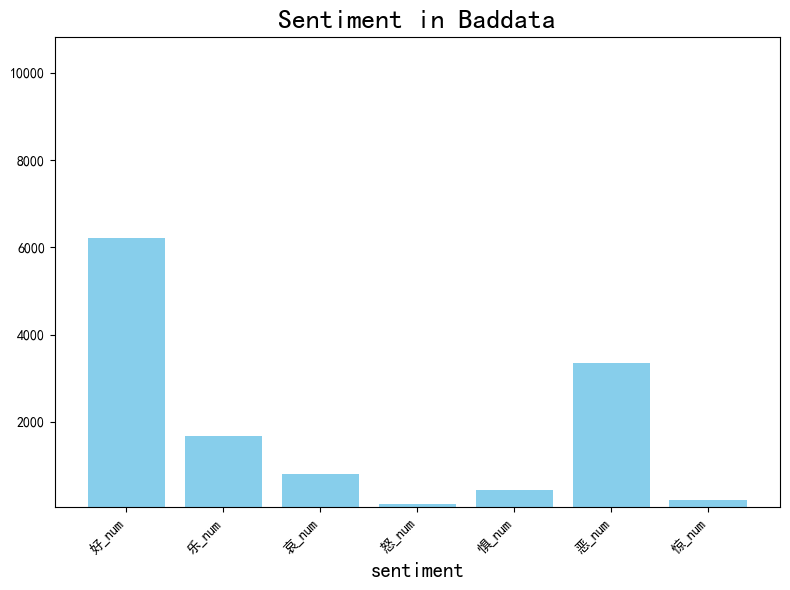

In [13]:
# 计算所有情感的总和
bad_total_sum = sum(bad_total_sentiment.values())

# 计算每种情感的数值
bad_values = list(bad_total_sentiment.values())

# 获取情感名称
bad_emotions = list(bad_total_sentiment.keys())

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 绘制柱状图
plt.figure(figsize=(8, 6))  # 设置图形大小
plt.bar(bad_emotions, bad_values, color='skyblue') 

# 设置标题和X轴标签
plt.title('Sentiment in Baddata', fontsize=20)
plt.xlabel('sentiment', fontsize=15)

# 设置Y轴的刻度范围以显示所有数据
plt.ylim(min(values) - 5, max(values) + 5)

# 显示X轴的标签
plt.xticks(emotions, rotation=45, ha='right')  # 旋转标签以便更好地显示

# 显示图表
plt.tight_layout()  # 调整布局以适应标签
plt.show()